# 7506 - Trabajo Práctico 2

---

## Introducción

### Librerías

In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import sklearn as sk
from joblib import load
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from joblib import dump

2022-12-08 11:06:37.955651: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 11:06:38.039302: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-08 11:06:38.041920: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 11:06:38.041930: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

### Carga de datasets

In [2]:
# Dataset Train preprocesado
ds_train = pd.read_csv('datasets/tp1-train.csv')
ds_train.head()

id  start_date    end_date    latitud   longitud  \
0  GaA1Loss98RkxbEZq2wZpQ==  2021-08-30  2022-01-27 -34.551623 -58.491771   
1  Tp+fdnNQpNzXUFo7W3q3vA==  2021-01-11  2021-02-11 -34.576289 -58.463635   
2  CR+neBgmAEDSo9LxI0x5iw==  2021-04-12  2021-06-05 -34.600150 -58.378244   
3  chtUpatpDQQL247Lt+Np2g==  2021-01-16  9999-12-31 -34.641450 -58.372804   
4  q6JgVplw0pYiAx/nlX/EVQ==  2021-03-24  2021-06-05 -34.629050 -58.468088   

        place_l3 property_type  property_rooms  property_bedrooms  \
0       Saavedra  Departamento             1.0                1.0   
1  Villa Ortuzar            PH             3.0                2.0   
2    San Nicolás  Departamento             2.0                1.0   
3       Barracas  Departamento             4.0                3.0   
4         Flores          Casa             5.0                4.0   

   property_surface_total  property_surface_covered  property_price  \
0                    37.0                      33.0         90000.0   
1                   144.0                     144.0        214600.0   
2                    46.0                      41.0         63000.0   
3                    65.0                      65.0        102000.0   
4                   215.0                     155.0        285000.0   

                                      property_title         pxm2 tipo_precio  
0            Departamento - 1 amb divisible-Saavedra  2432.432432       Medio  
1  Venta PH 3 ambientes patio y gran terraza sin ...  1490.277778       Medio  
2                         Departamento - San Nicolas  1369.565217        Bajo  
3                            Departamento - Barracas  1569.230769        Bajo  
4  Casa - Excelente propiedas en Flores unica por...  1325.581395       Medio

In [3]:
# Dataset Test preprocesado
ds_test = pd.read_csv('datasets/tp1-test.csv')
ds_test.head()

id  start_date    end_date    latitud   longitud  \
0  GrZ64pCxiOhtCZq4KgqxoQ==  2021-05-07  2021-05-08 -34.565080 -58.464190   
1  OHosCWo/KF1eK/6CmBdUQw==  2021-08-24  2021-08-24 -34.593059 -58.406758   
2  Y8K7ZUBw9NZCyJoQ3p5/ww==  2021-07-21  2021-11-28 -34.563755 -58.439019   
3  /G46ns24536LY6XTnM7F3Q==  2021-02-05  2021-02-05 -34.590534 -58.411562   
4  bjEF6kjPBNijD/SWCGXs1Q==  2021-01-21  2021-03-17 -34.609729 -58.421587   

       place_l3 property_type  property_rooms  property_bedrooms  \
0      Belgrano  Departamento             2.0                1.0   
1  Barrio Norte  Departamento             3.0                2.0   
2       Palermo            PH             2.0                1.0   
3       Palermo  Departamento             3.0                2.0   
4       Almagro  Departamento             1.0                1.0   

   property_surface_total  property_surface_covered  property_price  \
0                    48.0                      37.0        120000.0   
1                   122.0                      97.0        295000.0   
2                    44.0                      35.0         95000.0   
3                   106.0                      93.0        235000.0   
4                    25.0                      25.0         50000.0   

                                      property_title         pxm2 tipo_precio  
0          Loft de dos ambientes con balcón y patio!  2500.000000       Medio  
1  DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA  2418.032787       Medio  
2      LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR  2159.090909        Alto  
3  Departamento 3 Ambientes con dependencia, baño...  2216.981132       Medio  
4                     BME. MITRE Y MEDRANO - Almagro  2000.000000       Medio

## Procesamiento del lenguaje natural

### Ampliación del dataset

Este dataset incluye descripciones de las propiedades del otro dataset. Veremos como podemos extraer información de estas descripciones.

In [4]:
descriptions_dataset = pd.read_csv('datasets/properati_argentina_2021_decrip.csv')
descriptions_dataset.head()

id                               property_description
0  BZCeiGkJr1WBUi6pKJQwJQ==  Corredor Responsable: MARIA ALEJANDRA GENOVEVA...
1  zuHOGgUE0UB71W7m/YCLoA==  ¡HERMOSO PH TIPO CASA DE 2 AMBIENTES!<br>APTO ...
2  TUL813tXchVBlHUsfaA6DA==  Excelente PH en Núñez 4 amb!!!! Oportunidad !!...
3  gn55JPmcjftBV/at1a7fPg==  UNICO PH DE 4 DORMITORIOS EN IMPECABLE ESTADO,...
4  qg4m3QHcuo1+wMmyp7kx3Q==  Ph 2 Amb. Villa Crespo exclusivo uso profesion...

Tomaremos las descripciones correspondientes a los datasets de train y test

In [5]:
descriptions_train = descriptions_dataset[descriptions_dataset.id.isin(ds_train.id)].copy()
descriptions_test = descriptions_dataset[descriptions_dataset.id.isin(ds_test.id)].copy()
descriptions_train.shape, descriptions_test.shape

((69715, 2), (10648, 2))

#### Análisis de sentimientos - Tecnica Minqing Hu y Bing Liu

Una forma de analizar el sentimiento de un de un texto es considerando su sentimiento como la suma de los sentimientos de cada una de las palabras que lo forman.

Para el analisis de sentimiento nos guiamos del analisis realizado en esta pagina: https://www.cienciadedatos.net/documentos/py25-text-mining-python.html

Utilizamos algunas funciones de tokenizacion y limpieza de ahi con alguna sutil modificacion para nuestro caso de uso en particular.

In [6]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''

    # Se convierte todo el texto a minúsculas
    nuevo_texto = str(texto).lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\¡\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex, ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep=' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return (nuevo_texto)

In [7]:
# se aplica la función de limpieza a train y test y tokenización a cada descripcion

tokenized_train = pd.concat(
    [descriptions_train.id, descriptions_train['property_description'].apply(limpiar_tokenizar)], axis=1)
tokenized_test = pd.concat([descriptions_test.id, descriptions_test['property_description'].apply(limpiar_tokenizar)],
                           axis=1)
tokenized_train.head()

id  \
0   BZCeiGkJr1WBUi6pKJQwJQ==   
3   gn55JPmcjftBV/at1a7fPg==   
11  uH5H+RfQM87Qtrb13+T4hA==   
13  47t2G764+Gk5EkoUiVc7Qg==   
15  lRVjhy5UZA9SOOLnfLJ6jA==   

                                 property_description  
0   [corredor, responsable, maria, alejandra, geno...  
3   [unico, ph, de, dormitorios, en, impecable, es...  
11  [venta, ph, ambientes, paternal, br, br, cálid...  
13  [ph, al, frente, super, luminoso, br, baño, co...  
15  [permuta, ventan, ph, de, ambientes, nuevo, as...

Separamos los tokens según ids tanto en train como en test.

In [8]:
tokens_train = tokenized_train.explode(column='property_description')
tokens_train = tokens_train.rename(columns={'property_description': 'token'})
tokens_train.reset_index(inplace=True, drop=True)
tokens_train.head()

id        token
0  BZCeiGkJr1WBUi6pKJQwJQ==     corredor
1  BZCeiGkJr1WBUi6pKJQwJQ==  responsable
2  BZCeiGkJr1WBUi6pKJQwJQ==        maria
3  BZCeiGkJr1WBUi6pKJQwJQ==    alejandra
4  BZCeiGkJr1WBUi6pKJQwJQ==     genoveva

In [9]:
# Replicamos en test.
tokens_test = tokenized_test.explode(column='property_description')
tokens_test = tokens_test.rename(columns={'property_description': 'token'})
tokens_test.reset_index(inplace=True, drop=True)

In [10]:
tokens_train.shape, tokens_test.shape

((13008054, 2), (1969939, 2))

Vemos que tenemos 11 millones de palabras en train y 3 millones en test

Notamos que las preposiciones no son relevantes para entender que atributo podria ser mejor para expandir el datast, asi que decidimos agregarlas como stopwords.

Tampoco van a variar mucho el analisis de sentimiento realizado en este trabajo.

In [11]:
## listado de stopwords

preposiciones = ["a", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia",
                 "hasta", "mediante", "para", "por", "según", "sin", "sobre", "tras", "vía"]

stop_words = []

stop_words += preposiciones

# filtrado para excluir stopwords
tokens_train = tokens_train[~(tokens_train["token"].isin(stop_words))]

tokens_test = tokens_test[~(tokens_test["token"].isin(stop_words))]

Agregamos un lexicon en español de esta pagina: https://github.com/jboscomendoza/lexicos-nrc-afinn

In [12]:
# lexicon sentimientos
lexicon = pd.read_csv('datasets/lexico_nrc.csv')
lexicon

palabra   sentimiento        word
0         ciegamente      negativo     blindly
1         ciegamente      tristeza     blindly
2        a distancia      negativo       aloof
3      a hurtadillas      sorpresa  stealthily
4        a la deriva  anticipación      adrift
...              ...           ...         ...
15302        zumbido  anticipación        buzz
15303        zumbido         miedo        buzz
15304        zumbido      positivo        buzz
15305        zumbido      negativo       drone
15306      zurcidura      positivo     mending

[15307 rows x 3 columns]

In [13]:
def mappear_valores_sentimiento(s):
    # 1 Positivo
    # 0 Neutro
    # -1 Negativo
    sentimiento_numerico = 0
    if str(s) in ['negativo', 'tristeza', 'miedo', 'enfado', 'tristeza', 'asco']:
        sentimiento_numerico = -1
    if str(s) in ['sorpresa', 'positivo', 'confianza', 'alegría']:
        sentimiento_numerico = 1
    if str(s) in ['anticipación']:
        sentimiento_numerico = 0

    return sentimiento_numerico


In [14]:
lexicon['sentimiento'] = lexicon['sentimiento'].apply(lambda x: mappear_valores_sentimiento(x))
lexicon[['sentimiento']].head()

sentimiento
0           -1
1           -1
2           -1
3            1
4            0

In [15]:
tokens_train[tokens_train.token.isin(lexicon.palabra)].shape, tokens_test[tokens_test.token.isin(lexicon.palabra)].shape

((1519675, 2), (229226, 2))

In [16]:
lexicon

palabra  sentimiento        word
0         ciegamente           -1     blindly
1         ciegamente           -1     blindly
2        a distancia           -1       aloof
3      a hurtadillas            1  stealthily
4        a la deriva            0      adrift
...              ...          ...         ...
15302        zumbido            0        buzz
15303        zumbido           -1        buzz
15304        zumbido            1        buzz
15305        zumbido           -1       drone
15306      zurcidura            1     mending

[15307 rows x 3 columns]

Tenemos un millon y medio de coincidencias con el lexicón en train. Usaremos estos sentimientos para puntuar las propiedades

In [17]:
# sentimiento promedio de cada descripcion
tokens_sentimientos_train = pd.merge(
    left=tokens_train,
    right=lexicon,
    left_on="token",
    right_on="palabra",
    how="inner"
)
tokens_sentimientos_train = tokens_sentimientos_train.drop(columns=["palabra", "word"])

tokens_sentimientos_test = pd.merge(
    left=tokens_test,
    right=lexicon,
    left_on="token",
    right_on="palabra",
    how="inner"
)
tokens_sentimientos_test = tokens_sentimientos_test.drop(columns=["palabra", "word"])

tokens_sentimientos_train.head()

id        token  sentimiento
0  BZCeiGkJr1WBUi6pKJQwJQ==  responsable            1
1  BZCeiGkJr1WBUi6pKJQwJQ==  responsable            1
2  BZCeiGkJr1WBUi6pKJQwJQ==  responsable            1
3  eMMPT/INpeI16EUBN74N3Q==  responsable            1
4  eMMPT/INpeI16EUBN74N3Q==  responsable            1

Ahora calcularemos el puntaje para cada propiedad como la suma de los sentimientos.

In [18]:
score_train = tokens_sentimientos_train[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()

score_test = tokens_sentimientos_test[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()

/tmp/ipykernel_395371/4004910310.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_train = tokens_sentimientos_train[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()
/tmp/ipykernel_395371/4004910310.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_test = tokens_sentimientos_test[["id", "token", "sentimiento"]].groupby(["id"]).sum().reset_index()


In [19]:
score_train

id  sentimiento
0      +++LrfX9dl/rsnbNTgVaSw==           24
1      ++20Jf3Ha2Epz88cJxEmJw==           10
2      ++2AcJNn9KYBeuOard+DZw==           18
3      ++5o0X5nwMy3BtfAvsFAaA==           -2
4      ++A4JS7xH+YdAXktJ3bHlg==           28
...                         ...          ...
69137  zzbbKVUtPLels9Algy3FRw==            4
69138  zzifKawPn7V8Z63LI9+K9Q==           16
69139  zziqoG25k9M8rIgzpKwFwg==           29
69140  zzrpS8TqDA6px1h/DuQdmw==           20
69141  zzxdSRjo9Dmr+YRiF12AKw==            2

[69142 rows x 2 columns]

In [20]:
score_train.sentimiento.max()

216

La mejor propiedad tiene un puntaje de 216. Analizaremos un poco las descripciones de las mejores y peores.

In [21]:
top5_positivas = score_train.sort_values(by='sentimiento', ascending=False).head(5)
top5_positivas

id  sentimiento
64018  vJRa8QKk0d9i9L4Rk6Bvng==          216
27404  NX8OeQx/kxiBz8ehRtMggw==          185
28810  Ordgp/sLvmhD+RwAtErcvw==          185
49104  hWcrJ6XkTCTGVo80jBvI1g==          185
20561  HApisqgDT/EcQsf/Z9pwSA==          185

In [22]:
descriptions_train.property_description.iloc[top5_positivas.index]

432928    Ubicación piso 9 al frente.<br><br>Amplio y lu...
182346    Hermoso departamento tipo Loft de dos Ambiente...
191949    Corredor Responsable: María Eugenia Blanco CUC...
330753    Corredor Responsable: Gustavo Guastello - C.U....
137409    MALABIA Y SANTA FE<br>48.78m2 TOTALES.<br><br>...
Name: property_description, dtype: object

In [23]:
score_train.sentimiento.min()

-37

In [24]:
top5_negativas = score_train.sort_values(by='sentimiento').head(5)
top5_negativas

id  sentimiento
24240  KWFIk6SR8JFrfLNsfJcoPg==          -37
67484  yTzDOa/iBUD6x1xW0p+8jQ==          -24
67054  y6+EaqbgQiNEm0O9xuj5qA==          -23
62615  u/IcqZ+M9BeXX58mOBAsXw==          -23
67571  yZ1q8SipMwHAKNK0xa1ApQ==          -22

In [25]:
descriptions_train.iloc[top5_negativas.index].property_description

161869    PH EN VENTA DE 4 AMBIENTES CON PATIO Y TERRAZA...
448955    Corredor Responsable: Gustavo Guastello CUCICB...
447362    Corredor Responsable: Brian Ezequiel Roldán CP...
424224    Corredor Responsable: Veronica Grela Reina - C...
449321    Corredor Responsable: Marcelo Trujillo CUCICBA...
Name: property_description, dtype: object

descriptions_test.head()Como es claro, la gente que publica la venta de una propiedad va a tratar de expresar la mejor publicacion y descripcion posible. Es por eso que tenemos una tasa altisima de positividad. No buscamos hacer un analisis tan profundo de las descripciones sino crear un puntaje relativamente estandarizado para poder usar la descripción como feature.

In [26]:
def perfil_sentimientos(title, df):
    print(title)
    print(f"Positivos: {round(100 * np.mean(df.sentimiento > 0), 2)}")
    print(f"Neutros  : {round(100 * np.mean(df.sentimiento == 0), 2)}")
    print(f"Negativos: {round(100 * np.mean(df.sentimiento < 0), 2)}")


perfil_sentimientos("Train: ", score_train)
print()
perfil_sentimientos("Test: ", score_test)

Train: 
Positivos: 93.61
Neutros  : 1.57
Negativos: 4.82

Test: 
Positivos: 93.22
Neutros  : 1.75
Negativos: 5.03


Finalmente, agregaremos nuestro puntaje como columnas nuevas del dataset.

In [27]:
ds_test

id  start_date    end_date    latitud   longitud  \
0      GrZ64pCxiOhtCZq4KgqxoQ==  2021-05-07  2021-05-08 -34.565080 -58.464190   
1      OHosCWo/KF1eK/6CmBdUQw==  2021-08-24  2021-08-24 -34.593059 -58.406758   
2      Y8K7ZUBw9NZCyJoQ3p5/ww==  2021-07-21  2021-11-28 -34.563755 -58.439019   
3      /G46ns24536LY6XTnM7F3Q==  2021-02-05  2021-02-05 -34.590534 -58.411562   
4      bjEF6kjPBNijD/SWCGXs1Q==  2021-01-21  2021-03-17 -34.609729 -58.421587   
...                         ...         ...         ...        ...        ...   
10643  EbpZ5Tl0YDy0iRaybU3wFg==  2021-02-11  2021-04-05 -34.595230 -58.409301   
10644  eovjcfaKV44yRtidCOWjqg==  2021-01-22  2021-06-30 -34.581910 -58.449381   
10645  WkBPu8yo/qD8xtp4m2Xtow==  2021-12-16  2022-02-09 -34.573555 -58.440367   
10646  DQrbC5hmTRl079aLUroCxA==  2021-10-02  2021-10-07 -34.624851 -58.434546   
10647  h1pNdd1hR0S8uxPWQ3D5rA==  2021-01-07  2021-02-11 -34.568641 -58.446713   

           place_l3 property_type  property_rooms  property_bedrooms  \
0          Belgrano  Departamento             2.0                1.0   
1      Barrio Norte  Departamento             3.0                2.0   
2           Palermo            PH             2.0                1.0   
3           Palermo  Departamento             3.0                2.0   
4           Almagro  Departamento             1.0                1.0   
...             ...           ...             ...                ...   
10643      Recoleta  Departamento             3.0                2.0   
10644       Palermo  Departamento             2.0                1.0   
10645       Palermo  Departamento             1.0                1.0   
10646     Caballito  Departamento             4.0                3.0   
10647       Palermo  Departamento             2.0                1.0   

       property_surface_total  property_surface_covered  property_price  \
0                        48.0                      37.0        120000.0   
1                       122.0                      97.0        295000.0   
2                        44.0                      35.0         95000.0   
3                       106.0                      93.0        235000.0   
4                        25.0                      25.0         50000.0   
...                       ...                       ...             ...   
10643                    73.0                      73.0        149000.0   
10644                    54.0                      50.0        139797.0   
10645                    26.0                      26.0         54000.0   
10646                   111.0                      76.0        255000.0   
10647                    37.0                      35.0         90000.0   

                                          property_title         pxm2  \
0              Loft de dos ambientes con balcón y patio!  2500.000000   
1      DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA  2418.032787   
2          LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR  2159.090909   
3      Departamento 3 Ambientes con dependencia, baño...  2216.981132   
4                         BME. MITRE Y MEDRANO - Almagro  2000.000000   
...                                                  ...          ...   
10643  3 AMBIENTES C/DEPENDENCIA · AGÜERO AL 1200 · R...  2041.095890   
10644                     Venta - Maure 3552 4º N Jardin  2588.833333   
10645               MONOAMBIENTE VENTA PALERMO BAJAS EXP  2076.923077   
10646  VENTA DEPARTAMENTO  CABALLITO  4 AMBIENTES PATIOS  2297.297297   
10647                             Departamento - Palermo  2432.432432   

      tipo_precio  
0           Medio  
1           Medio  
2            Alto  
3           Medio  
4           Medio  
...           ...  
10643       Medio  
10644       Medio  
10645       Medio  
10646       Medio  
10647       Medio  

[10648 rows x 15 columns]

In [28]:
ds_train = pd.merge(ds_train, score_train, on='id')
ds_train.rename(columns={'sentimiento': 'score_sentimientos'}, inplace=True)
ds_test = pd.merge(ds_test, score_test, on='id')
ds_test.rename(columns={'sentimiento': 'score_sentimientos'}, inplace=True)

In [29]:
ds_train.head()

id  start_date    end_date    latitud   longitud  \
0  GaA1Loss98RkxbEZq2wZpQ==  2021-08-30  2022-01-27 -34.551623 -58.491771   
1  Tp+fdnNQpNzXUFo7W3q3vA==  2021-01-11  2021-02-11 -34.576289 -58.463635   
2  CR+neBgmAEDSo9LxI0x5iw==  2021-04-12  2021-06-05 -34.600150 -58.378244   
3  chtUpatpDQQL247Lt+Np2g==  2021-01-16  9999-12-31 -34.641450 -58.372804   
4  q6JgVplw0pYiAx/nlX/EVQ==  2021-03-24  2021-06-05 -34.629050 -58.468088   

        place_l3 property_type  property_rooms  property_bedrooms  \
0       Saavedra  Departamento             1.0                1.0   
1  Villa Ortuzar            PH             3.0                2.0   
2    San Nicolás  Departamento             2.0                1.0   
3       Barracas  Departamento             4.0                3.0   
4         Flores          Casa             5.0                4.0   

   property_surface_total  property_surface_covered  property_price  \
0                    37.0                      33.0         90000.0   
1                   144.0                     144.0        214600.0   
2                    46.0                      41.0         63000.0   
3                    65.0                      65.0        102000.0   
4                   215.0                     155.0        285000.0   

                                      property_title         pxm2 tipo_precio  \
0            Departamento - 1 amb divisible-Saavedra  2432.432432       Medio   
1  Venta PH 3 ambientes patio y gran terraza sin ...  1490.277778       Medio   
2                         Departamento - San Nicolas  1369.565217        Bajo   
3                            Departamento - Barracas  1569.230769        Bajo   
4  Casa - Excelente propiedas en Flores unica por...  1325.581395       Medio   

   score_sentimientos  
0                   5  
1                  35  
2                  17  
3                   9  
4                  33

#### Tecnica Regex

Revisamos las siguientes paginas para entender cuales son los ammenities mas buscados en CABA, y en Argentina en general.

https://www.iprofesional.com/negocios/371702-cuales-son-los-amenities-mas-exoticos-de-edificios-en-argentina

https://www.baenegocios.com/sociedad/Ranking-de-amenities-los-servicios-que-mas-pesan-al-comprar-una-propiedad-20220119-0068.html

https://www.forbesargentina.com/negocios/amenities-servicios-mas-demandados-argentinos-comprar-una-propiedad-n11901

Dichos ammenities parecen hacer que la propiedad cotice entre un 15% y un 20% más que el precio de venta.

Sacando un promedio y haciendo un top-5 ranking, podemos notar que los mas relevantes son:

- Garage/Estacionamiento
- Pileta
- Jardin/Espacio al aire libre
- Parrilla
- SUM (Gimnasio/Spa/Sauna)

Al buscar estos datos, podriamos tratar de entender si el precio resulta mayor, contra una propiedad de similares caracteristicas pero sin estos ammenities y a partir de eso, entender que % varía del precio de venta original.

In [30]:
def calculate_freq(feature, regex):
    freq = descriptions_train.property_description.str.contains(regex, regex=True).sum()
    print(
        f"Los anuncios de propiedades que tienen la feature {feature} son: {freq} y representan el {freq * 100 // len(descriptions_train)}% de los datos")

##### Amenities

In [31]:
garage = re.compile(r"\s*garage|garaje|estacionamiento|parking")
calculate_freq("Garage", garage)

Los anuncios de propiedades que tienen la feature Garage son: 1476 y representan el 2% de los datos


In [32]:
pileta = re.compile(r"\s*pileta")
calculate_freq("Pileta", pileta)

Los anuncios de propiedades que tienen la feature Pileta son: 4618 y representan el 6% de los datos


In [33]:
jardin = re.compile(r"\s*jardin|espacio verde")
calculate_freq("Jardín", jardin)

Los anuncios de propiedades que tienen la feature Jardín son: 1455 y representan el 2% de los datos


In [34]:
parrilla = re.compile(r"\s*parrilla|bbq")
calculate_freq("Parrilla", parrilla)

Los anuncios de propiedades que tienen la feature Parrilla son: 12823 y representan el 18% de los datos


In [35]:
sum = re.compile(r"\s*zoom|sum|gimansio|spa")
calculate_freq("SUM", sum)

Los anuncios de propiedades que tienen la feature SUM son: 26309 y representan el 37% de los datos


In [36]:
balcon = re.compile(r"\s*balcon|balcón")
calculate_freq("Balcón", balcon)

Los anuncios de propiedades que tienen la feature Balcón son: 32860 y representan el 47% de los datos


Otro aspecto interesante que dejamos fuera del análisis es a que tipo de vivienda pertenece cada ammenity. Y si donde encontramos una amenity en particular, encontramos consecuentemente otra. Por ejemplo, una casa con jardin y parrila y/o pileta. De esta manera podriamos tratar de determinar el costo de cada ammenity o como afecta al precio.

Por último, construiremos columnas booleanas para los mejores features y las agregaremos a nuestros datasets. Usaremos parrilla, sum, balcón y pileta.

In [37]:
amenities_train = pd.DataFrame({
    'id': descriptions_train.id,
    'pileta': descriptions_train.property_description.str.contains(pileta, regex=True),
    'parrilla': descriptions_train.property_description.str.contains(parrilla, regex=True),
    'balcon': descriptions_train.property_description.str.contains(balcon, regex=True),
    'sum': descriptions_train.property_description.str.contains(sum, regex=True)
})
amenities_train.replace([True, False], [1, 0], inplace= True)
amenities_train.head(10)

id  pileta  parrilla  balcon  sum
0    BZCeiGkJr1WBUi6pKJQwJQ==       0         0       0    0
3    gn55JPmcjftBV/at1a7fPg==       0         0       0    0
11   uH5H+RfQM87Qtrb13+T4hA==       0         0       0    0
13   47t2G764+Gk5EkoUiVc7Qg==       0         0       0    0
15   lRVjhy5UZA9SOOLnfLJ6jA==       0         0       0    0
16   n7NJmavbeNUlyKufoGRr+g==       0         0       0    0
153  lZyClw0vqQvUiJkIemcg8A==       0         0       1    1
154  AZJX5ab3sBKZK1bSC3zW9A==       0         0       0    0
231  r//Xlyvc3OKSuYyZAp7zWA==       0         0       1    1
232  eMMPT/INpeI16EUBN74N3Q==       0         0       0    1

In [38]:
# Replicamos lo mismo en test
amenities_test = pd.DataFrame({
    'id': descriptions_test.id,
    'pileta': descriptions_test.property_description.str.contains(pileta, regex=True),
    'parrilla': descriptions_test.property_description.str.contains(parrilla, regex=True),
    'balcon': descriptions_test.property_description.str.contains(balcon, regex=True),
    'sum': descriptions_test.property_description.str.contains(sum, regex=True)
})
amenities_test.replace([True, False], [1, 0], inplace= True)
amenities_test.head()

id  pileta  parrilla  balcon  sum
2    TUL813tXchVBlHUsfaA6DA==       0         1       1    0
151  ns8QWxBXYIdnEccdiu3qog==       0         0       0    0
208  boCXaj+OYbucoJeinbtaOg==       0         0       1    1
239  MAewqGlr+bEVCoz1BmrrVA==       0         0       1    1
241  kIh1t01TEOIAa0g1Wkd4kQ==       0         0       0    0

In [39]:
ds_test

id  start_date    end_date    latitud   longitud  \
0      GrZ64pCxiOhtCZq4KgqxoQ==  2021-05-07  2021-05-08 -34.565080 -58.464190   
1      OHosCWo/KF1eK/6CmBdUQw==  2021-08-24  2021-08-24 -34.593059 -58.406758   
2      Y8K7ZUBw9NZCyJoQ3p5/ww==  2021-07-21  2021-11-28 -34.563755 -58.439019   
3      /G46ns24536LY6XTnM7F3Q==  2021-02-05  2021-02-05 -34.590534 -58.411562   
4      bjEF6kjPBNijD/SWCGXs1Q==  2021-01-21  2021-03-17 -34.609729 -58.421587   
...                         ...         ...         ...        ...        ...   
10553  EbpZ5Tl0YDy0iRaybU3wFg==  2021-02-11  2021-04-05 -34.595230 -58.409301   
10554  eovjcfaKV44yRtidCOWjqg==  2021-01-22  2021-06-30 -34.581910 -58.449381   
10555  WkBPu8yo/qD8xtp4m2Xtow==  2021-12-16  2022-02-09 -34.573555 -58.440367   
10556  DQrbC5hmTRl079aLUroCxA==  2021-10-02  2021-10-07 -34.624851 -58.434546   
10557  h1pNdd1hR0S8uxPWQ3D5rA==  2021-01-07  2021-02-11 -34.568641 -58.446713   

           place_l3 property_type  property_rooms  property_bedrooms  \
0          Belgrano  Departamento             2.0                1.0   
1      Barrio Norte  Departamento             3.0                2.0   
2           Palermo            PH             2.0                1.0   
3           Palermo  Departamento             3.0                2.0   
4           Almagro  Departamento             1.0                1.0   
...             ...           ...             ...                ...   
10553      Recoleta  Departamento             3.0                2.0   
10554       Palermo  Departamento             2.0                1.0   
10555       Palermo  Departamento             1.0                1.0   
10556     Caballito  Departamento             4.0                3.0   
10557       Palermo  Departamento             2.0                1.0   

       property_surface_total  property_surface_covered  property_price  \
0                        48.0                      37.0        120000.0   
1                       122.0                      97.0        295000.0   
2                        44.0                      35.0         95000.0   
3                       106.0                      93.0        235000.0   
4                        25.0                      25.0         50000.0   
...                       ...                       ...             ...   
10553                    73.0                      73.0        149000.0   
10554                    54.0                      50.0        139797.0   
10555                    26.0                      26.0         54000.0   
10556                   111.0                      76.0        255000.0   
10557                    37.0                      35.0         90000.0   

                                          property_title         pxm2  \
0              Loft de dos ambientes con balcón y patio!  2500.000000   
1      DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA  2418.032787   
2          LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR  2159.090909   
3      Departamento 3 Ambientes con dependencia, baño...  2216.981132   
4                         BME. MITRE Y MEDRANO - Almagro  2000.000000   
...                                                  ...          ...   
10553  3 AMBIENTES C/DEPENDENCIA · AGÜERO AL 1200 · R...  2041.095890   
10554                     Venta - Maure 3552 4º N Jardin  2588.833333   
10555               MONOAMBIENTE VENTA PALERMO BAJAS EXP  2076.923077   
10556  VENTA DEPARTAMENTO  CABALLITO  4 AMBIENTES PATIOS  2297.297297   
10557                             Departamento - Palermo  2432.432432   

      tipo_precio  score_sentimientos  
0           Medio                  11  
1           Medio                  26  
2            Alto                  22  
3           Medio                  17  
4           Medio                   5  
...           ...                 ...  
10553       Medio                  30  
10554       Medio                   0  
10555       Medio                  37  
10556       M

In [40]:
ds_train = pd.merge(ds_train, amenities_train, on='id')
ds_train.head()

id  start_date    end_date    latitud   longitud  \
0  GaA1Loss98RkxbEZq2wZpQ==  2021-08-30  2022-01-27 -34.551623 -58.491771   
1  Tp+fdnNQpNzXUFo7W3q3vA==  2021-01-11  2021-02-11 -34.576289 -58.463635   
2  CR+neBgmAEDSo9LxI0x5iw==  2021-04-12  2021-06-05 -34.600150 -58.378244   
3  chtUpatpDQQL247Lt+Np2g==  2021-01-16  9999-12-31 -34.641450 -58.372804   
4  q6JgVplw0pYiAx/nlX/EVQ==  2021-03-24  2021-06-05 -34.629050 -58.468088   

        place_l3 property_type  property_rooms  property_bedrooms  \
0       Saavedra  Departamento             1.0                1.0   
1  Villa Ortuzar            PH             3.0                2.0   
2    San Nicolás  Departamento             2.0                1.0   
3       Barracas  Departamento             4.0                3.0   
4         Flores          Casa             5.0                4.0   

   property_surface_total  property_surface_covered  property_price  \
0                    37.0                      33.0         90000.0   
1                   144.0                     144.0        214600.0   
2                    46.0                      41.0         63000.0   
3                    65.0                      65.0        102000.0   
4                   215.0                     155.0        285000.0   

                                      property_title         pxm2 tipo_precio  \
0            Departamento - 1 amb divisible-Saavedra  2432.432432       Medio   
1  Venta PH 3 ambientes patio y gran terraza sin ...  1490.277778       Medio   
2                         Departamento - San Nicolas  1369.565217        Bajo   
3                            Departamento - Barracas  1569.230769        Bajo   
4  Casa - Excelente propiedas en Flores unica por...  1325.581395       Medio   

   score_sentimientos  pileta  parrilla  balcon  sum  
0                   5       0         0       0    0  
1                  35       0         0       0    1  
2                  17       0         0       0    1  
3                   9       0         0       1    1  
4                  33       0         1       0    1

In [41]:
ds_test = pd.merge(ds_test, amenities_test, on='id')
ds_test.head()

id  start_date    end_date    latitud   longitud  \
0  GrZ64pCxiOhtCZq4KgqxoQ==  2021-05-07  2021-05-08 -34.565080 -58.464190   
1  OHosCWo/KF1eK/6CmBdUQw==  2021-08-24  2021-08-24 -34.593059 -58.406758   
2  Y8K7ZUBw9NZCyJoQ3p5/ww==  2021-07-21  2021-11-28 -34.563755 -58.439019   
3  /G46ns24536LY6XTnM7F3Q==  2021-02-05  2021-02-05 -34.590534 -58.411562   
4  bjEF6kjPBNijD/SWCGXs1Q==  2021-01-21  2021-03-17 -34.609729 -58.421587   

       place_l3 property_type  property_rooms  property_bedrooms  \
0      Belgrano  Departamento             2.0                1.0   
1  Barrio Norte  Departamento             3.0                2.0   
2       Palermo            PH             2.0                1.0   
3       Palermo  Departamento             3.0                2.0   
4       Almagro  Departamento             1.0                1.0   

   property_surface_total  property_surface_covered  property_price  \
0                    48.0                      37.0        120000.0   
1                   122.0                      97.0        295000.0   
2                    44.0                      35.0         95000.0   
3                   106.0                      93.0        235000.0   
4                    25.0                      25.0         50000.0   

                                      property_title         pxm2 tipo_precio  \
0          Loft de dos ambientes con balcón y patio!  2500.000000       Medio   
1  DEPARTAMENTO 3 AMB C/DEPENDENCIA, PATIO Y COCHERA  2418.032787       Medio   
2      LACROZE 1700 - PH EN VENTA 2 AMB - A RECICLAR  2159.090909        Alto   
3  Departamento 3 Ambientes con dependencia, baño...  2216.981132       Medio   
4                     BME. MITRE Y MEDRANO - Almagro  2000.000000       Medio   

   score_sentimientos  pileta  parrilla  balcon  sum  
0                  11       1         1       1    1  
1                  26       0         0       1    1  
2                  22       0         0       0    0  
3                  17       0         0       1    1  
4                   5       0         0       0    0

##### Expensas

Por último, trabajaremos en crear una columna numérica con el valor de las expensas. Evaluaremos primero que porcentaje de valores podemos conseguir con regex

Armé varias regex para probar algunas cosas, lo que quería probar:
- Conseguir cosas como "15000 de expensas", "expensas: 15000", "sin expensas"

Solo contar la aparicion de la paalbra expensas como en los casos anteriores no sirve porque hay mucho "sin expensas" y mucho dato falopa
Dejo las regex que use:

In [42]:
re.compile(r"\s*[0-9.]*\s*exp|expensas")
re.compile('((?:[a-zA-Z0-9]+\s*){5}(?:expensas|exp)\s(?:[a-zA-Z0-9]+\s){10})')
re.compile('((?:[0-9a-zA-Z,.]+\s*){5}?(?:con|sin|de)\s*(?:expensas|exp))')
re.compile('\s*([0-9.]+)\s*exp|expensas')


# así se usa para extraer
# descriptions_train.property_description.str.extract(sin_expensas)

re.compile(r'\s*([0-9.]+)\s*exp|expensas', re.UNICODE)

## Modelos

#### Selección de features

Para entrenar los modelos usaremos nuestro dataset recien generado, descartaremos el id, el título y las fechas. Convertiremos las categóricas en variables numéricas. También dejaremos aparte dos OHE del barrio y el tipo para usar luego.

In [43]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'latitud', 'longitud', 'place_l3',
       'property_type', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'property_price',
       'property_title', 'pxm2', 'tipo_precio', 'score_sentimientos', 'pileta',
       'parrilla', 'balcon', 'sum'],
      dtype='object')

In [44]:
ds_trabajo_train = ds_train.drop(['id', 'property_title', 'start_date', 'end_date'], axis=1)
ohe_property_type_train = pd.get_dummies(ds_train['property_type'], prefix='property_type')
ohe_place_l3_train = pd.get_dummies(ds_train['place_l3'], prefix='place_l3')
ds_trabajo_train['place_l3'] = pd.factorize(ds_train['place_l3'])[0]
ds_trabajo_train['property_type'] = pd.factorize(ds_train['property_type'])[0]
ds_trabajo_train

latitud   longitud  place_l3  property_type  property_rooms  \
0     -34.551623 -58.491771         0              0             1.0   
1     -34.576289 -58.463635         1              1             3.0   
2     -34.600150 -58.378244         2              0             2.0   
3     -34.641450 -58.372804         3              0             4.0   
4     -34.629050 -58.468088         4              2             5.0   
...          ...        ...       ...            ...             ...   
69137 -34.608522 -58.430410        10              0             4.0   
69138 -34.625448 -58.524920        45              2             6.0   
69139 -34.558831 -58.462175         8              0             4.0   
69140 -34.604841 -58.495192        34              0             3.0   
69141 -34.628746 -58.463183         4              2             4.0   

       property_bedrooms  property_surface_total  property_surface_covered  \
0                    1.0                    37.0                      33.0   
1                    2.0                   144.0                     144.0   
2                    1.0                    46.0                      41.0   
3                    3.0                    65.0                      65.0   
4                    4.0                   215.0                     155.0   
...                  ...                     ...                       ...   
69137                3.0                   103.0                      94.0   
69138                5.0                   300.0                     200.0   
69139                3.0                   129.0                     114.0   
69140                2.0                    64.0                      46.0   
69141                3.0                   165.0                     123.0   

       property_price         pxm2 tipo_precio  score_sentimientos  pileta  \
0             90000.0  2432.432432       Medio                   5       0   
1            214600.0  1490.277778       Medio                  35       0   
2             63000.0  1369.565217        Bajo                  17       0   
3            102000.0  1569.230769        Bajo                   9       0   
4            285000.0  1325.581395       Medio                  33       0   
...               ...          ...         ...                 ...     ...   
69137        205000.0  1990.291262       Medio                  13       0   
69138        400000.0  1333.333333       Medio                   9       0   
69139        289000.0  2240.310078       Medio                  54       0   
69140        120000.0  1875.000000        Bajo                   3       0   
69141        229000.0  1387.878788       Medio                  44       0   

       parrilla  balcon  sum  
0             0       0    0  
1             0       0    1  
2             0       0    1  
3             0       1    1  
4             1       0    1  
...         ...     ...  ...  
69137         0       1    0  
69138         0       0    0  
69139         0       1    0  
69140         0       0    0  
69141         0       0    0  

[69142 rows x 16 columns]

In [45]:
## Replicamos en test
ds_trabajo_test = ds_test.drop(['id', 'property_title', 'start_date', 'end_date'], axis=1)
ohe_property_type_test = pd.get_dummies(ds_train['property_type'], prefix='property_type')
ohe_place_l3_test = pd.get_dummies(ds_train['place_l3'], prefix='place_l3')
ds_trabajo_test['place_l3'] = pd.factorize(ds_test['place_l3'])[0]
ds_trabajo_test['property_type'] = pd.factorize(ds_test['property_type'])[0]
ds_trabajo_test

latitud   longitud  place_l3  property_type  property_rooms  \
0     -34.565080 -58.464190         0              0             2.0   
1     -34.593059 -58.406758         1              0             3.0   
2     -34.563755 -58.439019         2              1             2.0   
3     -34.590534 -58.411562         2              0             3.0   
4     -34.609729 -58.421587         3              0             1.0   
...          ...        ...       ...            ...             ...   
10553 -34.595230 -58.409301        17              0             3.0   
10554 -34.581910 -58.449381         2              0             2.0   
10555 -34.573555 -58.440367         2              0             1.0   
10556 -34.624851 -58.434546         4              0             4.0   
10557 -34.568641 -58.446713         2              0             2.0   

       property_bedrooms  property_surface_total  property_surface_covered  \
0                    1.0                    48.0                      37.0   
1                    2.0                   122.0                      97.0   
2                    1.0                    44.0                      35.0   
3                    2.0                   106.0                      93.0   
4                    1.0                    25.0                      25.0   
...                  ...                     ...                       ...   
10553                2.0                    73.0                      73.0   
10554                1.0                    54.0                      50.0   
10555                1.0                    26.0                      26.0   
10556                3.0                   111.0                      76.0   
10557                1.0                    37.0                      35.0   

       property_price         pxm2 tipo_precio  score_sentimientos  pileta  \
0            120000.0  2500.000000       Medio                  11       1   
1            295000.0  2418.032787       Medio                  26       0   
2             95000.0  2159.090909        Alto                  22       0   
3            235000.0  2216.981132       Medio                  17       0   
4             50000.0  2000.000000       Medio                   5       0   
...               ...          ...         ...                 ...     ...   
10553        149000.0  2041.095890       Medio                  30       0   
10554        139797.0  2588.833333       Medio                   0       0   
10555         54000.0  2076.923077       Medio                  37       0   
10556        255000.0  2297.297297       Medio                  40       0   
10557         90000.0  2432.432432       Medio                  -2       0   

       parrilla  balcon  sum  
0             1       1    1  
1             0       1    1  
2             0       0    0  
3             0       1    1  
4             0       0    0  
...         ...     ...  ...  
10553         0       0    0  
10554         0       0    0  
10555         0       0    0  
10556         1       0    1  
10557         0       1    0  

[10558 rows x 16 columns]

In [46]:
ds_trabajo_train.shape, ds_trabajo_test.shape

((69142, 16), (10558, 16))

Sacamos la variable target y creamos nuestros datasets de entrenamiento

In [47]:
columnas_predictoras = ds_trabajo_train.columns.to_list()
columnas_predictoras.remove('property_price')
columnas_predictoras.remove('pxm2')
columnas_predictoras.remove('tipo_precio')
columnas_predictoras

['latitud',
 'longitud',
 'place_l3',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'score_sentimientos',
 'pileta',
 'parrilla',
 'balcon',
 'sum']

In [48]:
x_train_tp1 = ds_trabajo_train.loc[:, ['latitud',
                                       'longitud',
                                       'place_l3',
                                       'property_type',
                                       'property_rooms',
                                       'property_bedrooms',
                                       'property_surface_total',
                                       'property_surface_covered']]
x_train = ds_trabajo_train.loc[:, columnas_predictoras]

x_test_tp1 = ds_trabajo_test.loc[:, ['latitud',
                                     'longitud',
                                     'place_l3',
                                     'property_type',
                                     'property_rooms',
                                     'property_bedrooms',
                                     'property_surface_total',
                                     'property_surface_covered']]
x_test = ds_trabajo_test.loc[:, columnas_predictoras]

y_train = ds_trabajo_train.property_price
y_train_clasificacion = ds_trabajo_train.tipo_precio
y_test = ds_trabajo_test.property_price
y_test_clasificacion = ds_trabajo_test.tipo_precio

Exportamos los dataset de train y test:

In [49]:
pd.concat([x_train, y_train], axis=1).to_csv('datasets/train.csv')
pd.concat([x_test, y_test], axis=1).to_csv('datasets/test.csv')

In [50]:
x_train

latitud   longitud  place_l3  property_type  property_rooms  \
0     -34.551623 -58.491771         0              0             1.0   
1     -34.576289 -58.463635         1              1             3.0   
2     -34.600150 -58.378244         2              0             2.0   
3     -34.641450 -58.372804         3              0             4.0   
4     -34.629050 -58.468088         4              2             5.0   
...          ...        ...       ...            ...             ...   
69137 -34.608522 -58.430410        10              0             4.0   
69138 -34.625448 -58.524920        45              2             6.0   
69139 -34.558831 -58.462175         8              0             4.0   
69140 -34.604841 -58.495192        34              0             3.0   
69141 -34.628746 -58.463183         4              2             4.0   

       property_bedrooms  property_surface_total  property_surface_covered  \
0                    1.0                    37.0                      33.0   
1                    2.0                   144.0                     144.0   
2                    1.0                    46.0                      41.0   
3                    3.0                    65.0                      65.0   
4                    4.0                   215.0                     155.0   
...                  ...                     ...                       ...   
69137                3.0                   103.0                      94.0   
69138                5.0                   300.0                     200.0   
69139                3.0                   129.0                     114.0   
69140                2.0                    64.0                      46.0   
69141                3.0                   165.0                     123.0   

       score_sentimientos  pileta  parrilla  balcon  sum  
0                       5       0         0       0    0  
1                      35       0         0       0    1  
2                      17       0         0       0    1  
3                       9       0         0       1    1  
4                      33       0         1       0    1  
...                   ...     ...       ...     ...  ...  
69137                  13       0         0       1    0  
69138                   9       0         0       0    0  
69139                  54       0         0       1    0  
69140                   3       0         0       0    0  
69141                  44       0         0       0    0  

[69142 rows x 13 columns]

Como todas las features que tenemos están en escalas completamente diferentes y no pueden compararse, normalizaremos el dataset

In [51]:
sscaler = StandardScaler()
x_train_tp1_transform = sscaler.fit_transform(pd.DataFrame(x_train_tp1))
x_test_tp1_transform = sscaler.fit_transform(pd.DataFrame(x_test_tp1))
x_train_transform = sscaler.fit_transform(pd.DataFrame(x_train))
x_test_transform = sscaler.fit_transform(pd.DataFrame(x_test))

In [52]:
# A partir de acá, cada parte se puede ejecutar individualmente.

#### XGBoost - Regresión

best_xgb_tp1 es el arbol que tiene los mejores hiper parametros y estimaodores obtenidos en el TP1.

In [53]:
def regression_metrics(title, real, predicted):
    mse = sk.metrics.mean_squared_error(y_true=real, y_pred=predicted)
    rmse = sk.metrics.mean_squared_error(y_true=real, y_pred=predicted, squared=False)
    r2 = sk.metrics.r2_score(y_true=real, y_pred=predicted)

    print(title)
    print(f"El error (mse) es: {mse}")
    print(f"El error (rmse) es: {rmse}")
    print(f"El error (r²) es: {r2}\n")

In [54]:
best_xgb_tp1 = load('models/XGBoost.joblib')

##### Metricas obtenidas con el dataset del TP1.

Metricas XGBoost optimizado - Train

El error (mse) es: 761704416.3937123

El error (rmse) es: 27598.993032241455

El error (r²) es: 0.9652453545965177

---------------------------------------

Metricas XGBoost optimizado - Test

El error (mse) es: 3287902738.8784523

El error (rmse) es: 57340.23664825994

El error (r²) es: 0.8477123168506954

In [55]:
best_xgb_tp1.fit(x_train_tp1_transform, y_train)
y_pred = best_xgb_tp1.predict(x_train_tp1_transform)
y_pred_test = best_xgb_tp1.predict(x_test_tp1_transform)

regression_metrics("Metricas XGBoost optimizado - Train", y_train, y_pred)
regression_metrics("Metricas XGBoost optimizado - Test", y_test, y_pred_test)

Metricas XGBoost optimizado - Train
El error (mse) es: 434248515.17446923
El error (rmse) es: 20838.63035745078
El error (r²) es: 0.9799330735989964

Metricas XGBoost optimizado - Test
El error (mse) es: 3103350379.6449485
El error (rmse) es: 55707.72280074773
El error (r²) es: 0.835644415110878



Utilizamos esta pagina como soporte para entender mejor que representa cada metrica de error: 

https://sitiobigdata.com/2018/08/27/machine-learning-metricas-regresion-mse/

**Train**

Notamos como el modelo con el dataset expandido mejora significativamente.

Podemos observar un delta de **MSE** de: 432564299. Esto significa que el error se redujo un 400%. Esto es relevante ya que esta metrica nos dice sobre cuan bueno es realmente el modelo entrenado.

Luego, para **RMSE** tenemos un delta de: 9456. Esto significa que el error se redujo un 65%.

Finalmente para **R2** obtuvimos un delta de: -0,19. Esto significa que el modelo mejoró un 20%, ya que, mientras mas tengamos un valor mas cercano a uno, tenemos un modelo con un error cercano a cero.

**Test**

Notamos como el modelo con el dataset expandido mejora significativamente.

Podemos observar un delta de **MSE** de: -96136560337. Esto significa que el error en test empeoró un 3%. 

Luego, para **RMSE** tenemos un delta de: -257976,21245748526. Esto significa que el error empeoró un 550%.

Finalmente para **R2** obtuvimos un delta de: 0,52. Esto significa que el modelo empeoró un 52%.

##### Nuevos Hiperparametros optimizados con el nuevo dataset ampliado.

In [56]:
from xgboost import XGBRegressor

#Cantidad de combinaciones que quiero porbar
n = 10

params = {
    "max_depth": [3, 12, 4],
    "learning_rate": [0.02, 0.03, 0.06],
    "min_child_weight": [2, 12, 2],
    "n_estimators": [100, 350],
    'alpha': np.linspace(0.03, 0.09, n),
}

kfold = KFold(n_splits=5, random_state=42)

search_regressor = XGBRegressor()

search = RandomizedSearchCV(search_regressor, params, cv=5, random_state=9, n_iter=10, verbose=10000)

search.fit(x_train_transform, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 1/5; 1/10] END alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100;, score=0.855 total time=   1.2s
[CV 2/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 2/5; 1/10] END alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100;, score=0.847 total time=   1.7s
[CV 3/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 3/5; 1/10] END alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100;, score=0.859 total time=   1.4s
[CV 4/5; 1/10] START alpha=0.049999999999999996, learning_rate=0.03, max_depth=4, min_child_weight=2, n_estimators=100
[CV 4/5; 1/10

[CV 1/5; 7/10] END alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100;, score=0.889 total time=   5.3s
[CV 2/5; 7/10] START alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100
[CV 2/5; 7/10] END alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100;, score=0.890 total time=   5.4s
[CV 3/5; 7/10] START alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100
[CV 3/5; 7/10] END alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100;, score=0.907 total time=   5.4s
[CV 4/5; 7/10] START alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100
[CV 4/5; 7/10] END alpha=0.056666666666666664, learning_rate=0.03, max_depth=12, min_child_weight=2, n_estimators=100;, score=0.904 total time=   5.4s
[CV 5/5; 7/10] START alpha=0.0566666

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'alpha': array([0.03      , 0.03666667, 0.04333333, 0.05      , 0.05666667,
       0.06333333, 0.07      , 0.07666667, 0.08333333, 0.09      ]),
                                        'learning_rate': [0.02, 0.03, 0.06],
                                        'max_depth': [3, 12, 4],
                                        'min_child_weight': [2, 12, 2],
                                        'n_estimators': [100, 350]},
                   random_state=9, verbose=10000)

In [57]:
# Mejores Hiperparámetros
search.best_params_

{'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 12,
 'learning_rate': 0.03,
 'alpha': 0.056666666666666664}

In [58]:
# Mejor Metrica
search.best_score_

0.8984505174511689

In [59]:
best_xgb = search.best_estimator_
best_xgb.fit(x_train_transform, y_train)
y_pred = best_xgb.predict(x_train_transform)
y_pred_test = best_xgb.predict(x_test)

In [60]:
regression_metrics("Metricas XGBoost optimizado - Train", y_train, y_pred)
regression_metrics("Metricas XGBoost optimizado - Test", y_test, y_pred_test)

Metricas XGBoost optimizado - Train
El error (mse) es: 943337112.7586652
El error (rmse) es: 30713.793526014742
El error (r²) es: 0.9564077348532607

Metricas XGBoost optimizado - Test
El error (mse) es: 499446100837.8422
El error (rmse) es: 706715.0068010741
El error (r²) es: -25.451011320605847



**Train**

Notamos como el modelo con el dataset sigue teniendo muy buenos resultados para el dataset de Train pero con una leve baja.

Con respecto a las metricas obtenidas con el dataset del TP1, podemos observar un delta de **MSE** de: 617388041. Esto significa que el error, en comparacion con las metricas anteriores se incrementó un 287%.

Luego, para **RMSE** tenemos un delta de: 12623. Esto significa que el error se redujo un 3%.

Finalmente para **R2** obtuvimos un delta de: -0,02. Esto significa que el modelo empeoró un 2%.

**Test**

Notamos como el modelo con el dataset expandido y la busqueda de un nuevo arbol con mejores hiper-parametros, resulto en un pequeño detrimento del dataset de train pero mejoró mucho mas el dataset de test.

Con respecto a las metricas obtenidas con el dataset del TP1, podemos observar un delta de **MSE** de: 45032742345. Esto significa que el error en test mejoró un 54%. 

Luego, para **RMSE** tenemos un delta de: 82096. Esto significa que el error mejoró un 73%.

Finalmente para **R2** obtuvimos un delta de: -9795260413860356. Esto significa que el modelo mejoró un 405%.

----------------------------------------------------

Como **conclusion**, notamos que el dataset expandido nos mejora el modelo con el dataset de train un 20% pero para el dataset de test, nos lo empeora un 52%.

Cuando hicimos la busqueda de mejores hiper-parametros para el nuevo dataset expandido, logramos balancear estos resultados.

Finalmente, haciendo el delta final, el resultado de expandir el dataset nos resulto en una mejora del 18% para el dataset de train y en un 353% de mejora en el dataset de test.

In [61]:
dump(best_xgb, 'models/XGBoost_tp2.joblib')

['models/XGBoost_tp2.joblib']

### Redes Neuronales

#### Regresión

Usaremos el dataset del tp1 normalizado

In [62]:
x_train_tp1_transform

array([[ 1.69055357, -1.38688097, -1.42715246, ..., -0.89302878,
        -0.74362371, -0.76083791],
       [ 0.75601611, -0.632713  , -1.33880823, ...,  0.16994113,
         1.01016177,  1.45219119],
       [-0.1479955 ,  1.65619914, -1.250464  , ..., -0.89302878,
        -0.59610904, -0.60134032],
       ...,
       [ 1.41747656, -0.59357242, -0.72039862, ...,  1.23291103,
         0.76430399,  0.85407521],
       [-0.32574788, -1.47858875,  1.57655134, ...,  0.16994113,
        -0.30107971, -0.50165432],
       [-1.23142875, -0.62059586, -1.07377554, ...,  1.23291103,
         1.35436266,  1.03351001]])

Predecir el precio de la propiedad y utilizar como métrica de evaluación el error cuadrático medio.

Vamos a predecir el precio de la propiedad (dolares) en base a la superifice total y cubierta. Ya que como vimos en el trabajo pasado, eran los atributos que mas se correlacionaban con el precio.

(Todas columnas tienen que ser numericas para Redes Neuronales)

In [63]:
def regression_scatter(x, y_true, y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    fig.suptitle(f"Precio según {x.name}")
    sns.scatterplot(x=x, y=y_true, ax=ax1)
    ax1.set_title(f"{x.name} vs Precio real")

    sns.scatterplot(x=x, y=y_pred, ax=ax2)
    ax2.set_title(f"{x.name} vs Precio predicho")

    sns.scatterplot(x=x, y=y_true, ax=ax3)
    sns.scatterplot(x=x, y=y_pred, ax=ax3)
    ax3.set_title(f"Grafico combinado");

##### Construcción del modelo

In [64]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Error [MSE]')
    plt.grid(True)

###### Modelo base

In [65]:
d_in = x_train_tp1_transform.shape[1]
d_out = 1


def base_model_builder():
    model = keras.Sequential([
        keras.layers.Dense(d_in, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(d_out, kernel_initializer='normal', activation='relu')])
    model.compile(loss='mean_squared_error', optimizer='adam')
    print(model.summary())
    return model

In [66]:
base_model = base_model_builder()
base_history = base_model.fit(
    x_train_tp1_transform,
    y_train,
    epochs=1000,
    batch_size=1000,
    validation_split=0.33,
    verbose=0,
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None


2022-12-08 11:10:10.417945: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-08 11:10:10.417968: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-08 11:10:10.417988: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Fede-Notebook): /proc/driver/nvidia/version does not exist
2022-12-08 11:10:10.418222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


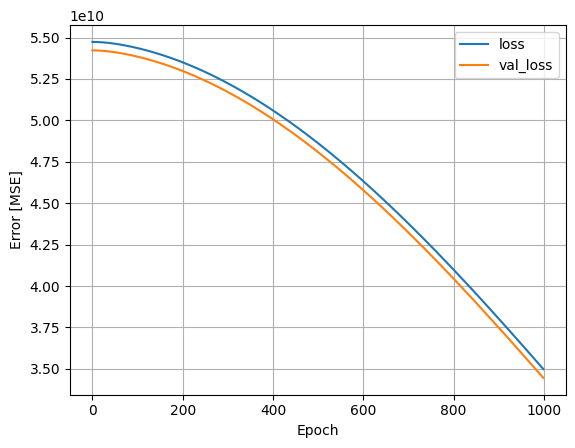

In [67]:
plot_loss(base_history)

Evaluamos la predicción inicial para train

In [68]:
def plot_prices_dist(y_pred, y_pred_test):
    precios_train = pd.concat([y_train, pd.DataFrame(y_pred, columns=['predicted'])], axis=1)
    precios_test = pd.concat([y_test, pd.DataFrame(y_pred_test, columns=['predicted'])], axis=1)
    fig, axs = plt.subplots(1, 3, figsize=(25, 5))

    fig.suptitle("Distribución de precios reales y predichos")

    axs[0].set_xlabel("Precio")
    axs[0].set_ylabel("Densidad")
    axs[0].set_title("Train")
    sns.kdeplot(precios_train['property_price'], ax=axs[0])
    sns.kdeplot(precios_train['predicted'], ax=axs[0])
    axs[0].legend(labels=['Real', 'Predicho'])

    axs[1].set_xlabel("Precio")
    axs[1].set_ylabel("Densidad")
    axs[1].set_title("Test")
    sns.kdeplot(precios_test['property_price'], ax=axs[1])
    sns.kdeplot(precios_test['predicted'], ax=axs[1])
    axs[1].legend(labels=['Real', 'Predicho'])

    axs[2].set_xlabel("Precio Real")
    axs[2].set_ylabel("Precio Predicho")
    axs[2].set_title("Real vs predicho")
    sns.scatterplot(x=precios_train['property_price'], y=precios_train['predicted'], ax=axs[2])
    sns.regplot(x=precios_train['property_price'], y=precios_train['predicted'], scatter=False, ax=axs[2], fit_reg=True,
                color='darkgreen', ci=0)
    axs[2].legend(labels=['Real', 'Predicho'])

In [69]:
y_pred_base = base_model.predict(x_train_tp1_transform)
y_pred_test_base = base_model.predict(x_test_tp1_transform)

330/330 [==============================] - 0s 466us/step


Metricas Red Neuronal Base - Train
El error (mse) es: 34797792556.497574
El error (rmse) es: 186541.6643983257
El error (r²) es: -0.6080302355624043

Metricas Red Neuronal Base - Test
El error (mse) es: 30161233317.114227
El error (rmse) es: 173669.89755600775
El error (r²) es: -0.5973598003389899



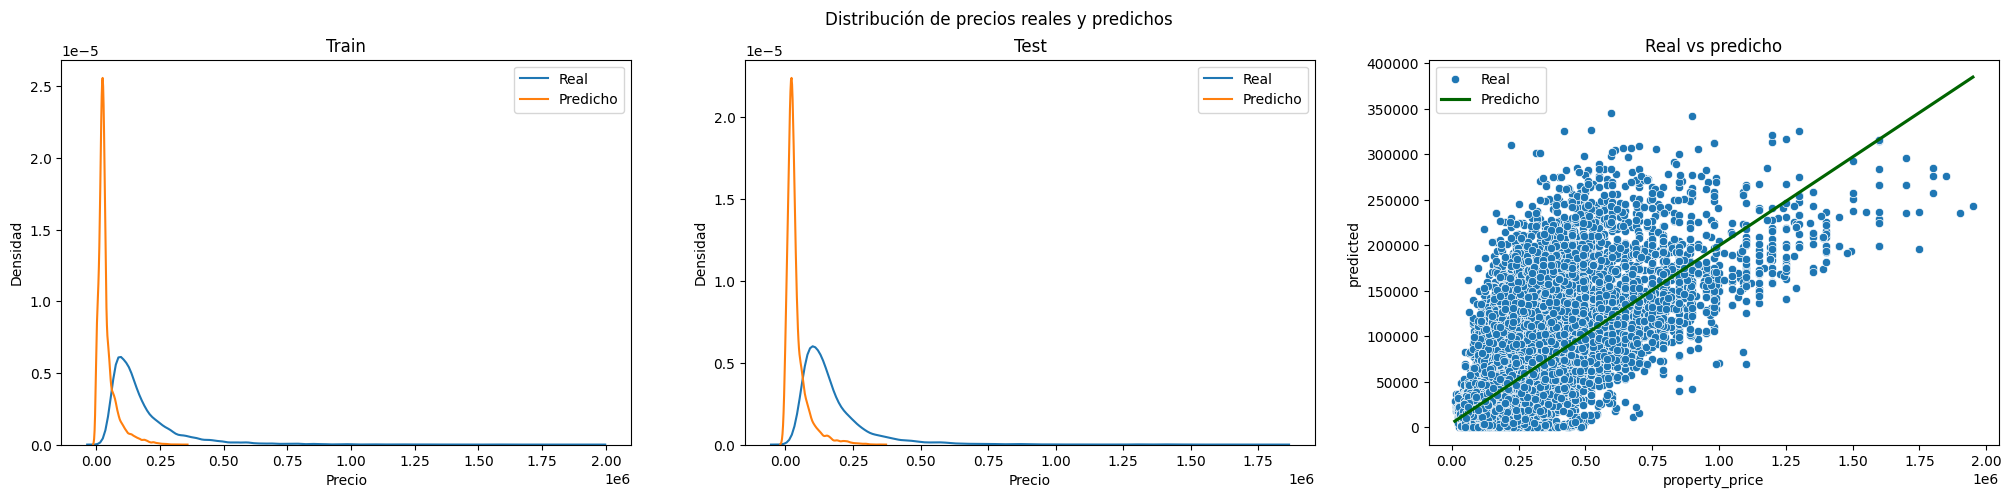

In [70]:
plot_prices_dist(y_pred_base, y_pred_test_base)
regression_metrics("Metricas Red Neuronal Base - Train", y_train, y_pred_base)
regression_metrics("Metricas Red Neuronal Base - Test", y_test, y_pred_test_base)

Vemos que hay mucha dispersión respecto a los precios reales, probaremos un modelo profundo con una capa intermedia con la mitad de las neuronas de la primera.

###### Modelo de 3 capas

In [71]:
def larger_model_builder():
    model = keras.Sequential([
        keras.layers.Dense(d_in, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(int(d_in / 2), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1, kernel_initializer='normal', activation='relu')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [72]:
larger_model_builder().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [73]:
larger_model = larger_model_builder()
larger_history = larger_model.fit(
    x_train_tp1_transform,
    y_train,
    epochs=1000,
    batch_size=1000,
    validation_split=0.33,
)

Epoch 1/1000
47/47 [==============================] - 0s 3ms/step - loss: 54733934592.0000 - val_loss: 54222184448.0000
Epoch 2/1000
47/47 [==============================] - 0s 1ms/step - loss: 54733860864.0000 - val_loss: 54222049280.0000
Epoch 3/1000
47/47 [==============================] - 0s 1ms/step - loss: 54733623296.0000 - val_loss: 54221643776.0000
Epoch 4/1000
47/47 [==============================] - 0s 1ms/step - loss: 54732988416.0000 - val_loss: 54220713984.0000
Epoch 5/1000
47/47 [==============================] - 0s 1ms/step - loss: 54731739136.0000 - val_loss: 54219067392.0000
Epoch 6/1000
47/47 [==============================] - 0s 2ms/step - loss: 54729658368.0000 - val_loss: 54216466432.0000
Epoch 7/1000
47/47 [==============================] - 0s 1ms/step - loss: 54726524928.0000 - val_loss: 54212714496.0000
Epoch 8/1000
47/47 [==============================] - 0s 1ms/step - loss: 54722146304.0000 - val_loss: 54207614976.0000
Epoch 9/1000
47/47 [====================

Epoch 69/1000
47/47 [==============================] - 0s 1ms/step - loss: 48535240704.0000 - val_loss: 47904464896.0000
Epoch 70/1000
47/47 [==============================] - 0s 1ms/step - loss: 48317923328.0000 - val_loss: 47684816896.0000
Epoch 71/1000
47/47 [==============================] - 0s 1ms/step - loss: 48097492992.0000 - val_loss: 47462719488.0000
Epoch 72/1000
47/47 [==============================] - 0s 1ms/step - loss: 47873187840.0000 - val_loss: 47238103040.0000
Epoch 73/1000
47/47 [==============================] - 0s 1ms/step - loss: 47645376512.0000 - val_loss: 47007752192.0000
Epoch 74/1000
47/47 [==============================] - 0s 2ms/step - loss: 47414128640.0000 - val_loss: 46774403072.0000
Epoch 75/1000
47/47 [==============================] - 0s 1ms/step - loss: 47179284480.0000 - val_loss: 46536863744.0000
Epoch 76/1000
47/47 [==============================] - 0s 1ms/step - loss: 46941073408.0000 - val_loss: 46296903680.0000
Epoch 77/1000
47/47 [===========

47/47 [==============================] - 0s 1ms/step - loss: 28703113216.0000 - val_loss: 28082552832.0000
Epoch 137/1000
47/47 [==============================] - 0s 1ms/step - loss: 28378320896.0000 - val_loss: 27759202304.0000
Epoch 138/1000
47/47 [==============================] - 0s 1ms/step - loss: 28054110208.0000 - val_loss: 27439149056.0000
Epoch 139/1000
47/47 [==============================] - 0s 1ms/step - loss: 27732062208.0000 - val_loss: 27118727168.0000
Epoch 140/1000
47/47 [==============================] - 0s 1ms/step - loss: 27410292736.0000 - val_loss: 26802184192.0000
Epoch 141/1000
47/47 [==============================] - 0s 1ms/step - loss: 27090296832.0000 - val_loss: 26487578624.0000
Epoch 142/1000
47/47 [==============================] - 0s 1ms/step - loss: 26772295680.0000 - val_loss: 26171768832.0000
Epoch 143/1000
47/47 [==============================] - 0s 1ms/step - loss: 26455289856.0000 - val_loss: 25860100096.0000
Epoch 144/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 12298371072.0000 - val_loss: 12071995392.0000
Epoch 204/1000
47/47 [==============================] - 0s 1ms/step - loss: 12166872064.0000 - val_loss: 11945654272.0000
Epoch 205/1000
47/47 [==============================] - 0s 1ms/step - loss: 12038114304.0000 - val_loss: 11824099328.0000
Epoch 206/1000
47/47 [==============================] - 0s 1ms/step - loss: 11912226816.0000 - val_loss: 11707147264.0000
Epoch 207/1000
47/47 [==============================] - 0s 1ms/step - loss: 11791553536.0000 - val_loss: 11591063552.0000
Epoch 208/1000
47/47 [==============================] - 0s 1ms/step - loss: 11672920064.0000 - val_loss: 11481836544.0000
Epoch 209/1000
47/47 [==============================] - 0s 2ms/step - loss: 11558347776.0000 - val_loss: 11371949056.0000
Epoch 210/1000
47/47 [==============================] - 0s 1ms/step - loss: 11446376448.0000 - val_loss: 11267160064.0000
Epoch 211/1000
47/47 [=================

Epoch 271/1000
47/47 [==============================] - 0s 1ms/step - loss: 8435486208.0000 - val_loss: 8432166912.0000
Epoch 272/1000
47/47 [==============================] - 0s 1ms/step - loss: 8408800768.0000 - val_loss: 8405179904.0000
Epoch 273/1000
47/47 [==============================] - 0s 1ms/step - loss: 8382408704.0000 - val_loss: 8377977856.0000
Epoch 274/1000
47/47 [==============================] - 0s 2ms/step - loss: 8355904000.0000 - val_loss: 8350666752.0000
Epoch 275/1000
47/47 [==============================] - 0s 1ms/step - loss: 8329207296.0000 - val_loss: 8323310080.0000
Epoch 276/1000
47/47 [==============================] - 0s 2ms/step - loss: 8302691840.0000 - val_loss: 8295469568.0000
Epoch 277/1000
47/47 [==============================] - 0s 1ms/step - loss: 8276312064.0000 - val_loss: 8268832256.0000
Epoch 278/1000
47/47 [==============================] - 0s 1ms/step - loss: 8249637376.0000 - val_loss: 8241308160.0000
Epoch 279/1000
47/47 [==================

47/47 [==============================] - 0s 1ms/step - loss: 6735685120.0000 - val_loss: 6671757824.0000
Epoch 340/1000
47/47 [==============================] - 0s 1ms/step - loss: 6712504320.0000 - val_loss: 6647526912.0000
Epoch 341/1000
47/47 [==============================] - 0s 1ms/step - loss: 6689565696.0000 - val_loss: 6622700544.0000
Epoch 342/1000
47/47 [==============================] - 0s 1ms/step - loss: 6666653184.0000 - val_loss: 6599776768.0000
Epoch 343/1000
47/47 [==============================] - 0s 1ms/step - loss: 6643814400.0000 - val_loss: 6575534592.0000
Epoch 344/1000
47/47 [==============================] - 0s 1ms/step - loss: 6621106176.0000 - val_loss: 6552498176.0000
Epoch 345/1000
47/47 [==============================] - 0s 1ms/step - loss: 6598620672.0000 - val_loss: 6528822272.0000
Epoch 346/1000
47/47 [==============================] - 0s 1ms/step - loss: 6576301568.0000 - val_loss: 6505251840.0000
Epoch 347/1000
47/47 [==============================] -

47/47 [==============================] - 0s 1ms/step - loss: 5439552000.0000 - val_loss: 5321328128.0000
Epoch 408/1000
47/47 [==============================] - 0s 1ms/step - loss: 5425327616.0000 - val_loss: 5307241472.0000
Epoch 409/1000
47/47 [==============================] - 0s 1ms/step - loss: 5411276288.0000 - val_loss: 5293064192.0000
Epoch 410/1000
47/47 [==============================] - 0s 1ms/step - loss: 5397181440.0000 - val_loss: 5279079424.0000
Epoch 411/1000
47/47 [==============================] - 0s 2ms/step - loss: 5383406592.0000 - val_loss: 5265316864.0000
Epoch 412/1000
47/47 [==============================] - 0s 1ms/step - loss: 5369485824.0000 - val_loss: 5251336192.0000
Epoch 413/1000
47/47 [==============================] - 0s 2ms/step - loss: 5356116480.0000 - val_loss: 5237755904.0000
Epoch 414/1000
47/47 [==============================] - 0s 2ms/step - loss: 5342746112.0000 - val_loss: 5224953856.0000
Epoch 415/1000
47/47 [==============================] -

47/47 [==============================] - 0s 1ms/step - loss: 4756568576.0000 - val_loss: 4651046912.0000
Epoch 476/1000
47/47 [==============================] - 0s 1ms/step - loss: 4749839360.0000 - val_loss: 4644190720.0000
Epoch 477/1000
47/47 [==============================] - 0s 1ms/step - loss: 4743080960.0000 - val_loss: 4639192576.0000
Epoch 478/1000
47/47 [==============================] - 0s 1ms/step - loss: 4736426496.0000 - val_loss: 4632617984.0000
Epoch 479/1000
47/47 [==============================] - 0s 2ms/step - loss: 4729779200.0000 - val_loss: 4625918464.0000
Epoch 480/1000
47/47 [==============================] - 0s 1ms/step - loss: 4723355648.0000 - val_loss: 4619404800.0000
Epoch 481/1000
47/47 [==============================] - 0s 1ms/step - loss: 4716810240.0000 - val_loss: 4613367808.0000
Epoch 482/1000
47/47 [==============================] - 0s 2ms/step - loss: 4710361600.0000 - val_loss: 4607815680.0000
Epoch 483/1000
47/47 [==============================] -

47/47 [==============================] - 0s 1ms/step - loss: 4421988352.0000 - val_loss: 4355418624.0000
Epoch 544/1000
47/47 [==============================] - 0s 1ms/step - loss: 4418735616.0000 - val_loss: 4352870912.0000
Epoch 545/1000
47/47 [==============================] - 0s 1ms/step - loss: 4415455744.0000 - val_loss: 4349388800.0000
Epoch 546/1000
47/47 [==============================] - 0s 2ms/step - loss: 4411992064.0000 - val_loss: 4347521536.0000
Epoch 547/1000
47/47 [==============================] - 0s 1ms/step - loss: 4408787456.0000 - val_loss: 4344587776.0000
Epoch 548/1000
47/47 [==============================] - 0s 1ms/step - loss: 4405676032.0000 - val_loss: 4340607488.0000
Epoch 549/1000
47/47 [==============================] - 0s 1ms/step - loss: 4402383360.0000 - val_loss: 4338348032.0000
Epoch 550/1000
47/47 [==============================] - 0s 1ms/step - loss: 4399147520.0000 - val_loss: 4335431168.0000
Epoch 551/1000
47/47 [==============================] -

47/47 [==============================] - 0s 1ms/step - loss: 4256118272.0000 - val_loss: 4204290816.0000
Epoch 612/1000
47/47 [==============================] - 0s 2ms/step - loss: 4254240256.0000 - val_loss: 4203273216.0000
Epoch 613/1000
47/47 [==============================] - 0s 2ms/step - loss: 4252377600.0000 - val_loss: 4200896000.0000
Epoch 614/1000
47/47 [==============================] - 0s 2ms/step - loss: 4250503680.0000 - val_loss: 4200279296.0000
Epoch 615/1000
47/47 [==============================] - 0s 1ms/step - loss: 4248694528.0000 - val_loss: 4198090496.0000
Epoch 616/1000
47/47 [==============================] - 0s 1ms/step - loss: 4246929920.0000 - val_loss: 4196683008.0000
Epoch 617/1000
47/47 [==============================] - 0s 1ms/step - loss: 4245136640.0000 - val_loss: 4194690816.0000
Epoch 618/1000
47/47 [==============================] - 0s 1ms/step - loss: 4243250688.0000 - val_loss: 4193405952.0000
Epoch 619/1000
47/47 [==============================] -

47/47 [==============================] - 0s 1ms/step - loss: 4146044928.0000 - val_loss: 4099596544.0000
Epoch 680/1000
47/47 [==============================] - 0s 1ms/step - loss: 4144801024.0000 - val_loss: 4098245120.0000
Epoch 681/1000
47/47 [==============================] - 0s 2ms/step - loss: 4143063808.0000 - val_loss: 4096970496.0000
Epoch 682/1000
47/47 [==============================] - 0s 2ms/step - loss: 4141678336.0000 - val_loss: 4095488512.0000
Epoch 683/1000
47/47 [==============================] - 0s 1ms/step - loss: 4140095744.0000 - val_loss: 4094287872.0000
Epoch 684/1000
47/47 [==============================] - 0s 1ms/step - loss: 4138600448.0000 - val_loss: 4092684544.0000
Epoch 685/1000
47/47 [==============================] - 0s 1ms/step - loss: 4137302784.0000 - val_loss: 4091361536.0000
Epoch 686/1000
47/47 [==============================] - 0s 2ms/step - loss: 4135866880.0000 - val_loss: 4089514240.0000
Epoch 687/1000
47/47 [==============================] -

47/47 [==============================] - 0s 2ms/step - loss: 4049816064.0000 - val_loss: 4003336960.0000
Epoch 748/1000
47/47 [==============================] - 0s 1ms/step - loss: 4048310784.0000 - val_loss: 4002713344.0000
Epoch 749/1000
47/47 [==============================] - 0s 1ms/step - loss: 4047080960.0000 - val_loss: 4001644800.0000
Epoch 750/1000
47/47 [==============================] - 0s 2ms/step - loss: 4045706240.0000 - val_loss: 3999423744.0000
Epoch 751/1000
47/47 [==============================] - 0s 2ms/step - loss: 4044383232.0000 - val_loss: 3998593536.0000
Epoch 752/1000
47/47 [==============================] - 0s 1ms/step - loss: 4043152640.0000 - val_loss: 3997435136.0000
Epoch 753/1000
47/47 [==============================] - 0s 1ms/step - loss: 4041657344.0000 - val_loss: 3995432960.0000
Epoch 754/1000
47/47 [==============================] - 0s 1ms/step - loss: 4040373760.0000 - val_loss: 3994166016.0000
Epoch 755/1000
47/47 [==============================] -

47/47 [==============================] - 0s 1ms/step - loss: 3965154560.0000 - val_loss: 3916391424.0000
Epoch 816/1000
47/47 [==============================] - 0s 1ms/step - loss: 3964214272.0000 - val_loss: 3915498752.0000
Epoch 817/1000
47/47 [==============================] - 0s 1ms/step - loss: 3962792448.0000 - val_loss: 3913563648.0000
Epoch 818/1000
47/47 [==============================] - 0s 2ms/step - loss: 3961700864.0000 - val_loss: 3912296192.0000
Epoch 819/1000
47/47 [==============================] - 0s 2ms/step - loss: 3960447232.0000 - val_loss: 3912069376.0000
Epoch 820/1000
47/47 [==============================] - 0s 1ms/step - loss: 3959331072.0000 - val_loss: 3910198784.0000
Epoch 821/1000
47/47 [==============================] - 0s 2ms/step - loss: 3958185472.0000 - val_loss: 3908942336.0000
Epoch 822/1000
47/47 [==============================] - 0s 2ms/step - loss: 3957010176.0000 - val_loss: 3907553792.0000
Epoch 823/1000
47/47 [==============================] -

47/47 [==============================] - 0s 1ms/step - loss: 3890481664.0000 - val_loss: 3839850752.0000
Epoch 884/1000
47/47 [==============================] - 0s 1ms/step - loss: 3889562112.0000 - val_loss: 3837948672.0000
Epoch 885/1000
47/47 [==============================] - 0s 1ms/step - loss: 3888413952.0000 - val_loss: 3836910848.0000
Epoch 886/1000
47/47 [==============================] - 0s 1ms/step - loss: 3887368448.0000 - val_loss: 3835817728.0000
Epoch 887/1000
47/47 [==============================] - 0s 1ms/step - loss: 3886249216.0000 - val_loss: 3834880256.0000
Epoch 888/1000
47/47 [==============================] - 0s 1ms/step - loss: 3885377536.0000 - val_loss: 3834255616.0000
Epoch 889/1000
47/47 [==============================] - 0s 1ms/step - loss: 3884331264.0000 - val_loss: 3832519168.0000
Epoch 890/1000
47/47 [==============================] - 0s 2ms/step - loss: 3883235840.0000 - val_loss: 3832052224.0000
Epoch 891/1000
47/47 [==============================] -

47/47 [==============================] - 0s 1ms/step - loss: 3826560768.0000 - val_loss: 3772816896.0000
Epoch 952/1000
47/47 [==============================] - 0s 1ms/step - loss: 3825693440.0000 - val_loss: 3771941888.0000
Epoch 953/1000
47/47 [==============================] - 0s 1ms/step - loss: 3824858368.0000 - val_loss: 3770522112.0000
Epoch 954/1000
47/47 [==============================] - 0s 1ms/step - loss: 3823959808.0000 - val_loss: 3770074368.0000
Epoch 955/1000
47/47 [==============================] - 0s 1ms/step - loss: 3823242752.0000 - val_loss: 3769347840.0000
Epoch 956/1000
47/47 [==============================] - 0s 2ms/step - loss: 3822458880.0000 - val_loss: 3768553728.0000
Epoch 957/1000
47/47 [==============================] - 0s 2ms/step - loss: 3821718784.0000 - val_loss: 3768049664.0000
Epoch 958/1000
47/47 [==============================] - 0s 1ms/step - loss: 3820685056.0000 - val_loss: 3766849280.0000
Epoch 959/1000
47/47 [==============================] -

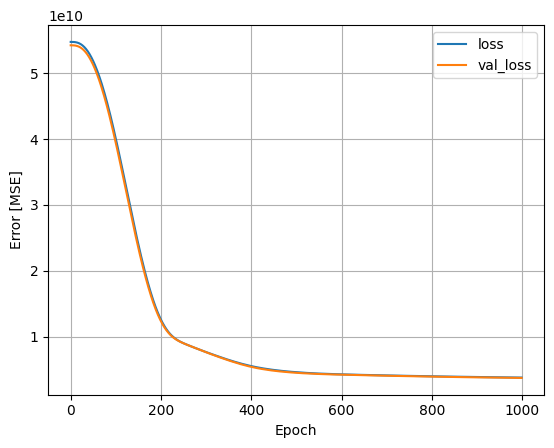

In [74]:
plot_loss(larger_history)

In [75]:
y_pred_larger = larger_model.predict(x_train_tp1_transform)
y_pred_larger_test = larger_model.predict(x_test_tp1_transform)

330/330 [==============================] - 0s 468us/step


Metricas Red Neuronal Profunda - Train
El error (mse) es: 3769881936.037569
El error (rmse) es: 61399.36429668934
El error (r²) es: 0.8257911294859706

Metricas Red Neuronal Profunda - Test
El error (mse) es: 3465105058.041389
El error (rmse) es: 58865.14297987722
El error (r²) es: 0.8164856368613445



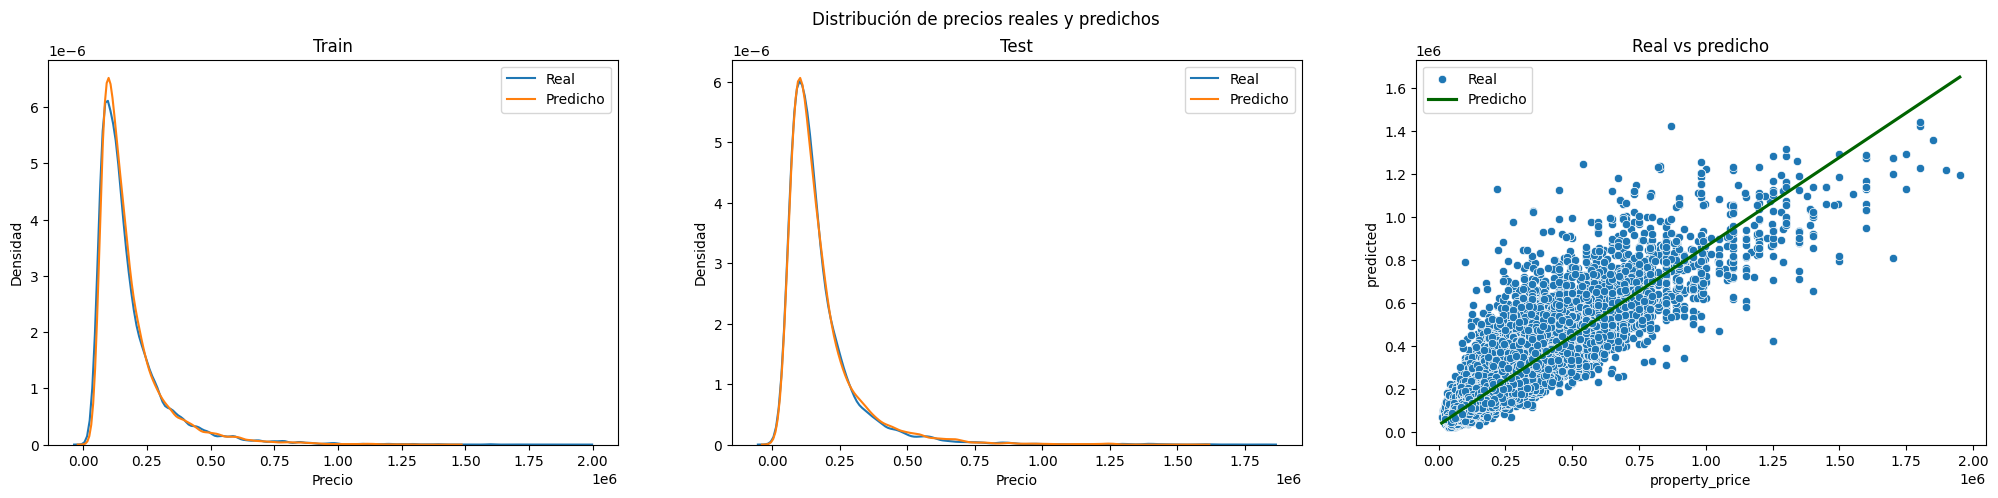

In [76]:
plot_prices_dist(y_pred_larger, y_pred_larger_test)
regression_metrics("Metricas Red Neuronal Profunda - Train", y_train, y_pred_larger)
regression_metrics("Metricas Red Neuronal Profunda - Test", y_test, y_pred_larger_test)

Por último, probaremos un tercer modelo con una capa inical más ancha.

###### Modelo ancho

In [77]:
def wider_model_builder():
    model = keras.Sequential([
        keras.layers.Dense(d_in * 2, input_shape=(d_in,), kernel_initializer='normal', activation='relu'),
        keras.layers.Dense(1, kernel_initializer='normal', activation='relu')
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [78]:
wider_model_builder().summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                144       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [79]:
wider_model = wider_model_builder()
wider_history = wider_model.fit(
    x_train_tp1_transform,
    y_train,
    epochs=1000,
    batch_size=1000,
    validation_split=0.33,
)

Epoch 1/1000
47/47 [==============================] - 0s 3ms/step - loss: 54733930496.0000 - val_loss: 54222155776.0000
Epoch 2/1000
47/47 [==============================] - 0s 1ms/step - loss: 54733799424.0000 - val_loss: 54221955072.0000
Epoch 3/1000
47/47 [==============================] - 0s 1ms/step - loss: 54733529088.0000 - val_loss: 54221561856.0000
Epoch 4/1000
47/47 [==============================] - 0s 1ms/step - loss: 54733029376.0000 - val_loss: 54220955648.0000
Epoch 5/1000
47/47 [==============================] - 0s 1ms/step - loss: 54732324864.0000 - val_loss: 54220144640.0000
Epoch 6/1000
47/47 [==============================] - 0s 1ms/step - loss: 54731423744.0000 - val_loss: 54219137024.0000
Epoch 7/1000
47/47 [==============================] - 0s 1ms/step - loss: 54730330112.0000 - val_loss: 54217945088.0000
Epoch 8/1000
47/47 [==============================] - 0s 1ms/step - loss: 54729048064.0000 - val_loss: 54216568832.0000
Epoch 9/1000
47/47 [====================

Epoch 69/1000
47/47 [==============================] - 0s 1ms/step - loss: 54383628288.0000 - val_loss: 53866033152.0000
Epoch 70/1000
47/47 [==============================] - 0s 1ms/step - loss: 54374539264.0000 - val_loss: 53856927744.0000
Epoch 71/1000
47/47 [==============================] - 0s 1ms/step - loss: 54365396992.0000 - val_loss: 53847674880.0000
Epoch 72/1000
47/47 [==============================] - 0s 1ms/step - loss: 54356148224.0000 - val_loss: 53838368768.0000
Epoch 73/1000
47/47 [==============================] - 0s 1ms/step - loss: 54346825728.0000 - val_loss: 53828943872.0000
Epoch 74/1000
47/47 [==============================] - 0s 1ms/step - loss: 54337363968.0000 - val_loss: 53819437056.0000
Epoch 75/1000
47/47 [==============================] - 0s 1ms/step - loss: 54327840768.0000 - val_loss: 53809827840.0000
Epoch 76/1000
47/47 [==============================] - 0s 1ms/step - loss: 54318219264.0000 - val_loss: 53800173568.0000
Epoch 77/1000
47/47 [===========

47/47 [==============================] - 0s 2ms/step - loss: 53589798912.0000 - val_loss: 53067186176.0000
Epoch 137/1000
47/47 [==============================] - 0s 1ms/step - loss: 53575274496.0000 - val_loss: 53052567552.0000
Epoch 138/1000
47/47 [==============================] - 0s 1ms/step - loss: 53560659968.0000 - val_loss: 53037867008.0000
Epoch 139/1000
47/47 [==============================] - 0s 1ms/step - loss: 53545996288.0000 - val_loss: 53023072256.0000
Epoch 140/1000
47/47 [==============================] - 0s 1ms/step - loss: 53531250688.0000 - val_loss: 53008318464.0000
Epoch 141/1000
47/47 [==============================] - 0s 1ms/step - loss: 53516451840.0000 - val_loss: 52993392640.0000
Epoch 142/1000
47/47 [==============================] - 0s 1ms/step - loss: 53501517824.0000 - val_loss: 52978413568.0000
Epoch 143/1000
47/47 [==============================] - 0s 1ms/step - loss: 53486546944.0000 - val_loss: 52963332096.0000
Epoch 144/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 52453023744.0000 - val_loss: 51924865024.0000
Epoch 204/1000
47/47 [==============================] - 0s 1ms/step - loss: 52433694720.0000 - val_loss: 51905478656.0000
Epoch 205/1000
47/47 [==============================] - 0s 1ms/step - loss: 52414271488.0000 - val_loss: 51885809664.0000
Epoch 206/1000
47/47 [==============================] - 0s 1ms/step - loss: 52394737664.0000 - val_loss: 51866300416.0000
Epoch 207/1000
47/47 [==============================] - 0s 1ms/step - loss: 52375134208.0000 - val_loss: 51846631424.0000
Epoch 208/1000
47/47 [==============================] - 0s 1ms/step - loss: 52355473408.0000 - val_loss: 51826843648.0000
Epoch 209/1000
47/47 [==============================] - 0s 1ms/step - loss: 52335689728.0000 - val_loss: 51806973952.0000
Epoch 210/1000
47/47 [==============================] - 0s 1ms/step - loss: 52315807744.0000 - val_loss: 51787079680.0000
Epoch 211/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 51002343424.0000 - val_loss: 50468466688.0000
Epoch 271/1000
47/47 [==============================] - 0s 1ms/step - loss: 50978398208.0000 - val_loss: 50444607488.0000
Epoch 272/1000
47/47 [==============================] - 0s 1ms/step - loss: 50954444800.0000 - val_loss: 50420412416.0000
Epoch 273/1000
47/47 [==============================] - 0s 1ms/step - loss: 50930388992.0000 - val_loss: 50396418048.0000
Epoch 274/1000
47/47 [==============================] - 0s 1ms/step - loss: 50906251264.0000 - val_loss: 50371960832.0000
Epoch 275/1000
47/47 [==============================] - 0s 1ms/step - loss: 50881970176.0000 - val_loss: 50347778048.0000
Epoch 276/1000
47/47 [==============================] - 0s 1ms/step - loss: 50857791488.0000 - val_loss: 50323525632.0000
Epoch 277/1000
47/47 [==============================] - 0s 1ms/step - loss: 50833465344.0000 - val_loss: 50299011072.0000
Epoch 278/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 49262452736.0000 - val_loss: 48723136512.0000
Epoch 338/1000
47/47 [==============================] - 0s 1ms/step - loss: 49234481152.0000 - val_loss: 48695033856.0000
Epoch 339/1000
47/47 [==============================] - 0s 1ms/step - loss: 49206370304.0000 - val_loss: 48666959872.0000
Epoch 340/1000
47/47 [==============================] - 0s 1ms/step - loss: 49178308608.0000 - val_loss: 48638844928.0000
Epoch 341/1000
47/47 [==============================] - 0s 1ms/step - loss: 49150124032.0000 - val_loss: 48610566144.0000
Epoch 342/1000
47/47 [==============================] - 0s 1ms/step - loss: 49121882112.0000 - val_loss: 48582262784.0000
Epoch 343/1000
47/47 [==============================] - 0s 1ms/step - loss: 49093525504.0000 - val_loss: 48553836544.0000
Epoch 344/1000
47/47 [==============================] - 0s 1ms/step - loss: 49065082880.0000 - val_loss: 48525180928.0000
Epoch 345/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 47259840512.0000 - val_loss: 46715777024.0000
Epoch 405/1000
47/47 [==============================] - 0s 1ms/step - loss: 47228121088.0000 - val_loss: 46684217344.0000
Epoch 406/1000
47/47 [==============================] - 0s 1ms/step - loss: 47196393472.0000 - val_loss: 46652432384.0000
Epoch 407/1000
47/47 [==============================] - 0s 1ms/step - loss: 47164530688.0000 - val_loss: 46620254208.0000
Epoch 408/1000
47/47 [==============================] - 0s 1ms/step - loss: 47132585984.0000 - val_loss: 46588321792.0000
Epoch 409/1000
47/47 [==============================] - 0s 1ms/step - loss: 47100555264.0000 - val_loss: 46556499968.0000
Epoch 410/1000
47/47 [==============================] - 0s 1ms/step - loss: 47068471296.0000 - val_loss: 46524035072.0000
Epoch 411/1000
47/47 [==============================] - 0s 1ms/step - loss: 47036362752.0000 - val_loss: 46491914240.0000
Epoch 412/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 45023911936.0000 - val_loss: 44476706816.0000
Epoch 472/1000
47/47 [==============================] - 0s 1ms/step - loss: 44988960768.0000 - val_loss: 44441440256.0000
Epoch 473/1000
47/47 [==============================] - 0s 1ms/step - loss: 44953792512.0000 - val_loss: 44406345728.0000
Epoch 474/1000
47/47 [==============================] - 0s 1ms/step - loss: 44918755328.0000 - val_loss: 44371283968.0000
Epoch 475/1000
47/47 [==============================] - 0s 1ms/step - loss: 44883619840.0000 - val_loss: 44336250880.0000
Epoch 476/1000
47/47 [==============================] - 0s 1ms/step - loss: 44848504832.0000 - val_loss: 44300787712.0000
Epoch 477/1000
47/47 [==============================] - 0s 1ms/step - loss: 44813250560.0000 - val_loss: 44265566208.0000
Epoch 478/1000
47/47 [==============================] - 0s 1ms/step - loss: 44777938944.0000 - val_loss: 44230389760.0000
Epoch 479/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 42587000832.0000 - val_loss: 42038308864.0000
Epoch 539/1000
47/47 [==============================] - 0s 1ms/step - loss: 42549280768.0000 - val_loss: 42000539648.0000
Epoch 540/1000
47/47 [==============================] - 0s 1ms/step - loss: 42511474688.0000 - val_loss: 41962835968.0000
Epoch 541/1000
47/47 [==============================] - 0s 1ms/step - loss: 42473684992.0000 - val_loss: 41924583424.0000
Epoch 542/1000
47/47 [==============================] - 0s 1ms/step - loss: 42435616768.0000 - val_loss: 41887141888.0000
Epoch 543/1000
47/47 [==============================] - 0s 1ms/step - loss: 42397851648.0000 - val_loss: 41848934400.0000
Epoch 544/1000
47/47 [==============================] - 0s 1ms/step - loss: 42359881728.0000 - val_loss: 41811030016.0000
Epoch 545/1000
47/47 [==============================] - 0s 1ms/step - loss: 42321895424.0000 - val_loss: 41773043712.0000
Epoch 546/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 39982346240.0000 - val_loss: 39434813440.0000
Epoch 606/1000
47/47 [==============================] - 0s 1ms/step - loss: 39942381568.0000 - val_loss: 39394955264.0000
Epoch 607/1000
47/47 [==============================] - 0s 1ms/step - loss: 39902453760.0000 - val_loss: 39355084800.0000
Epoch 608/1000
47/47 [==============================] - 0s 1ms/step - loss: 39862513664.0000 - val_loss: 39315091456.0000
Epoch 609/1000
47/47 [==============================] - 0s 1ms/step - loss: 39822483456.0000 - val_loss: 39275110400.0000
Epoch 610/1000
47/47 [==============================] - 0s 1ms/step - loss: 39782350848.0000 - val_loss: 39235190784.0000
Epoch 611/1000
47/47 [==============================] - 0s 1ms/step - loss: 39742361600.0000 - val_loss: 39194800128.0000
Epoch 612/1000
47/47 [==============================] - 0s 1ms/step - loss: 39702114304.0000 - val_loss: 39155040256.0000
Epoch 613/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 37250011136.0000 - val_loss: 36707209216.0000
Epoch 673/1000
47/47 [==============================] - 0s 1ms/step - loss: 37208420352.0000 - val_loss: 36665823232.0000
Epoch 674/1000
47/47 [==============================] - 0s 1ms/step - loss: 37166735360.0000 - val_loss: 36624244736.0000
Epoch 675/1000
47/47 [==============================] - 0s 1ms/step - loss: 37125038080.0000 - val_loss: 36582379520.0000
Epoch 676/1000
47/47 [==============================] - 0s 1ms/step - loss: 37083332608.0000 - val_loss: 36540973056.0000
Epoch 677/1000
47/47 [==============================] - 0s 1ms/step - loss: 37041770496.0000 - val_loss: 36499517440.0000
Epoch 678/1000
47/47 [==============================] - 0s 1ms/step - loss: 37000052736.0000 - val_loss: 36457951232.0000
Epoch 679/1000
47/47 [==============================] - 0s 1ms/step - loss: 36958412800.0000 - val_loss: 36416262144.0000
Epoch 680/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 34430099456.0000 - val_loss: 33896478720.0000
Epoch 740/1000
47/47 [==============================] - 0s 1ms/step - loss: 34387591168.0000 - val_loss: 33854132224.0000
Epoch 741/1000
47/47 [==============================] - 0s 1ms/step - loss: 34345099264.0000 - val_loss: 33811462144.0000
Epoch 742/1000
47/47 [==============================] - 0s 1ms/step - loss: 34302472192.0000 - val_loss: 33769279488.0000
Epoch 743/1000
47/47 [==============================] - 0s 1ms/step - loss: 34259943424.0000 - val_loss: 33727027200.0000
Epoch 744/1000
47/47 [==============================] - 0s 1ms/step - loss: 34217408512.0000 - val_loss: 33684508672.0000
Epoch 745/1000
47/47 [==============================] - 0s 1ms/step - loss: 34174785536.0000 - val_loss: 33642184704.0000
Epoch 746/1000
47/47 [==============================] - 0s 1ms/step - loss: 34132207616.0000 - val_loss: 33599600640.0000
Epoch 747/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 31566161920.0000 - val_loss: 31046979584.0000
Epoch 807/1000
47/47 [==============================] - 0s 1ms/step - loss: 31523512320.0000 - val_loss: 31004160000.0000
Epoch 808/1000
47/47 [==============================] - 0s 1ms/step - loss: 31480578048.0000 - val_loss: 30961573888.0000
Epoch 809/1000
47/47 [==============================] - 0s 1ms/step - loss: 31437787136.0000 - val_loss: 30919012352.0000
Epoch 810/1000
47/47 [==============================] - 0s 1ms/step - loss: 31394975744.0000 - val_loss: 30876516352.0000
Epoch 811/1000
47/47 [==============================] - 0s 1ms/step - loss: 31352238080.0000 - val_loss: 30833977344.0000
Epoch 812/1000
47/47 [==============================] - 0s 1ms/step - loss: 31309430784.0000 - val_loss: 30791225344.0000
Epoch 813/1000
47/47 [==============================] - 0s 1ms/step - loss: 31266617344.0000 - val_loss: 30749052928.0000
Epoch 814/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 28706840576.0000 - val_loss: 28207357952.0000
Epoch 874/1000
47/47 [==============================] - 0s 1ms/step - loss: 28664465408.0000 - val_loss: 28165126144.0000
Epoch 875/1000
47/47 [==============================] - 0s 1ms/step - loss: 28622086144.0000 - val_loss: 28123246592.0000
Epoch 876/1000
47/47 [==============================] - 0s 1ms/step - loss: 28579733504.0000 - val_loss: 28081205248.0000
Epoch 877/1000
47/47 [==============================] - 0s 1ms/step - loss: 28537397248.0000 - val_loss: 28039374848.0000
Epoch 878/1000
47/47 [==============================] - 0s 1ms/step - loss: 28495069184.0000 - val_loss: 27997310976.0000
Epoch 879/1000
47/47 [==============================] - 0s 1ms/step - loss: 28452620288.0000 - val_loss: 27955398656.0000
Epoch 880/1000
47/47 [==============================] - 0s 1ms/step - loss: 28410200064.0000 - val_loss: 27913172992.0000
Epoch 881/1000
47/47 [=================

47/47 [==============================] - 0s 1ms/step - loss: 25900726272.0000 - val_loss: 25427845120.0000
Epoch 941/1000
47/47 [==============================] - 0s 1ms/step - loss: 25859502080.0000 - val_loss: 25386956800.0000
Epoch 942/1000
47/47 [==============================] - 0s 1ms/step - loss: 25818122240.0000 - val_loss: 25346150400.0000
Epoch 943/1000
47/47 [==============================] - 0s 1ms/step - loss: 25776855040.0000 - val_loss: 25305276416.0000
Epoch 944/1000
47/47 [==============================] - 0s 1ms/step - loss: 25735632896.0000 - val_loss: 25264590848.0000
Epoch 945/1000
47/47 [==============================] - 0s 1ms/step - loss: 25694400512.0000 - val_loss: 25223759872.0000
Epoch 946/1000
47/47 [==============================] - 0s 1ms/step - loss: 25653155840.0000 - val_loss: 25183170560.0000
Epoch 947/1000
47/47 [==============================] - 0s 1ms/step - loss: 25612085248.0000 - val_loss: 25142233088.0000
Epoch 948/1000
47/47 [=================

In [80]:
y_pred_wider = wider_model.predict(x_train_tp1_transform)
y_pred_wider_test = wider_model.predict(x_test_tp1_transform)

330/330 [==============================] - 0s 450us/step


Metricas Red Neuronal Profunda - Train
El error (mse) es: 23309660674.23396
El error (rmse) es: 152675.01653588892
El error (r²) es: -0.07715565819330239

Metricas Red Neuronal Profunda - Test
El error (mse) es: 19525638306.447437
El error (rmse) es: 139734.17014620095
El error (r²) es: -0.03409132440816154



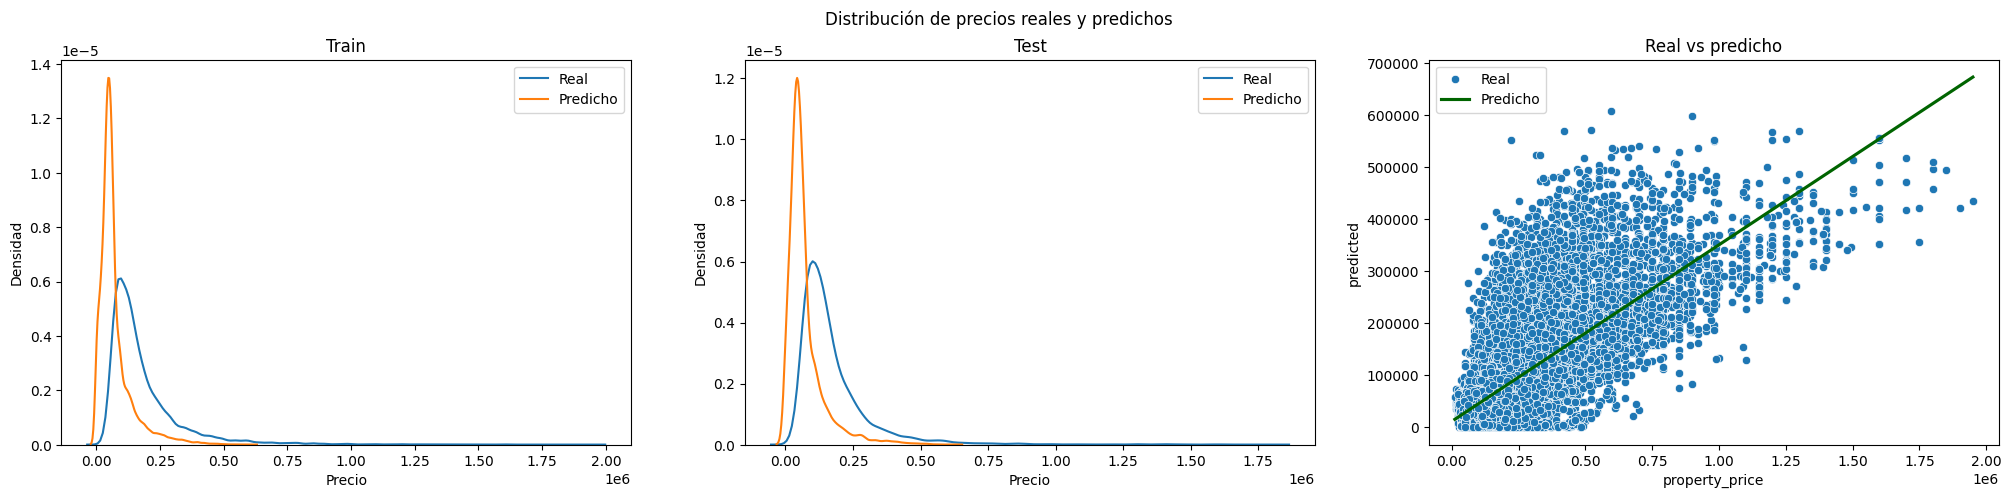

In [81]:
plot_prices_dist(y_pred_wider, y_pred_wider_test)
regression_metrics("Metricas Red Neuronal Profunda - Train", y_train, y_pred_wider)
regression_metrics("Metricas Red Neuronal Profunda - Test", y_test, y_pred_wider_test)

##### Análisis de métricas

Metricas Red Neuronal Profunda - Train
El error (mse) es: 3769881936.037569
El error (rmse) es: 61399.36429668934
El error (r²) es: 0.8257911294859706

Metricas Red Neuronal Profunda - Test
El error (mse) es: 3465105058.041389
El error (rmse) es: 58865.14297987722
El error (r²) es: 0.8164856368613445



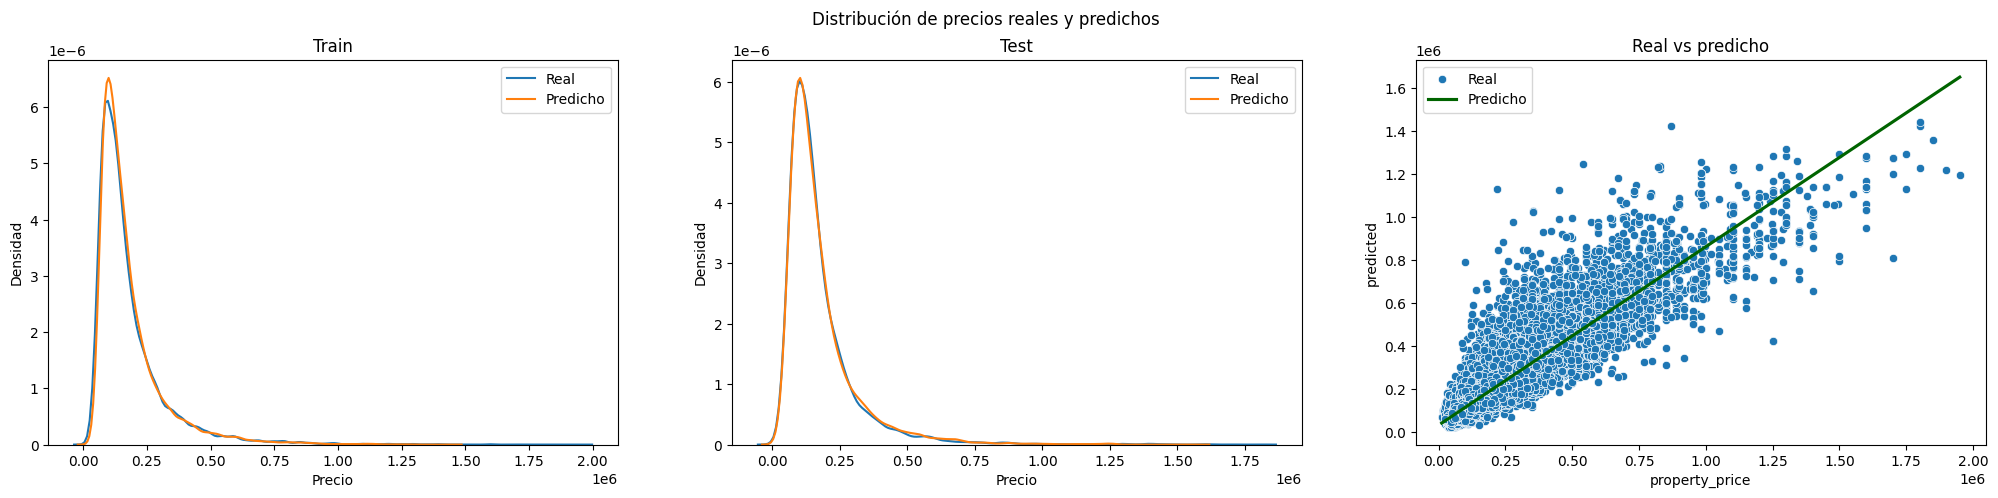

In [82]:
plot_prices_dist(y_pred_larger, y_pred_larger_test)
regression_metrics("Metricas Red Neuronal Profunda - Train", y_train, y_pred_larger)
regression_metrics("Metricas Red Neuronal Profunda - Test", y_test, y_pred_larger_test)

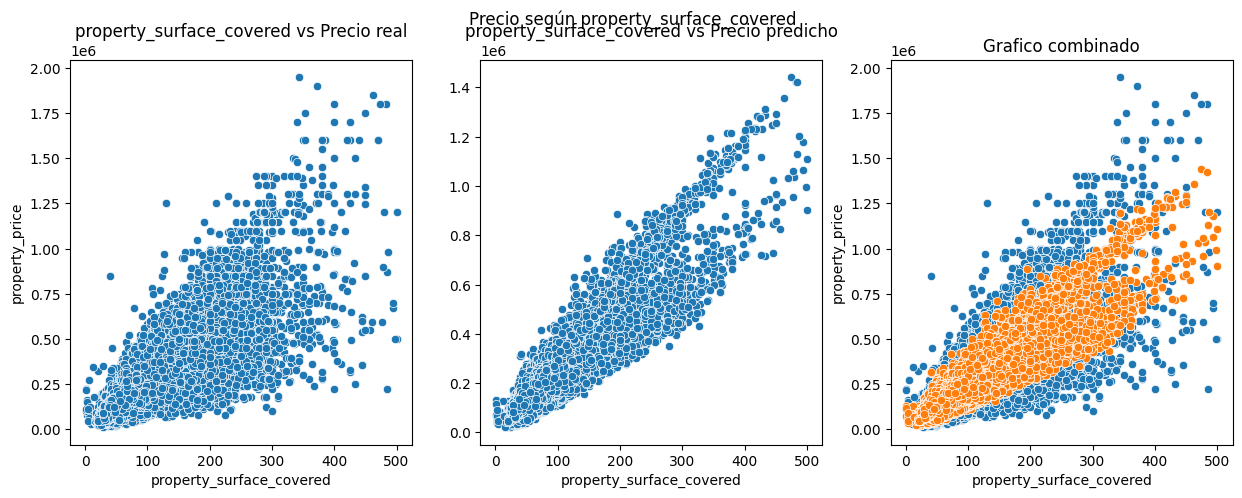

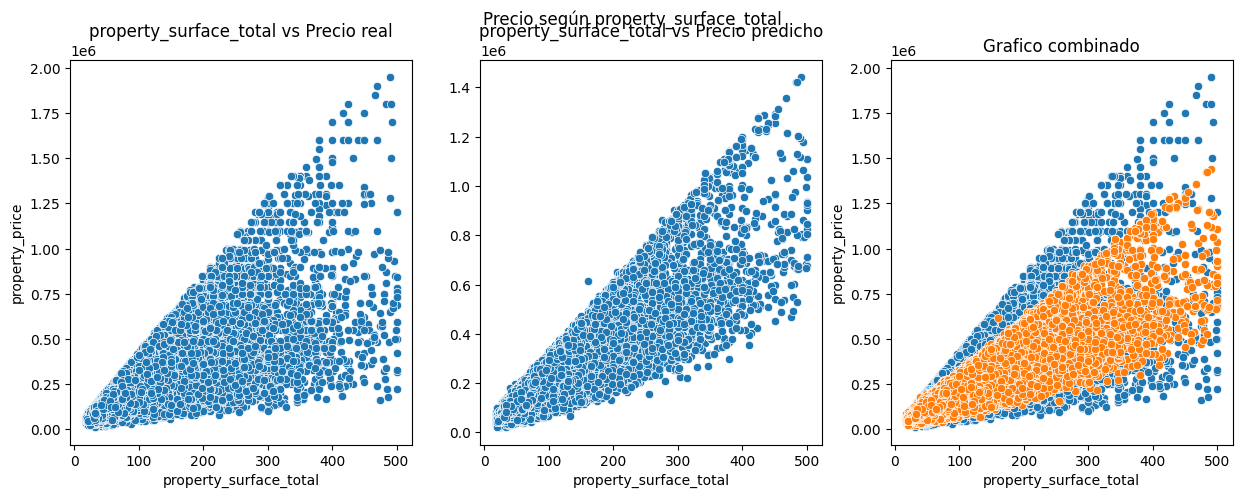

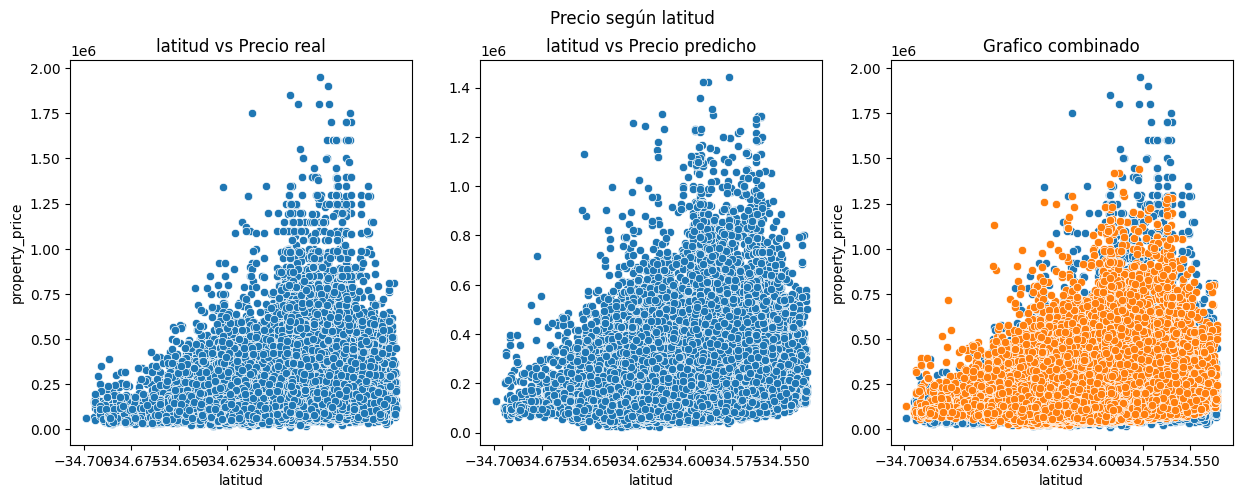

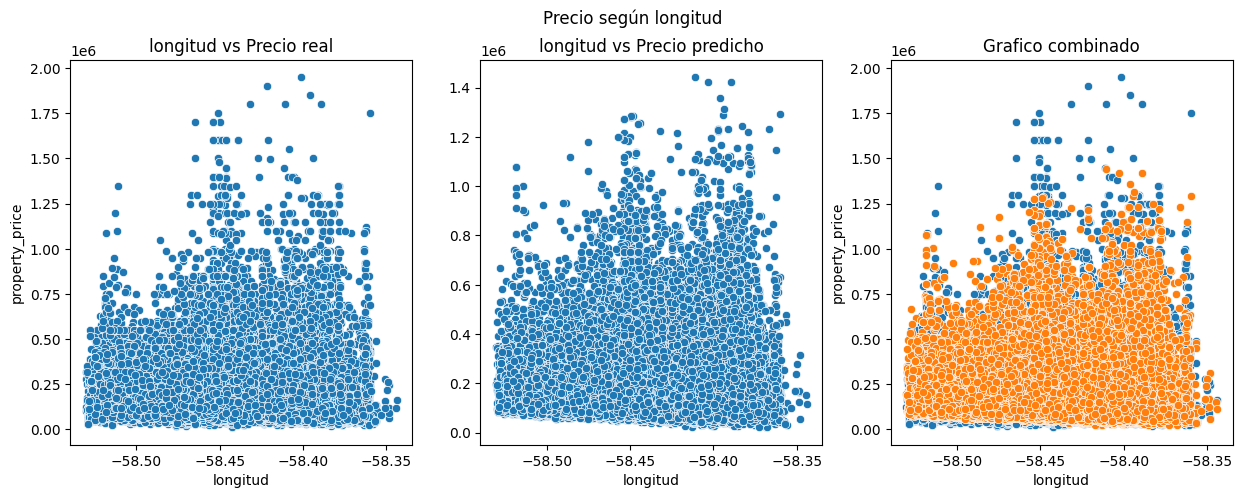

In [83]:
regression_scatter(ds_train.property_surface_covered, y_train, y_pred_larger[:, 0])
regression_scatter(ds_train.property_surface_total, y_train, y_pred_larger[:, 0])
regression_scatter(ds_train.latitud, y_train, y_pred_larger[:, 0])
regression_scatter(ds_train.longitud, y_train, y_pred_larger[:, 0])

Podemos ver que las predicciones mejoraron muchísimo y que los precios están cerca de los reales. Sin embargo, falta bastante para llegar a un buen resultado.

In [84]:
dump(larger_model, 'models/redes_neuronales_regresion.joblib')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2022-12-08 11:13:55        22480
metadata.json                                  2022-12-08 11:13:55           64
config.json                                    2022-12-08 11:13:55         1897


['models/redes_neuronales_regresion.joblib']

###### Cosas a probar para mejorar el modelo:
- Más capas intermedias
- Diferentes funciones de activación
- Usar otro escalado

#### Clasificación

In [85]:
def predicciones_clasificacion(modelo, x_train, x_test, y_train, y_test):
    # Predicciones Train
    output_modelo = modelo.predict(x_train)

    predicciones = np.argmax(output_modelo, axis=1).tolist()
    valores_esperados = np.argmax(y_train, axis=1).tolist()
    matriz_de_metricas = confusion_matrix(predicciones, valores_esperados)

    sns.heatmap(matriz_de_metricas, annot=True, cmap='Blues', fmt='g').set(
        title='Predicciones sobre el conjunto de entrenamiento')
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.show()
    print(classification_report(predicciones, valores_esperados))

    # Predicciones Test
    output_modelo = modelo.predict(x_test)

    predicciones = np.argmax(output_modelo, axis=1).tolist()
    valores_esperados = np.argmax(y_test, axis=1).tolist()
    matriz_de_metricas = confusion_matrix(predicciones, valores_esperados)

    sns.heatmap(matriz_de_metricas, annot=True, cmap='Blues', fmt='g').set(
        title='Predicciones sobre el conjunto de testeo')
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.show()
    print(classification_report(predicciones, valores_esperados))
    
def plot_convergion(train_history, cant_epochs):
    epochs = range(cant_epochs)
    plt.plot(epochs, train_history.history['loss'], color='orange', label='loss')
    plt.plot(epochs, train_history.history['accuracy'], color='blue', label='accuracy')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()

##### Preparación del dataset

In [86]:
scaler = StandardScaler()
ohe = OneHotEncoder()

In [87]:
x_train_tp1

latitud   longitud  place_l3  property_type  property_rooms  \
0     -34.551623 -58.491771         0              0             1.0   
1     -34.576289 -58.463635         1              1             3.0   
2     -34.600150 -58.378244         2              0             2.0   
3     -34.641450 -58.372804         3              0             4.0   
4     -34.629050 -58.468088         4              2             5.0   
...          ...        ...       ...            ...             ...   
69137 -34.608522 -58.430410        10              0             4.0   
69138 -34.625448 -58.524920        45              2             6.0   
69139 -34.558831 -58.462175         8              0             4.0   
69140 -34.604841 -58.495192        34              0             3.0   
69141 -34.628746 -58.463183         4              2             4.0   

       property_bedrooms  property_surface_total  property_surface_covered  
0                    1.0                    37.0                      33.0  
1                    2.0                   144.0                     144.0  
2                    1.0                    46.0                      41.0  
3                    3.0                    65.0                      65.0  
4                    4.0                   215.0                     155.0  
...                  ...                     ...                       ...  
69137                3.0                   103.0                      94.0  
69138                5.0                   300.0                     200.0  
69139                3.0                   129.0                     114.0  
69140                2.0                    64.0                      46.0  
69141                3.0                   165.0                     123.0  

[69142 rows x 8 columns]

In [88]:
x_train_clasificacion = x_train_tp1.drop(columns=['place_l3', 'property_type'])
# x_train_clasificacion = x_train_clasificacion.join(ohe_place_l3_train)
x_train_clasificacion = x_train_clasificacion.join(ohe_property_type_train)

x_test_clasificacion = x_test_tp1.drop(columns=['place_l3', 'property_type'])
# x_test_clasificacion = x_test_clasificacion.join(ohe_place_l3_train)
x_test_clasificacion = x_test_clasificacion.join(ohe_property_type_train)
x_train_clasificacion

latitud   longitud  property_rooms  property_bedrooms  \
0     -34.551623 -58.491771             1.0                1.0   
1     -34.576289 -58.463635             3.0                2.0   
2     -34.600150 -58.378244             2.0                1.0   
3     -34.641450 -58.372804             4.0                3.0   
4     -34.629050 -58.468088             5.0                4.0   
...          ...        ...             ...                ...   
69137 -34.608522 -58.430410             4.0                3.0   
69138 -34.625448 -58.524920             6.0                5.0   
69139 -34.558831 -58.462175             4.0                3.0   
69140 -34.604841 -58.495192             3.0                2.0   
69141 -34.628746 -58.463183             4.0                3.0   

       property_surface_total  property_surface_covered  property_type_Casa  \
0                        37.0                      33.0                   0   
1                       144.0                     144.0                   0   
2                        46.0                      41.0                   0   
3                        65.0                      65.0                   0   
4                       215.0                     155.0                   1   
...                       ...                       ...                 ...   
69137                   103.0                      94.0                   0   
69138                   300.0                     200.0                   1   
69139                   129.0                     114.0                   0   
69140                    64.0                      46.0                   0   
69141                   165.0                     123.0                   1   

       property_type_Departamento  property_type_PH  
0                               1                 0  
1                               0                 1  
2                               1                 0  
3                               1                 0  
4                               0                 0  
...                           ...               ...  
69137                           1                 0  
69138                           0                 0  
69139                           1                 0  
69140                           1                 0  
69141                           0                 0  

[69142 rows x 9 columns]

In [89]:
# Escalamos los datos
x_train_clasificacion_scaled = scaler.fit_transform(pd.DataFrame(x_train_clasificacion))
x_test_clasificacion_scaled = scaler.fit_transform(pd.DataFrame(x_test_clasificacion))

In [90]:
# Realizamos el one hot encoder para transformar la variable target en numérica tanto en train como test
enc = OneHotEncoder()
y_train_encoded = enc.fit_transform(y_train_clasificacion[:, np.newaxis]).toarray()
y_test_encoded = enc.transform(y_test_clasificacion[:, np.newaxis]).toarray()

/tmp/ipykernel_395371/3141594706.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train_encoded = enc.fit_transform(y_train_clasificacion[:, np.newaxis]).toarray()
/tmp/ipykernel_395371/3141594706.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test_encoded = enc.transform(y_test_clasificacion[:, np.newaxis]).toarray()


##### Modelo de  2 capas

In [91]:
cantidad_de_posibles_respuestas = len(np.unique(y_train_clasificacion))
cantidad_de_variables_predictoras = x_train_clasificacion.shape[1]
cantidad_de_posibles_respuestas, cantidad_de_variables_predictoras
cant_epochs = 150
batch_size = 1000

In [92]:
def create_model_2_layers(activation1, activation2, neurons_first_layer, cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas):
    modelo = keras.Sequential([
        keras.layers.Dense(neurons_first_layer, input_shape=(cantidad_de_variables_predictoras,),
                           activation= activation1),
        keras.layers.Dense(cantidad_de_posibles_respuestas, activation=activation2)
    ])
    
    modelo.compile(
      optimizer= keras.optimizers.Adam(learning_rate=0.001), 
      loss='categorical_crossentropy', 
        metrics = 'accuracy',
    )
    
    return modelo

Haremos uso de Randomsearch para determinar cuantas neuronas debería tener la primera capa y que función de activación debería tener cada capa, teniendo en cuenta que siendo una red de clasificación la función de la última capa debe ser o la función sigmoidea o softmax.

In [93]:
from sklearn.model_selection,RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

modelo = KerasClassifier(build_fn=create_model_2_layers)

n = cantidad_de_variables_predictoras
epochs = [cant_epochs]
batches = [batch_size]
activation_layers = ['relu','tanh','sigmoid']
activation_last_layer = ['sigmoid', 'softmax']
cant_neuronas = [n, n//2, n * 2]
params = dict( 
    epochs=epochs, 
    batch_size=batches, 
    activation1 = activation_layers, 
    activation2 = activation_last_layer, 
    neurons_first_layer = cant_neuronas,
    cantidad_de_variables_predictoras = [cantidad_de_variables_predictoras],
    cantidad_de_posibles_respuestas = [cantidad_de_posibles_respuestas],
)


grid = RandomizedSearchCV(estimator=modelo, param_distributions=params,n_jobs=-1, random_state=14, verbose=False)
grid_result = grid.fit(x_train_clasificacion_scaled, y_train_encoded)

/tmp/ipykernel_395371/2017913343.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo = KerasClassifier(build_fn=create_model_2_layers)
2022-12-08 11:13:56.494544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 11:13:56.494544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate c

2022-12-08 11:13:57.745914: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-08 11:13:57.746177: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-08 11:13:57.746191: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-12-08 11:13:57.783588: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory


2022-12-08 11:13:59.164642: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-08 11:13:59.164812: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-08 11:13:59.164837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Fede-Notebook): /proc/driver/nvidia/version does not exist
2022-12-08 11:13:59.165096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 11:13:59.188423: W tensorflow/compiler/

Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
56/56 [==============================] - 1s 3ms/step - loss: 1.0503 - accuracy: 0.4993
Epoch 2/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0426 - accuracy: 0.4989
Epoch 2/150
56/56 [==============================] - 1s 3ms/step - loss: 1.0807 - accuracy: 0.4953
Epoch 2/150
56/56 [==============================] - 1s 3ms/step - loss: 1.1304 - accuracy: 0.4923
Epoch 2/150
56/56 [==============================] - 1s 3ms/step - loss: 1.2240 - accuracy: 0.2720
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0446 - accuracy: 0.4721
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0378 - accuracy: 0.4981
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0836 - accuracy: 0.4910
Epoch 3/150
56/56 [==============================] - 1s 3ms/step - loss: 1.0252 - accuracy: 0.4951
Epoch 2/150
56/56 [======

56/56 [==============================] - 0s 2ms/step - loss: 1.0341 - accuracy: 0.4974
Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9258 - accuracy: 0.5413
Epoch 10/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9253 - accuracy: 0.5390
Epoch 11/150
56/56 [==============================] - 0s 4ms/step - loss: 0.9975 - accuracy: 0.5040
Epoch 11/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9522 - accuracy: 0.5251
Epoch 13/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9658 - accuracy: 0.5126
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9204 - accuracy: 0.5440
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9231 - accuracy: 0.5395
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9909 - accuracy: 0.5056
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9412 - accuracy: 0.5289
Epoch 13/150


56/56 [==============================] - 0s 3ms/step - loss: 0.9088 - accuracy: 0.5515
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9146 - accuracy: 0.5466
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9425 - accuracy: 0.5270
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9225 - accuracy: 0.5392
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9934 - accuracy: 0.5075
Epoch 21/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9209 - accuracy: 0.5460
Epoch 21/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9081 - accuracy: 0.5500
Epoch 22/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9139 - accuracy: 0.5457
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9389 - accuracy: 0.5301
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9213 - accuracy: 0.5396
Epoch 24/150


56/56 [==============================] - 0s 2ms/step - loss: 0.9194 - accuracy: 0.5413
Epoch 31/150
56/56 [==============================] - 0s 4ms/step - loss: 0.9022 - accuracy: 0.5529
Epoch 31/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9093 - accuracy: 0.5495
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9148 - accuracy: 0.5468
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9183 - accuracy: 0.5428
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9234 - accuracy: 0.5383
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9044 - accuracy: 0.5514
Epoch 30/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9016 - accuracy: 0.5526
Epoch 32/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9108 - accuracy: 0.5523
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9088 - accuracy: 0.5495
Epoch 31/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8990 - accuracy: 0.5539
Epoch 38/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9118 - accuracy: 0.5490
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9066 - accuracy: 0.5542
Epoch 40/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9125 - accuracy: 0.5499
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9128 - accuracy: 0.5453
Epoch 40/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9037 - accuracy: 0.5556
Epoch 43/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8967 - accuracy: 0.5540
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8983 - accuracy: 0.5543
Epoch 39/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9115 - accuracy: 0.5487
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9122 - accuracy: 0.5454
Epoch 41/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8929 - accuracy: 0.5567
Epoch 47/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8921 - accuracy: 0.5560
Epoch 50/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8997 - accuracy: 0.5573
Epoch 53/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8984 - accuracy: 0.5566
Epoch 50/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9085 - accuracy: 0.5468
Epoch 50/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9092 - accuracy: 0.5517
Epoch 51/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8924 - accuracy: 0.5569
Epoch 48/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9096 - accuracy: 0.5488
Epoch 53/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8916 - accuracy: 0.5568
Epoch 51/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9021 - accuracy: 0.5550
Epoch 52/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8969 - accuracy: 0.5573
Epoch 62/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8870 - accuracy: 0.5600
Epoch 56/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9055 - accuracy: 0.5483
Epoch 59/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8871 - accuracy: 0.5590
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8906 - accuracy: 0.5610
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8966 - accuracy: 0.5571
Epoch 63/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8987 - accuracy: 0.5555
Epoch 62/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9078 - accuracy: 0.5493
Epoch 63/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9066 - accuracy: 0.5532
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8900 - accuracy: 0.5612
Epoch 61/150


56/56 [==============================] - 0s 3ms/step - loss: 0.9021 - accuracy: 0.5504
Epoch 69/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8947 - accuracy: 0.5569
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8959 - accuracy: 0.5560
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8823 - accuracy: 0.5623
Epoch 66/150
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9057 - accuracy: 0.5513
Epoch 72/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9018 - accuracy: 0.5503
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9050 - accuracy: 0.5529
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8956 - accuracy: 0.5557
Epoch 72/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8820 - accuracy: 0.5629
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9054 - accuracy: 0.5516


Epoch 79/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8791 - accuracy: 0.5708
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9030 - accuracy: 0.5538
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8994 - accuracy: 0.5504
Epoch 79/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8934 - accuracy: 0.5563
Epoch 81/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9039 - accuracy: 0.5537
Epoch 75/150
Epoch 79/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8925 - accuracy: 0.5571
Epoch 81/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8774 - accuracy: 0.5674
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9038 - accuracy: 0.5537
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8758 - accuracy: 0.5703
Epoch 76/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9026 - accu

56/56 [==============================] - 0s 2ms/step - loss: 0.8724 - accuracy: 0.5719
Epoch 84/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8997 - accuracy: 0.5585
Epoch 90/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8904 - accuracy: 0.5590
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8746 - accuracy: 0.5725
Epoch 89/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8973 - accuracy: 0.5528
Epoch 89/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8914 - accuracy: 0.5570
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8733 - accuracy: 0.5714
Epoch 88/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8720 - accuracy: 0.5722
Epoch 85/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8994 - accuracy: 0.5580
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8742 - accuracy: 0.5729
Epoch 90/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8711 - accuracy: 0.5736
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8695 - accuracy: 0.5724
Epoch 97/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8966 - accuracy: 0.5615
Epoch 94/150
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8897 - accuracy: 0.5578
Epoch 100/150
56/56 [==============================] - 0s 4ms/step - loss: 0.9022 - accuracy: 0.5535
Epoch 98/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8958 - accuracy: 0.5536
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8691 - accuracy: 0.5734
Epoch 98/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8706 - accuracy: 0.5739
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8895 - accuracy: 0.5589
Epoch 101/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8962 - accuracy: 0.56

56/56 [==============================] - 0s 3ms/step - loss: 0.8660 - accuracy: 0.5768
Epoch 107/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8950 - accuracy: 0.5544
Epoch 108/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8876 - accuracy: 0.5597
Epoch 111/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8674 - accuracy: 0.5750
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8662 - accuracy: 0.5740
Epoch 103/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8866 - accuracy: 0.5652
Epoch 111/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9016 - accuracy: 0.5535
Epoch 108/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8658 - accuracy: 0.5757
Epoch 108/150
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8875 - accuracy: 0.5604
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8865 - accurac

56/56 [==============================] - 0s 3ms/step - loss: 0.8861 - accuracy: 0.5619
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8649 - accuracy: 0.5776
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8852 - accuracy: 0.5659
Epoch 120/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8911 - accuracy: 0.5649
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8635 - accuracy: 0.5770
Epoch 113/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8943 - accuracy: 0.5556
Epoch 118/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8634 - accuracy: 0.5780
Epoch 116/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8850 - accuracy: 0.5669
Epoch 121/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8859 - accuracy: 0.5622
Epoch 121/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8648 - accuracy: 0.5771
Epoc

56/56 [==============================] - 0s 2ms/step - loss: 0.8895 - accuracy: 0.5641
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9004 - accuracy: 0.5544
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8615 - accuracy: 0.5776
Epoch 122/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8631 - accuracy: 0.5794
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8937 - accuracy: 0.5557
Epoch 127/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8894 - accuracy: 0.5648
Epoch 129/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8611 - accuracy: 0.5784
Epoch 125/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8838 - accuracy: 0.5678
Epoch 129/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8848 - accuracy: 0.5631
Epoch 129/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8611 - accuracy: 0.5779
Epoc

56/56 [==============================] - 0s 3ms/step - loss: 0.8591 - accuracy: 0.5788
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8837 - accuracy: 0.5632
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8592 - accuracy: 0.5791
Epoch 132/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8611 - accuracy: 0.5811
Epoch 137/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8881 - accuracy: 0.5658
Epoch 138/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8998 - accuracy: 0.5538
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8836 - accuracy: 0.5634
Epoch 140/150
Epoch 137/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8591 - accuracy: 0.5778
Epoch 133/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8880 - accuracy: 0.5653
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8823 - accurac

56/56 [==============================] - 0s 2ms/step - loss: 0.8869 - accuracy: 0.5664
Epoch 148/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8570 - accuracy: 0.5808
Epoch 144/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8813 - accuracy: 0.5696
Epoch 149/150
Epoch 148/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8926 - accuracy: 0.5561
Epoch 146/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8572 - accuracy: 0.5798
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8869 - accuracy: 0.5659
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8567 - accuracy: 0.5805
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8812 - accuracy: 0.5699
Epoch 147/150
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8925 - accuracy: 0.5558
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.

56/56 [==============================] - 0s 2ms/step - loss: 0.9284 - accuracy: 0.5404
Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0070 - accuracy: 0.5090
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9614 - accuracy: 0.5219
Epoch 4/150
Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9248 - accuracy: 0.5424
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9947 - accuracy: 0.5105
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9277 - accuracy: 0.5413
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9535 - accuracy: 0.5244
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0960 - accuracy: 0.4845
Epoch 5/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9222 - accuracy: 0.5439
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9813 - accuracy: 0.5104
Epoc

56/56 [==============================] - 0s 2ms/step - loss: 0.9057 - accuracy: 0.5542
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9720 - accuracy: 0.5206
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9078 - accuracy: 0.5506
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9060 - accuracy: 0.5517
Epoch 29/150
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9044 - accuracy: 0.5547
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9617 - accuracy: 0.5238
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9069 - accuracy: 0.5515
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9066 - accuracy: 0.5516
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9032 - accuracy: 0.5557
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9513 - accuracy: 0.5270


56/56 [==============================] - 0s 2ms/step - loss: 0.8959 - accuracy: 0.5584
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8939 - accuracy: 0.5622
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9058 - accuracy: 0.5502
Epoch 38/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8980 - accuracy: 0.5526
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8936 - accuracy: 0.5611
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8950 - accuracy: 0.5574
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9055 - accuracy: 0.5514
Epoch 39/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8955 - accuracy: 0.5626
Epoch 46/150
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8934 - accuracy: 0.5615
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9050 - accuracy: 0.5522


56/56 [==============================] - 0s 2ms/step - loss: 0.8916 - accuracy: 0.5649
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8855 - accuracy: 0.5633
Epoch 59/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8885 - accuracy: 0.5602
Epoch 58/150
Epoch 59/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8850 - accuracy: 0.5647
Epoch 59/150
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8878 - accuracy: 0.5625
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8907 - accuracy: 0.5626
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8845 - accuracy: 0.5645
Epoch 62/150
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8906 - accuracy: 0.5631
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8840 - accuracy: 0.5640
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 

56/56 [==============================] - 0s 2ms/step - loss: 0.8795 - accuracy: 0.5668
Epoch 74/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8887 - accuracy: 0.5652
Epoch 74/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8779 - accuracy: 0.5699
Epoch 75/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8951 - accuracy: 0.5591
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8790 - accuracy: 0.5666
Epoch 75/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8891 - accuracy: 0.5668
Epoch 75/150
Epoch 77/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8950 - accuracy: 0.5584
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8774 - accuracy: 0.5699
Epoch 76/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8785 - accuracy: 0.5670
Epoch 76/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8874 - accuracy: 0.5668


56/56 [==============================] - 0s 2ms/step - loss: 0.8877 - accuracy: 0.5674
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8829 - accuracy: 0.5693
Epoch 90/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8719 - accuracy: 0.5706
Epoch 90/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8923 - accuracy: 0.5591
Epoch 86/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8876 - accuracy: 0.5679
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8705 - accuracy: 0.5764
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8828 - accuracy: 0.5694
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8920 - accuracy: 0.5589
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8715 - accuracy: 0.5708
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8876 - accuracy: 0.5680
Epoch 94/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8645 - accuracy: 0.5786
Epoch 105/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.5616
Epoch 101/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8663 - accuracy: 0.5747
Epoch 105/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8867 - accuracy: 0.5680
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8809 - accuracy: 0.5726
Epoch 106/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8642 - accuracy: 0.5787
Epoch 106/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8895 - accuracy: 0.5610
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8660 - accuracy: 0.5752
Epoch 106/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8866 - accuracy: 0.5674
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8808 - accuracy: 0.5719
Epoc

56/56 [==============================] - 0s 2ms/step - loss: 0.8799 - accuracy: 0.5735
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8857 - accuracy: 0.5683
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8592 - accuracy: 0.5815
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8884 - accuracy: 0.5628
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8799 - accuracy: 0.5729
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8856 - accuracy: 0.5679
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8610 - accuracy: 0.5781
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8588 - accuracy: 0.5815
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8799 - accuracy: 0.5734
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8856 - accuracy: 0.5679
Epoc

Epoch 140/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8795 - accuracy: 0.5728
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8580 - accuracy: 0.5790
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8879 - accuracy: 0.5629
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8851 - accuracy: 0.5689
Epoch 141/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8795 - accuracy: 0.5731
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.5790
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8878 - accuracy: 0.5623
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8553 - accuracy: 0.5833
Epoch 142/150
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8794 - accuracy: 0.5723
Epoch 140/150
56/56 [==============================] - 0s 2ms/step - loss: 0.

56/56 [==============================] - 0s 1ms/step - loss: 1.0197 - accuracy: 0.4940
Epoch 5/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0015 - accuracy: 0.5011
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9862 - accuracy: 0.5038
Epoch 7/150
56/56 [==============================] - 0s 1ms/step - loss: 1.1676 - accuracy: 0.2506
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9731 - accuracy: 0.5082
Epoch 8/150
56/56 [==============================] - 1s 1ms/step - loss: 1.2003 - accuracy: 0.3234
Epoch 2/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0945 - accuracy: 0.3246
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9611 - accuracy: 0.5119
Epoch 9/150
56/56 [==============================] - 0s 1ms/step - loss: 1.1124 - accuracy: 0.3890
Epoch 3/150
56/56 [==============================] - 0s 1ms/step - loss: 1.0516 - accuracy: 0.4435
Epoch 4/150
56/56 [===

56/56 [==============================] - 0s 1ms/step - loss: 0.9587 - accuracy: 0.5263
Epoch 20/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8953 - accuracy: 0.5582
Epoch 30/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9414 - accuracy: 0.5262
Epoch 24/150
Epoch 24/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9531 - accuracy: 0.5276
Epoch 21/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8946 - accuracy: 0.5583
Epoch 31/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9261 - accuracy: 0.5359
Epoch 25/150
Epoch 25/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9479 - accuracy: 0.5308
Epoch 22/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8940 - accuracy: 0.5594
Epoch 32/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9247 - accuracy: 0.5352
Epoch 26/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9358 - accu

56/56 [==============================] - 0s 2ms/step - loss: 0.9156 - accuracy: 0.5470
Epoch 39/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9160 - accuracy: 0.5431
Epoch 43/150
56/56 [==============================] - 1s 2ms/step - loss: 1.2238 - accuracy: 0.2505
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9105 - accuracy: 0.5474
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8890 - accuracy: 0.5637
Epoch 51/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9151 - accuracy: 0.5462
Epoch 40/150
56/56 [==============================] - 1s 3ms/step - loss: 1.0418 - accuracy: 0.4866
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.1304 - accuracy: 0.3136
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8889 - accuracy: 0.5639
Epoch 52/150
56/56 [==============================] - 1s 3ms/step - loss: 1.1855 - accuracy: 0.2554
Epoch 2/150
56/5

56/56 [==============================] - 0s 2ms/step - loss: 0.9106 - accuracy: 0.5482
Epoch 50/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9581 - accuracy: 0.5194
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0215 - accuracy: 0.5013
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9830 - accuracy: 0.5113
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9102 - accuracy: 0.5499
Epoch 51/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0150 - accuracy: 0.5014
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8877 - accuracy: 0.5643
Epoch 63/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9510 - accuracy: 0.5248
Epoch 13/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9065 - accuracy: 0.5475
Epoch 55/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9784 - accuracy: 0.5137
Epoch 14/150


56/56 [==============================] - 0s 3ms/step - loss: 0.9099 - accuracy: 0.5495
Epoch 64/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9209 - accuracy: 0.5391
Epoch 22/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9042 - accuracy: 0.5503
Epoch 64/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9380 - accuracy: 0.5278
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9406 - accuracy: 0.5287
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8869 - accuracy: 0.5658
Epoch 73/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9065 - accuracy: 0.5509
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9097 - accuracy: 0.5493
Epoch 65/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9197 - accuracy: 0.5399
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9342 - accuracy: 0.5296
Epoch 24/150


56/56 [==============================] - 0s 2ms/step - loss: 0.9022 - accuracy: 0.5492
Epoch 73/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9133 - accuracy: 0.5447
Epoch 33/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9750 - accuracy: 0.5147
Epoch 10/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9236 - accuracy: 0.5334
Epoch 34/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9079 - accuracy: 0.5504
Epoch 82/150
Epoch 34/150
Epoch 74/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9036 - accuracy: 0.5530
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9020 - accuracy: 0.5499
Epoch 74/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9077 - accuracy: 0.5497
Epoch 75/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9588 - accuracy: 0.5245
Epoch 11/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9033 - accu

56/56 [==============================] - 0s 3ms/step - loss: 0.9121 - accuracy: 0.5450
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9017 - accuracy: 0.5531
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9006 - accuracy: 0.5502
Epoch 82/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9176 - accuracy: 0.5418
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8861 - accuracy: 0.5668
Epoch 90/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9015 - accuracy: 0.5541
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9100 - accuracy: 0.5465
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9116 - accuracy: 0.5443
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9171 - accuracy: 0.5433
Epoch 44/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9060 - accuracy: 0.5514
Epoch 84/150


56/56 [==============================] - 0s 2ms/step - loss: 0.9140 - accuracy: 0.5438
Epoch 52/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8859 - accuracy: 0.5666
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8974 - accuracy: 0.5605
Epoch 28/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9041 - accuracy: 0.5529
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8992 - accuracy: 0.5503
Epoch 92/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9075 - accuracy: 0.5483
Epoch 89/150
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8858 - accuracy: 0.5664
Epoch 100/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9136 - accuracy: 0.5436
Epoch 53/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8957 - accuracy: 0.5624
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9038 - accuracy: 0.5513

56/56 [==============================] - 0s 3ms/step - loss: 0.8856 - accuracy: 0.5669
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8835 - accuracy: 0.5719
Epoch 38/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9044 - accuracy: 0.5506
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8981 - accuracy: 0.5546
Epoch 62/150
Epoch 99/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8827 - accuracy: 0.5728
Epoch 39/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8856 - accuracy: 0.5667
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9010 - accuracy: 0.5539
Epoch 103/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8977 - accuracy: 0.5556
Epoch 104/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9038 - accuracy: 0.5513
Epoch 63/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9028 - accuracy: 0.5

Epoch 117/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8989 - accuracy: 0.5538
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9017 - accuracy: 0.5522
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8968 - accuracy: 0.5551
Epoch 107/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8966 - accuracy: 0.5557
Epoch 111/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9003 - accuracy: 0.5506
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9091 - accuracy: 0.5464
Epoch 71/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8788 - accuracy: 0.5749
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8854 - accuracy: 0.5669
Epoch 118/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9014 - accuracy: 0.5524
Epoch 72/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8999 - accuracy: 0.

56/56 [==============================] - 0s 2ms/step - loss: 0.8851 - accuracy: 0.5665
Epoch 127/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8758 - accuracy: 0.5764
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8990 - accuracy: 0.5531
Epoch 121/150
Epoch 81/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9069 - accuracy: 0.5472
Epoch 81/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8957 - accuracy: 0.5568
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9066 - accuracy: 0.5469
Epoch 82/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8987 - accuracy: 0.5526
Epoch 122/150
Epoch 82/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8949 - accuracy: 0.5565
Epoch 118/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8851 - accuracy: 0.5666
Epoch 129/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8756 

56/56 [==============================] - 0s 3ms/step - loss: 0.8962 - accuracy: 0.5537
Epoch 90/150
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8934 - accuracy: 0.5561
Epoch 90/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8933 - accuracy: 0.5573
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8740 - accuracy: 0.5760
Epoch 65/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9044 - accuracy: 0.5484
Epoch 90/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8836 - accuracy: 0.5689
Epoch 131/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8931 - accuracy: 0.5560
Epoch 91/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8848 - accuracy: 0.5657
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8932 - accuracy: 0.5574
Epoch 127/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8929 - accuracy: 0.

56/56 [==============================] - 0s 3ms/step - loss: 0.8903 - accuracy: 0.5570
Epoch 100/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8820 - accuracy: 0.5713
Epoch 140/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8844 - accuracy: 0.5672
Epoch 100/150
Epoch 147/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8723 - accuracy: 0.5771
Epoch 76/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8900 - accuracy: 0.5572
Epoch 101/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8916 - accuracy: 0.5587
Epoch 136/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8909 - accuracy: 0.5606
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8819 - accuracy: 0.5719
Epoch 141/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9003 - accuracy: 0.5515
Epoch 101/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8844 - accuracy

56/56 [==============================] - 0s 3ms/step - loss: 0.8873 - accuracy: 0.5578
Epoch 111/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8899 - accuracy: 0.5576
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8895 - accuracy: 0.5601
Epoch 148/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8810 - accuracy: 0.5722
Epoch 150/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8972 - accuracy: 0.5544
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8900 - accuracy: 0.5595
Epoch 146/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8711 - accuracy: 0.5770
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8870 - accuracy: 0.5580
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8893 - accuracy: 0.5606
Epoch 149/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8896 - accuracy: 0.5589
Epoch

56/56 [==============================] - 0s 3ms/step - loss: 0.8844 - accuracy: 0.5600
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9948 - accuracy: 0.5051
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8868 - accuracy: 0.5624
Epoch 124/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9217 - accuracy: 0.5404
Epoch 14/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8922 - accuracy: 0.5610
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9615 - accuracy: 0.5142
Epoch 5/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8842 - accuracy: 0.5603
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9181 - accuracy: 0.5425
Epoch 15/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8865 - accuracy: 0.5618
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8698 - accuracy: 0.5777
Epoch 102/

56/56 [==============================] - 0s 2ms/step - loss: 0.8692 - accuracy: 0.5784
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9004 - accuracy: 0.5577
Epoch 5/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9541 - accuracy: 0.5264
Epoch 8/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8827 - accuracy: 0.5614
Epoch 136/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8887 - accuracy: 0.5639
Epoch 135/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8986 - accuracy: 0.5578
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8983 - accuracy: 0.5587
Epoch 16/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8851 - accuracy: 0.5642
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9421 - accuracy: 0.5299
Epoch 9/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8825 - accuracy: 0.5611
Epoch 137/15

56/56 [==============================] - 0s 2ms/step - loss: 0.8883 - accuracy: 0.5663
Epoch 25/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8841 - accuracy: 0.5651
Epoch 145/150
46/56 [=======================>......] - ETA: 0s - loss: 0.8876 - accuracy: 0.5686Epoch 18/150
Epoch 146/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8920 - accuracy: 0.5622
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8875 - accuracy: 0.5673
Epoch 26/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8865 - accuracy: 0.5662
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8840 - accuracy: 0.5661
Epoch 146/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8903 - accuracy: 0.5644
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9049 - accuracy: 0.5545
Epoch 147/150
Epoch 19/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8897 - accu

56/56 [==============================] - 0s 2ms/step - loss: 0.8683 - accuracy: 0.5798
Epoch 132/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8808 - accuracy: 0.5725
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8934 - accuracy: 0.5649
Epoch 28/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8844 - accuracy: 0.5696
Epoch 46/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8783 - accuracy: 0.5716
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8803 - accuracy: 0.5732
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8925 - accuracy: 0.5647
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8778 - accuracy: 0.5727
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8797 - accuracy: 0.5730
Epoch 37/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8683 - accuracy: 0.5796
Epoch 134/15

56/56 [==============================] - 0s 3ms/step - loss: 0.8760 - accuracy: 0.5760
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9375 - accuracy: 0.5365
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8794 - accuracy: 0.5712
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8678 - accuracy: 0.5800
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8872 - accuracy: 0.5687
Epoch 39/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9464 - accuracy: 0.5206
Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9255 - accuracy: 0.5399
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8679 - accuracy: 0.5799
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9417 - accuracy: 0.5270
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8733 - accuracy: 0.5727
Epoch 38/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8748 - accuracy: 0.5737
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8836 - accuracy: 0.5702
Epoch 51/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8702 - accuracy: 0.5744
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8728 - accuracy: 0.5783
Epoch 58/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8981 - accuracy: 0.5563
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8746 - accuracy: 0.5738
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8833 - accuracy: 0.5694
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8701 - accuracy: 0.5740
Epoch 50/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8726 - accuracy: 0.5772
Epoch 59/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8974 - accuracy: 0.5573
Epoch 24/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8924 - accuracy: 0.5640
Epoch 34/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8706 - accuracy: 0.5777
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8711 - accuracy: 0.5760
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8674 - accuracy: 0.5766
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8980 - accuracy: 0.5581
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8779 - accuracy: 0.5727
Epoch 65/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8922 - accuracy: 0.5635
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8705 - accuracy: 0.5778
Epoch 72/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8710 - accuracy: 0.5754
Epoch 84/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8672 - accuracy: 0.5758
Epoch 63/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8738 - accuracy: 0.5737
Epoch 48/150
Epoch 78/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8917 - accuracy: 0.5635
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8694 - accuracy: 0.5766
Epoch 96/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8653 - accuracy: 0.5774
Epoch 75/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8895 - accuracy: 0.5660
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8736 - accuracy: 0.5746
Epoch 50/150
Epoch 79/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8692 - accuracy: 0.5761
Epoch 97/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8652 - accuracy: 0.5771
Epoch 76/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8733 - accuracy: 0.5753
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8912 - accu

56/56 [==============================] - 0s 2ms/step - loss: 0.8681 - accuracy: 0.5758
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8712 - accuracy: 0.5761
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8678 - accuracy: 0.5803
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8641 - accuracy: 0.5783
Epoch 88/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8879 - accuracy: 0.5673
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8895 - accuracy: 0.5638
Epoch 63/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8681 - accuracy: 0.5772
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8710 - accuracy: 0.5766
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8677 - accuracy: 0.5803
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8641 - accuracy: 0.5783
Epoch 89/15

56/56 [==============================] - 0s 2ms/step - loss: 0.8883 - accuracy: 0.5630
Epoch 76/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8632 - accuracy: 0.5780
Epoch 101/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8866 - accuracy: 0.5671
Epoch 75/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8673 - accuracy: 0.5776
Epoch 111/150
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8883 - accuracy: 0.5634
Epoch 102/150
Epoch 77/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8865 - accuracy: 0.5677
Epoch 76/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8667 - accuracy: 0.5815
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8673 - accuracy: 0.5764
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8685 - accuracy: 0.5787
Epoch 106/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8632

56/56 [==============================] - 0s 2ms/step - loss: 0.8669 - accuracy: 0.5800
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8668 - accuracy: 0.5778
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8630 - accuracy: 0.5781
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8876 - accuracy: 0.5629
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8855 - accuracy: 0.5675
Epoch 86/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8662 - accuracy: 0.5817
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8666 - accuracy: 0.5801
Epoch 116/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8668 - accuracy: 0.5776
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8629 - accuracy: 0.5783
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8876 - accuracy: 0.5635
Epoch 1

56/56 [==============================] - 0s 2ms/step - loss: 0.8624 - accuracy: 0.5772
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8870 - accuracy: 0.5641
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8645 - accuracy: 0.5820
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8653 - accuracy: 0.5821
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8837 - accuracy: 0.5676
Epoch 100/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8662 - accuracy: 0.5772
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8624 - accuracy: 0.5780
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8643 - accuracy: 0.5833
Epoch 129/150
Epoch 101/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8836 - accuracy: 0.5683
Epoch 101/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8662 - accurac

56/56 [==============================] - 0s 2ms/step - loss: 0.8627 - accuracy: 0.5825
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8826 - accuracy: 0.5683
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8621 - accuracy: 0.5787
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0580 - accuracy: 0.4776
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8865 - accuracy: 0.5644
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8643 - accuracy: 0.5832
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8825 - accuracy: 0.5685
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8626 - accuracy: 0.5834
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8621 - accuracy: 0.5787
Epoch 140/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0265 - accuracy: 0.5038
Epoch 

56/56 [==============================] - 0s 2ms/step - loss: 0.9279 - accuracy: 0.5441
Epoch 18/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8860 - accuracy: 0.5639
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.5673
Epoch 130/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9262 - accuracy: 0.5442
Epoch 19/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0005 - accuracy: 0.4902
Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8861 - accuracy: 0.5645
Epoch 130/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.5674
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9883 - accuracy: 0.4941
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8860 - accuracy: 0.5645
Epoch 131/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.5684
Epoch 132/1

56/56 [==============================] - 0s 2ms/step - loss: 0.9854 - accuracy: 0.5206
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9155 - accuracy: 0.5462
Epoch 32/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8857 - accuracy: 0.5653
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8817 - accuracy: 0.5685
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9176 - accuracy: 0.5398
Epoch 19/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9067 - accuracy: 0.5488
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9150 - accuracy: 0.5456
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8859 - accuracy: 0.5642
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8816 - accuracy: 0.5690
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9152 - accuracy: 0.5424
Epoch 20/1

56/56 [==============================] - 0s 2ms/step - loss: 0.9095 - accuracy: 0.5455
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9352 - accuracy: 0.5309
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8774 - accuracy: 0.5716
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8992 - accuracy: 0.5529
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9091 - accuracy: 0.5455
Epoch 47/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9335 - accuracy: 0.5315
Epoch 28/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8768 - accuracy: 0.5722
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8987 - accuracy: 0.5535
Epoch 34/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9319 - accuracy: 0.5317
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9088 - accuracy: 0.5453
Epoch 48/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8986 - accuracy: 0.5572
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8946 - accuracy: 0.5556
Epoch 48/150
36/56 [==================>...........] - ETA: 0s - loss: 0.8704 - accuracy: 0.5790Epoch 14/150
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9050 - accuracy: 0.5489
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8705 - accuracy: 0.5785
Epoch 38/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8957 - accuracy: 0.5590
Epoch 14/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9047 - accuracy: 0.5485
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8858 - accuracy: 0.5675
Epoch 43/150
Epoch 15/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8700 - accuracy: 0.5782
Epoch 39/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8930 - accuracy:

56/56 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.5802
Epoch 49/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9018 - accuracy: 0.5507
Epoch 72/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9031 - accuracy: 0.5551
Epoch 53/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8933 - accuracy: 0.5565
Epoch 25/150
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9212 - accuracy: 0.5398
Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8801 - accuracy: 0.5722
Epoch 25/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8660 - accuracy: 0.5808
Epoch 50/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9016 - accuracy: 0.5512
Epoch 73/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8716 - accuracy: 0.5767
Epoch 26/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9025 - accuracy: 0.5552
E

56/56 [==============================] - 0s 2ms/step - loss: 0.8630 - accuracy: 0.5822
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8924 - accuracy: 0.5579
Epoch 64/150
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8825 - accuracy: 0.5670
Epoch 17/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8746 - accuracy: 0.5757
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8658 - accuracy: 0.5795
Epoch 36/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8628 - accuracy: 0.5826
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8958 - accuracy: 0.5560
Epoch 65/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8922 - accuracy: 0.5575
Epoch 72/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8740 - accuracy: 0.5766
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8653 - accuracy: 0.5815


56/56 [==============================] - 0s 3ms/step - loss: 0.8914 - accuracy: 0.5588
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8705 - accuracy: 0.5801
Epoch 44/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8609 - accuracy: 0.5834
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8720 - accuracy: 0.5773
Epoch 27/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8615 - accuracy: 0.5824
Epoch 46/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8986 - accuracy: 0.5534
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8608 - accuracy: 0.5822
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8700 - accuracy: 0.5801
Epoch 45/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9249 - accuracy: 0.5338
Epoch 5/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8713 - accuracy: 0.5768
Epoch 28/150
5

56/56 [==============================] - 0s 2ms/step - loss: 0.8681 - accuracy: 0.5793
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.5830
Epoch 53/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8976 - accuracy: 0.5556
Epoch 102/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8586 - accuracy: 0.5844
Epoch 55/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8585 - accuracy: 0.5853
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8660 - accuracy: 0.5830
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8974 - accuracy: 0.5556
Epoch 15/150
Epoch 103/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8677 - accuracy: 0.5806
Epoch 37/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8867 - accuracy: 0.5606
Epoch 85/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8582 - accuracy: 0.585

56/56 [==============================] - 0s 2ms/step - loss: 0.8851 - accuracy: 0.5643
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8964 - accuracy: 0.5572
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8849 - accuracy: 0.5629
Epoch 92/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8657 - accuracy: 0.5818
Epoch 64/150
Epoch 44/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8572 - accuracy: 0.5855
Epoch 88/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8629 - accuracy: 0.5844
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8961 - accuracy: 0.5586
Epoch 111/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8848 - accuracy: 0.5649
Epoch 100/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8728 - accuracy: 0.5752
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8847 - accuracy: 0.56

Epoch 120/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8831 - accuracy: 0.5643
Epoch 102/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8558 - accuracy: 0.5866
Epoch 73/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8595 - accuracy: 0.5858
Epoch 72/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8677 - accuracy: 0.5785
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8635 - accuracy: 0.5835
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8904 - accuracy: 0.5684
Epoch 121/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8536 - accuracy: 0.5887
Epoch 74/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8590 - accuracy: 0.5869
Epoch 73/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8632 - accuracy: 0.5852
Epoch 55/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.56

56/56 [==============================] - 0s 2ms/step - loss: 0.8644 - accuracy: 0.5796
Epoch 39/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8619 - accuracy: 0.5854
Epoch 62/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8819 - accuracy: 0.5676
Epoch 118/150
Epoch 129/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8518 - accuracy: 0.5890
Epoch 82/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8640 - accuracy: 0.5803
Epoch 40/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8802 - accuracy: 0.5669
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8548 - accuracy: 0.5866
Epoch 107/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8615 - accuracy: 0.5848
Epoch 119/150
Epoch 63/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8800 - accuracy: 0.5679
Epoch 113/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8613 

56/56 [==============================] - 0s 4ms/step - loss: 0.8598 - accuracy: 0.5853
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8865 - accuracy: 0.5717
Epoch 138/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8790 - accuracy: 0.5688
Epoch 121/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8615 - accuracy: 0.5812
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8811 - accuracy: 0.5678
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8539 - accuracy: 0.5872
Epoch 116/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8500 - accuracy: 0.5895
Epoch 139/150
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8552 - accuracy: 0.5886
Epoch 72/150
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8811 - accuracy: 0.5678
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8549 

56/56 [==============================] - 0s 3ms/step - loss: 0.8533 - accuracy: 0.5877
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8574 - accuracy: 0.5877
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8851 - accuracy: 0.5733
Epoch 137/150
Epoch 147/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8785 - accuracy: 0.5688
Epoch 130/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8596 - accuracy: 0.5832
Epoch 58/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8538 - accuracy: 0.5894
Epoch 99/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8532 - accuracy: 0.5878
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8572 - accuracy: 0.5868
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8785 - accuracy: 0.5683
Epoch 131/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8594 - accuracy: 0

56/56 [==============================] - 0s 2ms/step - loss: 0.8799 - accuracy: 0.5686
Epoch 148/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8526 - accuracy: 0.5880
Epoch 133/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8551 - accuracy: 0.5892
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8575 - accuracy: 0.5843
Epoch 69/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8782 - accuracy: 0.5692
Epoch 140/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8523 - accuracy: 0.5911
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8472 - accuracy: 0.5908
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8549 - accuracy: 0.5883
Epoch 92/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8526 - accuracy: 0.5879
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8575 - accuracy: 0.5847
Epoch 7

56/56 [==============================] - 0s 3ms/step - loss: 0.9002 - accuracy: 0.5592
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8452 - accuracy: 0.5942
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8512 - accuracy: 0.5924
Epoch 119/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8523 - accuracy: 0.5883
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8530 - accuracy: 0.5904
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8969 - accuracy: 0.5607
Epoch 10/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8452 - accuracy: 0.5934
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.5888
Epoch 144/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8509 - accuracy: 0.5921
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8529 - accuracy: 0.5907
Epoch 1

56/56 [==============================] - 0s 2ms/step - loss: 0.8437 - accuracy: 0.5951
Epoch 130/150
56/56 [==============================] - 1s 3ms/step - loss: 1.1629 - accuracy: 0.3779
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8980 - accuracy: 0.5533
Epoch 131/150
Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8434 - accuracy: 0.5949
Epoch 131/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8802 - accuracy: 0.5727
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0082 - accuracy: 0.4999
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8548 - accuracy: 0.5873
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8945 - accuracy: 0.5564
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8497 - accuracy: 0.5932
Epoch 132/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9618 - accuracy: 0.519

56/56 [==============================] - 0s 3ms/step - loss: 0.8495 - accuracy: 0.5933
Epoch 123/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8424 - accuracy: 0.5957
Epoch 29/150
Epoch 140/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8485 - accuracy: 0.5932
Epoch 7/150
Epoch 141/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8540 - accuracy: 0.5889
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8744 - accuracy: 0.5771
Epoch 30/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8424 - accuracy: 0.5969
Epoch 141/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8929 - accuracy: 0.5616
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8738 - accuracy: 0.5763
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8766 - accuracy: 0.5722
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8482 - 

56/56 [==============================] - 0s 3ms/step - loss: 0.8772 - accuracy: 0.5740
Epoch 21/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8479 - accuracy: 0.5944
Epoch 133/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8416 - accuracy: 0.5963
Epoch 150/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8533 - accuracy: 0.5889
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8707 - accuracy: 0.5756
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8478 - accuracy: 0.5939
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8532 - accuracy: 0.5902
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8816 - accuracy: 0.5739
Epoch 17/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8701 - accuracy: 0.5770
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8687 - accuracy: 0.5788
Epoch 40

56/56 [==============================] - 0s 3ms/step - loss: 0.8465 - accuracy: 0.5939
Epoch 144/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8713 - accuracy: 0.5796
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9438 - accuracy: 0.5188
Epoch 5/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8710 - accuracy: 0.5760
Epoch 32/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.5903
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8661 - accuracy: 0.5784
Epoch 42/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8468 - accuracy: 0.5936
Epoch 50/150
Epoch 145/150
56/56 [==============================] - 0s 4ms/step - loss: 0.9561 - accuracy: 0.5281
Epoch 4/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8705 - accuracy: 0.5770
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8520 - accuracy: 0.5903

23/56 [===========>..................] - ETA: 0s - loss: 0.8561 - accuracy: 0.5863Epoch 51/150
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8921 - accuracy: 0.5615
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8657 - accuracy: 0.5820
Epoch 37/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8596 - accuracy: 0.5860
Epoch 59/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8983 - accuracy: 0.5575
Epoch 14/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8670 - accuracy: 0.5780
Epoch 16/150
Epoch 43/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8638 - accuracy: 0.5782
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8593 - accuracy: 0.5862
Epoch 38/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8509 - accuracy: 0.5921
Epoch 132/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8967 - accuracy

56/56 [==============================] - 0s 2ms/step - loss: 0.8611 - accuracy: 0.5788
Epoch 62/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8564 - accuracy: 0.5883
Epoch 69/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8809 - accuracy: 0.5702
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.5693
Epoch 25/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8494 - accuracy: 0.5927
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8608 - accuracy: 0.5785
Epoch 63/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8561 - accuracy: 0.5885
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8804 - accuracy: 0.5706
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8604 - accuracy: 0.5851
Epoch 49/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8638 - accuracy: 0.5792
Epoch 54/150

14/14 [==============================] - 0s 3ms/step - loss: 0.8517 - accuracy: 0.5921
Epoch 59/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8575 - accuracy: 0.5798
Epoch 73/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8535 - accuracy: 0.5903
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8767 - accuracy: 0.5728
Epoch 38/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8616 - accuracy: 0.5818
Epoch 64/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8570 - accuracy: 0.5871
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8708 - accuracy: 0.5744
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8572 - accuracy: 0.5806
Epoch 74/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8533 - accuracy: 0.5904
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8611 - accuracy: 0.5823
Epoch 39/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8741 - accuracy: 0.5760
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8547 - accuracy: 0.5873
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8544 - accuracy: 0.5812
Epoch 84/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8588 - accuracy: 0.5848
Epoch 75/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9205 - accuracy: 0.5412
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8632 - accuracy: 0.5775
Epoch 47/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8518 - accuracy: 0.5910
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8545 - accuracy: 0.5874
Epoch 72/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8587 - accuracy: 0.5838
Epoch 76/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8539 - accuracy: 0.5820
Epoch 85/150
5

56/56 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.5889
Epoch 82/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8507 - accuracy: 0.5920
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.5820
Epoch 95/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8569 - accuracy: 0.5857
Epoch 86/150
 1/56 [..............................] - ETA: 0s - loss: 0.8642 - accuracy: 0.5740Epoch 58/150
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8962 - accuracy: 0.5581
Epoch 18/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.5894
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8517 - accuracy: 0.5824
Epoch 96/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8506 - accuracy: 0.5925
Epoch 103/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8709 - accuracy: 0.5776
Epo

56/56 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.5920
Epoch 113/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.5839
Epoch 72/150
Epoch 106/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8538 - accuracy: 0.5845
Epoch 29/150
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8509 - accuracy: 0.5899
Epoch 94/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8498 - accuracy: 0.5927
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8498 - accuracy: 0.5855
Epoch 73/150
Epoch 107/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8534 - accuracy: 0.5840
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8500 - accuracy: 0.5833
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8551 - accuracy: 0.5880
Epoch 98/150
Epoch 95/150
56/56 [==============================] - 0s

56/56 [==============================] - 0s 2ms/step - loss: 0.8506 - accuracy: 0.5872
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8637 - accuracy: 0.5827
Epoch 84/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8486 - accuracy: 0.5852
Epoch 118/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8492 - accuracy: 0.5925
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.5916
Epoch 105/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8741 - accuracy: 0.5716
Epoch 41/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8502 - accuracy: 0.5875
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8536 - accuracy: 0.5886
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8639 - accuracy: 0.5830
Epoch 85/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8491 - accuracy: 0.5920
Epoch 126

56/56 [==============================] - 0s 2ms/step - loss: 0.8673 - accuracy: 0.5761
Epoch 51/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.5896
Epoch 118/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8486 - accuracy: 0.5926
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8482 - accuracy: 0.5910
Epoch 116/150
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8605 - accuracy: 0.5851
Epoch 95/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8473 - accuracy: 0.5902
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8668 - accuracy: 0.5754
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.5901
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8487 - accuracy: 0.5931
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8604 - accuracy: 0

56/56 [==============================] - 0s 2ms/step - loss: 0.8609 - accuracy: 0.5802
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8479 - accuracy: 0.5936
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.5867
Epoch 106/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8471 - accuracy: 0.5919
Epoch 127/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8467 - accuracy: 0.5858
Epoch 140/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.5924
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8604 - accuracy: 0.5794
Epoch 63/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8502 - accuracy: 0.5928
Epoch 130/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8481 - accuracy: 0.5945
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8573 - accuracy: 0.5868
Epoch 

56/56 [==============================] - 0s 2ms/step - loss: 0.8487 - accuracy: 0.5929
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8419 - accuracy: 0.5950
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8551 - accuracy: 0.5894
Epoch 118/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8457 - accuracy: 0.5936
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8530 - accuracy: 0.5870
Epoch 75/150
56/56 [==============================] - 1s 2ms/step - loss: 1.1396 - accuracy: 0.4050
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8485 - accuracy: 0.5923
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8548 - accuracy: 0.5881
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8417 - accuracy: 0.5939
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8455 - accuracy: 0.5937
Epoch 1

56/56 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.5892
Epoch 88/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.5905
Epoch 131/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8950 - accuracy: 0.5588
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8400 - accuracy: 0.5955
Epoch 127/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.5919
Epoch 132/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8481 - accuracy: 0.5897
Epoch 89/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8934 - accuracy: 0.5609
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8397 - accuracy: 0.5957
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8521 - accuracy: 0.5916
Epoch 133/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8478 - accuracy: 0.5904
Epoch 90

56/56 [==============================] - 0s 2ms/step - loss: 0.9032 - accuracy: 0.5561
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8758 - accuracy: 0.5748
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8381 - accuracy: 0.5970
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8498 - accuracy: 0.5936
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8457 - accuracy: 0.5912
Epoch 104/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9005 - accuracy: 0.5578
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8750 - accuracy: 0.5748
Epoch 10/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8381 - accuracy: 0.5969
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8455 - accuracy: 0.5913
Epoch 105/150
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8982 - accuracy: 0.

56/56 [==============================] - 0s 2ms/step - loss: 0.8437 - accuracy: 0.5947
Epoch 121/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8781 - accuracy: 0.5703
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8621 - accuracy: 0.5830
Epoch 48/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8760 - accuracy: 0.5695
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8436 - accuracy: 0.5938
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8774 - accuracy: 0.5701
Epoch 28/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8614 - accuracy: 0.5833
Epoch 49/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8435 - accuracy: 0.5945
Epoch 123/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0946 - accuracy: 0.4494
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8764 - accuracy: 0.5712
Epoch 29/15

56/56 [==============================] - 0s 2ms/step - loss: 0.8422 - accuracy: 0.5954
Epoch 136/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8677 - accuracy: 0.5740
Epoch 44/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8687 - accuracy: 0.5744
Epoch 41/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8974 - accuracy: 0.5642
Epoch 15/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9633 - accuracy: 0.5172
Epoch 5/150
56/56 [==============================] - 1s 2ms/step - loss: 1.1519 - accuracy: 0.4057
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8422 - accuracy: 0.5965
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8551 - accuracy: 0.5859
Epoch 63/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8672 - accuracy: 0.5748
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8681 - accuracy: 0.5752
Epoch 42/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8865 - accuracy: 0.5711
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8628 - accuracy: 0.5781
Epoch 55/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8414 - accuracy: 0.5963
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8635 - accuracy: 0.5769
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8927 - accuracy: 0.5611
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8509 - accuracy: 0.5895
Epoch 74/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8854 - accuracy: 0.5715
Epoch 27/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9198 - accuracy: 0.5396
Epoch 14/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8623 - accuracy: 0.5771
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8412 - accuracy: 0.5967
Epoch 149/15

56/56 [==============================] - 0s 2ms/step - loss: 0.8811 - accuracy: 0.5706
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9026 - accuracy: 0.5558
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8583 - accuracy: 0.5802
Epoch 86/150
Epoch 64/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8568 - accuracy: 0.5811
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8769 - accuracy: 0.5780
Epoch 40/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9019 - accuracy: 0.5566
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8582 - accuracy: 0.5808
Epoch 87/150
Epoch 65/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8565 - accuracy: 0.5827
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8801 - accuracy: 0.5723
Epoch 32/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8576 - accu

56/56 [==============================] - 0s 3ms/step - loss: 0.8763 - accuracy: 0.5740
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8950 - accuracy: 0.5643
Epoch 39/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8726 - accuracy: 0.5795
Epoch 53/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8515 - accuracy: 0.5841
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8430 - accuracy: 0.5962
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8760 - accuracy: 0.5740
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8944 - accuracy: 0.5657
Epoch 40/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8512 - accuracy: 0.5849
Epoch 82/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8528 - accuracy: 0.5857
Epoch 78/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8939 - accuracy: 0.5653
Epoch 41/150


Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8405 - accuracy: 0.5974
Epoch 92/150
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8884 - accuracy: 0.5703
Epoch 51/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8711 - accuracy: 0.5775
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9356 - accuracy: 0.5316
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8703 - accuracy: 0.5808
Epoch 65/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8404 - accuracy: 0.5972
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8878 - accuracy: 0.5706
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.5893
Epoch 89/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8708 - accuracy: 0.5774
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8702 - accur

25/56 [============>.................] - ETA: 0s - loss: 0.8681 - accuracy: 0.5796Epoch 98/150
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8686 - accuracy: 0.5767
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8384 - accuracy: 0.5990
Epoch 121/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.5896
Epoch 103/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8690 - accuracy: 0.5804
Epoch 76/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8986 - accuracy: 0.5542
Epoch 18/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8807 - accuracy: 0.5731
Epoch 63/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8381 - accuracy: 0.5983
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8685 - accuracy: 0.5772
Epoch 69/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8460 - accuracy: 0.5894
Ep

56/56 [==============================] - 0s 2ms/step - loss: 0.8888 - accuracy: 0.5643
Epoch 28/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8681 - accuracy: 0.5817
Epoch 86/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8427 - accuracy: 0.5941
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8765 - accuracy: 0.5759
Epoch 74/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8672 - accuracy: 0.5778
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8365 - accuracy: 0.5994
Epoch 132/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8881 - accuracy: 0.5635
Epoch 29/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8448 - accuracy: 0.5910
Epoch 114/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8426 - accuracy: 0.5951
Epoch 87/150
Epoch 111/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8761 - accuracy: 0.5

56/56 [==============================] - 0s 2ms/step - loss: 0.8676 - accuracy: 0.5816
Epoch 97/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8346 - accuracy: 0.5993
Epoch 87/150
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8665 - accuracy: 0.5783
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8674 - accuracy: 0.5828
Epoch 98/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8432 - accuracy: 0.5921
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.6000
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8404 - accuracy: 0.5954
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8666 - accuracy: 0.5780
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8815 - accuracy: 0.5690
Epoch 41/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8675 - accuracy: 0.5

56/56 [==============================] - 0s 2ms/step - loss: 0.8659 - accuracy: 0.5787
Epoch 103/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8390 - accuracy: 0.5965
Epoch 133/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8778 - accuracy: 0.5708
Epoch 109/150
Epoch 51/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8658 - accuracy: 0.5792
Epoch 104/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8727 - accuracy: 0.5816
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8386 - accuracy: 0.5964
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8774 - accuracy: 0.5724
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8417 - accuracy: 0.5943
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8657 - accuracy: 0.5786
Epoch 105/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8725 - accuracy: 

56/56 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.5836
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8717 - accuracy: 0.5819
Epoch 115/150
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8408 - accuracy: 0.5941
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8745 - accuracy: 0.5732
Epoch 63/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8372 - accuracy: 0.5976
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8653 - accuracy: 0.5797
Epoch 116/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.5841
Epoch 121/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8407 - accuracy: 0.5949
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8742 - accuracy: 0.5741
Epoch 64/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8372 - accuracy:

56/56 [==============================] - 0s 2ms/step - loss: 0.8649 - accuracy: 0.5796
Epoch 132/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8710 - accuracy: 0.5815
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8659 - accuracy: 0.5838
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9819 - accuracy: 0.5181
Epoch 5/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8713 - accuracy: 0.5764
Epoch 79/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8647 - accuracy: 0.5806
Epoch 133/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8709 - accuracy: 0.5821
Epoch 127/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8659 - accuracy: 0.5849
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9664 - accuracy: 0.5244
Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8710 - accuracy: 0.5773
Epoch 80/

56/56 [==============================] - 0s 2ms/step - loss: 0.8702 - accuracy: 0.5820
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9126 - accuracy: 0.5451
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8645 - accuracy: 0.5811
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8701 - accuracy: 0.5822
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8645 - accuracy: 0.5809
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8701 - accuracy: 0.5820
Epoch 144/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9099 - accuracy: 0.5463
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8666 - accuracy: 0.5783
Epoch 97/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9085 - accuracy: 0.5485
Epoch 24/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8664 - accuracy: 0.5794
Epoch 98

56/56 [==============================] - 0s 1ms/step - loss: 0.8634 - accuracy: 0.5801
Epoch 127/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8767 - accuracy: 0.5742
Epoch 54/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8633 - accuracy: 0.5799
Epoch 128/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8764 - accuracy: 0.5742
Epoch 55/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8634 - accuracy: 0.5806
Epoch 129/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8759 - accuracy: 0.5753
Epoch 56/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8632 - accuracy: 0.5811
Epoch 130/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8754 - accuracy: 0.5752
Epoch 57/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8630 - accuracy: 0.5801
Epoch 131/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8750 - accuracy: 0.5760
Epoch 58

56/56 [==============================] - 0s 947us/step - loss: 0.8653 - accuracy: 0.5831
Epoch 108/150
56/56 [==============================] - 0s 964us/step - loss: 0.8651 - accuracy: 0.5840
Epoch 109/150
56/56 [==============================] - 0s 867us/step - loss: 0.8650 - accuracy: 0.5842
Epoch 110/150
56/56 [==============================] - 0s 881us/step - loss: 0.8649 - accuracy: 0.5831
Epoch 111/150
56/56 [==============================] - 0s 908us/step - loss: 0.8645 - accuracy: 0.5836
Epoch 112/150
56/56 [==============================] - 0s 875us/step - loss: 0.8646 - accuracy: 0.5841
Epoch 113/150
56/56 [==============================] - 0s 895us/step - loss: 0.8643 - accuracy: 0.5839
Epoch 114/150
56/56 [==============================] - 0s 862us/step - loss: 0.8642 - accuracy: 0.5844
Epoch 115/150
56/56 [==============================] - 0s 897us/step - loss: 0.8641 - accuracy: 0.5841
Epoch 116/150
56/56 [==============================] - 0s 922us/step - loss: 0.8639 - a

70/70 [==============================] - 0s 1ms/step - loss: 0.8722 - accuracy: 0.5744
Epoch 37/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8713 - accuracy: 0.5749
Epoch 38/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8705 - accuracy: 0.5740
Epoch 39/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8696 - accuracy: 0.5776
Epoch 40/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8690 - accuracy: 0.5769
Epoch 41/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8681 - accuracy: 0.5782
Epoch 42/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8673 - accuracy: 0.5788
Epoch 43/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8664 - accuracy: 0.5794
Epoch 44/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8656 - accuracy: 0.5796
Epoch 45/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8646 - accuracy: 0.5801
Epoch 46/150


70/70 [==============================] - 0s 981us/step - loss: 0.8368 - accuracy: 0.5975
Epoch 118/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8365 - accuracy: 0.5972
Epoch 119/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8365 - accuracy: 0.5969
Epoch 120/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8363 - accuracy: 0.5979
Epoch 121/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8361 - accuracy: 0.5974
Epoch 122/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8360 - accuracy: 0.5974
Epoch 123/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8358 - accuracy: 0.5974
Epoch 124/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8357 - accuracy: 0.5987
Epoch 125/150
70/70 [==============================] - 0s 996us/step - loss: 0.8355 - accuracy: 0.5976
Epoch 126/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8353 - accuracy: 0.5978


In [94]:
grid_result.best_params_

{'neurons_first_layer': 18,
 'epochs': 150,
 'cantidad_de_variables_predictoras': 9,
 'cantidad_de_posibles_respuestas': 3,
 'batch_size': 1000,
 'activation2': 'sigmoid',
 'activation1': 'tanh'}

In [95]:
params = grid_result.best_params_
mejor_modelo_2_capas = create_model_2_layers(params['activation1'], params['activation2'],params['neurons_first_layer'], cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas)
mejor_modelo_2_capas.summary()
mejor_modelo_2_capas.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics='accuracy'
)

x = mejor_modelo_2_capas.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=batch_size, workers=-1, use_multiprocessing=True, verbose=False)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 18)                180       
                                                                 
 dense_15 (Dense)            (None, 3)                 57        
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


Nos aseguramos que el optimizador esté convergiendo correctamente al mínimo encontrado y no comience a rebotar

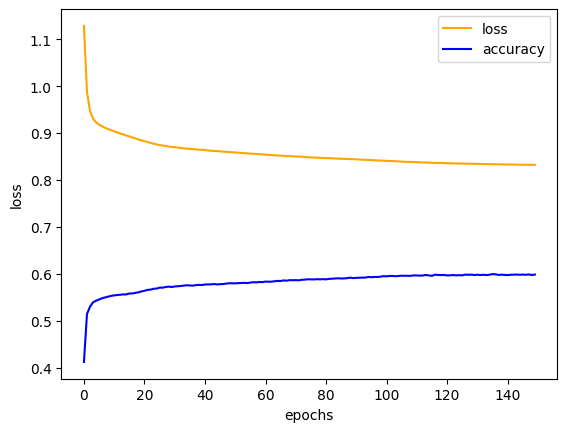

In [96]:
plot_convergion(x, cant_epochs)

2161/2161 [==============================] - 1s 582us/step


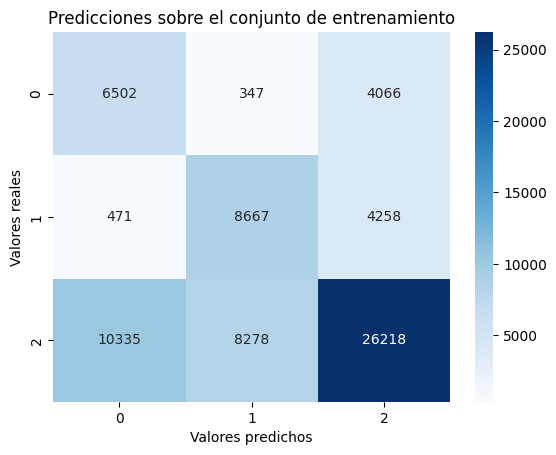

              precision    recall  f1-score   support

           0       0.38      0.60      0.46     10915
           1       0.50      0.65      0.56     13396
           2       0.76      0.58      0.66     44831

    accuracy                           0.60     69142
   macro avg       0.55      0.61      0.56     69142
weighted avg       0.65      0.60      0.61     69142

330/330 [==============================] - 0s 604us/step


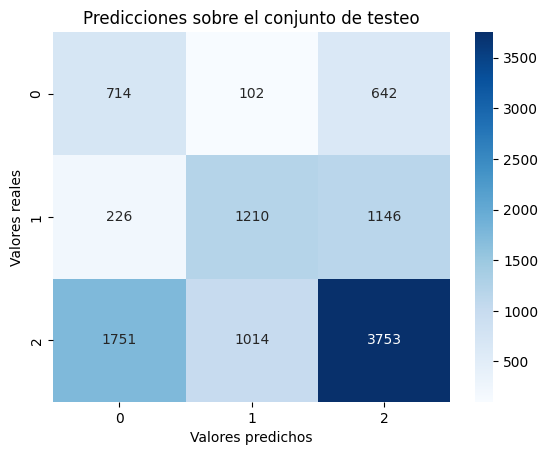

              precision    recall  f1-score   support

           0       0.27      0.49      0.34      1458
           1       0.52      0.47      0.49      2582
           2       0.68      0.58      0.62      6518

    accuracy                           0.54     10558
   macro avg       0.49      0.51      0.49     10558
weighted avg       0.58      0.54      0.55     10558



In [97]:
predicciones_clasificacion(mejor_modelo_2_capas, x_train_clasificacion_scaled, x_test_clasificacion_scaled, y_train_encoded, y_test_encoded)

##### Modelo de 3 capas

Ahora probamos con un modelo de una capa adicional, debemos averiguar cuantas neuronas poner en la primera capa y cuantas neuronas deben haber en la capa oculta, además de las funciones de activación

In [98]:
def create_model_3_layers(activation1, activation2, activation3, neurons_first_layer,neurons_hidden_layer, cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas):
    modelo = keras.Sequential([
        keras.layers.Dense(neurons_first_layer, input_shape=(cantidad_de_variables_predictoras,),
                           activation= activation1),
        keras.layers.Dense(neurons_hidden_layer, activation=activation2),
        keras.layers.Dense(cantidad_de_posibles_respuestas, activation=activation3)
    ])
    
    modelo.compile(
      optimizer= keras.optimizers.Adam(learning_rate=0.001), 
      loss='categorical_crossentropy', 
        metrics = 'accuracy',
    )
    
    return modelo

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

modelo = KerasClassifier(build_fn=create_model_3_layers)

cant_epochs = 150


n = cantidad_de_variables_predictoras
epochs = [cant_epochs]
batches = [batch_size]
activation_layers = ['relu','tanh','sigmoid']
activation_last_layer = ['sigmoid', 'softmax']
cant_neuronas = [n, n//2, n * 2]
params = dict( 
    epochs=epochs, 
    batch_size=batches, 
    activation1 = activation_layers, 
    activation2 = activation_layers, 
    activation3 = activation_last_layer,
    neurons_hidden_layer = cant_neuronas,
    neurons_first_layer = cant_neuronas,
    cantidad_de_variables_predictoras = [cantidad_de_variables_predictoras],
    cantidad_de_posibles_respuestas = [cantidad_de_posibles_respuestas],
)

grid = RandomizedSearchCV(estimator=modelo, param_distributions=params,n_jobs=-1, random_state= 14, verbose=False, scoring='accuracy')
grid_result = grid.fit(x_train_clasificacion_scaled, y_train_encoded)

Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150


/tmp/ipykernel_395371/1368069688.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo = KerasClassifier(build_fn=create_model_3_layers)


56/56 [==============================] - 1s 2ms/step - loss: 1.2921 - accuracy: 0.2489
Epoch 2/150
56/56 [==============================] - 1s 2ms/step - loss: 1.1948 - accuracy: 0.2428
Epoch 2/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0430 - accuracy: 0.4856
Epoch 2/150
56/56 [==============================] - 1s 3ms/step - loss: 1.1407 - accuracy: 0.2642
Epoch 2/150
56/56 [==============================] - 1s 3ms/step - loss: 1.0401 - accuracy: 0.4999
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0116 - accuracy: 0.5014
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 1.1252 - accuracy: 0.2899
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0114 - accuracy: 0.4999
Epoch 3/150
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0617 - accuracy: 0.4418
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9875 - accuracy: 0.5038
Epoch 3/15

Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9102 - accuracy: 0.5492
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9134 - accuracy: 0.5472
Epoch 11/150
56/56 [==============================] - 0s 4ms/step - loss: 0.9919 - accuracy: 0.5127
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9498 - accuracy: 0.5114
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9334 - accuracy: 0.5343
Epoch 10/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9108 - accuracy: 0.5499
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9079 - accuracy: 0.5493
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9423 - accuracy: 0.5191
Epoch 13/150
37/56 [==================>...........] - ETA: 0s - loss: 0.9091 - accuracy: 0.5504Epoch 11/150
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9282 - accuracy:

56/56 [==============================] - 0s 3ms/step - loss: 0.8920 - accuracy: 0.5573
Epoch 21/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9233 - accuracy: 0.5218
Epoch 19/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9081 - accuracy: 0.5552
Epoch 19/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9136 - accuracy: 0.5505
Epoch 19/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9295 - accuracy: 0.5228
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8949 - accuracy: 0.5594
Epoch 21/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9201 - accuracy: 0.5421
Epoch 22/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9141 - accuracy: 0.5349
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8903 - accuracy: 0.5588
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9266 - accuracy: 0.5262
Epoch 22/150


56/56 [==============================] - 0s 3ms/step - loss: 0.9117 - accuracy: 0.5491
Epoch 31/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8834 - accuracy: 0.5663
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8762 - accuracy: 0.5673
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9119 - accuracy: 0.5490
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9048 - accuracy: 0.5545
Epoch 29/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9067 - accuracy: 0.5446
Epoch 29/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8938 - accuracy: 0.5608
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8754 - accuracy: 0.5668
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8823 - accuracy: 0.5662
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9111 - accuracy: 0.5501
Epoch 33/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8760 - accuracy: 0.5693
Epoch 40/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8850 - accuracy: 0.5615
Epoch 37/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9002 - accuracy: 0.5523
Epoch 37/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9008 - accuracy: 0.5560
Epoch 39/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9052 - accuracy: 0.5533
Epoch 41/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8754 - accuracy: 0.5687
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9013 - accuracy: 0.5563
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.5523
Epoch 38/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8840 - accuracy: 0.5616
Epoch 38/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8914 - accuracy: 0.5568
Epoch 39/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8658 - accuracy: 0.5717
Epoch 50/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8715 - accuracy: 0.5703
Epoch 49/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8951 - accuracy: 0.5551
Epoch 46/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8877 - accuracy: 0.5588
Epoch 47/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8934 - accuracy: 0.5607
Epoch 50/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8986 - accuracy: 0.5588
Epoch 48/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8999 - accuracy: 0.5555
Epoch 50/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8654 - accuracy: 0.5710
Epoch 51/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8711 - accuracy: 0.5711
Epoch 50/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8947 - accuracy: 0.5560
Epoch 47/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8715 - accuracy: 0.5685
Epoch 55/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8903 - accuracy: 0.5587
Epoch 56/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8677 - accuracy: 0.5736
Epoch 59/150
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8623 - accuracy: 0.5757
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8944 - accuracy: 0.5575
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8850 - accuracy: 0.5614
Epoch 58/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8710 - accuracy: 0.5701
Epoch 56/150
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8898 - accuracy: 0.5576
Epoch 57/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8617 - accuracy: 0.5753
Epoch 62/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8671 - accu

Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8848 - accuracy: 0.5621
Epoch 69/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8656 - accuracy: 0.5733
Epoch 65/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8925 - accuracy: 0.5622
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8647 - accuracy: 0.5773
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8844 - accuracy: 0.5627
Epoch 70/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8856 - accuracy: 0.5612
Epoch 70/150
Epoch 67/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8650 - accuracy: 0.5737
Epoch 66/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8922 - accuracy: 0.5617
Epoch 69/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8644 - accuracy: 0.5778
Epoch 72/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8852 - accu

56/56 [==============================] - 0s 3ms/step - loss: 0.8828 - accuracy: 0.5635
Epoch 78/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8830 - accuracy: 0.5655
Epoch 75/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8893 - accuracy: 0.5621
Epoch 77/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8821 - accuracy: 0.5641
Epoch 76/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8609 - accuracy: 0.5766
Epoch 74/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8827 - accuracy: 0.5638
Epoch 79/150
Epoch 79/150
Epoch 78/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8828 - accuracy: 0.5654
Epoch 76/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8604 - accuracy: 0.5770
Epoch 75/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8623 - accuracy: 0.5806
Epoch 81/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8566 - accu

56/56 [==============================] - 0s 3ms/step - loss: 0.8848 - accuracy: 0.5676
Epoch 87/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8550 - accuracy: 0.5827
Epoch 90/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8811 - accuracy: 0.5649
Epoch 88/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8865 - accuracy: 0.5616
Epoch 86/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8803 - accuracy: 0.5686
Epoch 85/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8565 - accuracy: 0.5802
Epoch 84/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8846 - accuracy: 0.5678
Epoch 88/150
37/56 [==================>...........] - ETA: 0s - loss: 0.8577 - accuracy: 0.5790Epoch 91/150
Epoch 87/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8809 - accuracy: 0.5649
Epoch 86/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8603 - accuracy: 0.5834
Epoch

56/56 [==============================] - 0s 3ms/step - loss: 0.8531 - accuracy: 0.5831
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8529 - accuracy: 0.5837
Epoch 94/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8580 - accuracy: 0.5846
Epoch 100/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8801 - accuracy: 0.5646
Epoch 95/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8841 - accuracy: 0.5635
Epoch 98/150
Epoch 96/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8526 - accuracy: 0.5839
Epoch 95/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8578 - accuracy: 0.5849
Epoch 101/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8826 - accuracy: 0.5677
Epoch 99/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8800 - accuracy: 0.5644
Epoch 96/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8793 - accuracy: 0.56

56/56 [==============================] - 0s 3ms/step - loss: 0.8792 - accuracy: 0.5649
Epoch 105/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8816 - accuracy: 0.5669
Epoch 107/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8516 - accuracy: 0.5838
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.5858
Epoch 104/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8764 - accuracy: 0.5738
Epoch 104/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8822 - accuracy: 0.5641
Epoch 106/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8781 - accuracy: 0.5679
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8513 - accuracy: 0.5842
Epoch 111/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8791 - accuracy: 0.5651
Epoch 106/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8502 - accuracy: 0.5861
Epoc

56/56 [==============================] - 0s 2ms/step - loss: 0.8810 - accuracy: 0.5671
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8748 - accuracy: 0.5758
Epoch 114/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8783 - accuracy: 0.5658
Epoch 114/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8481 - accuracy: 0.5880
Epoch 113/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8767 - accuracy: 0.5699
Epoch 118/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8746 - accuracy: 0.5757
Epoch 120/150
Epoch 115/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8809 - accuracy: 0.5671
Epoch 121/150
Epoch 116/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8805 - accuracy: 0.5680
Epoch 118/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8480 - accuracy: 0.5878
Epoch 114/150
56/56 [==============================] - 0s 3ms/step - loss: 0.

56/56 [==============================] - 0s 3ms/step - loss: 0.8776 - accuracy: 0.5660
Epoch 122/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8755 - accuracy: 0.5715
Epoch 126/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8736 - accuracy: 0.5778
Epoch 123/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8800 - accuracy: 0.5676
Epoch 124/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8491 - accuracy: 0.5856
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8799 - accuracy: 0.5678
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8507 - accuracy: 0.5881
Epoch 129/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8775 - accuracy: 0.5658
Epoch 123/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8735 - accuracy: 0.5770
Epoch 124/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8799 - accuracy: 0.5679
Epoc

56/56 [==============================] - 0s 3ms/step - loss: 0.8483 - accuracy: 0.5879
Epoch 136/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8769 - accuracy: 0.5666
Epoch 131/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8793 - accuracy: 0.5683
Epoch 133/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8491 - accuracy: 0.5895
Epoch 138/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8480 - accuracy: 0.5877
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8739 - accuracy: 0.5733
Epoch 137/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8451 - accuracy: 0.5897
Epoch 131/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8768 - accuracy: 0.5661
Epoch 132/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8792 - accuracy: 0.5695
Epoch 134/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8490 - accuracy: 0.5886
Epoc

56/56 [==============================] - 0s 3ms/step - loss: 0.8470 - accuracy: 0.5877
Epoch 146/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8759 - accuracy: 0.5666
Epoch 141/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8437 - accuracy: 0.5910
Epoch 141/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8719 - accuracy: 0.5789
Epoch 141/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8785 - accuracy: 0.5701
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8476 - accuracy: 0.5891
Epoch 148/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8468 - accuracy: 0.5888
Epoch 147/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8788 - accuracy: 0.5672
Epoch 145/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8436 - accuracy: 0.5911
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8758 - accuracy: 0.5666
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

433/433 [==============================] - 0s 759us/step
Epoch 1/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 1/150
Epoch 1/150
Epoch 1/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 1/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0975 - accuracy: 0.3514
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0316 - accuracy: 0.5000
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0083 - accuracy: 0.5062
Epoch 4/150
56/56 [==============================] - 1s 2ms/step - loss: 1.1283 - accuracy: 0.3936
Epoch 2/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0750 - accuracy: 0.4219
Epoch 2/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0915 - accuracy: 0.3580
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0065 - accuracy: 0.4913
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9947 - accuracy: 0.5096
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0251 - accuracy: 0.4977
Epoch 3/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0886 - accuracy: 0.4224
Epoch 2/15

56/56 [==============================] - 0s 2ms/step - loss: 0.8837 - accuracy: 0.5715
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8774 - accuracy: 0.5699
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9130 - accuracy: 0.5430
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8911 - accuracy: 0.5553
Epoch 14/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8793 - accuracy: 0.5658
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8812 - accuracy: 0.5733
Epoch 14/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8758 - accuracy: 0.5712
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9111 - accuracy: 0.5443
Epoch 15/150
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8779 - accuracy: 0.5665
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8975 - accuracy: 0.5572


56/56 [==============================] - 0s 2ms/step - loss: 0.8667 - accuracy: 0.5800
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8691 - accuracy: 0.5777
Epoch 28/150
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8677 - accuracy: 0.5710
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8810 - accuracy: 0.5665
Epoch 31/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8890 - accuracy: 0.5605
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8659 - accuracy: 0.5806
Epoch 28/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8685 - accuracy: 0.5791
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8614 - accuracy: 0.5791
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8670 - accuracy: 0.5711
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8800 - accuracy: 0.5675


Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8549 - accuracy: 0.5866
Epoch 41/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8741 - accuracy: 0.5699
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8704 - accuracy: 0.5715
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.5866
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8597 - accuracy: 0.5778
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8611 - accuracy: 0.5840
Epoch 41/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8698 - accuracy: 0.5733
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8596 - accuracy: 0.5787
Epoch 43/150
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8727 - accuracy: 0.5710
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8530 - accu

56/56 [==============================] - 0s 2ms/step - loss: 0.8566 - accuracy: 0.5805
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8639 - accuracy: 0.5771
Epoch 54/150
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8650 - accuracy: 0.5786
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8560 - accuracy: 0.5873
Epoch 53/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8635 - accuracy: 0.5776
Epoch 58/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8467 - accuracy: 0.5922
Epoch 55/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8644 - accuracy: 0.5792
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8483 - accuracy: 0.5870
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8558 - accuracy: 0.5881
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8630 - accuracy: 0.5781


56/56 [==============================] - 0s 2ms/step - loss: 0.8425 - accuracy: 0.5942
Epoch 67/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8588 - accuracy: 0.5843
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8452 - accuracy: 0.5905
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8586 - accuracy: 0.5808
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8532 - accuracy: 0.5847
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8515 - accuracy: 0.5906
Epoch 66/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8422 - accuracy: 0.5942
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8584 - accuracy: 0.5839
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8448 - accuracy: 0.5907
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8583 - accuracy: 0.5805
Epoch 72/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8476 - accuracy: 0.5910
Epoch 78/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.5862
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8420 - accuracy: 0.5929
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8540 - accuracy: 0.5872
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8551 - accuracy: 0.5829
Epoch 84/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.5956
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8504 - accuracy: 0.5862
Epoch 84/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8540 - accuracy: 0.5865
Epoch 85/150
Epoch 84/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8468 - accuracy: 0.5927
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8502 - accuracy: 0.5862


56/56 [==============================] - 0s 2ms/step - loss: 0.8524 - accuracy: 0.5847
Epoch 97/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8506 - accuracy: 0.5887
Epoch 96/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8399 - accuracy: 0.5943
Epoch 94/150
Epoch 94/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8481 - accuracy: 0.5879
Epoch 97/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8430 - accuracy: 0.5946
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8524 - accuracy: 0.5852
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8501 - accuracy: 0.5888
Epoch 97/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8396 - accuracy: 0.5940
Epoch 95/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8371 - accuracy: 0.5969
Epoch 95/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8427 - accuracy: 0.5943


56/56 [==============================] - 0s 2ms/step - loss: 0.8475 - accuracy: 0.5886
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8372 - accuracy: 0.5959
Epoch 107/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8358 - accuracy: 0.5972
Epoch 107/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8472 - accuracy: 0.5903
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8397 - accuracy: 0.5964
Epoch 105/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8371 - accuracy: 0.5957
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8357 - accuracy: 0.5976
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8501 - accuracy: 0.5869
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8455 - accuracy: 0.5899
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8470 - accuracy: 0.5898
Epoc

56/56 [==============================] - 0s 2ms/step - loss: 0.8434 - accuracy: 0.5908
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8488 - accuracy: 0.5877
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8342 - accuracy: 0.5970
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8346 - accuracy: 0.5984
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8374 - accuracy: 0.5972
Epoch 116/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8433 - accuracy: 0.5903
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8486 - accuracy: 0.5880
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8451 - accuracy: 0.5896
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8343 - accuracy: 0.5974
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8344 - accuracy: 0.5983
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8325 - accuracy: 0.5991
Epoch 131/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8351 - accuracy: 0.5987
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8473 - accuracy: 0.5901
Epoch 136/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8326 - accuracy: 0.5984
Epoch 132/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8433 - accuracy: 0.5910
Epoch 135/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8406 - accuracy: 0.5919
Epoch 1/150
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8472 - accuracy: 0.5892
Epoch 137/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8348 - accuracy: 0.5979
Epoch 129/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8433 - accuracy: 0.5907
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.83

56/56 [==============================] - 0s 3ms/step - loss: 0.8387 - accuracy: 0.5925
Epoch 147/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8334 - accuracy: 0.5995
Epoch 139/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8461 - accuracy: 0.5902
Epoch 148/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8307 - accuracy: 0.6004
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8422 - accuracy: 0.5916
Epoch 147/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8313 - accuracy: 0.6001
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9239 - accuracy: 0.5325
Epoch 7/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8384 - accuracy: 0.5929
Epoch 148/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8459 - accuracy: 0.5909
Epoch 149/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9442 - accuracy: 0.5307
Epoch 

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8326 - accuracy: 0.5991
Epoch 149/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9125 - accuracy: 0.5414
Epoch 18/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8766 - accuracy: 0.5710
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8322 - accuracy: 0.5996
Epoch 150/150
49/56 [=========================>....] - ETA: 0s - loss: 0.9104 - accuracy: 0.5426

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8750 - accuracy: 0.5720
Epoch 18/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9102 - accuracy: 0.5433
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8735 - accuracy: 0.5742
Epoch 19/150
24/56 [===========>..................] - ETA: 0s - loss: 0.9108 - accuracy: 0.5403

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.9092 - accuracy: 0.5428
Epoch 21/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8722 - accuracy: 0.5737
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9083 - accuracy: 0.5436
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9074 - accuracy: 0.5437
Epoch 23/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8699 - accuracy: 0.5755
Epoch 22/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0831 - accuracy: 0.4844
Epoch 2/150
 1/56 [..............................] - ETA: 0s - loss: 1.0651 - accuracy: 0.4730

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.9067 - accuracy: 0.5450
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8692 - accuracy: 0.5763
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0422 - accuracy: 0.4988
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9062 - accuracy: 0.5460
Epoch 25/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8680 - accuracy: 0.5773
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9055 - accuracy: 0.5456
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9877 - accuracy: 0.5000
Epoch 5/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8671 - accuracy: 0.5767
Epoch 25/150
 1/56 [..............................] - ETA: 0s - loss: 0.8645 - accuracy: 0.5860

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.9670 - accuracy: 0.5040
Epoch 6/150
56/56 [==============================] - 1s 3ms/step - loss: 1.0371 - accuracy: 0.4924
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8662 - accuracy: 0.5779
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9045 - accuracy: 0.5473
Epoch 7/150
Epoch 28/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0289 - accuracy: 0.4997
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8652 - accuracy: 0.5790
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9039 - accuracy: 0.5467
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0239 - accuracy: 0.5010
Epoch 4/150
56/56 [==============================] - 1s 2ms/step - loss: 1.1038 - accuracy: 0.4664
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9035 - accuracy: 0.5471
Epoch 

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.9814 - accuracy: 0.5200
Epoch 6/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8629 - accuracy: 0.5809
Epoch 29/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0088 - accuracy: 0.5050
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9028 - accuracy: 0.5487
Epoch 32/150
56/56 [==============================] - 0s 4ms/step - loss: 1.0542 - accuracy: 0.4894
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9545 - accuracy: 0.5289
Epoch 7/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9086 - accuracy: 0.5477
Epoch 11/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8619 - accuracy: 0.5812
Epoch 30/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0236 - accuracy: 0.4982
Epoch 4/150
56/56 [==============================] - 0s 4ms/step - loss: 0.9912 - accuracy: 0.5093
Epoch 5/150
56/56 

56/56 [==============================] - 0s 3ms/step - loss: 0.8550 - accuracy: 0.5877
Epoch 20/150
Epoch 39/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9112 - accuracy: 0.5494
Epoch 9/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9097 - accuracy: 0.5503
Epoch 14/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8955 - accuracy: 0.5551
Epoch 42/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8546 - accuracy: 0.5862
Epoch 40/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8940 - accuracy: 0.5585
Epoch 21/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9104 - accuracy: 0.5517
Epoch 14/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9022 - accuracy: 0.5530
Epoch 17/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9081 - accuracy: 0.5555
Epoch 10/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9257 - accuracy: 0.5378
E

56/56 [==============================] - 0s 3ms/step - loss: 0.8926 - accuracy: 0.5584
Epoch 23/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8863 - accuracy: 0.5618
Epoch 51/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8923 - accuracy: 0.5686
Epoch 18/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8991 - accuracy: 0.5656
Epoch 17/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8953 - accuracy: 0.5577
Epoch 24/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8913 - accuracy: 0.5596
Epoch 24/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8911 - accuracy: 0.5693
Epoch 19/150
Epoch 52/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8973 - accuracy: 0.5672
Epoch 18/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8858 - accuracy: 0.5643
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8493 - accuracy: 0.5913


56/56 [==============================] - 0s 3ms/step - loss: 0.8469 - accuracy: 0.5930
Epoch 58/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8804 - accuracy: 0.5681
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8781 - accuracy: 0.5704
Epoch 40/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8825 - accuracy: 0.5728
Epoch 26/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8833 - accuracy: 0.5735
Epoch 27/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8832 - accuracy: 0.5643
Epoch 33/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8918 - accuracy: 0.5602
Epoch 35/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8465 - accuracy: 0.5934
Epoch 59/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8798 - accuracy: 0.5687
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8823 - accuracy: 0.5737
Epoch 28/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8727 - accuracy: 0.5740
Epoch 34/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8778 - accuracy: 0.5777
Epoch 35/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8823 - accuracy: 0.5662
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8707 - accuracy: 0.5750
Epoch 49/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8765 - accuracy: 0.5711
Epoch 69/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8771 - accuracy: 0.5650
Epoch 42/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8719 - accuracy: 0.5743
Epoch 35/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8885 - accuracy: 0.5639
Epoch 43/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8772 - accuracy: 0.5791
Epoch 36/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8817 - accuracy: 0.5664
Epoch 42/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8728 - accuracy: 0.5815
Epoch 45/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8422 - accuracy: 0.5941
Epoch 77/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8816 - accuracy: 0.5638
Epoch 52/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8728 - accuracy: 0.5744
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8652 - accuracy: 0.5778
Epoch 44/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8654 - accuracy: 0.5778
Epoch 59/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8778 - accuracy: 0.5673
Epoch 51/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8724 - accuracy: 0.5820
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8724 - accuracy: 0.5741
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8647 - accuracy: 0.5778
Epoch 53/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8694 - accuracy: 0.5761
Epoch 88/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8606 - accuracy: 0.5820
Epoch 53/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8753 - accuracy: 0.5665
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8623 - accuracy: 0.5800
Epoch 68/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8686 - accuracy: 0.5845
Epoch 54/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8689 - accuracy: 0.5687
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8402 - accuracy: 0.5945
Epoch 86/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8738 - accuracy: 0.5710
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8690 - accuracy: 0.5762
Epoch 89/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8604 - accuracy: 0.5821
Epoch 54/150


14/56 [======>.......................] - ETA: 0s - loss: 0.8690 - accuracy: 0.5777Epoch 95/150
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8699 - accuracy: 0.5726
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8570 - accuracy: 0.5848
Epoch 63/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8699 - accuracy: 0.5704
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8637 - accuracy: 0.5804
Epoch 99/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8382 - accuracy: 0.5962
Epoch 96/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8696 - accuracy: 0.5733
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8568 - accuracy: 0.5843
Epoch 64/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8659 - accuracy: 0.5717
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8642 - accuracy: 0.5854
Epoch

56/56 [==============================] - 0s 3ms/step - loss: 0.8629 - accuracy: 0.5768
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8591 - accuracy: 0.5839
Epoch 108/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8365 - accuracy: 0.5979
Epoch 105/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8654 - accuracy: 0.5753
Epoch 88/150
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8612 - accuracy: 0.5866
Epoch 74/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8661 - accuracy: 0.5754
Epoch 81/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8545 - accuracy: 0.5863
Epoch 74/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8586 - accuracy: 0.5841
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8365 - accuracy: 0.5978
Epoch 106/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8650 - accuracy: 0.5

56/56 [==============================] - 0s 3ms/step - loss: 0.8604 - accuracy: 0.5785
Epoch 90/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8633 - accuracy: 0.5788
Epoch 90/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8552 - accuracy: 0.5858
Epoch 98/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8551 - accuracy: 0.5849
Epoch 118/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8576 - accuracy: 0.5870
Epoch 84/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8355 - accuracy: 0.5979
Epoch 115/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8528 - accuracy: 0.5876
Epoch 84/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8602 - accuracy: 0.5793
Epoch 91/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8614 - accuracy: 0.5767
Epoch 89/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8549 - accuracy: 0.5859
Epoch 99/15

56/56 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.5877
Epoch 92/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8522 - accuracy: 0.5872
Epoch 127/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8580 - accuracy: 0.5790
Epoch 97/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8343 - accuracy: 0.5979
Epoch 124/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8534 - accuracy: 0.5867
Epoch 107/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8602 - accuracy: 0.5812
Epoch 99/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8517 - accuracy: 0.5879
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8575 - accuracy: 0.5792
Epoch 98/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8521 - accuracy: 0.5873
Epoch 125/150
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8584 - accuracy: 0.

56/56 [==============================] - 0s 3ms/step - loss: 0.8547 - accuracy: 0.5814
Epoch 107/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8507 - accuracy: 0.5894
Epoch 102/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.5885
Epoch 137/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8333 - accuracy: 0.5989
Epoch 134/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8567 - accuracy: 0.5813
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8519 - accuracy: 0.5888
Epoch 117/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8573 - accuracy: 0.5830
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8504 - accuracy: 0.5890
Epoch 103/150
Epoch 103/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8543 - accuracy: 0.5810
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8332 - accurac

56/56 [==============================] - 0s 3ms/step - loss: 0.8481 - accuracy: 0.5889
Epoch 118/150
15/56 [=======>......................] - ETA: 0s - loss: 0.8543 - accuracy: 0.5834Epoch 146/150
Epoch 112/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8497 - accuracy: 0.5896
Epoch 127/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8321 - accuracy: 0.5995
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8495 - accuracy: 0.5899
Epoch 113/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8544 - accuracy: 0.5835
Epoch 119/150
Epoch 119/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8478 - accuracy: 0.5901
Epoch 147/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8469 - accuracy: 0.5934
Epoch 113/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8496 - accuracy: 0.5898
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8325 

56/56 [==============================] - 0s 3ms/step - loss: 0.8530 - accuracy: 0.5868
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.5906
Epoch 123/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8522 - accuracy: 0.5861
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8480 - accuracy: 0.5856
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8480 - accuracy: 0.5909
Epoch 137/150
42/56 [=====================>........] - ETA: 0s - loss: 0.8523 - accuracy: 0.5848Epoch 129/150
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8521 - accuracy: 0.5853
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8477 - accuracy: 0.5880
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8476 - accuracy: 0.5912
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8525 - accuracy: 0.

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8512 - accuracy: 0.5861
Epoch 132/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8471 - accuracy: 0.5869
Epoch 132/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8473 - accuracy: 0.5905
Epoch 141/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8479 - accuracy: 0.5913
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8438 - accuracy: 0.5952
Epoch 127/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8515 - accuracy: 0.5865
Epoch 133/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8509 - accuracy: 0.5872
Epoch 133/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8468 - accuracy: 0.5870
Epoch 133/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5912
Epoch 129/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8439 - accuracy: 0.5947
Epoc

56/56 [==============================] - 0s 3ms/step - loss: 1.0460 - accuracy: 0.4824
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9204 - accuracy: 0.5405
Epoch 7/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8486 - accuracy: 0.5891
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8470 - accuracy: 0.5919
Epoch 139/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8423 - accuracy: 0.5962
Epoch 138/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8451 - accuracy: 0.5884
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0280 - accuracy: 0.4884
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9142 - accuracy: 0.5440
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.5889
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8467 - accuracy: 0.5913
Epoch 140/15

56/56 [==============================] - 0s 2ms/step - loss: 0.8842 - accuracy: 0.5685
Epoch 19/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8454 - accuracy: 0.5926
Epoch 150/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8409 - accuracy: 0.5969
Epoch 150/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.5690
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8974 - accuracy: 0.5577
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8812 - accuracy: 0.5682
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8954 - accuracy: 0.5594
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8799 - accuracy: 0.5694
Epoch 22/150
 46/433 [==>...........................] - ETA: 0s loss: 0.8946 - accuracy: 0.583

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8938 - accuracy: 0.5615
Epoch 18/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8786 - accuracy: 0.5695
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8924 - accuracy: 0.5627
Epoch 19/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8773 - accuracy: 0.5691
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8910 - accuracy: 0.5643
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8762 - accuracy: 0.5705
Epoch 25/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8898 - accuracy: 0.5656
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8752 - accuracy: 0.5710
Epoch 26/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8887 - accuracy: 0.5673
Epoch 22/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8742 - accuracy: 0.5711
Epoch 27/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 1ms/step - loss: 0.8716 - accuracy: 0.5721
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8849 - accuracy: 0.5702
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8710 - accuracy: 0.5720
Epoch 31/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8841 - accuracy: 0.5698
Epoch 27/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0895 - accuracy: 0.3834
Epoch 2/150
27/56 [=============>................] - ETA: 0s - loss: 1.0886 - accuracy: 0.4255 

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8700 - accuracy: 0.5727
Epoch 32/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0739 - accuracy: 0.4600
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0103 - accuracy: 0.4823
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8696 - accuracy: 0.5733
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0408 - accuracy: 0.5010
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8824 - accuracy: 0.5718
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9693 - accuracy: 0.5240
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8689 - accuracy: 0.5741
Epoch 34/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0275 - accuracy: 0.5014
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8816 - accuracy: 0.5705
Epoch 30/150
56/56

56/56 [==============================] - 0s 2ms/step - loss: 0.8640 - accuracy: 0.5760
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9502 - accuracy: 0.5134
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9539 - accuracy: 0.4999
Epoch 10/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9244 - accuracy: 0.5227
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8969 - accuracy: 0.5574
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8717 - accuracy: 0.5779
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8636 - accuracy: 0.5758
Epoch 47/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9441 - accuracy: 0.5005
Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9211 - accuracy: 0.5260
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8955 - accuracy: 0.5582
Epoch 18/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8644 - accuracy: 0.5845
Epoch 53/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9101 - accuracy: 0.5416
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9053 - accuracy: 0.5529
Epoch 29/150
Epoch 28/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8605 - accuracy: 0.5783
Epoch 59/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8637 - accuracy: 0.5835
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8810 - accuracy: 0.5690
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9046 - accuracy: 0.5534
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8604 - accuracy: 0.5779
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9077 - accuracy: 0.5465
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8630 - accuracy: 0.5846


56/56 [==============================] - 0s 2ms/step - loss: 0.8986 - accuracy: 0.5533
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8981 - accuracy: 0.5570
Epoch 72/150
Epoch 41/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8575 - accuracy: 0.5889
Epoch 38/150
Epoch 67/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8715 - accuracy: 0.5769
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8980 - accuracy: 0.5543
Epoch 37/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8976 - accuracy: 0.5554
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8575 - accuracy: 0.5792
Epoch 73/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8901 - accuracy: 0.5593
Epoch 68/150
Epoch 39/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8975 - accuracy: 0.5543
Epoch 38/150
56/56 [==============================] - 0s 2ms/step - loss: 

56/56 [==============================] - 0s 2ms/step - loss: 0.8672 - accuracy: 0.5802
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8929 - accuracy: 0.5571
Epoch 48/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8539 - accuracy: 0.5897
Epoch 78/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8552 - accuracy: 0.5818
Epoch 84/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8911 - accuracy: 0.5570
Epoch 50/150
Epoch 53/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8667 - accuracy: 0.5799
Epoch 55/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8925 - accuracy: 0.5573
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8535 - accuracy: 0.5899
Epoch 79/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8548 - accuracy: 0.5815
Epoch 85/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8849 - accuracy: 0.5620


56/56 [==============================] - 0s 2ms/step - loss: 0.8821 - accuracy: 0.5641
Epoch 63/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8505 - accuracy: 0.5905
Epoch 61/150
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8626 - accuracy: 0.5836
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8832 - accuracy: 0.5669
Epoch 66/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.5838
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8502 - accuracy: 0.5913
Epoch 92/150
 1/56 [..............................] - ETA: 0s - loss: 0.8882 - accuracy: 0.5770Epoch 64/150
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8622 - accuracy: 0.5833
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8829 - accuracy: 0.5660
Epoch 67/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8518 - accuracy:

56/56 [==============================] - 0s 2ms/step - loss: 0.8854 - accuracy: 0.5626
Epoch 73/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8482 - accuracy: 0.5927
Epoch 103/150
Epoch 78/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.5866
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8802 - accuracy: 0.5655
Epoch 76/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8850 - accuracy: 0.5622
Epoch 74/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5929
Epoch 104/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8807 - accuracy: 0.5659
Epoch 79/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.5843
Epoch 82/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8499 - accuracy: 0.5853
Epoch 111/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8801 - accuracy: 0.5

56/56 [==============================] - 0s 2ms/step - loss: 0.8795 - accuracy: 0.5659
Epoch 90/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.5939
Epoch 122/150
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8791 - accuracy: 0.5663
Epoch 88/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8539 - accuracy: 0.5855
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8821 - accuracy: 0.5655
Epoch 86/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8794 - accuracy: 0.5660
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.5863
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8459 - accuracy: 0.5939
Epoch 116/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8790 - accuracy: 0.5668
Epoch 89/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8819 - accuracy: 0.5

56/56 [==============================] - 0s 2ms/step - loss: 0.8472 - accuracy: 0.5867
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8781 - accuracy: 0.5684
Epoch 101/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8505 - accuracy: 0.5869
Epoch 106/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8789 - accuracy: 0.5691
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8438 - accuracy: 0.5941
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8784 - accuracy: 0.5674
Epoch 104/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8473 - accuracy: 0.5861
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8780 - accuracy: 0.5688
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.5877
Epoch 107/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8786 - accuracy: 0.5693
Epoch

56/56 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5889
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8757 - accuracy: 0.5715
Epoch 112/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8773 - accuracy: 0.5702
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8421 - accuracy: 0.5938
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8461 - accuracy: 0.5878
Epoch 149/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8775 - accuracy: 0.5688
Epoch 117/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8755 - accuracy: 0.5705
Epoch 113/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8773 - accuracy: 0.5696
Epoch 115/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8479 - accuracy: 0.5898
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8460 - accuracy: 0.5878
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8746 - accuracy: 0.5726
Epoch 117/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8474 - accuracy: 0.5900
Epoch 124/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8772 - accuracy: 0.5687
Epoch 121/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8770 - accuracy: 0.5705
Epoch 119/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8415 - accuracy: 0.5949
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8742 - accuracy: 0.5732
Epoch 118/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8769 - accuracy: 0.5712
Epoch 120/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8772 - accuracy: 0.5692
Epoch 122/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8415 - accuracy: 0.5934
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8741 - accuracy: 0.5729
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8737 - accuracy: 0.5743
Epoch 121/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8767 - accuracy: 0.5715
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8771 - accuracy: 0.5690
Epoch 125/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8465 - accuracy: 0.5908
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8734 - accuracy: 0.5747
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8766 - accuracy: 0.5710
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8769 - accuracy: 0.5687
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8733 - accuracy: 0.5740
Epoch 123/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8464 - accuracy: 0.5900
Epoch 130/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8769 - accuracy: 0.5691
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8764 - accuracy: 0.5691
Epoch 136/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0339 - accuracy: 0.5002
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8759 - accuracy: 0.5722
Epoch 136/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.5908
Epoch 141/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8711 - accuracy: 0.5769
Epoch 134/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8764 - accuracy: 0.5687
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0255 - accuracy: 0.5025
Epoch 13/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9625 - accuracy: 0.5112
Epoch 9/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8709 - accuracy: 0.5771
Epoch 135/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.5905
Epoch 14

56/56 [==============================] - 0s 3ms/step - loss: 0.9146 - accuracy: 0.5361
Epoch 19/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8753 - accuracy: 0.5732
Epoch 147/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9176 - accuracy: 0.5460
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8758 - accuracy: 0.5696
Epoch 148/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9120 - accuracy: 0.5489
Epoch 8/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9557 - accuracy: 0.5212
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9148 - accuracy: 0.5477
Epoch 146/150
Epoch 9/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9131 - accuracy: 0.5374
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8690 - accuracy: 0.5787
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9123 - accuracy: 0.5489

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.9027 - accuracy: 0.5513
Epoch 1/150
Epoch 29/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9190 - accuracy: 0.5454
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8864 - accuracy: 0.5620
Epoch 18/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8884 - accuracy: 0.5613
Epoch 19/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9017 - accuracy: 0.5525
Epoch 30/150
25/56 [============>.................] - ETA: 0s - loss: 0.8996 - accuracy: 0.5507

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8845 - accuracy: 0.5625
Epoch 19/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9007 - accuracy: 0.5532
Epoch 31/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9155 - accuracy: 0.5475
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.5651
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8998 - accuracy: 0.5542
Epoch 32/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8840 - accuracy: 0.5638
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9141 - accuracy: 0.5488
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8807 - accuracy: 0.5664
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8989 - accuracy: 0.5552
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8819 - accuracy: 0.5648
Epoch 22/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8966 - accuracy: 0.5555
Epoch 36/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8761 - accuracy: 0.5693
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9988 - accuracy: 0.5002
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9097 - accuracy: 0.5533
Epoch 40/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8772 - accuracy: 0.5684
Epoch 25/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8958 - accuracy: 0.5563
Epoch 37/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9088 - accuracy: 0.5542
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8746 - accuracy: 0.5713
Epoch 25/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9624 - accuracy: 0.5213
Epoch 4/150
56/56 [==============================] - 1s 3ms/step - loss: 1.2988 - accuracy: 0.2511
Epoch 2/150
56/

56/56 [==============================] - 0s 3ms/step - loss: 0.8973 - accuracy: 0.5573
Epoch 14/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8643 - accuracy: 0.5773
Epoch 7/150
Epoch 35/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9029 - accuracy: 0.5589
Epoch 51/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9061 - accuracy: 0.5502
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8892 - accuracy: 0.5600
Epoch 49/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9019 - accuracy: 0.5523
Epoch 7/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9158 - accuracy: 0.5477
Epoch 8/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8634 - accuracy: 0.5778
Epoch 36/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8947 - accuracy: 0.5585
Epoch 15/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9039 - accuracy: 0.5513
Epo

56/56 [==============================] - 0s 3ms/step - loss: 0.8587 - accuracy: 0.5811
Epoch 43/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8686 - accuracy: 0.5751
Epoch 15/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8585 - accuracy: 0.5828
Epoch 44/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8955 - accuracy: 0.5565
Epoch 16/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8985 - accuracy: 0.5608
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8580 - accuracy: 0.5827
Epoch 44/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8666 - accuracy: 0.5761
Epoch 16/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8784 - accuracy: 0.5698
Epoch 23/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8576 - accuracy: 0.5828
Epoch 45/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8849 - accuracy: 0.5633
Epoch 59/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8777 - accuracy: 0.5660
Epoch 29/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8709 - accuracy: 0.5771
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8529 - accuracy: 0.5853
Epoch 53/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8550 - accuracy: 0.5893
Epoch 25/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8513 - accuracy: 0.5882
Epoch 53/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8820 - accuracy: 0.5649
Epoch 68/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8765 - accuracy: 0.5670
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.5891
Epoch 26/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8701 - accuracy: 0.5776
Epoch 32/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8524 - accuracy: 0.5862
Epoch 54/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8473 - accuracy: 0.5935
Epoch 35/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8630 - accuracy: 0.5830
Epoch 40/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8485 - accuracy: 0.5894
Epoch 63/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8798 - accuracy: 0.5656
Epoch 78/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8889 - accuracy: 0.5673
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.5915
Epoch 62/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8652 - accuracy: 0.5748
Epoch 35/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8467 - accuracy: 0.5943
Epoch 36/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8619 - accuracy: 0.5833
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8480 - accuracy: 0.5893
Epoch 64/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8861 - accuracy: 0.5671
Epoch 70/150
Epoch 88/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8785 - accuracy: 0.5654
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8593 - accuracy: 0.5785
Epoch 48/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8545 - accuracy: 0.5887
Epoch 49/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8429 - accuracy: 0.5950
Epoch 45/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8413 - accuracy: 0.5945
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8785 - accuracy: 0.5662
Epoch 88/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8859 - accuracy: 0.5670
Epoch 89/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8563 - accuracy: 0.5792
Epoch 44/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8585 - accuracy: 0.5813


56/56 [==============================] - 0s 3ms/step - loss: 0.8378 - accuracy: 0.5953
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8842 - accuracy: 0.5670
Epoch 97/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8420 - accuracy: 0.5940
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8775 - accuracy: 0.5668
Epoch 96/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8400 - accuracy: 0.5952
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8477 - accuracy: 0.5923
Epoch 58/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8509 - accuracy: 0.5843
Epoch 52/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8526 - accuracy: 0.5869
Epoch 57/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8379 - accuracy: 0.5960
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8841 - accuracy: 0.5676
Epoch 98/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.5680
Epoch 107/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8765 - accuracy: 0.5673
Epoch 106/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8379 - accuracy: 0.5956
Epoch 64/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8461 - accuracy: 0.5892
Epoch 61/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8470 - accuracy: 0.5912
Epoch 66/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8381 - accuracy: 0.5949
Epoch 90/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8419 - accuracy: 0.5955
Epoch 68/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8764 - accuracy: 0.5670
Epoch 107/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8343 - accuracy: 0.5981
Epoch 90/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8455 - accuracy: 0.5899
Epoch 62/1

56/56 [==============================] - 0s 4ms/step - loss: 0.8352 - accuracy: 0.5972
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8813 - accuracy: 0.5665
Epoch 118/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8757 - accuracy: 0.5683
Epoch 116/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8365 - accuracy: 0.5967
Epoch 74/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8383 - accuracy: 0.5959
Epoch 78/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8317 - accuracy: 0.5998
Epoch 99/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8420 - accuracy: 0.5930
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8412 - accuracy: 0.5953
Epoch 76/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8812 - accuracy: 0.5667
Epoch 119/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8363 - accuracy: 0.5975
Epoch 75/1

56/56 [==============================] - 0s 3ms/step - loss: 0.8353 - accuracy: 0.5971
Epoch 84/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8801 - accuracy: 0.5680
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8375 - accuracy: 0.5966
Epoch 85/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8326 - accuracy: 0.5966
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8352 - accuracy: 0.5967
Epoch 88/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8388 - accuracy: 0.5953
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8750 - accuracy: 0.5678
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8799 - accuracy: 0.5682
Epoch 129/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8291 - accuracy: 0.6016
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8350 - accuracy: 0.5969
Epoch 85

56/56 [==============================] - 0s 3ms/step - loss: 0.8274 - accuracy: 0.6005
Epoch 117/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8304 - accuracy: 0.5995
Epoch 118/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8329 - accuracy: 0.5983
Epoch 97/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8744 - accuracy: 0.5686
Epoch 136/150
Epoch 94/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8339 - accuracy: 0.5993
Epoch 95/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8358 - accuracy: 0.5958
Epoch 139/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8303 - accuracy: 0.5987
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8338 - accuracy: 0.5980
Epoch 95/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8271 - accuracy: 0.6015
Epoch 118/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8335 - accuracy: 0

56/56 [==============================] - 0s 3ms/step - loss: 0.8304 - accuracy: 0.5983
Epoch 106/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8253 - accuracy: 0.6013
Epoch 127/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8282 - accuracy: 0.5998
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8330 - accuracy: 0.5984
Epoch 105/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8309 - accuracy: 0.6006
Epoch 104/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8329 - accuracy: 0.5984
Epoch 99/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8771 - accuracy: 0.5686
Epoch 149/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8304 - accuracy: 0.5989
Epoch 107/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8251 - accuracy: 0.6015
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8738 - accuracy: 0.5693
Epoch

56/56 [==============================] - 0s 2ms/step - loss: 0.8281 - accuracy: 0.5989
Epoch 117/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8284 - accuracy: 0.6025
Epoch 114/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8236 - accuracy: 0.6028
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.5986
Epoch 116/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8262 - accuracy: 0.6015
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8278 - accuracy: 0.5985
Epoch 118/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8235 - accuracy: 0.6037
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8282 - accuracy: 0.6026
Epoch 110/150
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.5981
Epoch 117/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8261 - accurac

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8256 - accuracy: 0.6011
Epoch 1/150
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8271 - accuracy: 0.5988
Epoch 122/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8229 - accuracy: 0.6033
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8317 - accuracy: 0.5985
Epoch 121/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8253 - accuracy: 0.6009
Epoch 144/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8271 - accuracy: 0.5985
Epoch 123/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8228 - accuracy: 0.6028
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8291 - accuracy: 0.5992
Epoch 115/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8315 - accuracy: 0.5985
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8255 - accuracy:

56/56 [==============================] - 0s 2ms/step - loss: 0.8854 - accuracy: 0.5681
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8306 - accuracy: 0.5995
Epoch 134/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8269 - accuracy: 0.6001
Epoch 127/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8812 - accuracy: 0.5705
Epoch 10/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8247 - accuracy: 0.5998
Epoch 135/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8246 - accuracy: 0.6033
Epoch 132/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8778 - accuracy: 0.5729
Epoch 11/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8267 - accuracy: 0.6008
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8308 - accuracy: 0.5997
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8750 - accuracy: 0.5754
Epoch 12

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8266 - accuracy: 0.5995
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8307 - accuracy: 0.5991
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8726 - accuracy: 0.5768
Epoch 13/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8242 - accuracy: 0.6030
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8242 - accuracy: 0.5997
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8265 - accuracy: 0.6000
Epoch 130/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8301 - accuracy: 0.5996
Epoch 138/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8241 - accuracy: 0.6027
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8243 - accuracy: 0.5996
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8263 - accuracy: 0.6002
Epoch

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 17/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8236 - accuracy: 0.6038
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8237 - accuracy: 0.5994
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8299 - accuracy: 0.5999
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8258 - accuracy: 0.6010
Epoch 134/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8645 - accuracy: 0.5836
Epoch 18/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8233 - accuracy: 0.6040
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8302 - accuracy: 0.6003
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8235 - accuracy: 0.6010
Epoch 143/150
56/56 [==============================] - 1s 2ms/step - loss: 1.1763 - accuracy: 0.3793
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8255 - accuracy: 0

56/56 [==============================] - 0s 2ms/step - loss: 0.8490 - accuracy: 0.5922
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8243 - accuracy: 0.6025
Epoch 146/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8807 - accuracy: 0.5688
Epoch 10/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8753 - accuracy: 0.5792
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8479 - accuracy: 0.5920
Epoch 32/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.6016
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8771 - accuracy: 0.5706
Epoch 11/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8731 - accuracy: 0.5810
Epoch 14/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8470 - accuracy: 0.5935
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8740 - accuracy: 0.5715
Epoch 148/1

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8627 - accuracy: 0.5866
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8621 - accuracy: 0.5803
Epoch 19/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8421 - accuracy: 0.5941
Epoch 41/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8617 - accuracy: 0.5865
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8609 - accuracy: 0.5819
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8414 - accuracy: 0.5954
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8607 - accuracy: 0.5878
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8603 - accuracy: 0.5813
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8407 - accuracy: 0.5954
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8598 - accuracy: 0.5876
Epoch 25/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8591 - accuracy: 0.5876
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8399 - accuracy: 0.5947
Epoch 45/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8582 - accuracy: 0.5848
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8580 - accuracy: 0.5893
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8393 - accuracy: 0.5966
Epoch 46/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8575 - accuracy: 0.5839
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8571 - accuracy: 0.5886
Epoch 28/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8386 - accuracy: 0.5964
Epoch 47/150
56/56 [==============================] - 1s 3ms/step - loss: 1.0348 - accuracy: 0.4756
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8565 - accuracy: 0.5853
Epoch 25/150
5

56/56 [==============================] - 0s 3ms/step - loss: 0.8510 - accuracy: 0.5916
Epoch 34/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.5925
Epoch 38/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9830 - accuracy: 0.5197
Epoch 8/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0148 - accuracy: 0.4987
Epoch 8/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8725 - accuracy: 0.5717
Epoch 57/150
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9514 - accuracy: 0.5233
Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8506 - accuracy: 0.5925
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9671 - accuracy: 0.5207
Epoch 9/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8494 - accuracy: 0.5928
Epoch 39/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0062 - accuracy: 0.4989
Epo

56/56 [==============================] - 0s 2ms/step - loss: 0.9256 - accuracy: 0.5264
Epoch 19/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8316 - accuracy: 0.5983
Epoch 68/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8577 - accuracy: 0.5830
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9170 - accuracy: 0.5352
Epoch 20/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8466 - accuracy: 0.5947
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9147 - accuracy: 0.5432
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8440 - accuracy: 0.5948
Epoch 50/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9228 - accuracy: 0.5287
Epoch 20/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8312 - accuracy: 0.5994
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8568 - accuracy: 0.5834
Epoch 24/150


56/56 [==============================] - 0s 3ms/step - loss: 0.9086 - accuracy: 0.5467
Epoch 34/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8405 - accuracy: 0.5967
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8428 - accuracy: 0.5962
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9024 - accuracy: 0.5526
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8282 - accuracy: 0.6001
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9029 - accuracy: 0.5494
Epoch 31/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8402 - accuracy: 0.5968
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8490 - accuracy: 0.5884
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9016 - accuracy: 0.5534
Epoch 33/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8282 - accuracy: 0.5999
Epoch 81/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8375 - accuracy: 0.5982
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8929 - accuracy: 0.5614
Epoch 40/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9053 - accuracy: 0.5469
Epoch 44/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8949 - accuracy: 0.5584
Epoch 42/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8266 - accuracy: 0.6007
Epoch 90/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8369 - accuracy: 0.5975
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8921 - accuracy: 0.5620
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8434 - accuracy: 0.5919
Epoch 45/150
 1/56 [..............................] - ETA: 0s - loss: 0.8385 - accuracy: 0.6010Epoch 43/150
Epoch 45/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8387 - accuracy: 0.5977
Epoch

56/56 [==============================] - 0s 3ms/step - loss: 0.9026 - accuracy: 0.5493
Epoch 55/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8861 - accuracy: 0.5667
Epoch 51/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8368 - accuracy: 0.5988
Epoch 101/150
Epoch 78/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8338 - accuracy: 0.5983
Epoch 82/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8873 - accuracy: 0.5608
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9023 - accuracy: 0.5484
Epoch 56/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8856 - accuracy: 0.5677
Epoch 52/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8365 - accuracy: 0.5991
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8393 - accuracy: 0.5938
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.5995

56/56 [==============================] - 0s 3ms/step - loss: 0.8832 - accuracy: 0.5686
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9003 - accuracy: 0.5491
Epoch 66/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8369 - accuracy: 0.5954
Epoch 65/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8313 - accuracy: 0.6000
Epoch 93/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8237 - accuracy: 0.6012
Epoch 112/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8335 - accuracy: 0.6004
Epoch 90/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9000 - accuracy: 0.5495
Epoch 67/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8829 - accuracy: 0.5682
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8310 - accuracy: 0.6000
Epoch 94/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8364 - accuracy: 0.5958
Epoch 66/150

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.5497
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8326 - accuracy: 0.5998
Epoch 93/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8827 - accuracy: 0.5623
Epoch 68/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8235 - accuracy: 0.6018
Epoch 116/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8304 - accuracy: 0.6004
Epoch 97/150
Epoch 69/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8993 - accuracy: 0.5488
Epoch 1/150
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8231 - accuracy: 0.6009
Epoch 117/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8356 - accuracy: 0.5963
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8300 - accuracy: 0.5998
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8320 - acc

56/56 [==============================] - 0s 3ms/step - loss: 0.8800 - accuracy: 0.5620
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8218 - accuracy: 0.6037
Epoch 126/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8336 - accuracy: 0.5982
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8288 - accuracy: 0.6017
Epoch 109/150
37/56 [==================>...........] - ETA: 0s - loss: 0.8813 - accuracy: 0.5593Epoch 7/150
Epoch 81/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8805 - accuracy: 0.5707
Epoch 105/150
Epoch 77/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8799 - accuracy: 0.5623
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8332 - accuracy: 0.5979
Epoch 81/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8283 - accuracy: 0.6015
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8219 - accura

56/56 [==============================] - 0s 3ms/step - loss: 0.8271 - accuracy: 0.6013
Epoch 118/150
55/56 [============================>.] - ETA: 0s - loss: 0.8282 - accuracy: 0.6033Epoch 15/150
Epoch 89/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8317 - accuracy: 0.5993
Epoch 89/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8213 - accuracy: 0.6023
Epoch 136/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8795 - accuracy: 0.5718
Epoch 85/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8270 - accuracy: 0.6020
Epoch 119/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8965 - accuracy: 0.5502
Epoch 89/150
Epoch 90/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8317 - accuracy: 0.5987
Epoch 90/150
Epoch 114/150
56/56 [==============================] - 0s 4ms/step - loss: 0.9214 - accuracy: 0.5414
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0

56/56 [==============================] - 0s 3ms/step - loss: 0.8255 - accuracy: 0.6047
Epoch 124/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8778 - accuracy: 0.5626
Epoch 98/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8257 - accuracy: 0.6008
Epoch 129/150
Epoch 25/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8953 - accuracy: 0.5506
Epoch 100/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8252 - accuracy: 0.6050
Epoch 125/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8777 - accuracy: 0.5623
Epoch 99/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9052 - accuracy: 0.5547
Epoch 26/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8255 - accuracy: 0.6013
Epoch 130/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8202 - accuracy: 0.6030
Epoch 146/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8952 - accuracy: 0

56/56 [==============================] - 0s 3ms/step - loss: 0.8290 - accuracy: 0.5997
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8774 - accuracy: 0.5724
Epoch 104/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8247 - accuracy: 0.6010
Epoch 139/150
Epoch 34/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8943 - accuracy: 0.5510
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8236 - accuracy: 0.6052
Epoch 134/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8772 - accuracy: 0.5638
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8293 - accuracy: 0.6006
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8246 - accuracy: 0.6012
Epoch 35/150
Epoch 140/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8236 - accuracy: 0.6052
Epoch 135/150
56/56 [==============================] - 0s 3ms/step - loss: 0.87

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8286 - accuracy: 0.6013
Epoch 112/150
Epoch 113/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8237 - accuracy: 0.6059
Epoch 138/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8240 - accuracy: 0.6024
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8768 - accuracy: 0.5730
Epoch 108/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8283 - accuracy: 0.6010
Epoch 113/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8242 - accuracy: 0.6016
Epoch 144/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8230 - accuracy: 0.6056
Epoch 139/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8938 - accuracy: 0.5521
Epoch 114/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8918 - accuracy: 0.5565
Epoch 39/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8768 - accuracy

56/56 [==============================] - 0s 3ms/step - loss: 1.0329 - accuracy: 0.4994
Epoch 7/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8218 - accuracy: 0.6063
Epoch 149/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8279 - accuracy: 0.6006
Epoch 123/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8863 - accuracy: 0.5553
Epoch 48/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8925 - accuracy: 0.5517
Epoch 125/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8756 - accuracy: 0.5741
Epoch 119/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0315 - accuracy: 0.5015
Epoch 8/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8219 - accuracy: 0.6061
Epoch 150/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8859 - accuracy: 0.5545
Epoch 49/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8924 - accuracy: 0.5524
Epoch 126/

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8269 - accuracy: 0.6023
Epoch 129/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8837 - accuracy: 0.5545
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8751 - accuracy: 0.5750
Epoch 125/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8918 - accuracy: 0.5524
Epoch 131/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0131 - accuracy: 0.5029
Epoch 14/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8761 - accuracy: 0.5636
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8267 - accuracy: 0.6020
Epoch 130/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8749 - accuracy: 0.5744
Epoch 126/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8833 - accuracy: 0.5550
Epoch 55/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0062 - accuracy: 0.5030
Epoch 1

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8915 - accuracy: 0.5530
Epoch 133/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9965 - accuracy: 0.5035
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8747 - accuracy: 0.5749
Epoch 128/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8759 - accuracy: 0.5640
Epoch 131/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8826 - accuracy: 0.5553
Epoch 57/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8914 - accuracy: 0.5527
Epoch 134/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8263 - accuracy: 0.6025
Epoch 133/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8758 - accuracy: 0.5640
Epoch 132/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8822 - accuracy: 0.5550
Epoch 58/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8913 - accuracy: 0.5534
Epoch 1

56/56 [==============================] - 0s 3ms/step - loss: 0.8258 - accuracy: 0.6025
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8752 - accuracy: 0.5644
Epoch 141/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8902 - accuracy: 0.5540
Epoch 66/150
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8737 - accuracy: 0.5763
Epoch 138/150
56/56 [==============================] - 0s 4ms/step - loss: 0.9430 - accuracy: 0.5201
Epoch 6/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9147 - accuracy: 0.5468
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8256 - accuracy: 0.6031
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8901 - accuracy: 0.5535
Epoch 144/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8752 - accuracy: 0.5651
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8801 - accuracy: 0

56/56 [==============================] - 0s 3ms/step - loss: 0.8728 - accuracy: 0.5772
Epoch 147/150
56/56 [==============================] - 0s 4ms/step - loss: 0.9049 - accuracy: 0.5503
Epoch 14/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.5571
Epoch 17/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8788 - accuracy: 0.5559
Epoch 75/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8728 - accuracy: 0.5773
Epoch 148/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8984 - accuracy: 0.5573
Epoch 37/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8788 - accuracy: 0.5556
Epoch 76/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8727 - accuracy: 0.5771
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8972 - accuracy: 0.5589
Epoch 38/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9004 - accuracy: 0.5543
Epoch 16/1

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8781 - accuracy: 0.5570
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8879 - accuracy: 0.5621
Epoch 24/150
Epoch 1/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8781 - accuracy: 0.5562
Epoch 82/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8910 - accuracy: 0.5606
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8862 - accuracy: 0.5626
Epoch 25/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8858 - accuracy: 0.5707
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8780 - accuracy: 0.5561
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8902 - accuracy: 0.5612
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8837 - accuracy: 0.5725
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8849 - accuracy: 0.5633
E

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8895 - accuracy: 0.5608
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8817 - accuracy: 0.5730
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8835 - accuracy: 0.5640
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8777 - accuracy: 0.5565
Epoch 85/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8888 - accuracy: 0.5619
Epoch 47/150
 1/56 [..............................] - ETA: 0s - loss: 0.8844 - accuracy: 0.5580

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8799 - accuracy: 0.5760
Epoch 25/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8823 - accuracy: 0.5649
Epoch 28/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8777 - accuracy: 0.5564
Epoch 86/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8882 - accuracy: 0.5603
Epoch 48/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8783 - accuracy: 0.5753
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8776 - accuracy: 0.5560
Epoch 87/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8813 - accuracy: 0.5644
Epoch 29/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8770 - accuracy: 0.5769
Epoch 27/150
56/56 [==============================] - 1s 3ms/step - loss: 1.0993 - accuracy: 0.3693
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8776 - accuracy: 0.5563
Epoch 88/150
5

56/56 [==============================] - 0s 3ms/step - loss: 0.8843 - accuracy: 0.5609
Epoch 59/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8740 - accuracy: 0.5706
Epoch 39/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9080 - accuracy: 0.5504
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8768 - accuracy: 0.5567
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9188 - accuracy: 0.5415
Epoch 10/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8841 - accuracy: 0.5611
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9273 - accuracy: 0.5395
Epoch 9/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8734 - accuracy: 0.5712
Epoch 40/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9062 - accuracy: 0.5516
Epoch 13/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8767 - accuracy: 0.5568
Epoch 99/150
5

56/56 [==============================] - 0s 2ms/step - loss: 0.8762 - accuracy: 0.5589
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8661 - accuracy: 0.5789
Epoch 50/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8823 - accuracy: 0.5633
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8928 - accuracy: 0.5637
Epoch 21/150
20/56 [=========>....................] - ETA: 0s - loss: 0.8659 - accuracy: 0.5794Epoch 23/150
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8761 - accuracy: 0.5583
Epoch 48/150
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8820 - accuracy: 0.5641
Epoch 72/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8913 - accuracy: 0.5648
Epoch 22/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8895 - accuracy: 0.5611
Epoch 24/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8947 - accurac

56/56 [==============================] - 0s 3ms/step - loss: 0.8804 - accuracy: 0.5654
Epoch 82/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.5889
Epoch 59/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8794 - accuracy: 0.5728
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8579 - accuracy: 0.5862
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8783 - accuracy: 0.5670
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8802 - accuracy: 0.5643
Epoch 83/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8552 - accuracy: 0.5896
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8783 - accuracy: 0.5728
Epoch 33/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8570 - accuracy: 0.5860
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8745 - accuracy: 0.5713
Epoch 32/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8655 - accuracy: 0.5774
Epoch 45/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8703 - accuracy: 0.5719
Epoch 42/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.5900
Epoch 72/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8786 - accuracy: 0.5664
Epoch 94/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8685 - accuracy: 0.5773
Epoch 43/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8647 - accuracy: 0.5761
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8498 - accuracy: 0.5899
Epoch 73/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8750 - accuracy: 0.5607
Epoch 71/150
Epoch 133/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8699 - accuracy: 0.5736
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8784 - accuracy: 0.5668

56/56 [==============================] - 0s 3ms/step - loss: 0.8659 - accuracy: 0.5771
Epoch 53/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8773 - accuracy: 0.5680
Epoch 105/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8575 - accuracy: 0.5844
Epoch 56/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8745 - accuracy: 0.5617
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8603 - accuracy: 0.5839
Epoch 54/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8458 - accuracy: 0.5920
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8656 - accuracy: 0.5772
Epoch 54/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8461 - accuracy: 0.5919
Epoch 82/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8570 - accuracy: 0.5846
Epoch 106/150
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8598 - accuracy: 0.58

56/56 [==============================] - 0s 3ms/step - loss: 0.8547 - accuracy: 0.5881
Epoch 64/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8621 - accuracy: 0.5814
Epoch 65/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8419 - accuracy: 0.5939
Epoch 94/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.5888
Epoch 65/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8415 - accuracy: 0.5943
Epoch 95/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8509 - accuracy: 0.5890
Epoch 68/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8424 - accuracy: 0.5946
Epoch 94/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8539 - accuracy: 0.5886
Epoch 118/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8613 - accuracy: 0.5832
Epoch 67/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8412 - accuracy: 0.5950
Epoch 96/150

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8607 - accuracy: 0.5839
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8406 - accuracy: 0.5952
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8418 - accuracy: 0.5942
Epoch 97/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8495 - accuracy: 0.5899
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8756 - accuracy: 0.5704
Epoch 121/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8524 - accuracy: 0.5895
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8402 - accuracy: 0.5953
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8416 - accuracy: 0.5941
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8756 - accuracy: 0.5709
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8601 - accuracy: 0.5847
Epoch 71/15

56/56 [==============================] - 0s 2ms/step - loss: 0.8483 - accuracy: 0.5919
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8747 - accuracy: 0.5731
Epoch 134/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8447 - accuracy: 0.5944
Epoch 84/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8368 - accuracy: 0.5969
Epoch 111/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8564 - accuracy: 0.5883
Epoch 111/150
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5915
Epoch 82/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8747 - accuracy: 0.5736
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8444 - accuracy: 0.5948
Epoch 85/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8364 - accuracy: 0.5977
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8560 - accuracy: 0.

56/56 [==============================] - 0s 2ms/step - loss: 0.8738 - accuracy: 0.5739
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8453 - accuracy: 0.5934
Epoch 94/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8337 - accuracy: 0.5989
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.5911
Epoch 96/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8737 - accuracy: 0.5741
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8411 - accuracy: 0.5981
Epoch 97/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8372 - accuracy: 0.5972
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8449 - accuracy: 0.5944
Epoch 95/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8337 - accuracy: 0.5998
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8736 - accuracy: 0.5747
Epoch 97

56/56 [==============================] - 0s 2ms/step - loss: 0.8425 - accuracy: 0.5948
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8315 - accuracy: 0.6004
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8477 - accuracy: 0.5931
Epoch 111/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8379 - accuracy: 0.5997
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8354 - accuracy: 0.5987
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8424 - accuracy: 0.5949
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8313 - accuracy: 0.5995
Epoch 140/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8472 - accuracy: 0.5933
Epoch 112/150
53/56 [===========================>..] - ETA: 0s - loss: 0.8377 - accuracy: 0.6010

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8377 - accuracy: 0.6005
Epoch 113/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.5984
Epoch 140/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8422 - accuracy: 0.5950
Epoch 111/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8313 - accuracy: 0.5995
Epoch 141/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8468 - accuracy: 0.5930
Epoch 113/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8377 - accuracy: 0.5995
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.5992
Epoch 141/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8312 - accuracy: 0.6002
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8463 - accuracy: 0.5946
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8374 - accuracy: 0.6012
Epoc

56/56 [==============================] - 0s 1ms/step - loss: 0.8397 - accuracy: 0.5950
Epoch 130/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8401 - accuracy: 0.5951
Epoch 129/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8352 - accuracy: 0.6010
Epoch 131/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8396 - accuracy: 0.5953
Epoch 131/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8399 - accuracy: 0.5954
Epoch 130/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8349 - accuracy: 0.6018
Epoch 132/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8392 - accuracy: 0.5953
Epoch 132/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8398 - accuracy: 0.5960
Epoch 131/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8347 - accuracy: 0.6009
Epoch 133/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8390 - accuracy: 0.5951
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

433/433 [==============================] - 0s 439us/step


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

433/433 [==============================] - 0s 438us/step
Epoch 1/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

70/70 [==============================] - 0s 1ms/step - loss: 1.1077 - accuracy: 0.3451
Epoch 2/150
70/70 [==============================] - 0s 998us/step - loss: 1.0528 - accuracy: 0.4883
Epoch 3/150
70/70 [==============================] - 0s 950us/step - loss: 1.0363 - accuracy: 0.4997
Epoch 4/150
70/70 [==============================] - 0s 931us/step - loss: 1.0277 - accuracy: 0.4997
Epoch 5/150
70/70 [==============================] - 0s 922us/step - loss: 1.0174 - accuracy: 0.5038
Epoch 6/150
70/70 [==============================] - 0s 937us/step - loss: 1.0038 - accuracy: 0.5117
Epoch 7/150
70/70 [==============================] - 0s 921us/step - loss: 0.9868 - accuracy: 0.5200
Epoch 8/150
70/70 [==============================] - 0s 933us/step - loss: 0.9689 - accuracy: 0.5222
Epoch 9/150
70/70 [==============================] - 0s 932us/step - loss: 0.9531 - accuracy: 0.5210
Epoch 10/150
70/70 [==============================] - 0s 939us/step - loss: 0.9412 - accuracy: 0.5192
Epo

70/70 [==============================] - 0s 931us/step - loss: 0.8837 - accuracy: 0.5637
Epoch 82/150
70/70 [==============================] - 0s 941us/step - loss: 0.8836 - accuracy: 0.5630
Epoch 83/150
70/70 [==============================] - 0s 939us/step - loss: 0.8835 - accuracy: 0.5627
Epoch 84/150
70/70 [==============================] - 0s 935us/step - loss: 0.8835 - accuracy: 0.5635
Epoch 85/150
70/70 [==============================] - 0s 922us/step - loss: 0.8833 - accuracy: 0.5637
Epoch 86/150
70/70 [==============================] - 0s 923us/step - loss: 0.8833 - accuracy: 0.5633
Epoch 87/150
70/70 [==============================] - 0s 926us/step - loss: 0.8832 - accuracy: 0.5637
Epoch 88/150
70/70 [==============================] - 0s 925us/step - loss: 0.8831 - accuracy: 0.5636
Epoch 89/150
70/70 [==============================] - 0s 937us/step - loss: 0.8831 - accuracy: 0.5639
Epoch 90/150
70/70 [==============================] - 0s 937us/step - loss: 0.8830 - accuracy: 

In [100]:
grid_result.best_params_

{'neurons_hidden_layer': 4,
 'neurons_first_layer': 4,
 'epochs': 150,
 'cantidad_de_variables_predictoras': 9,
 'cantidad_de_posibles_respuestas': 3,
 'batch_size': 1000,
 'activation3': 'softmax',
 'activation2': 'tanh',
 'activation1': 'sigmoid'}

In [101]:
params = grid_result.best_params_
mejor_modelo_3_capas = create_model_3_layers(params['activation1'], params['activation2'], params['activation3'],params['neurons_first_layer'], params['neurons_hidden_layer'], cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas)
mejor_modelo_3_capas.summary()
mejor_modelo_3_capas.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics='accuracy'
)
cant_epochs = 150

x = mejor_modelo_3_capas.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=batch_size, workers=-1, use_multiprocessing=True, verbose=False)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 4)                 40        
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


Vemos como el modelo converge correctamente

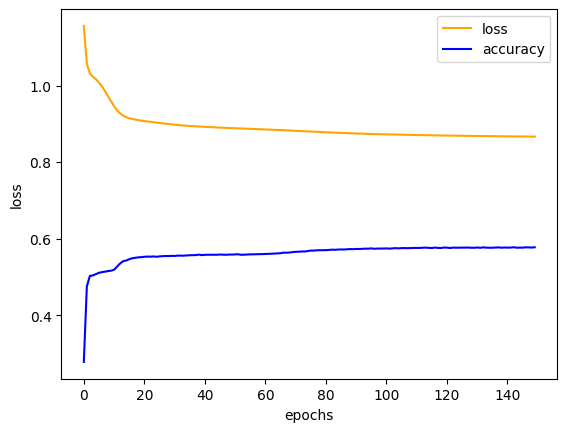

In [102]:
plot_convergion(x, cant_epochs)

2161/2161 [==============================] - 1s 477us/step


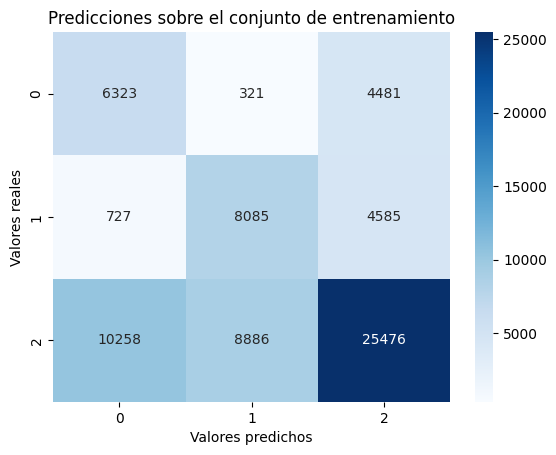

              precision    recall  f1-score   support

           0       0.37      0.57      0.44     11125
           1       0.47      0.60      0.53     13397
           2       0.74      0.57      0.64     44620

    accuracy                           0.58     69142
   macro avg       0.52      0.58      0.54     69142
weighted avg       0.63      0.58      0.59     69142

330/330 [==============================] - 0s 489us/step


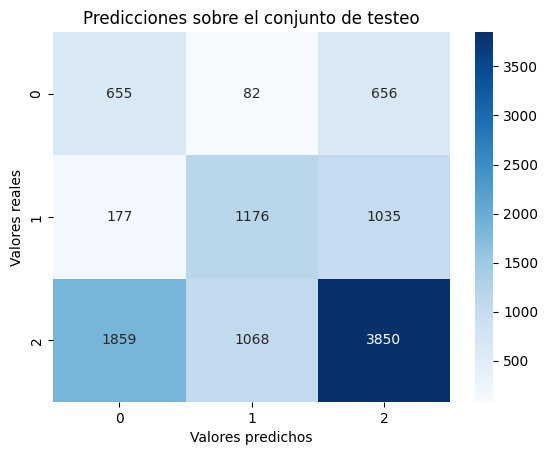

              precision    recall  f1-score   support

           0       0.24      0.47      0.32      1393
           1       0.51      0.49      0.50      2388
           2       0.69      0.57      0.63      6777

    accuracy                           0.54     10558
   macro avg       0.48      0.51      0.48     10558
weighted avg       0.59      0.54      0.56     10558



In [103]:
predicciones_clasificacion(mejor_modelo_3_capas, x_train_clasificacion_scaled, x_test_clasificacion_scaled, y_train_encoded, y_test_encoded)

##### Modelos haciendo uso del dataset ampliado

In [104]:
x_train_clasificacion = x_train.drop(columns=['place_l3', 'property_type'])
# x_train_clasificacion = x_train_clasificacion.join(ohe_place_l3_train)
x_train_clasificacion = x_train_clasificacion.join(ohe_property_type_train)

x_test_clasificacion = x_test.drop(columns=['place_l3', 'property_type'])
# x_test_clasificacion = x_test_clasificacion.join(ohe_place_l3_train)
x_test_clasificacion = x_test_clasificacion.join(ohe_property_type_train)

# Escalamos los datos
x_train_clasificacion_scaled = scaler.fit_transform(pd.DataFrame(x_train_clasificacion))
x_test_clasificacion_scaled = scaler.fit_transform(pd.DataFrame(x_test_clasificacion))


cantidad_de_posibles_respuestas = len(np.unique(y_train_clasificacion))
cantidad_de_variables_predictoras = x_train_clasificacion.shape[1]

print(cantidad_de_posibles_respuestas, cantidad_de_variables_predictoras)
x_train_clasificacion

3 14


latitud   longitud  property_rooms  property_bedrooms  \
0     -34.551623 -58.491771             1.0                1.0   
1     -34.576289 -58.463635             3.0                2.0   
2     -34.600150 -58.378244             2.0                1.0   
3     -34.641450 -58.372804             4.0                3.0   
4     -34.629050 -58.468088             5.0                4.0   
...          ...        ...             ...                ...   
69137 -34.608522 -58.430410             4.0                3.0   
69138 -34.625448 -58.524920             6.0                5.0   
69139 -34.558831 -58.462175             4.0                3.0   
69140 -34.604841 -58.495192             3.0                2.0   
69141 -34.628746 -58.463183             4.0                3.0   

       property_surface_total  property_surface_covered  score_sentimientos  \
0                        37.0                      33.0                   5   
1                       144.0                     144.0                  35   
2                        46.0                      41.0                  17   
3                        65.0                      65.0                   9   
4                       215.0                     155.0                  33   
...                       ...                       ...                 ...   
69137                   103.0                      94.0                  13   
69138                   300.0                     200.0                   9   
69139                   129.0                     114.0                  54   
69140                    64.0                      46.0                   3   
69141                   165.0                     123.0                  44   

       pileta  parrilla  balcon  sum  property_type_Casa  \
0           0         0       0    0                   0   
1           0         0       0    1                   0   
2           0         0       0    1                   0   
3           0         0       1    1                   0   
4           0         1       0    1                   1   
...       ...       ...     ...  ...                 ...   
69137       0         0       1    0                   0   
69138       0         0       0    0                   1   
69139       0         0       1    0                   0   
69140       0         0       0    0                   0   
69141       0         0       0    0                   1   

       property_type_Departamento  property_type_PH  
0                               1                 0  
1                               0                 1  
2                               1                 0  
3                               1                 0  
4                               0                 0  
...                           ...               ...  
69137                           1                 0  
69138                           0                 0  
69139                           1                 0  
69140                           1                 0  
69141                           0                 0  

[69142 rows x 14 columns]

In [105]:
len(x_train_clasificacion_scaled[0])

14

##### Modelo 2 capas

In [106]:
def create_model_2_layers_expanded_ds(activation1, activation2, neurons_first_layer, cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas):
    modelo = keras.Sequential([
        keras.layers.Dense(neurons_first_layer, input_shape=(cantidad_de_variables_predictoras,),
                           activation= activation1),
        keras.layers.Dense(cantidad_de_posibles_respuestas, activation=activation2)
    ])
    
    modelo.compile(
      optimizer= keras.optimizers.Adam(learning_rate=0.001), 
      loss='categorical_crossentropy', 
        metrics = 'accuracy',
    )
    
    return modelo

In [107]:
modelo = KerasClassifier(build_fn= create_model_2_layers_expanded_ds)

n = cantidad_de_variables_predictoras
epochs = [cant_epochs]
batches = [batch_size]
activation_layers = ['relu','tanh','sigmoid']
activation_last_layer = ['sigmoid', 'softmax']
cant_neuronas = [n, n//2, n * 2]
params = dict( 
    epochs=epochs, 
    batch_size=batches, 
    activation1 = activation_layers, 
    activation2 = activation_last_layer, 
    neurons_first_layer = cant_neuronas,
    cantidad_de_variables_predictoras = [cantidad_de_variables_predictoras],
    cantidad_de_posibles_respuestas = [cantidad_de_posibles_respuestas],
)


grid = RandomizedSearchCV(estimator=modelo, param_distributions=params,n_jobs=-1, random_state=14, verbose=False, scoring='accuracy')
grid_result = grid.fit(x_train_clasificacion_scaled, y_train_encoded)

Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150


/tmp/ipykernel_395371/2961756270.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo = KerasClassifier(build_fn= create_model_2_layers_expanded_ds)


56/56 [==============================] - 1s 2ms/step - loss: 1.0736 - accuracy: 0.4657
Epoch 2/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0773 - accuracy: 0.4879
Epoch 2/150
56/56 [==============================] - 1s 3ms/step - loss: 1.1105 - accuracy: 0.4823
Epoch 2/150
56/56 [==============================] - 1s 3ms/step - loss: 1.1695 - accuracy: 0.3206
Epoch 2/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0699 - accuracy: 0.4954
Epoch 2/150
56/56 [==============================] - 1s 3ms/step - loss: 1.2034 - accuracy: 0.3421
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0371 - accuracy: 0.4980
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0448 - accuracy: 0.4949
Epoch 2/150
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0248 - accuracy: 0.5036
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 1.0581 - accuracy: 0.4914
Epoch 3/15

56/56 [==============================] - 0s 3ms/step - loss: 0.9066 - accuracy: 0.5569
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9326 - accuracy: 0.5405
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9617 - accuracy: 0.5176
Epoch 12/150
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9370 - accuracy: 0.5405
Epoch 13/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9048 - accuracy: 0.5610
Epoch 11/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9404 - accuracy: 0.5319
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9029 - accuracy: 0.5591
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9530 - accuracy: 0.5212
Epoch 13/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9036 - accuracy: 0.5624
Epoch 13/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9260 - accuracy: 0.5466


56/56 [==============================] - 0s 3ms/step - loss: 0.9031 - accuracy: 0.5618
Epoch 21/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8892 - accuracy: 0.5698
Epoch 20/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8990 - accuracy: 0.5630
Epoch 22/150
Epoch 23/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8881 - accuracy: 0.5688
Epoch 23/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9056 - accuracy: 0.5558
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9018 - accuracy: 0.5629
Epoch 22/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8882 - accuracy: 0.5719
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8978 - accuracy: 0.5638
Epoch 24/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9039 - accuracy: 0.5594
Epoch 23/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8871 - accuracy: 0.5684


56/56 [==============================] - 0s 3ms/step - loss: 0.8908 - accuracy: 0.5677
Epoch 32/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8961 - accuracy: 0.5636
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8843 - accuracy: 0.5704
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8913 - accuracy: 0.5691
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8804 - accuracy: 0.5716
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8923 - accuracy: 0.5662
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8900 - accuracy: 0.5688
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8903 - accuracy: 0.5688
Epoch 33/150
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8953 - accuracy: 0.5641
Epoch 32/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8913 - accuracy: 0.5678


Epoch 40/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8859 - accuracy: 0.5692
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8835 - accuracy: 0.5715
Epoch 40/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8845 - accuracy: 0.5708
Epoch 42/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8723 - accuracy: 0.5757
Epoch 39/150
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8738 - accuracy: 0.5735
Epoch 41/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8828 - accuracy: 0.5715
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8853 - accuracy: 0.5694
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8839 - accuracy: 0.5713
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8717 - accuracy: 0.5763
Epoch 40/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8777 - accu

56/56 [==============================] - 0s 2ms/step - loss: 0.8821 - accuracy: 0.5714
Epoch 50/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8797 - accuracy: 0.5729
Epoch 51/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8804 - accuracy: 0.5723
Epoch 51/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8664 - accuracy: 0.5796
Epoch 50/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8727 - accuracy: 0.5753
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8670 - accuracy: 0.5769
Epoch 51/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8786 - accuracy: 0.5726
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8764 - accuracy: 0.5736
Epoch 51/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8657 - accuracy: 0.5789
Epoch 49/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8721 - accuracy: 0.5752
Epoch 50/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8749 - accuracy: 0.5745
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8720 - accuracy: 0.5753
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8616 - accuracy: 0.5808
Epoch 57/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8757 - accuracy: 0.5756
Epoch 59/150
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8754 - accuracy: 0.5755
Epoch 60/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8760 - accuracy: 0.5729
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8716 - accuracy: 0.5751
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8744 - accuracy: 0.5752
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8609 - accuracy: 0.5819
Epoch 58/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8660 - accuracy: 0.5779


56/56 [==============================] - 0s 3ms/step - loss: 0.8710 - accuracy: 0.5778
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8728 - accuracy: 0.5745
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8605 - accuracy: 0.5814
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8573 - accuracy: 0.5837
Epoch 67/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8697 - accuracy: 0.5786
Epoch 69/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8706 - accuracy: 0.5776
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8725 - accuracy: 0.5744
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8671 - accuracy: 0.5771
Epoch 71/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8551 - accuracy: 0.5842
Epoch 71/150
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8602 - accuracy: 0.5816


56/56 [==============================] - 0s 3ms/step - loss: 0.8681 - accuracy: 0.5773
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8666 - accuracy: 0.5804
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8508 - accuracy: 0.5860
Epoch 78/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8628 - accuracy: 0.5805
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8562 - accuracy: 0.5842
Epoch 78/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8532 - accuracy: 0.5862
Epoch 77/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8678 - accuracy: 0.5769
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8697 - accuracy: 0.5759
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8662 - accuracy: 0.5802
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.5868
Epoch 79/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8633 - accuracy: 0.5829
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8461 - accuracy: 0.5891
Epoch 87/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8495 - accuracy: 0.5889
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.5832
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8456 - accuracy: 0.5894
Epoch 88/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8524 - accuracy: 0.5857
Epoch 87/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8630 - accuracy: 0.5831
Epoch 88/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8644 - accuracy: 0.5789
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8673 - accuracy: 0.5770
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8628 - accuracy: 0.5820
Epoch 90/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8468 - accuracy: 0.5907
Epoch 94/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8608 - accuracy: 0.5821
Epoch 98/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8491 - accuracy: 0.5884
Epoch 95/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8546 - accuracy: 0.5851
Epoch 100/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8656 - accuracy: 0.5774
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8618 - accuracy: 0.5804
Epoch 99/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8610 - accuracy: 0.5847
Epoch 97/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.5918
Epoch 95/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8418 - accuracy: 0.5917
Epoch 97/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8605 - accuracy: 0.5825
Epoch 99/15

56/56 [==============================] - 0s 3ms/step - loss: 0.8585 - accuracy: 0.5819
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8590 - accuracy: 0.5839
Epoch 107/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.5871
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8385 - accuracy: 0.5934
Epoch 106/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8637 - accuracy: 0.5782
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8582 - accuracy: 0.5822
Epoch 109/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8588 - accuracy: 0.5834
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.5926
Epoch 106/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8517 - accuracy: 0.5870
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8380 - accuracy: 0.5944
Epoc

56/56 [==============================] - 0s 2ms/step - loss: 0.8553 - accuracy: 0.5838
Epoch 118/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8390 - accuracy: 0.5963
Epoch 113/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8575 - accuracy: 0.5843
Epoch 116/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8623 - accuracy: 0.5792
Epoch 119/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8354 - accuracy: 0.5970
Epoch 115/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8577 - accuracy: 0.5858
Epoch 115/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8497 - accuracy: 0.5880
Epoch 118/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8574 - accuracy: 0.5843
Epoch 117/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8495 - accuracy: 0.5885
Epoch 119/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8406 - accuracy: 0.5956
Epoc

56/56 [==============================] - 0s 3ms/step - loss: 0.8562 - accuracy: 0.5849
Epoch 125/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8481 - accuracy: 0.5887
Epoch 126/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8529 - accuracy: 0.5847
Epoch 128/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8563 - accuracy: 0.5863
Epoch 122/150
Epoch 128/150
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8561 - accuracy: 0.5853
Epoch 126/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8478 - accuracy: 0.5889
Epoch 127/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8607 - accuracy: 0.5802
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.5990
Epoch 123/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8561 - accuracy: 0.5869
Epoch 124/150
56/56 [==============================] - 0s 3ms/step - loss: 0.

56/56 [==============================] - 0s 4ms/step - loss: 0.8551 - accuracy: 0.5854
Epoch 133/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8307 - accuracy: 0.6014
Epoch 131/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8549 - accuracy: 0.5870
Epoch 131/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8344 - accuracy: 0.5994
Epoch 132/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8595 - accuracy: 0.5803
Epoch 137/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8512 - accuracy: 0.5853
Epoch 136/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8323 - accuracy: 0.6014
Epoch 131/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8303 - accuracy: 0.6019
Epoch 132/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8550 - accuracy: 0.5852
Epoch 134/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8548 - accuracy: 0.5873
Epoc

56/56 [==============================] - 0s 3ms/step - loss: 0.8582 - accuracy: 0.5809
Epoch 146/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.5890
Epoch 140/150
Epoch 144/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8497 - accuracy: 0.5850
Epoch 140/150
Epoch 145/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8540 - accuracy: 0.5860
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8310 - accuracy: 0.6022
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8532 - accuracy: 0.5883
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8495 - accuracy: 0.5852
Epoch 146/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8290 - accuracy: 0.6053
Epoch 141/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8307 - accuracy: 0.6027
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.

359/433 [=======================>......] - ETA: 0s

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

433/433 [==============================] - 1s 1ms/step
Epoch 1/150
433/433 [==============================] - 0s 956us/step


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 1/150
Epoch 1/150
Epoch 1/150
 1/56 [..............................] - ETA: 28s - loss: 1.1832 - accuracy: 0.2550Epoch 1/150
Epoch 1/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 1s 2ms/step - loss: 1.0942 - accuracy: 0.4295
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0366 - accuracy: 0.5012
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0154 - accuracy: 0.5001
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0082 - accuracy: 0.5066
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9949 - accuracy: 0.5068
Epoch 4/150
56/56 [==============================] - 1s 2ms/step - loss: 1.3406 - accuracy: 0.2411
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9848 - accuracy: 0.5126
Epoch 5/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9808 - accuracy: 0.5129
Epoch 5/150
56/56 [==============================] - 1s 3ms/step - loss: 1.1178 - accuracy: 0.4424
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 1.1594 - accuracy: 0.3340
Epoch 3/150
56/56 [===

56/56 [==============================] - 0s 2ms/step - loss: 0.9428 - accuracy: 0.5417
Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9174 - accuracy: 0.5414
Epoch 13/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9010 - accuracy: 0.5616
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8962 - accuracy: 0.5651
Epoch 16/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9148 - accuracy: 0.5440
Epoch 13/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9419 - accuracy: 0.5326
Epoch 10/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9002 - accuracy: 0.5556
Epoch 14/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9304 - accuracy: 0.5474
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.5624
Epoch 18/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8947 - accuracy: 0.5656
Epoch 17/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8703 - accuracy: 0.5765
Epoch 23/150
Epoch 25/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8872 - accuracy: 0.5693
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8909 - accuracy: 0.5637
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8810 - accuracy: 0.5731
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8815 - accuracy: 0.5646
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8836 - accuracy: 0.5714
Epoch 25/150
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8839 - accuracy: 0.5704
Epoch 28/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8886 - accuracy: 0.5645
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8798 - accuracy: 0.5742
Epoch 27/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8676 - accu

56/56 [==============================] - 0s 2ms/step - loss: 0.8616 - accuracy: 0.5819
Epoch 36/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8782 - accuracy: 0.5720
Epoch 40/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8770 - accuracy: 0.5729
Epoch 38/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8720 - accuracy: 0.5742
Epoch 32/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8712 - accuracy: 0.5825
Epoch 37/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8707 - accuracy: 0.5778
Epoch 35/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8611 - accuracy: 0.5822
Epoch 37/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8774 - accuracy: 0.5733
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8764 - accuracy: 0.5729
Epoch 39/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8645 - accuracy: 0.5761
Epoch 33/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8698 - accuracy: 0.5755
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8579 - accuracy: 0.5823
Epoch 48/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8619 - accuracy: 0.5830
Epoch 47/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8576 - accuracy: 0.5835
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8701 - accuracy: 0.5755
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8597 - accuracy: 0.5843
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8634 - accuracy: 0.5854
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8692 - accuracy: 0.5756
Epoch 50/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8574 - accuracy: 0.5828
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8573 - accuracy: 0.5839
Epoch 50/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8640 - accuracy: 0.5782
Epoch 59/150
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8554 - accuracy: 0.5851
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.5868
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8552 - accuracy: 0.5875
Epoch 55/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8563 - accuracy: 0.5872
Epoch 59/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.5849
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8634 - accuracy: 0.5789
Epoch 63/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8624 - accuracy: 0.5798
Epoch 61/150
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8550 - accuracy: 0.5878
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8550 - accu

56/56 [==============================] - 0s 2ms/step - loss: 0.8530 - accuracy: 0.5872
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.5866
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8527 - accuracy: 0.5900
Epoch 64/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8584 - accuracy: 0.5818
Epoch 72/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8571 - accuracy: 0.5830
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8518 - accuracy: 0.5886
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8540 - accuracy: 0.5868
Epoch 70/150
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8579 - accuracy: 0.5835
Epoch 73/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8565 - accuracy: 0.5842
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8516 - accuracy: 0.5881


56/56 [==============================] - 0s 2ms/step - loss: 0.8498 - accuracy: 0.5888
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.5872
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.5903
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.5912
Epoch 75/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8517 - accuracy: 0.5875
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8529 - accuracy: 0.5867
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8531 - accuracy: 0.5863
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.5887
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8521 - accuracy: 0.5874
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8509 - accuracy: 0.5908
Epoch 81/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8486 - accuracy: 0.5891
Epoch 91/150
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8486 - accuracy: 0.5920
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8471 - accuracy: 0.5905
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8524 - accuracy: 0.5864
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8483 - accuracy: 0.5898
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8516 - accuracy: 0.5882
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8483 - accuracy: 0.5893
Epoch 94/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8485 - accuracy: 0.5918
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.5924
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8481 - accuracy: 0.5890


56/56 [==============================] - 0s 2ms/step - loss: 0.8474 - accuracy: 0.5903
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8444 - accuracy: 0.5914
Epoch 104/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.5863
Epoch 103/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.5942
Epoch 103/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8431 - accuracy: 0.5911
Epoch 103/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8473 - accuracy: 0.5898
Epoch 103/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8471 - accuracy: 0.5926
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8440 - accuracy: 0.5910
Epoch 105/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8460 - accuracy: 0.5938
Epoch 104/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.5885
Epoch

56/56 [==============================] - 0s 2ms/step - loss: 0.8396 - accuracy: 0.5926
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8465 - accuracy: 0.5900
Epoch 113/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8403 - accuracy: 0.5938
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8514 - accuracy: 0.5858
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.5952
Epoch 114/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8508 - accuracy: 0.5887
Epoch 114/150
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8461 - accuracy: 0.5926
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8392 - accuracy: 0.5940
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8514 - accuracy: 0.5870
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8446 - accurac

56/56 [==============================] - 0s 3ms/step - loss: 0.8451 - accuracy: 0.5926
Epoch 119/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8505 - accuracy: 0.5886
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.5867
Epoch 125/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8360 - accuracy: 0.5946
Epoch 124/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.5902
Epoch 124/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8436 - accuracy: 0.5963
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8450 - accuracy: 0.5930
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8504 - accuracy: 0.5879
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.5888
Epoch 126/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8357 - accuracy: 0.5948
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.5891
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8509 - accuracy: 0.5880
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8454 - accuracy: 0.5902
Epoch 128/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8448 - accuracy: 0.5935
Epoch 130/150
Epoch 130/150
Epoch 123/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8347 - accuracy: 0.5944
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8349 - accuracy: 0.5980
Epoch 131/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8454 - accuracy: 0.5904
Epoch 129/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8509 - accuracy: 0.5878
Epoch 130/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8433 - accuracy: 0.5966
Epoch 131/150
56/56 [==============================] - 0s 3ms/step - loss: 0.

56/56 [==============================] - 0s 2ms/step - loss: 0.8504 - accuracy: 0.5883
Epoch 139/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8324 - accuracy: 0.6000
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8318 - accuracy: 0.5967
Epoch 138/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8449 - accuracy: 0.5903
Epoch 132/150
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9824 - accuracy: 0.5147
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.6000
Epoch 140/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8440 - accuracy: 0.5937
Epoch 133/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.5878
Epoch 139/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9713 - accuracy: 0.5197
Epoch 9/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8317 - accuracy: 0

56/56 [==============================] - 0s 3ms/step - loss: 0.8290 - accuracy: 0.5992
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9128 - accuracy: 0.5560
Epoch 17/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8435 - accuracy: 0.5951
Epoch 141/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8293 - accuracy: 0.6028
Epoch 149/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.5889
Epoch 149/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8445 - accuracy: 0.5901
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8500 - accuracy: 0.5885
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9097 - accuracy: 0.5571
Epoch 18/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8434 - accuracy: 0.5945
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.6024
Epoch 

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 1ms/step - loss: 0.8929 - accuracy: 0.5655
Epoch 29/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8919 - accuracy: 0.5661
Epoch 30/150
240/433 [===============>..............] - ETA: 0s

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 1ms/step - loss: 0.8910 - accuracy: 0.5667
Epoch 31/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8901 - accuracy: 0.5672
Epoch 32/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8892 - accuracy: 0.5672
Epoch 33/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8883 - accuracy: 0.5678
Epoch 34/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8875 - accuracy: 0.5680
Epoch 35/150
56/56 [==============================] - 1s 2ms/step - loss: 1.1267 - accuracy: 0.2944
Epoch 2/150
 1/56 [..............................] - ETA: 0s - loss: 1.0842 - accuracy: 0.3460Epoch 1/150
Epoch 1/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 1s 1ms/step - loss: 1.1298 - accuracy: 0.3230
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8867 - accuracy: 0.5679
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0558 - accuracy: 0.4694
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0484 - accuracy: 0.4390
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8859 - accuracy: 0.5682
Epoch 37/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0261 - accuracy: 0.5004
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0158 - accuracy: 0.4970
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0128 - accuracy: 0.5047
Epoch 5/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0016 - accuracy: 0.5070
Epoch 5/150
56/56 [==============================] - 1s 2ms/step - loss: 1.0763 - accuracy: 0.4930
Epoch 2/150
56/56 [=

56/56 [==============================] - 0s 2ms/step - loss: 0.9273 - accuracy: 0.5454
Epoch 48/150
Epoch 15/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9175 - accuracy: 0.5467
Epoch 8/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9733 - accuracy: 0.5134
Epoch 12/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9707 - accuracy: 0.5127
Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9225 - accuracy: 0.5494
Epoch 16/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8781 - accuracy: 0.5714
Epoch 49/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9094 - accuracy: 0.5515
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9606 - accuracy: 0.5197
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9133 - accuracy: 0.5550
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9183 - accuracy: 0.5519
Ep

Epoch 58/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8712 - accuracy: 0.5776
Epoch 19/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8991 - accuracy: 0.5641
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8663 - accuracy: 0.5802
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8726 - accuracy: 0.5734
Epoch 59/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8691 - accuracy: 0.5800
Epoch 20/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.5641
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8980 - accuracy: 0.5653
Epoch 23/150
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8901 - accuracy: 0.5640
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8652 - accuracy: 0.5807
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8722 - accu

56/56 [==============================] - 0s 3ms/step - loss: 0.8904 - accuracy: 0.5680
Epoch 34/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8681 - accuracy: 0.5772
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8991 - accuracy: 0.5647
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8884 - accuracy: 0.5686
Epoch 38/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8550 - accuracy: 0.5899
Epoch 31/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8558 - accuracy: 0.5856
Epoch 33/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8895 - accuracy: 0.5684
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8678 - accuracy: 0.5773
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8984 - accuracy: 0.5652
Epoch 34/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.5913
Epoch 32/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8502 - accuracy: 0.5903
Epoch 43/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8652 - accuracy: 0.5801
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8482 - accuracy: 0.5947
Epoch 50/150
Epoch 41/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8815 - accuracy: 0.5723
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8498 - accuracy: 0.5905
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8822 - accuracy: 0.5714
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8750 - accuracy: 0.5737
Epoch 51/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8476 - accuracy: 0.5947
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8495 - accuracy: 0.5901
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8922 - accuracy: 0.5679


56/56 [==============================] - 0s 3ms/step - loss: 0.8464 - accuracy: 0.5921
Epoch 55/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8691 - accuracy: 0.5768
Epoch 61/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8625 - accuracy: 0.5816
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8759 - accuracy: 0.5725
Epoch 55/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8874 - accuracy: 0.5710
Epoch 60/150
Epoch 55/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8464 - accuracy: 0.5934
Epoch 56/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8430 - accuracy: 0.5986
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8685 - accuracy: 0.5764
Epoch 62/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8869 - accuracy: 0.5714
Epoch 56/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8624 - accuracy: 0.5819


56/56 [==============================] - 0s 2ms/step - loss: 0.8733 - accuracy: 0.5740
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8706 - accuracy: 0.5755
Epoch 65/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8602 - accuracy: 0.5830
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8431 - accuracy: 0.5943
Epoch 67/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8638 - accuracy: 0.5796
Epoch 72/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8386 - accuracy: 0.6014
Epoch 63/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8701 - accuracy: 0.5753
Epoch 66/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8730 - accuracy: 0.5740
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8427 - accuracy: 0.5945
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8601 - accuracy: 0.5828
Epoch 103/15

56/56 [==============================] - 0s 2ms/step - loss: 0.8701 - accuracy: 0.5764
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8604 - accuracy: 0.5807
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8763 - accuracy: 0.5761
Epoch 78/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8651 - accuracy: 0.5779
Epoch 77/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8698 - accuracy: 0.5759
Epoch 82/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8408 - accuracy: 0.5964
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8357 - accuracy: 0.6034
Epoch 74/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8601 - accuracy: 0.5809
Epoch 84/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.5845
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8647 - accuracy: 0.5786
Epoch 78/150

56/56 [==============================] - 0s 3ms/step - loss: 0.8607 - accuracy: 0.5811
Epoch 87/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8579 - accuracy: 0.5820
Epoch 94/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8337 - accuracy: 0.6047
Epoch 90/150
Epoch 84/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8559 - accuracy: 0.5848
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8669 - accuracy: 0.5769
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8707 - accuracy: 0.5774
Epoch 89/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8578 - accuracy: 0.5827
Epoch 95/150
 1/56 [..............................] - ETA: 0s - loss: 0.8699 - accuracy: 0.5770Epoch 91/150
Epoch 85/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8667 - accuracy: 0.5768
Epoch 94/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8557 - accuracy

54/56 [===========================>..] - ETA: 0s - loss: 0.8642 - accuracy: 0.5781Epoch 101/150
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8642 - accuracy: 0.5779
Epoch 104/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.6054
Epoch 95/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8561 - accuracy: 0.5831
Epoch 105/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8542 - accuracy: 0.5858
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8648 - accuracy: 0.5792
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8381 - accuracy: 0.5984
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8562 - accuracy: 0.5832
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8640 - accuracy: 0.5779
Epoch 105/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.605

56/56 [==============================] - 0s 2ms/step - loss: 0.8620 - accuracy: 0.5800
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8605 - accuracy: 0.5819
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8377 - accuracy: 0.5984
Epoch 111/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8546 - accuracy: 0.5844
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8534 - accuracy: 0.5840
Epoch 146/150
Epoch 108/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8306 - accuracy: 0.6076
Epoch 105/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8377 - accuracy: 0.5981
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8545 - accuracy: 0.5842
Epoch 116/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8532 - accuracy: 0.5844
Epoch 147/150
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.

56/56 [==============================] - 0s 2ms/step - loss: 0.8368 - accuracy: 0.5987
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8531 - accuracy: 0.5859
Epoch 126/150
Epoch 118/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8600 - accuracy: 0.5800
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8565 - accuracy: 0.5837
Epoch 121/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8365 - accuracy: 0.5996
Epoch 116/150
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8530 - accuracy: 0.5860
Epoch 119/150
Epoch 127/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8597 - accuracy: 0.5804
Epoch 126/150
38/56 [===================>..........] - ETA: 0s - loss: 0.8564 - accuracy: 0.5850

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8365 - accuracy: 0.5994
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8293 - accuracy: 0.6078
Epoch 117/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.5862
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8505 - accuracy: 0.5857
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8596 - accuracy: 0.5796
Epoch 127/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8292 - accuracy: 0.6081
Epoch 129/150
Epoch 118/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.5855
Epoch 121/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8560 - accuracy: 0.5830
Epoch 125/150
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8501 - accuracy: 0.5861
Epoch 130/150
Epoch 122/150
56/56 [==============================] - 0s 2ms/s

56/56 [==============================] - 0s 2ms/step - loss: 0.8283 - accuracy: 0.6082
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8578 - accuracy: 0.5807
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8358 - accuracy: 0.5994
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8511 - accuracy: 0.5865
Epoch 140/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9846 - accuracy: 0.5216
Epoch 5/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8537 - accuracy: 0.5850
Epoch 129/150
Epoch 132/150
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8576 - accuracy: 0.5812
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8359 - accuracy: 0.6001
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8511 - accuracy: 0.5867
Epoch 141/150
56/56 [==============================] - 0s 2ms/step - loss: 0.95

56/56 [==============================] - 0s 3ms/step - loss: 0.8351 - accuracy: 0.5995
Epoch 146/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8836 - accuracy: 0.5681
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8520 - accuracy: 0.5847
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8562 - accuracy: 0.5829
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8467 - accuracy: 0.5870
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8275 - accuracy: 0.6082
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8811 - accuracy: 0.5696
Epoch 16/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8350 - accuracy: 0.5996
Epoch 143/150
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8518 - accuracy: 0.5848
Epoch 145/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8560 - accuracy:

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8273 - accuracy: 0.6092
Epoch 141/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8349 - accuracy: 0.6003
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8463 - accuracy: 0.5878
Epoch 145/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8515 - accuracy: 0.5852
Epoch 147/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8749 - accuracy: 0.5734
Epoch 19/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.5882
Epoch 146/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8350 - accuracy: 0.5996
Epoch 150/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8514 - accuracy: 0.5855
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.6091
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8732 - accuracy: 0.5743
Epoch

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.9128 - accuracy: 0.5503
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8600 - accuracy: 0.5831
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9051 - accuracy: 0.5545
Epoch 8/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8585 - accuracy: 0.5840
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8990 - accuracy: 0.5582
Epoch 9/150
Epoch 1/150
 1/56 [..............................] - ETA: 0s - loss: 0.9054 - accuracy: 0.5410

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 1ms/step - loss: 0.8573 - accuracy: 0.5858
Epoch 31/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8941 - accuracy: 0.5605
Epoch 10/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8551 - accuracy: 0.5870
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8903 - accuracy: 0.5625
Epoch 11/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8541 - accuracy: 0.5881
Epoch 34/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8534 - accuracy: 0.5878
Epoch 35/150
56/56 [==============================] - 1s 2ms/step - loss: 1.1609 - accuracy: 0.3664
Epoch 2/150
56/56 [==============================] - 1s 2ms/step - loss: 1.4203 - accuracy: 0.2850
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8817 - accuracy: 0.5683
Epoch 14/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0469 - accuracy: 0.4752
Epoch 3/150
56/

56/56 [==============================] - 0s 3ms/step - loss: 0.8477 - accuracy: 0.5917
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9293 - accuracy: 0.5476
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8839 - accuracy: 0.5677
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9190 - accuracy: 0.5494
Epoch 10/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8684 - accuracy: 0.5793
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0011 - accuracy: 0.5095
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8475 - accuracy: 0.5923
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9222 - accuracy: 0.5505
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9125 - accuracy: 0.5554
Epoch 11/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8794 - accuracy: 0.5720
Epoch 13/150
5

56/56 [==============================] - 0s 2ms/step - loss: 0.8593 - accuracy: 0.5866
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8845 - accuracy: 0.5676
Epoch 21/150
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8576 - accuracy: 0.5855
Epoch 34/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9041 - accuracy: 0.5571
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8863 - accuracy: 0.5648
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8438 - accuracy: 0.5937
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8737 - accuracy: 0.5747
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8568 - accuracy: 0.5851
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9010 - accuracy: 0.5586
Epoch 21/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.5887


56/56 [==============================] - 0s 3ms/step - loss: 0.8788 - accuracy: 0.5727
Epoch 31/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8520 - accuracy: 0.5907
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8410 - accuracy: 0.5952
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8715 - accuracy: 0.5730
Epoch 32/150
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8626 - accuracy: 0.5821
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8775 - accuracy: 0.5735
Epoch 32/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8514 - accuracy: 0.5908
Epoch 46/150
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8710 - accuracy: 0.5726
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8407 - accuracy: 0.5952
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8620 - accu

56/56 [==============================] - 0s 2ms/step - loss: 0.8683 - accuracy: 0.5799
Epoch 42/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8468 - accuracy: 0.5940
Epoch 46/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8647 - accuracy: 0.5834
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8582 - accuracy: 0.5840
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.5759
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8460 - accuracy: 0.5943
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8675 - accuracy: 0.5807
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8642 - accuracy: 0.5840
Epoch 47/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.5944
Epoch 47/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8386 - accuracy: 0.5961
Epoch 80/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8602 - accuracy: 0.5848
Epoch 57/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8546 - accuracy: 0.5863
Epoch 57/150
Epoch 53/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8631 - accuracy: 0.5795
Epoch 55/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8432 - accuracy: 0.5955
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8369 - accuracy: 0.5983
Epoch 90/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8599 - accuracy: 0.5841
Epoch 58/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8608 - accuracy: 0.5852
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8435 - accuracy: 0.5949
Epoch 58/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8544 - accuracy: 0.5858
Epoch 56/150
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8430 - accu

56/56 [==============================] - 0s 2ms/step - loss: 0.8408 - accuracy: 0.5966
Epoch 79/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8410 - accuracy: 0.5962
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8583 - accuracy: 0.5845
Epoch 66/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.5987
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.5874
Epoch 67/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8569 - accuracy: 0.5872
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8562 - accuracy: 0.5865
Epoch 65/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8406 - accuracy: 0.5965
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8580 - accuracy: 0.5841
Epoch 67/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.5992
Epoch 101/15

56/56 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.5886
Epoch 111/150
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8558 - accuracy: 0.5844
Epoch 78/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8391 - accuracy: 0.5978
Epoch 90/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8388 - accuracy: 0.5981
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8538 - accuracy: 0.5874
Epoch 76/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8542 - accuracy: 0.5882
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.6007
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.5844
Epoch 79/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8389 - accuracy: 0.5983
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8537 - accuracy: 0.587

56/56 [==============================] - 0s 3ms/step - loss: 0.8380 - accuracy: 0.5988
Epoch 101/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8371 - accuracy: 0.5991
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8520 - accuracy: 0.5887
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8338 - accuracy: 0.5997
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.5898
Epoch 89/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8526 - accuracy: 0.5891
Epoch 92/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8378 - accuracy: 0.5991
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8370 - accuracy: 0.5990
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8338 - accuracy: 0.5992
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8495 - accuracy: 0.5897
Epoch 90/

56/56 [==============================] - 0s 2ms/step - loss: 0.8369 - accuracy: 0.5997
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.5882
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8516 - accuracy: 0.5898
Epoch 103/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8526 - accuracy: 0.5859
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.6005
Epoch 133/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8369 - accuracy: 0.6000
Epoch 113/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.5878
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8525 - accuracy: 0.5865
Epoch 101/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8516 - accuracy: 0.5905
Epoch 104/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8487 - accuracy: 0.5896
Epoch 

56/56 [==============================] - 0s 3ms/step - loss: 0.8351 - accuracy: 0.5999
Epoch 113/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.6002
Epoch 124/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8510 - accuracy: 0.5905
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5905
Epoch 111/150
Epoch 111/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5894
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8327 - accuracy: 0.6016
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8350 - accuracy: 0.5995
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.6002
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5903
Epoch 112/150
Epoch 112/150
56/56 [==============================] - 0s 2ms/step - loss: 0.

56/56 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.5914
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.5882
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.6010
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8474 - accuracy: 0.5909
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8469 - accuracy: 0.5901
Epoch 121/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.6002
Epoch 126/150
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8467 - accuracy: 0.5914
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8501 - accuracy: 0.5914
Epoch 127/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8344 - accuracy: 0.6009
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8474 - accurac

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8499 - accuracy: 0.5922
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8469 - accuracy: 0.5906
Epoch 131/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8506 - accuracy: 0.5876
Epoch 131/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8339 - accuracy: 0.6007
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8336 - accuracy: 0.6005
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.5919
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8460 - accuracy: 0.5917
Epoch 130/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8469 - accuracy: 0.5905
Epoch 132/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8505 - accuracy: 0.5883
Epoch 132/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8337 - accuracy: 0.5999
Epoc

56/56 [==============================] - 0s 2ms/step - loss: 0.8329 - accuracy: 0.6007
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9953 - accuracy: 0.5007
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8493 - accuracy: 0.5920
Epoch 146/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8499 - accuracy: 0.5881
Epoch 141/150
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8329 - accuracy: 0.6007
Epoch 146/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8491 - accuracy: 0.5908
Epoch 144/150
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8451 - accuracy: 0.5923
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8328 - accuracy: 0.6009
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8460 - accuracy: 0.5909
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.96

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.9053 - accuracy: 0.5556
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8444 - accuracy: 0.5934
Epoch 150/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9004 - accuracy: 0.5589
Epoch 17/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8961 - accuracy: 0.5608
Epoch 18/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8924 - accuracy: 0.5631
Epoch 19/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8890 - accuracy: 0.5640


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8862 - accuracy: 0.5654
Epoch 21/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8838 - accuracy: 0.5681
Epoch 22/150
56/56 [==============================] - 1s 2ms/step - loss: 1.1082 - accuracy: 0.4703
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8815 - accuracy: 0.5687
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9895 - accuracy: 0.5086
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8796 - accuracy: 0.5707
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9423 - accuracy: 0.5339
Epoch 4/150
 1/56 [..............................] - ETA: 0s - loss: 0.9557 - accuracy: 0.5090

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 1/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8777 - accuracy: 0.5724
Epoch 25/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9168 - accuracy: 0.5465
Epoch 5/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8761 - accuracy: 0.5729
Epoch 26/150
56/56 [==============================] - 1s 1ms/step - loss: 1.0783 - accuracy: 0.4601
Epoch 2/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.9017 - accuracy: 0.5571
Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8747 - accuracy: 0.5739
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9741 - accuracy: 0.5207
Epoch 3/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8923 - accuracy: 0.5640
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8733 - accuracy: 0.5739
Epoch 28/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9340 - accuracy: 0.5466
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8852 - accuracy: 0.5674
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9131 - accuracy: 0.5573
Epoch 5/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8721 - accuracy: 0.5751
Epoch 29/150
28/56 [==============>...............] - ETA: 0s - loss: 0.8701 - accuracy: 0.5765

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.9005 - accuracy: 0.5633
Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8707 - accuracy: 0.5760
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8756 - accuracy: 0.5736
Epoch 10/150
35/56 [=================>............] - ETA: 0s - loss: 0.8937 - accuracy: 0.5683Epoch 2/150
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8921 - accuracy: 0.5689
Epoch 31/150
Epoch 7/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8723 - accuracy: 0.5762
Epoch 11/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9933 - accuracy: 0.5117
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 0.9761 - accuracy: 0.5139
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8696 - accuracy: 0.5766
Epoch 12/150
  1/433 [..............................] - ETA: 39sEpoch 13/150
Epoch 4/150
56/56 [==

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8669 - accuracy: 0.5814
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8723 - accuracy: 0.5745
Epoch 9/150
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8539 - accuracy: 0.5857
Epoch 1/150
Epoch 23/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8548 - accuracy: 0.5854
Epoch 19/150
Epoch 14/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8605 - accuracy: 0.5832
Epoch 43/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8635 - accuracy: 0.5836
Epoch 14/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8696 - accuracy: 0.5758
Epoch 14/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8790 - accuracy: 0.5743
Epoch 10/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8540 - accuracy: 0.5856
Epoch 15/150
Epoch 20/150
Epoch 24/150
56/56 [==============================

56/56 [==============================] - 0s 3ms/step - loss: 0.8459 - accuracy: 0.5909
Epoch 29/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8442 - accuracy: 0.5937
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8552 - accuracy: 0.5865
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8564 - accuracy: 0.5860
Epoch 54/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8545 - accuracy: 0.5892
Epoch 20/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8454 - accuracy: 0.5911
Epoch 30/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8498 - accuracy: 0.5904
Epoch 25/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8861 - accuracy: 0.5704
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8435 - accuracy: 0.5937
Epoch 34/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8446 - accuracy: 0.5914
Epoch 31/150
5

56/56 [==============================] - 0s 3ms/step - loss: 0.8439 - accuracy: 0.5967
Epoch 33/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8475 - accuracy: 0.5933
Epoch 28/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8406 - accuracy: 0.5949
Epoch 39/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8427 - accuracy: 0.5952
Epoch 34/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8390 - accuracy: 0.5956
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8563 - accuracy: 0.5855
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8434 - accuracy: 0.5957
Epoch 34/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8468 - accuracy: 0.5945
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8403 - accuracy: 0.5949
Epoch 40/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8385 - accuracy: 0.5976
Epoch 44/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8428 - accuracy: 0.5957
Epoch 42/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8373 - accuracy: 0.5980
Epoch 43/150
56/56 [==============================] - 0s 4ms/step - loss: 0.8533 - accuracy: 0.5884
Epoch 43/150
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8354 - accuracy: 0.5981
Epoch 53/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.5924
Epoch 26/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8368 - accuracy: 0.5977
Epoch 49/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8415 - accuracy: 0.5980
Epoch 38/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8421 - accuracy: 0.5949
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.5998
Epoch 44/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8367 - accuracy: 0.5981


56/56 [==============================] - 0s 3ms/step - loss: 0.8373 - accuracy: 0.6011
Epoch 47/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8332 - accuracy: 0.6008
Epoch 52/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8341 - accuracy: 0.5993
Epoch 58/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8387 - accuracy: 0.5958
Epoch 35/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8520 - accuracy: 0.5886
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8365 - accuracy: 0.6023
Epoch 53/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8321 - accuracy: 0.5991
Epoch 63/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8374 - accuracy: 0.5979
Epoch 52/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8370 - accuracy: 0.6006
Epoch 48/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8339 - accuracy: 0.6000
Epoch 59/150


56/56 [==============================] - 0s 3ms/step - loss: 0.8338 - accuracy: 0.6031
Epoch 63/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8332 - accuracy: 0.6003
Epoch 62/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8334 - accuracy: 0.6031
Epoch 69/150
Epoch 58/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8337 - accuracy: 0.6026
Epoch 63/150
Epoch 64/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8330 - accuracy: 0.6023
Epoch 59/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8511 - accuracy: 0.5907
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8324 - accuracy: 0.5993
Epoch 47/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8306 - accuracy: 0.6017
Epoch 70/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8291 - accuracy: 0.6022
Epoch 65/150
Epoch 64/150
56/56 [==============================] - 0s 2ms/step - loss: 

56/56 [==============================] - 0s 3ms/step - loss: 0.8286 - accuracy: 0.6018
Epoch 71/150
Epoch 78/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8277 - accuracy: 0.6027
Epoch 73/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8296 - accuracy: 0.6011
Epoch 55/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8271 - accuracy: 0.6036
Epoch 72/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8304 - accuracy: 0.6042
Epoch 68/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8508 - accuracy: 0.5906
Epoch 99/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8299 - accuracy: 0.6024
Epoch 72/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8284 - accuracy: 0.6032
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8294 - accuracy: 0.6023
Epoch 56/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8273 - accuracy: 0.6039


56/56 [==============================] - 0s 2ms/step - loss: 0.8253 - accuracy: 0.6055
Epoch 81/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8288 - accuracy: 0.6037
Epoch 77/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8279 - accuracy: 0.6029
Epoch 80/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8507 - accuracy: 0.5905
Epoch 108/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8256 - accuracy: 0.6049
Epoch 92/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8275 - accuracy: 0.6024
Epoch 64/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8305 - accuracy: 0.6057
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8285 - accuracy: 0.6041
Epoch 78/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8259 - accuracy: 0.6028
Epoch 88/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8277 - accuracy: 0.6026
Epoch 81/150

56/56 [==============================] - 0s 3ms/step - loss: 0.8244 - accuracy: 0.6068
Epoch 100/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8271 - accuracy: 0.6043
Epoch 86/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8294 - accuracy: 0.6056
Epoch 92/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8237 - accuracy: 0.6070
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8244 - accuracy: 0.6072
Epoch 101/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8255 - accuracy: 0.6056
Epoch 73/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8271 - accuracy: 0.6054
Epoch 87/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8235 - accuracy: 0.6047
Epoch 98/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8259 - accuracy: 0.6045
Epoch 93/150
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8235 - accuracy: 0.606

56/56 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.5901
Epoch 125/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8286 - accuracy: 0.6065
Epoch 101/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8236 - accuracy: 0.6058
Epoch 82/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8243 - accuracy: 0.6036
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8225 - accuracy: 0.6083
Epoch 95/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8505 - accuracy: 0.5911
Epoch 126/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8216 - accuracy: 0.6064
Epoch 107/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8235 - accuracy: 0.6054
Epoch 83/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8286 - accuracy: 0.6065
Epoch 101/150
Epoch 102/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8255 - accuracy: 

56/56 [==============================] - 0s 3ms/step - loss: 0.8229 - accuracy: 0.6054
Epoch 109/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8273 - accuracy: 0.6075
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8222 - accuracy: 0.6069
Epoch 91/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8243 - accuracy: 0.6074
Epoch 105/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8502 - accuracy: 0.5908
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8230 - accuracy: 0.6058
Epoch 110/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8221 - accuracy: 0.6072
Epoch 92/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8274 - accuracy: 0.6072
Epoch 111/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8201 - accuracy: 0.6073
Epoch 117/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8208 - accuracy: 0.6080
Epoch 

56/56 [==============================] - 0s 3ms/step - loss: 0.8193 - accuracy: 0.6081
Epoch 125/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8198 - accuracy: 0.6102
Epoch 117/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8228 - accuracy: 0.6085
Epoch 114/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8502 - accuracy: 0.5897
Epoch 144/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8198 - accuracy: 0.6091
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8263 - accuracy: 0.6082
Epoch 120/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8208 - accuracy: 0.6081
Epoch 101/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8218 - accuracy: 0.6065
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8191 - accuracy: 0.6069
Epoch 126/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8224 - accuracy: 0.6081
Epoc

56/56 [==============================] - 0s 2ms/step - loss: 0.8249 - accuracy: 0.6080
Epoch 129/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8181 - accuracy: 0.6074
Epoch 135/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8204 - accuracy: 0.6068
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8213 - accuracy: 0.6090
Epoch 138/150
Epoch 124/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8182 - accuracy: 0.6100
Epoch 127/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8195 - accuracy: 0.6084
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8203 - accuracy: 0.6064
Epoch 129/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8214 - accuracy: 0.6093
Epoch 125/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8179 - accuracy: 0.6076
Epoch 139/150
Epoch 136/150
56/56 [==============================] - 0s 3ms/step - loss: 0.

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8173 - accuracy: 0.6088
Epoch 140/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.6092
Epoch 115/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8178 - accuracy: 0.6107
Epoch 132/150
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.6091
Epoch 135/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8204 - accuracy: 0.6092
Epoch 130/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8179 - accuracy: 0.6090
Epoch 141/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8178 - accuracy: 0.6102
Epoch 145/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8206 - accuracy: 0.6105
Epoch 131/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8194 - accuracy: 0.6073
Epoch 135/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8188 - accurac

56/56 [==============================] - 0s 3ms/step - loss: 0.8184 - accuracy: 0.6091
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8166 - accuracy: 0.6125
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8178 - accuracy: 0.6106
Epoch 126/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8229 - accuracy: 0.6104
Epoch 7/150
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.6106
Epoch 141/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8183 - accuracy: 0.6087
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8167 - accuracy: 0.6123
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8179 - accuracy: 0.6100
Epoch 8/150
Epoch 127/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8225 - accuracy: 0.6111
Epoch 146/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8188

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8615 - accuracy: 0.5818
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8173 - accuracy: 0.6110
Epoch 149/150
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8598 - accuracy: 0.5829
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8170 - accuracy: 0.6119
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8583 - accuracy: 0.5837
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8170 - accuracy: 0.6113
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8569 - accuracy: 0.5857
Epoch 18/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8170 - accuracy: 0.6113
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.5861
Epoch 19/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8168 - accuracy: 0.

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8515 - accuracy: 0.5888
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8166 - accuracy: 0.6118
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9282 - accuracy: 0.5433
Epoch 5/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8508 - accuracy: 0.5900
Epoch 24/150
56/56 [==============================] - 0s 1ms/step - loss: 0.9121 - accuracy: 0.5524
Epoch 6/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8500 - accuracy: 0.5907
Epoch 25/150
36/56 [==================>...........] - ETA: 0s - loss: 0.8147 - accuracy: 0.6107

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 1ms/step - loss: 0.9009 - accuracy: 0.5602
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8162 - accuracy: 0.6117
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8492 - accuracy: 0.5912
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8927 - accuracy: 0.5656
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8163 - accuracy: 0.6109
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.5910
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8860 - accuracy: 0.5688
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8162 - accuracy: 0.6120
Epoch 146/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8478 - accuracy: 0.5922
Epoch 28/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8800 - accuracy: 0.5731
Epoch 10/150


Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8812 - accuracy: 0.5707
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8455 - accuracy: 0.5933
Epoch 27/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8569 - accuracy: 0.5850
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8794 - accuracy: 0.5711
Epoch 45/150
Epoch 14/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.5939
Epoch 28/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8553 - accuracy: 0.5861


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8724 - accuracy: 0.5759
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8382 - accuracy: 0.5979
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8777 - accuracy: 0.5709
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8440 - accuracy: 0.5931
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8710 - accuracy: 0.5767
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8380 - accuracy: 0.5961
Epoch 47/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8540 - accuracy: 0.5869
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8758 - accuracy: 0.5725
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8435 - accuracy: 0.5941
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8691 - accuracy: 0.5770


56/56 [==============================] - 0s 2ms/step - loss: 0.8521 - accuracy: 0.5858
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8333 - accuracy: 0.5987
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8430 - accuracy: 0.5944
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8373 - accuracy: 0.5970
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8514 - accuracy: 0.5880
Epoch 31/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8565 - accuracy: 0.5840
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8423 - accuracy: 0.5947
Epoch 31/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8365 - accuracy: 0.5980
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8807 - accuracy: 0.5703
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.5890
Epoch 32/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8319 - accuracy: 0.5999
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8420 - accuracy: 0.5922
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8475 - accuracy: 0.5916
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8614 - accuracy: 0.5822
Epoch 25/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8315 - accuracy: 0.5997
Epoch 58/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8298 - accuracy: 0.5999
Epoch 75/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8468 - accuracy: 0.5914
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8598 - accuracy: 0.5838
Epoch 26/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.5994
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8314 - accuracy: 0.6000
Epoch 59/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8348 - accuracy: 0.5954
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8410 - accuracy: 0.5933
Epoch 55/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8283 - accuracy: 0.6023
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8483 - accuracy: 0.5908
Epoch 37/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.6013
Epoch 87/150
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8307 - accuracy: 0.6022
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8404 - accuracy: 0.5941
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.6027
Epoch 71/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8476 - accuracy: 0.5908
Epoch 38/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8338 - accuracy: 0.5961


56/56 [==============================] - 0s 2ms/step - loss: 0.8273 - accuracy: 0.6043
Epoch 67/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8391 - accuracy: 0.5963
Epoch 49/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8250 - accuracy: 0.6046
Epoch 83/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8263 - accuracy: 0.6037
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8342 - accuracy: 0.5966
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8287 - accuracy: 0.5990
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8385 - accuracy: 0.5968
Epoch 68/150
Epoch 50/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8261 - accuracy: 0.6042
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8278 - accuracy: 0.6004
Epoch 70/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8379 - accuracy: 0.5983

56/56 [==============================] - 0s 2ms/step - loss: 0.8225 - accuracy: 0.6057
Epoch 95/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8244 - accuracy: 0.6074
Epoch 79/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8233 - accuracy: 0.6029
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8281 - accuracy: 0.6014
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8303 - accuracy: 0.6023
Epoch 62/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8221 - accuracy: 0.6063
Epoch 112/150
Epoch 96/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.6078
Epoch 80/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8229 - accuracy: 0.6037
Epoch 82/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8276 - accuracy: 0.6017
Epoch 81/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8295 - accuracy: 0.6036

56/56 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.6083
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8227 - accuracy: 0.6057
Epoch 74/150
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8221 - accuracy: 0.6081
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8205 - accuracy: 0.6068
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8228 - accuracy: 0.6060
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8184 - accuracy: 0.6078
Epoch 94/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8202 - accuracy: 0.6066
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8220 - accuracy: 0.6083
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8225 - accuracy: 0.6041
Epoch 93/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8230 - accuracy: 0.60

56/56 [==============================] - 0s 2ms/step - loss: 0.8194 - accuracy: 0.6095
Epoch 104/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8166 - accuracy: 0.6125
Epoch 88/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8187 - accuracy: 0.6070
Epoch 122/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8140 - accuracy: 0.6108
Epoch 138/150
Epoch 107/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8190 - accuracy: 0.6094
Epoch 105/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8164 - accuracy: 0.6128
Epoch 89/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8187 - accuracy: 0.6067
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8138 - accuracy: 0.6125
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8209 - accuracy: 0.6078
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8176 - accuracy:

56/56 [==============================] - 0s 2ms/step - loss: 0.8135 - accuracy: 0.6152
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8102 - accuracy: 0.6142
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8143 - accuracy: 0.6101
Epoch 118/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8174 - accuracy: 0.6082
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.6143
Epoch 101/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8164 - accuracy: 0.6114
Epoch 117/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8099 - accuracy: 0.6142
Epoch 120/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8142 - accuracy: 0.6099
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8172 - accuracy: 0.6077
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8130 - accuracy: 0.6153
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8082 - accuracy: 0.6144
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8164 - accuracy: 0.6084
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8116 - accuracy: 0.6121
Epoch 127/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8153 - accuracy: 0.6126
Epoch 125/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8113 - accuracy: 0.6161
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8080 - accuracy: 0.6156
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8163 - accuracy: 0.6079
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8115 - accuracy: 0.6121
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8153 - accuracy: 0.6122
Epoch 126/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8110 - accurac

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 3ms/step - loss: 0.8138 - accuracy: 0.6127
Epoch 139/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8080 - accuracy: 0.6170
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.5699
Epoch 11/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8053 - accuracy: 0.6164
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8797 - accuracy: 0.5711
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8054 - accuracy: 0.6171
Epoch 144/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8777 - accuracy: 0.5729
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8078 - accuracy: 0.6177
Epoch 126/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8135 - accuracy: 0.6137
Epoch 141/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8053 - accuracy: 0.6179
Epoch 1

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8757 - accuracy: 0.5732
Epoch 14/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8076 - accuracy: 0.6173
Epoch 127/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.6134
Epoch 142/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8051 - accuracy: 0.6178
Epoch 146/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8071 - accuracy: 0.6150
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.6171
Epoch 128/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8737 - accuracy: 0.5742
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8131 - accuracy: 0.6135
Epoch 143/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8049 - accuracy: 0.6181
Epoch 147/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8073 - accuracy: 0.6158
Epoch 

Epoch 6/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9218 - accuracy: 0.5397
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.5856
Epoch 29/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8048 - accuracy: 0.6172
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8792 - accuracy: 0.5713
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9116 - accuracy: 0.5503
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8533 - accuracy: 0.5846
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8045 - accuracy: 0.6185
Epoch 143/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8779 - accuracy: 0.5702
Epoch 17/150
56/56 [==============================] - 0s 2ms/step - loss: 0.9434 - accuracy: 0.5368
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.5864
Ep

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.5866
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8713 - accuracy: 0.5735
Epoch 22/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8040 - accuracy: 0.6180
Epoch 148/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8826 - accuracy: 0.5703
Epoch 15/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8951 - accuracy: 0.5629
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8474 - accuracy: 0.5877
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8037 - accuracy: 0.6177
Epoch 149/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8800 - accuracy: 0.5719
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8911 - accuracy: 0.5661
Epoch 14/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8687 - accuracy: 0.5727
Epoch 24/15

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8534 - accuracy: 0.5819
Epoch 37/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8367 - accuracy: 0.5925
Epoch 50/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8567 - accuracy: 0.5884
Epoch 30/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.5826
Epoch 38/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8937 - accuracy: 0.5594
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8557 - accuracy: 0.5892
Epoch 31/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8515 - accuracy: 0.5835
Epoch 39/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8365 - accuracy: 0.5926
Epoch 51/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8894 - accuracy: 0.5621
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8632 - accuracy: 0.5815
Epoch 29/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8793 - accuracy: 0.5706
Epoch 16/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.5935
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8596 - accuracy: 0.5834
Epoch 32/150
56/56 [==============================] - 1s 2ms/step - loss: 1.2877 - accuracy: 0.3331
Epoch 2/150
56/56 [==============================] - 1s 3ms/step - loss: 1.1212 - accuracy: 0.4981
Epoch 2/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5841
Epoch 43/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8525 - accuracy: 0.5899
Epoch 35/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8767 - accuracy: 0.5722
Epoch 17/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8585 - accuracy: 0.5843
Epoch 33/150
56/56 [==============================] - 0s 2ms/step - loss: 1.0128 - accuracy: 0.5096
Epoch 3/150
56/

56/56 [==============================] - 0s 2ms/step - loss: 0.8468 - accuracy: 0.5931
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8597 - accuracy: 0.5845
Epoch 27/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8793 - accuracy: 0.5689
Epoch 12/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8282 - accuracy: 0.5972
Epoch 65/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8882 - accuracy: 0.5665
Epoch 13/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.5943
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8413 - accuracy: 0.5872
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.5896
Epoch 44/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8584 - accuracy: 0.5838
Epoch 28/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8276 - accuracy: 0.5971
Epoch 66/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8361 - accuracy: 0.5912
Epoch 64/150
Epoch 54/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8430 - accuracy: 0.5965
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.5896
Epoch 38/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8600 - accuracy: 0.5826
Epoch 23/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8614 - accuracy: 0.5821
Epoch 24/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8358 - accuracy: 0.5908
Epoch 65/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8498 - accuracy: 0.5898
Epoch 55/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8428 - accuracy: 0.5964
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8489 - accuracy: 0.5907
Epoch 39/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8220 - accuracy: 0.6014


56/56 [==============================] - 0s 3ms/step - loss: 0.8406 - accuracy: 0.5990
Epoch 67/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8536 - accuracy: 0.5848
Epoch 34/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8179 - accuracy: 0.6057
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8291 - accuracy: 0.5956
Epoch 76/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8405 - accuracy: 0.5981
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8530 - accuracy: 0.5857
Epoch 35/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8429 - accuracy: 0.5961
Epoch 50/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8480 - accuracy: 0.5928
Epoch 66/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.5887
Epoch 36/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8174 - accuracy: 0.6060
Epoch 88/150


56/56 [==============================] - 0s 2ms/step - loss: 0.8471 - accuracy: 0.5889
Epoch 45/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8231 - accuracy: 0.6017
Epoch 86/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8392 - accuracy: 0.5986
Epoch 60/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8482 - accuracy: 0.5935
Epoch 78/150
Epoch 46/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8137 - accuracy: 0.6104
Epoch 77/150
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8225 - accuracy: 0.6025
Epoch 87/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8389 - accuracy: 0.5983
Epoch 61/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8477 - accuracy: 0.5941
Epoch 47/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.5935
Epoch 78/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8136 - accu

56/56 [==============================] - 0s 2ms/step - loss: 0.8428 - accuracy: 0.5930
Epoch 56/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8180 - accuracy: 0.6072
Epoch 97/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8111 - accuracy: 0.6123
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8439 - accuracy: 0.5971
Epoch 57/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8367 - accuracy: 0.5996
Epoch 89/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.5937
Epoch 88/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8173 - accuracy: 0.6091
Epoch 98/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8435 - accuracy: 0.5971
Epoch 58/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8108 - accuracy: 0.6124
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8360 - accuracy: 0.6000
Epoch 72/15

56/56 [==============================] - 0s 2ms/step - loss: 0.8404 - accuracy: 0.5976
Epoch 68/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8139 - accuracy: 0.6106
Epoch 108/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8342 - accuracy: 0.6003
Epoch 82/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8353 - accuracy: 0.5998
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8433 - accuracy: 0.5946
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8402 - accuracy: 0.5989
Epoch 69/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8397 - accuracy: 0.5945
Epoch 68/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8136 - accuracy: 0.6104
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8085 - accuracy: 0.6131
Epoch 121/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8341 - accuracy: 0.6007
Epoch 83/

56/56 [==============================] - 0s 2ms/step - loss: 0.8074 - accuracy: 0.6137
Epoch 130/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8326 - accuracy: 0.6003
Epoch 92/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8420 - accuracy: 0.5947
Epoch 109/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.6016
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8384 - accuracy: 0.6003
Epoch 79/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8376 - accuracy: 0.5952
Epoch 78/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8109 - accuracy: 0.6131
Epoch 119/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8420 - accuracy: 0.5954
Epoch 110/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.6010
Epoch 111/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8382 - accuracy: 0.6000
Epoch 8

56/56 [==============================] - 0s 2ms/step - loss: 0.8363 - accuracy: 0.5963
Epoch 88/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8368 - accuracy: 0.5999
Epoch 90/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8309 - accuracy: 0.6020
Epoch 103/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8339 - accuracy: 0.6016
Epoch 121/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8088 - accuracy: 0.6132
Epoch 130/150
Epoch 121/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8060 - accuracy: 0.6142
Epoch 142/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8359 - accuracy: 0.5959
Epoch 89/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8368 - accuracy: 0.6011
Epoch 91/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8408 - accuracy: 0.5957
Epoch 122/150
56/56 [==============================] - 0s 3ms/step - loss: 0.8337 - accuracy: 0

56/56 [==============================] - 0s 2ms/step - loss: 0.8345 - accuracy: 0.5978
Epoch 99/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.6019
Epoch 131/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8296 - accuracy: 0.6030
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8400 - accuracy: 0.5949
Epoch 132/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8064 - accuracy: 0.6139
Epoch 141/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8342 - accuracy: 0.5965
Epoch 100/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.6019
Epoch 132/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8294 - accuracy: 0.6027
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8357 - accuracy: 0.6009
Epoch 102/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8065 - accuracy: 0.6139
Epoch

56/56 [==============================] - 0s 2ms/step - loss: 0.8324 - accuracy: 0.5979
Epoch 113/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8328 - accuracy: 0.6026
Epoch 145/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8349 - accuracy: 0.6017
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8387 - accuracy: 0.5956
Epoch 146/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8324 - accuracy: 0.5984
Epoch 114/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8350 - accuracy: 0.6018
Epoch 116/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.6034
Epoch 129/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8385 - accuracy: 0.5959
Epoch 147/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.5981
Epoch 115/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8327 - accuracy: 0.6028
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8317 - accuracy: 0.5980
Epoch 119/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8348 - accuracy: 0.6016
Epoch 121/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8274 - accuracy: 0.6043
Epoch 134/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8347 - accuracy: 0.6025
Epoch 122/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8273 - accuracy: 0.6040
Epoch 135/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8314 - accuracy: 0.5985
Epoch 121/150
35/56 [=================>............] - ETA: 0s - loss: 0.8299 - accuracy: 0.6041

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 2ms/step - loss: 0.8347 - accuracy: 0.6023
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8271 - accuracy: 0.6036
Epoch 136/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8311 - accuracy: 0.5986
Epoch 122/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8346 - accuracy: 0.6027
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.6032
Epoch 137/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8310 - accuracy: 0.5984
Epoch 123/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8346 - accuracy: 0.6022
Epoch 125/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8271 - accuracy: 0.6037
Epoch 138/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8312 - accuracy: 0.5985
Epoch 124/150
56/56 [==============================] - 0s 2ms/step - loss: 0.8344 - accuracy: 0.6022
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 1ms/step - loss: 0.8342 - accuracy: 0.6031
Epoch 131/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8264 - accuracy: 0.6033
Epoch 144/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8303 - accuracy: 0.5996
Epoch 130/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8343 - accuracy: 0.6029
Epoch 132/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8261 - accuracy: 0.6042
Epoch 145/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8300 - accuracy: 0.5982
Epoch 131/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8342 - accuracy: 0.6016
Epoch 133/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8262 - accuracy: 0.6040
Epoch 146/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8301 - accuracy: 0.5991
Epoch 132/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8342 - accuracy: 0.6023
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

56/56 [==============================] - 0s 1ms/step - loss: 0.8337 - accuracy: 0.6023
Epoch 147/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8288 - accuracy: 0.5991
Epoch 146/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8337 - accuracy: 0.6029
Epoch 148/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8287 - accuracy: 0.5992
Epoch 147/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8335 - accuracy: 0.6033
Epoch 149/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8285 - accuracy: 0.5987
Epoch 148/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8335 - accuracy: 0.6045
Epoch 150/150
56/56 [==============================] - 0s 1ms/step - loss: 0.8284 - accuracy: 0.5991
Epoch 149/150
56/56 [==============================] - 0s 995us/step - loss: 0.8283 - accuracy: 0.5991
Epoch 150/150
337/433 [======================>.......] - ETA: 0s

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

433/433 [==============================] - 0s 585us/step
Epoch 1/150
70/70 [==============================] - 0s 1ms/step - loss: 1.0985 - accuracy: 0.3785
Epoch 2/150
70/70 [==============================] - 0s 989us/step - loss: 1.0284 - accuracy: 0.5021
Epoch 3/150
70/70 [==============================] - 0s 996us/step - loss: 1.0055 - accuracy: 0.5090
Epoch 4/150
70/70 [==============================] - 0s 966us/step - loss: 0.9925 - accuracy: 0.5119
Epoch 5/150
70/70 [==============================] - 0s 1ms/step - loss: 0.9810 - accuracy: 0.5145
Epoch 6/150
70/70 [==============================] - 0s 977us/step - loss: 0.9698 - accuracy: 0.5169
Epoch 7/150
70/70 [==============================] - 0s 981us/step - loss: 0.9589 - accuracy: 0.5219
Epoch 8/150
70/70 [==============================] - 0s 977us/step - loss: 0.9486 - accuracy: 0.5271
Epoch 9/150
70/70 [==============================] - 0s 1ms/step - loss: 0.9390 - accuracy: 0.5343
Epoch 10/150
70/70 [====================

70/70 [==============================] - 0s 993us/step - loss: 0.8619 - accuracy: 0.5771
Epoch 82/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8618 - accuracy: 0.5767
Epoch 83/150
70/70 [==============================] - 0s 986us/step - loss: 0.8616 - accuracy: 0.5778
Epoch 84/150
70/70 [==============================] - 0s 997us/step - loss: 0.8614 - accuracy: 0.5778
Epoch 85/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8613 - accuracy: 0.5775
Epoch 86/150
70/70 [==============================] - 0s 974us/step - loss: 0.8611 - accuracy: 0.5780
Epoch 87/150
70/70 [==============================] - 0s 975us/step - loss: 0.8609 - accuracy: 0.5776
Epoch 88/150
70/70 [==============================] - 0s 985us/step - loss: 0.8608 - accuracy: 0.5781
Epoch 89/150
70/70 [==============================] - 0s 993us/step - loss: 0.8607 - accuracy: 0.5778
Epoch 90/150
70/70 [==============================] - 0s 1ms/step - loss: 0.8605 - accuracy: 0.5781

In [108]:
grid_result.best_params_

{'neurons_first_layer': 7,
 'epochs': 150,
 'cantidad_de_variables_predictoras': 14,
 'cantidad_de_posibles_respuestas': 3,
 'batch_size': 1000,
 'activation2': 'softmax',
 'activation1': 'sigmoid'}

In [109]:
params = grid_result.best_params_
mejor_modelo_2_capas_dse = create_model_2_layers_expanded_ds(params['activation1'], params['activation2'],params['neurons_first_layer'], cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas)
mejor_modelo_2_capas_dse.summary()
mejor_modelo_2_capas_dse.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics='accuracy'
)
# 58-55
cant_epochs = 150
batch_size = 1024
x = mejor_modelo_2_capas_dse.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=batch_size, workers=-1, use_multiprocessing=True, verbose=False)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 7)                 105       
                                                                 
 dense_25 (Dense)            (None, 3)                 24        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


Vemos como el modelo converge correctamente

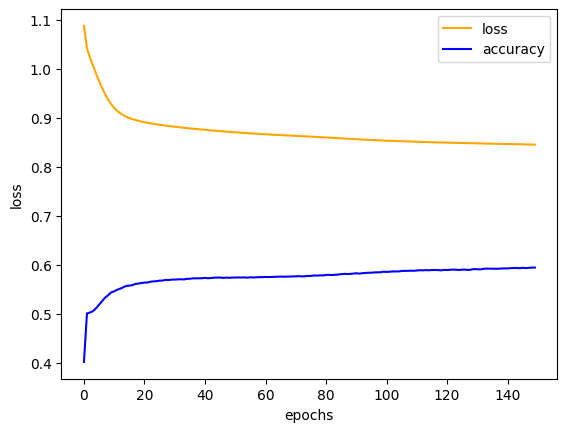

In [110]:
plot_convergion(x, cant_epochs)

2161/2161 [==============================] - 1s 571us/step


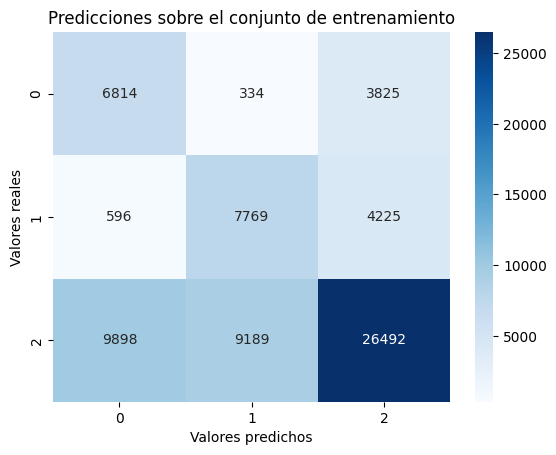

              precision    recall  f1-score   support

           0       0.39      0.62      0.48     10973
           1       0.45      0.62      0.52     12590
           2       0.77      0.58      0.66     45579

    accuracy                           0.59     69142
   macro avg       0.54      0.61      0.55     69142
weighted avg       0.65      0.59      0.61     69142

330/330 [==============================] - 0s 571us/step


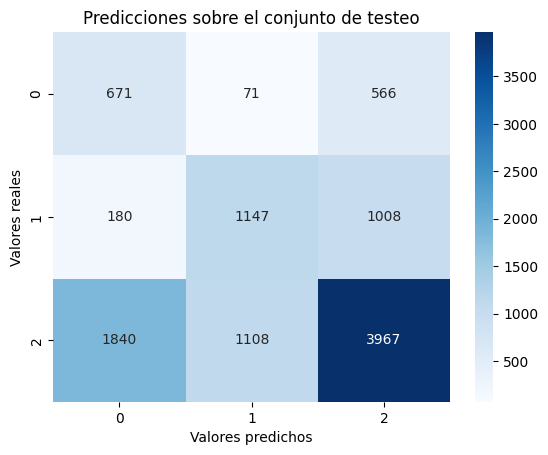

              precision    recall  f1-score   support

           0       0.25      0.51      0.34      1308
           1       0.49      0.49      0.49      2335
           2       0.72      0.57      0.64      6915

    accuracy                           0.55     10558
   macro avg       0.49      0.53      0.49     10558
weighted avg       0.61      0.55      0.57     10558



In [111]:
predicciones_clasificacion(mejor_modelo_2_capas_dse, x_train_clasificacion_scaled, x_test_clasificacion_scaled, y_train_encoded, y_test_encoded)

##### Modelo 3 capas

In [112]:
def create_model_3_layers_expanded_ds(activation1, activation2, activation3, neurons_first_layer,neurons_hidden_layer, cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas):
    modelo = keras.Sequential([
        keras.layers.Dense(neurons_first_layer, input_shape=(cantidad_de_variables_predictoras,),
                           activation= activation1),
        keras.layers.Dense(neurons_hidden_layer, activation=activation2),
        keras.layers.Dense(cantidad_de_posibles_respuestas, activation=activation3)
    ])
    
    modelo.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
      loss='categorical_crossentropy', 
        metrics = 'accuracy',
    )
    
    return modelo

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

modelo = KerasClassifier(build_fn=create_model_3_layers)

n = cantidad_de_variables_predictoras
epochs = [cant_epochs]
batches = [batch_size]
activation_layers = ['relu','tanh','sigmoid']
activation_last_layer = ['sigmoid', 'softmax']
cant_neuronas = [n, n//2, n * 2]
params = dict( 
    epochs=epochs, 
    batch_size=batches, 
    activation1 = activation_layers, 
    activation2 = activation_layers, 
    activation3 = activation_last_layer,
    neurons_hidden_layer = cant_neuronas,
    neurons_first_layer = cant_neuronas,
    cantidad_de_variables_predictoras = [cantidad_de_variables_predictoras],
    cantidad_de_posibles_respuestas = [cantidad_de_posibles_respuestas],
)

grid = RandomizedSearchCV(estimator=modelo, param_distributions=params,n_jobs=-1, cv= 5, random_state= 14, verbose=False, scoring='accuracy')
grid_result = grid.fit(x_train_clasificacion_scaled, y_train_encoded)

Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150
Epoch 1/150


/tmp/ipykernel_395371/2362136590.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo = KerasClassifier(build_fn=create_model_3_layers)


55/55 [==============================] - 1s 3ms/step - loss: 1.3264 - accuracy: 0.2592
Epoch 2/150
55/55 [==============================] - 1s 2ms/step - loss: 1.0851 - accuracy: 0.4278
Epoch 2/150
55/55 [==============================] - 1s 3ms/step - loss: 1.1013 - accuracy: 0.4113
Epoch 2/150
55/55 [==============================] - 1s 3ms/step - loss: 1.0735 - accuracy: 0.4290
Epoch 2/150
55/55 [==============================] - 1s 3ms/step - loss: 1.2694 - accuracy: 0.2509
Epoch 2/150
55/55 [==============================] - 1s 3ms/step - loss: 1.0781 - accuracy: 0.4191
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 1.0458 - accuracy: 0.4947
Epoch 3/150
Epoch 3/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9746 - accuracy: 0.5087
Epoch 3/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9930 - accuracy: 0.5079
Epoch 3/150
55/55 [==============================] - 0s 3ms/step - loss: 1.0213 - accuracy: 0.5037
Epoch 3/15

55/55 [==============================] - 0s 3ms/step - loss: 0.8945 - accuracy: 0.5663
Epoch 11/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9216 - accuracy: 0.5486
Epoch 11/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8943 - accuracy: 0.5640
Epoch 11/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8871 - accuracy: 0.5691
Epoch 11/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9055 - accuracy: 0.5571
Epoch 11/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9049 - accuracy: 0.5562
Epoch 11/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9159 - accuracy: 0.5468
Epoch 12/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8915 - accuracy: 0.5682
Epoch 12/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9151 - accuracy: 0.5508
Epoch 12/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8916 - accuracy: 0.5673
Epoch 12/150


55/55 [==============================] - 0s 3ms/step - loss: 0.8971 - accuracy: 0.5632
Epoch 21/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8674 - accuracy: 0.5765
Epoch 21/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8948 - accuracy: 0.5679
Epoch 21/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8728 - accuracy: 0.5758
Epoch 22/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8976 - accuracy: 0.5630
Epoch 23/150
Epoch 22/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8658 - accuracy: 0.5787
Epoch 22/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8937 - accuracy: 0.5676
Epoch 22/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8842 - accuracy: 0.5671
Epoch 22/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8888 - accuracy: 0.5679
Epoch 22/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8964 - accuracy: 0.5637


55/55 [==============================] - 0s 3ms/step - loss: 0.8773 - accuracy: 0.5709
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8901 - accuracy: 0.5666
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8897 - accuracy: 0.5694
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8816 - accuracy: 0.5720
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8857 - accuracy: 0.5708
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8572 - accuracy: 0.5825
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8625 - accuracy: 0.5815
Epoch 31/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8587 - accuracy: 0.5819
Epoch 32/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8892 - accuracy: 0.5678
Epoch 31/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8764 - accuracy: 0.5721
Epoch 31/150


55/55 [==============================] - 0s 3ms/step - loss: 0.8845 - accuracy: 0.5716
Epoch 40/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8510 - accuracy: 0.5850
Epoch 40/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8819 - accuracy: 0.5704
Epoch 39/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8792 - accuracy: 0.5729
Epoch 40/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8542 - accuracy: 0.5855
Epoch 41/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8749 - accuracy: 0.5744
Epoch 41/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8840 - accuracy: 0.5698
Epoch 41/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8505 - accuracy: 0.5857
Epoch 41/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8809 - accuracy: 0.5693
Epoch 40/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8508 - accuracy: 0.5864
Epoch 42/150


55/55 [==============================] - 0s 4ms/step - loss: 0.8713 - accuracy: 0.5772
Epoch 49/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8800 - accuracy: 0.5718
Epoch 49/150
Epoch 50/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8447 - accuracy: 0.5905
Epoch 51/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8741 - accuracy: 0.5755
Epoch 49/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8707 - accuracy: 0.5762
Epoch 50/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8726 - accuracy: 0.5740
Epoch 49/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8659 - accuracy: 0.5775
Epoch 50/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8442 - accuracy: 0.5904
Epoch 51/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8796 - accuracy: 0.5712
Epoch 52/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8453 - accuracy: 0.5883


55/55 [==============================] - 0s 2ms/step - loss: 0.8669 - accuracy: 0.5788
Epoch 59/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8697 - accuracy: 0.5769
Epoch 59/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8417 - accuracy: 0.5902
Epoch 59/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8411 - accuracy: 0.5938
Epoch 60/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8392 - accuracy: 0.5941
Epoch 61/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8754 - accuracy: 0.5730
Epoch 60/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8661 - accuracy: 0.5771
Epoch 58/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8617 - accuracy: 0.5808
Epoch 59/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8405 - accuracy: 0.5950
Epoch 61/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8693 - accuracy: 0.5768
Epoch 60/150


55/55 [==============================] - 0s 3ms/step - loss: 0.8627 - accuracy: 0.5783
Epoch 66/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8662 - accuracy: 0.5770
Epoch 68/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8709 - accuracy: 0.5762
Epoch 68/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8362 - accuracy: 0.5966
Epoch 69/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8636 - accuracy: 0.5805
Epoch 68/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8354 - accuracy: 0.5978
Epoch 70/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8375 - accuracy: 0.5917
Epoch 69/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8703 - accuracy: 0.5766
Epoch 69/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8581 - accuracy: 0.5803
Epoch 68/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8661 - accuracy: 0.5780
Epoch 69/150


55/55 [==============================] - 0s 3ms/step - loss: 0.8641 - accuracy: 0.5794
Epoch 78/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8626 - accuracy: 0.5783
Epoch 78/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8550 - accuracy: 0.5831
Epoch 77/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8320 - accuracy: 0.5999
Epoch 78/150
Epoch 80/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8593 - accuracy: 0.5798
Epoch 77/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8335 - accuracy: 0.5954
Epoch 79/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8623 - accuracy: 0.5795
Epoch 79/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8634 - accuracy: 0.5802
Epoch 79/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8315 - accuracy: 0.6000
Epoch 81/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8598 - accuracy: 0.5850


 1/55 [..............................] - ETA: 0s - loss: 0.8558 - accuracy: 0.5986Epoch 88/150
Epoch 90/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8302 - accuracy: 0.5969
Epoch 88/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8521 - accuracy: 0.5842
Epoch 87/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8285 - accuracy: 0.6026
Epoch 89/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8570 - accuracy: 0.5815
Epoch 87/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8592 - accuracy: 0.5809
Epoch 89/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8570 - accuracy: 0.5842
Epoch 89/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8570 - accuracy: 0.5863
Epoch 89/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8282 - accuracy: 0.6031
Epoch 91/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8520 - accuracy: 0.5838
Epoch

Epoch 99/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8570 - accuracy: 0.5816
Epoch 97/150
Epoch 95/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8501 - accuracy: 0.5856
Epoch 96/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8272 - accuracy: 0.5990
Epoch 97/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8551 - accuracy: 0.5838
Epoch 96/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8252 - accuracy: 0.6057
Epoch 100/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8526 - accuracy: 0.5859
Epoch 98/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8548 - accuracy: 0.5891
Epoch 98/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.5855
Epoch 97/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8552 - accuracy: 0.5819
Epoch 97/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8519 - acc

55/55 [==============================] - 0s 3ms/step - loss: 0.8241 - accuracy: 0.6046
Epoch 108/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8231 - accuracy: 0.6086
Epoch 106/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8543 - accuracy: 0.5833
Epoch 106/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8530 - accuracy: 0.5897
Epoch 106/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8242 - accuracy: 0.6027
Epoch 106/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8484 - accuracy: 0.5850
Epoch 105/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8495 - accuracy: 0.5866
Epoch 107/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8229 - accuracy: 0.6079
Epoch 107/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8538 - accuracy: 0.5821
Epoch 105/150
Epoch 107/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8526 - accurac

55/55 [==============================] - 0s 3ms/step - loss: 0.8471 - accuracy: 0.5858
Epoch 113/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8473 - accuracy: 0.5882
Epoch 115/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8520 - accuracy: 0.5850
Epoch 113/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8211 - accuracy: 0.6094
Epoch 115/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8514 - accuracy: 0.5890
Epoch 115/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8219 - accuracy: 0.6060
Epoch 118/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8518 - accuracy: 0.5858
Epoch 115/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8212 - accuracy: 0.6069
Epoch 116/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8208 - accuracy: 0.6098
Epoch 116/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8216 - accuracy: 0.6062
Epoc

55/55 [==============================] - 0s 3ms/step - loss: 0.8457 - accuracy: 0.5853
Epoch 122/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8199 - accuracy: 0.6065
Epoch 126/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8457 - accuracy: 0.5898
Epoch 124/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8192 - accuracy: 0.6107
Epoch 123/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8499 - accuracy: 0.5910
Epoch 124/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8499 - accuracy: 0.5874
Epoch 123/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.5870
Epoch 123/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8201 - accuracy: 0.6064
Epoch 127/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8454 - accuracy: 0.5894
Epoch 125/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8190 - accuracy: 0.6091
Epoc

55/55 [==============================] - 0s 3ms/step - loss: 0.8162 - accuracy: 0.6114
Epoch 134/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8442 - accuracy: 0.5908
Epoch 133/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8481 - accuracy: 0.5896
Epoch 132/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8487 - accuracy: 0.5914
Epoch 134/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8174 - accuracy: 0.6118
Epoch 134/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8443 - accuracy: 0.5868
Epoch 132/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8162 - accuracy: 0.6105
Epoch 135/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8184 - accuracy: 0.6073
Epoch 138/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8442 - accuracy: 0.5897
Epoch 134/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8481 - accuracy: 0.5902
Epoc

55/55 [==============================] - 0s 3ms/step - loss: 0.8164 - accuracy: 0.6082
Epoch 147/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8481 - accuracy: 0.5876
Epoch 141/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8144 - accuracy: 0.6117
Epoch 144/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8477 - accuracy: 0.5913
Epoch 144/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8430 - accuracy: 0.5888
Epoch 142/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8162 - accuracy: 0.6089
Epoch 148/150
Epoch 144/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8476 - accuracy: 0.5870
Epoch 142/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8462 - accuracy: 0.5926
Epoch 143/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8152 - accuracy: 0.6127
Epoch 145/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8140 - accurac

433/433 [==============================] - 0s 953us/step


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

433/433 [==============================] - 0s 942us/step
Epoch 1/150
Epoch 1/150
Epoch 1/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 1/150
Epoch 1/150
55/55 [==============================] - 1s 2ms/step - loss: 1.0831 - accuracy: 0.3864
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0075 - accuracy: 0.5056
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9789 - accuracy: 0.5184
Epoch 2/150
Epoch 4/150
55/55 [==============================] - 1s 3ms/step - loss: 1.0754 - accuracy: 0.4492
Epoch 2/150
55/55 [==============================] - 1s 3ms/step - loss: 1.0909 - accuracy: 0.4941
Epoch 2/150
55/55 [==============================] - 1s 3ms/step - loss: 1.0743 - accuracy: 0.4418
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9514 - accuracy: 0.5340
Epoch 5/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9651 - accuracy: 0.5247
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9667 - accuracy: 0.5224
Epoch 3/150
55/55 [==============================] - 0s 3ms/step - loss: 1.0076 - acc

55/55 [==============================] - 0s 3ms/step - loss: 0.8828 - accuracy: 0.5692
Epoch 13/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8862 - accuracy: 0.5708
Epoch 16/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8622 - accuracy: 0.5803
Epoch 12/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8682 - accuracy: 0.5754
Epoch 14/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8689 - accuracy: 0.5753
Epoch 14/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8922 - accuracy: 0.5663
Epoch 14/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8784 - accuracy: 0.5739
Epoch 14/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8690 - accuracy: 0.5795
Epoch 12/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8846 - accuracy: 0.5707
Epoch 17/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8667 - accuracy: 0.5760
Epoch 15/150


55/55 [==============================] - 0s 3ms/step - loss: 0.8534 - accuracy: 0.5865
Epoch 25/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8525 - accuracy: 0.5852
Epoch 25/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8547 - accuracy: 0.5877
Epoch 25/150
Epoch 22/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8489 - accuracy: 0.5920
Epoch 25/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8687 - accuracy: 0.5774
Epoch 28/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8522 - accuracy: 0.5871
Epoch 26/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8516 - accuracy: 0.5862
Epoch 26/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8542 - accuracy: 0.5891
Epoch 23/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8678 - accuracy: 0.5771
Epoch 26/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8677 - accuracy: 0.5783


55/55 [==============================] - 0s 3ms/step - loss: 0.8382 - accuracy: 0.5939
Epoch 34/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8461 - accuracy: 0.5912
Epoch 36/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8451 - accuracy: 0.5913
Epoch 33/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8562 - accuracy: 0.5824
Epoch 36/150
Epoch 36/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8564 - accuracy: 0.5845
Epoch 39/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8408 - accuracy: 0.5933
Epoch 37/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.5890
Epoch 37/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8375 - accuracy: 0.5947
Epoch 35/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8443 - accuracy: 0.5924
Epoch 34/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8555 - accuracy: 0.5826


55/55 [==============================] - 0s 3ms/step - loss: 0.8276 - accuracy: 0.6020
Epoch 47/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8485 - accuracy: 0.5878
Epoch 50/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8314 - accuracy: 0.5975
Epoch 45/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8486 - accuracy: 0.5903
Epoch 47/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8349 - accuracy: 0.5990
Epoch 47/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8271 - accuracy: 0.6026
Epoch 48/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8479 - accuracy: 0.5874
Epoch 51/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8307 - accuracy: 0.5980
Epoch 46/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8480 - accuracy: 0.5902
Epoch 48/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8416 - accuracy: 0.5931
Epoch 49/150


55/55 [==============================] - 0s 3ms/step - loss: 0.8439 - accuracy: 0.5954
Epoch 57/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8219 - accuracy: 0.6060
Epoch 58/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8330 - accuracy: 0.6005
Epoch 54/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8254 - accuracy: 0.6006
Epoch 56/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8436 - accuracy: 0.5905
Epoch 61/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8301 - accuracy: 0.6037
Epoch 58/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8387 - accuracy: 0.5945
Epoch 59/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8434 - accuracy: 0.5957
Epoch 58/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8227 - accuracy: 0.6056
Epoch 59/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8245 - accuracy: 0.6023
Epoch 57/150


55/55 [==============================] - 0s 3ms/step - loss: 0.8181 - accuracy: 0.6073
Epoch 69/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8199 - accuracy: 0.6050
Epoch 67/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8393 - accuracy: 0.5934
Epoch 72/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8247 - accuracy: 0.6054
Epoch 69/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8290 - accuracy: 0.6033
Epoch 65/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8353 - accuracy: 0.5948
Epoch 70/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8389 - accuracy: 0.6002
Epoch 69/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8173 - accuracy: 0.6092
Epoch 68/150
Epoch 70/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8243 - accuracy: 0.6048
Epoch 70/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8287 - accuracy: 0.6022


55/55 [==============================] - 0s 3ms/step - loss: 0.8149 - accuracy: 0.6096
Epoch 80/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8197 - accuracy: 0.6088
Epoch 80/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8332 - accuracy: 0.5952
Epoch 81/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8261 - accuracy: 0.6051
Epoch 76/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8358 - accuracy: 0.5969
Epoch 83/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8140 - accuracy: 0.6092
Epoch 79/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8145 - accuracy: 0.6098
Epoch 81/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8190 - accuracy: 0.6097
Epoch 81/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8331 - accuracy: 0.5944
Epoch 82/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8256 - accuracy: 0.6052
Epoch 84/150


55/55 [==============================] - 0s 3ms/step - loss: 0.8305 - accuracy: 0.5947
Epoch 92/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8098 - accuracy: 0.6122
Epoch 90/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8230 - accuracy: 0.6057
Epoch 87/150
Epoch 92/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8168 - accuracy: 0.6082
Epoch 92/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8321 - accuracy: 0.6003
Epoch 95/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8305 - accuracy: 0.5954
Epoch 92/150
Epoch 93/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8097 - accuracy: 0.6130
Epoch 88/150
Epoch 93/150
Epoch 91/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8123 - accuracy: 0.6114
Epoch 93/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8317 - accuracy: 0.5998
Epoch 96/150
55/55 [==============================] - 0s 3ms/

55/55 [==============================] - 0s 3ms/step - loss: 0.8114 - accuracy: 0.6121
Epoch 102/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8283 - accuracy: 0.6066
Epoch 101/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.6018
Epoch 106/150
Epoch 101/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8296 - accuracy: 0.5965
Epoch 103/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8279 - accuracy: 0.6070
Epoch 102/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8204 - accuracy: 0.6073
Epoch 98/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8105 - accuracy: 0.6125
Epoch 103/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8288 - accuracy: 0.6014
Epoch 107/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8285 - accuracy: 0.5977
Epoch 104/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8122 - accuracy

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 3ms/step - loss: 0.8100 - accuracy: 0.6129
Epoch 110/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8268 - accuracy: 0.6036
Epoch 114/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8256 - accuracy: 0.6078
Epoch 109/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8047 - accuracy: 0.6146
Epoch 109/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8270 - accuracy: 0.5969
Epoch 111/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8096 - accuracy: 0.6125
Epoch 111/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8264 - accuracy: 0.6042
Epoch 115/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8253 - accuracy: 0.6082
Epoch 110/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8046 - accuracy: 0.6156
Epoch 110/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8190 - accuracy: 0.6089
Epoc

55/55 [==============================] - 0s 3ms/step - loss: 0.8237 - accuracy: 0.6055
Epoch 124/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8261 - accuracy: 0.5983
Epoch 120/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8169 - accuracy: 0.6106
Epoch 114/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9226 - accuracy: 0.5450
Epoch 6/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8030 - accuracy: 0.6156
Epoch 119/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8068 - accuracy: 0.6135
Epoch 121/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8080 - accuracy: 0.6149
Epoch 119/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8236 - accuracy: 0.6059
Epoch 125/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8257 - accuracy: 0.5991
Epoch 121/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8171 - accuracy: 0.6116
Epoch 

55/55 [==============================] - 0s 3ms/step - loss: 0.8207 - accuracy: 0.6077
Epoch 134/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8014 - accuracy: 0.6174
Epoch 128/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8146 - accuracy: 0.6107
Epoch 124/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8048 - accuracy: 0.6151
Epoch 130/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8238 - accuracy: 0.6000
Epoch 130/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8796 - accuracy: 0.5682
Epoch 128/150
Epoch 16/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8205 - accuracy: 0.6072
Epoch 135/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8012 - accuracy: 0.6169
Epoch 129/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8145 - accuracy: 0.6113
Epoch 131/150
Epoch 125/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8

55/55 [==============================] - 0s 3ms/step - loss: 0.8039 - accuracy: 0.6153
Epoch 138/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8129 - accuracy: 0.6134
Epoch 132/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8059 - accuracy: 0.6155
Epoch 136/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8183 - accuracy: 0.6087
Epoch 143/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8206 - accuracy: 0.6026
Epoch 139/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8037 - accuracy: 0.6159
Epoch 139/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8130 - accuracy: 0.6135
Epoch 133/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7992 - accuracy: 0.6197
Epoch 138/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8188 - accuracy: 0.6080
Epoch 144/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8681 - accuracy: 0.5748
Epoc

55/55 [==============================] - 0s 3ms/step - loss: 0.7986 - accuracy: 0.6168
Epoch 145/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8181 - accuracy: 0.6049
Epoch 147/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8158 - accuracy: 0.6098
Epoch 146/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8022 - accuracy: 0.6161
Epoch 145/150
Epoch 147/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8617 - accuracy: 0.5795
Epoch 33/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7982 - accuracy: 0.6193
Epoch 146/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8185 - accuracy: 0.6054
Epoch 148/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8159 - accuracy: 0.6101
Epoch 147/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8044 - accuracy: 0.6154
Epoch 146/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8611 - accuracy

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8090 - accuracy: 0.6136
Epoch 150/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8552 - accuracy: 0.5830
Epoch 42/150
433/433 [==============================] - 1s 1ms/step
Epoch 43/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8535 - accuracy: 0.5842
Epoch 44/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8528 - accuracy: 0.5852
Epoch 45/150
172/433 [==========>...................] - ETA: 0s loss: 0.8833 - accuracy: 0.55

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 1ms/step - loss: 0.8526 - accuracy: 0.5846
Epoch 46/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8518 - accuracy: 0.5857
Epoch 47/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8511 - accuracy: 0.5866
Epoch 48/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8507 - accuracy: 0.5862
Epoch 49/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8499 - accuracy: 0.5864
Epoch 50/150
23/55 [===========>..................] - ETA: 0s - loss: 1.1037 - accuracy: 0.3439 

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.5865
Epoch 51/150
55/55 [==============================] - 1s 2ms/step - loss: 1.0739 - accuracy: 0.4112
Epoch 2/150
36/55 [==================>...........] - ETA: 0s - loss: 1.0359 - accuracy: 0.4971Epoch 52/150
Epoch 1/150
55/55 [==============================] - 0s 3ms/step - loss: 1.0367 - accuracy: 0.4960
Epoch 3/150
21/55 [==========>...................] - ETA: 0s - loss: 0.8528 - accuracy: 0.5858

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 1/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8491 - accuracy: 0.5868
Epoch 53/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0249 - accuracy: 0.4999
Epoch 4/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8479 - accuracy: 0.5878
Epoch 54/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9979 - accuracy: 0.5045
Epoch 5/150
55/55 [==============================] - 1s 3ms/step - loss: 1.0437 - accuracy: 0.5035
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8475 - accuracy: 0.5880
Epoch 55/150
55/55 [==============================] - 1s 3ms/step - loss: 1.0372 - accuracy: 0.4754
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9711 - accuracy: 0.5198
Epoch 6/150
55/55 [==============================] - 0s 3ms/step - loss: 1.0165 - accuracy: 0.5064
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8478 - accuracy: 0.5871
Epoch 5

55/55 [==============================] - 0s 3ms/step - loss: 0.8997 - accuracy: 0.5618
Epoch 15/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9057 - accuracy: 0.5567
Epoch 8/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8934 - accuracy: 0.5635
Epoch 10/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8959 - accuracy: 0.5613
Epoch 8/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8995 - accuracy: 0.5631
Epoch 12/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8438 - accuracy: 0.5898
Epoch 65/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8905 - accuracy: 0.5701
Epoch 12/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8967 - accuracy: 0.5631
Epoch 16/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8903 - accuracy: 0.5678
Epoch 11/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8915 - accuracy: 0.5651
Epoch 9/150
55/

Epoch 24/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8781 - accuracy: 0.5744
Epoch 17/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8661 - accuracy: 0.5823
Epoch 20/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8860 - accuracy: 0.5681
Epoch 21/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8403 - accuracy: 0.5929
Epoch 75/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8696 - accuracy: 0.5751
Epoch 18/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8732 - accuracy: 0.5783
Epoch 21/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8800 - accuracy: 0.5726
Epoch 25/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8858 - accuracy: 0.5692
Epoch 22/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8756 - accuracy: 0.5772
Epoch 18/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8842 - accuracy: 0.5689


55/55 [==============================] - 0s 3ms/step - loss: 0.8496 - accuracy: 0.5911
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8654 - accuracy: 0.5832
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8690 - accuracy: 0.5787
Epoch 34/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8588 - accuracy: 0.5842
Epoch 28/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8367 - accuracy: 0.5973
Epoch 85/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8567 - accuracy: 0.5840
Epoch 28/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8765 - accuracy: 0.5763
Epoch 31/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8649 - accuracy: 0.5819
Epoch 31/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8689 - accuracy: 0.5784
Epoch 35/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8485 - accuracy: 0.5917
Epoch 31/150


55/55 [==============================] - 0s 3ms/step - loss: 0.8512 - accuracy: 0.5869
Epoch 37/150
Epoch 38/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8709 - accuracy: 0.5729
Epoch 40/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8423 - accuracy: 0.5972
Epoch 39/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8696 - accuracy: 0.5773
Epoch 40/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8592 - accuracy: 0.5857
Epoch 40/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8342 - accuracy: 0.6001
Epoch 38/150
Epoch 95/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.5890
Epoch 39/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8705 - accuracy: 0.5745
Epoch 41/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8590 - accuracy: 0.5858
Epoch 41/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8423 - accu

55/55 [==============================] - 0s 3ms/step - loss: 0.8558 - accuracy: 0.5880
Epoch 52/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8377 - accuracy: 0.5999
Epoch 48/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8392 - accuracy: 0.5957
Epoch 47/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8330 - accuracy: 0.6006
Epoch 103/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8646 - accuracy: 0.5799
Epoch 49/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8550 - accuracy: 0.5875
Epoch 53/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8643 - accuracy: 0.5781
Epoch 50/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8328 - accuracy: 0.6009
Epoch 104/150
Epoch 49/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8647 - accuracy: 0.5798
Epoch 50/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8551 - accuracy: 0.586

55/55 [==============================] - 0s 2ms/step - loss: 0.8297 - accuracy: 0.6029
Epoch 113/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.5916
Epoch 62/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8322 - accuracy: 0.5998
Epoch 57/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8597 - accuracy: 0.5803
Epoch 59/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8499 - accuracy: 0.5908
Epoch 58/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8337 - accuracy: 0.6026
Epoch 58/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8393 - accuracy: 0.5967
Epoch 57/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8610 - accuracy: 0.5799
Epoch 59/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8297 - accuracy: 0.6055
Epoch 114/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8505 - accuracy: 0.5920
Epoch 63/15

55/55 [==============================] - 0s 3ms/step - loss: 0.8349 - accuracy: 0.6014
Epoch 66/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8306 - accuracy: 0.6040
Epoch 68/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8544 - accuracy: 0.5836
Epoch 69/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8467 - accuracy: 0.5944
Epoch 72/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8280 - accuracy: 0.6054
Epoch 68/150
Epoch 124/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8299 - accuracy: 0.6046
Epoch 69/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8545 - accuracy: 0.5835
Epoch 70/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.5934
Epoch 73/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8569 - accuracy: 0.5835
Epoch 70/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8268 - accuracy: 0.6040

55/55 [==============================] - 0s 3ms/step - loss: 0.8522 - accuracy: 0.5842
Epoch 77/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8420 - accuracy: 0.5934
Epoch 76/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8279 - accuracy: 0.6047
Epoch 77/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8232 - accuracy: 0.6063
Epoch 77/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8542 - accuracy: 0.5853
Epoch 78/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8264 - accuracy: 0.6076
Epoch 81/150
Epoch 133/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8513 - accuracy: 0.5850
Epoch 78/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8408 - accuracy: 0.5942
Epoch 77/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8229 - accuracy: 0.6063
Epoch 78/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8275 - accuracy: 0.6046

55/55 [==============================] - 0s 3ms/step - loss: 0.8246 - accuracy: 0.6080
Epoch 142/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8517 - accuracy: 0.5882
Epoch 87/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8401 - accuracy: 0.5999
Epoch 90/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8371 - accuracy: 0.5958
Epoch 86/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8279 - accuracy: 0.6074
Epoch 85/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8210 - accuracy: 0.6068
Epoch 87/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8255 - accuracy: 0.6071
Epoch 87/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8497 - accuracy: 0.5863
Epoch 88/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8511 - accuracy: 0.5891
Epoch 88/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8242 - accuracy: 0.6096
Epoch 143/15

55/55 [==============================] - 0s 3ms/step - loss: 0.8263 - accuracy: 0.6080
Epoch 96/150
Epoch 93/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8368 - accuracy: 0.6013
Epoch 98/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8237 - accuracy: 0.6077
Epoch 95/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8175 - accuracy: 0.6086
Epoch 96/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8332 - accuracy: 0.5986
Epoch 95/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8266 - accuracy: 0.6065
Epoch 94/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8459 - accuracy: 0.5887
Epoch 97/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8369 - accuracy: 0.6009
Epoch 99/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8236 - accuracy: 0.6073
Epoch 96/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8486 - accuracy: 0.5901


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 3ms/step - loss: 0.8289 - accuracy: 0.6007
Epoch 105/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8243 - accuracy: 0.6085
Epoch 104/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8219 - accuracy: 0.6076
Epoch 106/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8337 - accuracy: 0.6027
Epoch 109/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8434 - accuracy: 0.5895
Epoch 107/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8286 - accuracy: 0.5998
Epoch 106/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8146 - accuracy: 0.6113
Epoch 107/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8452 - accuracy: 0.5915
Epoch 107/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8216 - accuracy: 0.6092
Epoch 107/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8245 - accuracy: 0.6088
Epoc

55/55 [==============================] - 0s 3ms/step - loss: 0.8423 - accuracy: 0.5900
Epoch 118/150
Epoch 116/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8205 - accuracy: 0.6093
Epoch 116/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8436 - accuracy: 0.5934
Epoch 116/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8124 - accuracy: 0.6107
Epoch 117/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8233 - accuracy: 0.6085
Epoch 114/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8415 - accuracy: 0.5908
Epoch 117/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8202 - accuracy: 0.6085
Epoch 117/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8431 - accuracy: 0.5933
Epoch 8/150
Epoch 117/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8123 - accuracy: 0.6107
Epoch 118/150
55/55 [==============================] - 0s 3ms/step - loss: 0.82

55/55 [==============================] - 0s 4ms/step - loss: 0.8224 - accuracy: 0.6055
Epoch 123/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8104 - accuracy: 0.6115
Epoch 125/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8274 - accuracy: 0.6060
Epoch 127/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8402 - accuracy: 0.5912
Epoch 125/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8187 - accuracy: 0.6096
Epoch 125/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8419 - accuracy: 0.5934
Epoch 125/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8107 - accuracy: 0.6126
Epoch 126/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8224 - accuracy: 0.6040
Epoch 124/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8281 - accuracy: 0.6056
Epoch 128/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8409 - accuracy: 0.5961
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.8572 - accuracy: 0.5859
Epoch 26/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8197 - accuracy: 0.6055
Epoch 133/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8209 - accuracy: 0.6092
Epoch 132/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8388 - accuracy: 0.5910
Epoch 135/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8391 - accuracy: 0.5971
Epoch 135/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8086 - accuracy: 0.6120
Epoch 135/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8252 - accuracy: 0.6074
Epoch 137/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8567 - accuracy: 0.5846
Epoch 27/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8176 - accuracy: 0.6106
Epoch 135/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8210 - accuracy: 0.6094
Epoch 

55/55 [==============================] - 0s 3ms/step - loss: 0.8167 - accuracy: 0.6105
Epoch 143/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8369 - accuracy: 0.5936
Epoch 144/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8172 - accuracy: 0.6067
Epoch 142/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8489 - accuracy: 0.5875
Epoch 36/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8375 - accuracy: 0.5977
Epoch 144/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8239 - accuracy: 0.6079
Epoch 146/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8165 - accuracy: 0.6111
Epoch 142/150
Epoch 144/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8364 - accuracy: 0.5944
Epoch 145/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8171 - accuracy: 0.6055
Epoch 143/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8376 - accuracy

55/55 [==============================] - 0s 2ms/step - loss: 0.8427 - accuracy: 0.5932
Epoch 46/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8420 - accuracy: 0.5927
Epoch 47/150
343/433 [======================>.......] - ETA: 0s

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8418 - accuracy: 0.5934
Epoch 48/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8414 - accuracy: 0.5943
Epoch 49/150
321/433 [=====================>........] - ETA: 0s

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8406 - accuracy: 0.5947
Epoch 50/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8401 - accuracy: 0.5969
Epoch 51/150
33/55 [=================>............] - ETA: 0s - loss: 0.8411 - accuracy: 0.5959

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8399 - accuracy: 0.5969
Epoch 52/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.5972
Epoch 1/150
Epoch 53/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8386 - accuracy: 0.5966
Epoch 54/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8383 - accuracy: 0.5966
Epoch 55/150
55/55 [==============================] - 1s 2ms/step - loss: 1.1129 - accuracy: 0.4090
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8377 - accuracy: 0.5964
Epoch 56/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0082 - accuracy: 0.4913
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8373 - accuracy: 0.5968
Epoch 57/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9611 - accuracy: 0.5278
Epoch 4/150
55/55 [==============================] - 1s 2ms/step - loss: 1.1056 - accuracy: 0.3849
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 1.0454 - accuracy: 0.4780
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 1.1201 - accuracy: 0.3123
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8373 - accuracy: 0.5961
Epoch 59/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9188 - accuracy: 0.5509
Epoch 6/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0273 - accuracy: 0.4977
Epoch 4/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0546 - accuracy: 0.4613
Epoch 4/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8363 - accuracy: 0.5983
Epoch 60/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9102 - accuracy: 0.5567
Epoch 7/150
55/55 [==============================] - 1s 2ms/step - loss: 1.0833 - accuracy: 0.4979
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 1.0184 - accuracy: 0.5002
Epoch 5/150
55/55 [=

55/55 [==============================] - 0s 2ms/step - loss: 0.9375 - accuracy: 0.5187
Epoch 10/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8965 - accuracy: 0.5634
Epoch 17/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8715 - accuracy: 0.5771
Epoch 20/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8316 - accuracy: 0.6020
Epoch 73/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8979 - accuracy: 0.5639
Epoch 17/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.5697
Epoch 15/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9282 - accuracy: 0.5209
Epoch 11/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8941 - accuracy: 0.5653
Epoch 21/150
Epoch 18/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8309 - accuracy: 0.6029
Epoch 74/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8955 - accuracy: 0.5686


55/55 [==============================] - 0s 2ms/step - loss: 0.8764 - accuracy: 0.5778
Epoch 23/150
Epoch 30/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8277 - accuracy: 0.6045
Epoch 86/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8650 - accuracy: 0.5788
Epoch 28/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.5869
Epoch 34/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8757 - accuracy: 0.5783
Epoch 31/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8835 - accuracy: 0.5710
Epoch 24/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8276 - accuracy: 0.6038
Epoch 87/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8637 - accuracy: 0.5783
Epoch 29/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8726 - accuracy: 0.5750
Epoch 35/150
Epoch 32/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8744 - accu

55/55 [==============================] - 0s 2ms/step - loss: 0.8648 - accuracy: 0.5773
Epoch 44/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8430 - accuracy: 0.5919
Epoch 47/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8643 - accuracy: 0.5779
Epoch 44/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8549 - accuracy: 0.5831
Epoch 42/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8647 - accuracy: 0.5786
Epoch 37/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8245 - accuracy: 0.6057
Epoch 100/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8427 - accuracy: 0.5917
Epoch 48/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8634 - accuracy: 0.5777
Epoch 45/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8547 - accuracy: 0.5836
Epoch 43/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8420 - accuracy: 0.5923
Epoch 49/150

55/55 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.5861
Epoch 55/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8534 - accuracy: 0.5858
Epoch 50/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8225 - accuracy: 0.6073
Epoch 58/150
Epoch 113/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8584 - accuracy: 0.5805
Epoch 61/150
Epoch 58/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8500 - accuracy: 0.5857
Epoch 56/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8218 - accuracy: 0.6071
Epoch 114/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8565 - accuracy: 0.5795
Epoch 59/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8579 - accuracy: 0.5802
Epoch 62/150
Epoch 59/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.5863
Epoch 57/150
55/55 [==============================] - 0s 2ms/step - loss

55/55 [==============================] - 0s 2ms/step - loss: 0.8316 - accuracy: 0.5994
Epoch 74/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8195 - accuracy: 0.6081
Epoch 126/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5897
Epoch 63/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8533 - accuracy: 0.5811
Epoch 72/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8304 - accuracy: 0.6005
Epoch 75/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.6087
Epoch 127/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8535 - accuracy: 0.5836
Epoch 72/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5907
Epoch 64/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8530 - accuracy: 0.5814
Epoch 73/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8308 - accuracy: 0.6020
Epoch 76/15

55/55 [==============================] - 0s 2ms/step - loss: 0.8512 - accuracy: 0.5829
Epoch 85/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8267 - accuracy: 0.6040
Epoch 88/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8162 - accuracy: 0.6107
Epoch 140/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8432 - accuracy: 0.5918
Epoch 85/150
Epoch 82/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8439 - accuracy: 0.5917
Epoch 77/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.5823
Epoch 86/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8164 - accuracy: 0.6114
Epoch 141/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8429 - accuracy: 0.5914
Epoch 83/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8502 - accuracy: 0.5855
Epoch 86/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8438 - accuracy: 0.592

55/55 [==============================] - 0s 2ms/step - loss: 0.8414 - accuracy: 0.5934
Epoch 90/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8237 - accuracy: 0.6049
Epoch 101/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8495 - accuracy: 0.5828
Epoch 99/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8470 - accuracy: 0.5895
Epoch 99/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8405 - accuracy: 0.5932
Epoch 96/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8412 - accuracy: 0.5932
Epoch 91/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8232 - accuracy: 0.6048
Epoch 102/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.5814
Epoch 100/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8469 - accuracy: 0.5896
Epoch 100/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8403 - accuracy: 0.5938
Epoch 97/

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8395 - accuracy: 0.5942
Epoch 101/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8460 - accuracy: 0.5890
Epoch 104/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8227 - accuracy: 0.6053
Epoch 107/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8492 - accuracy: 0.5831
Epoch 105/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.5947
Epoch 102/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8459 - accuracy: 0.5911
Epoch 105/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8491 - accuracy: 0.5824
Epoch 106/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8403 - accuracy: 0.5934
Epoch 97/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.5948
Epoch 103/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8222 - accuracy: 0.6061
Epoch

55/55 [==============================] - 0s 2ms/step - loss: 0.9164 - accuracy: 0.5472
Epoch 10/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8378 - accuracy: 0.5954
Epoch 115/150
Epoch 121/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8476 - accuracy: 0.5834
Epoch 119/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8434 - accuracy: 0.5926
Epoch 118/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8387 - accuracy: 0.5940
Epoch 110/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9114 - accuracy: 0.5494
Epoch 11/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8376 - accuracy: 0.5964
Epoch 116/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8207 - accuracy: 0.6055
Epoch 122/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8476 - accuracy: 0.5835
Epoch 120/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8432 - accuracy:

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8872 - accuracy: 0.5701
Epoch 21/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8367 - accuracy: 0.5960
Epoch 127/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8188 - accuracy: 0.6072
Epoch 133/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8373 - accuracy: 0.5946
Epoch 122/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8466 - accuracy: 0.5845
Epoch 131/150
22/55 [===========>..................] - ETA: 0s - loss: 0.8831 - accuracy: 0.5717

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8362 - accuracy: 0.5970
Epoch 128/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8410 - accuracy: 0.5937
Epoch 131/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8839 - accuracy: 0.5733
Epoch 23/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8373 - accuracy: 0.5955
Epoch 132/150
Epoch 123/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8362 - accuracy: 0.5968
Epoch 129/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8189 - accuracy: 0.6072
Epoch 135/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8372 - accuracy: 0.5951
Epoch 124/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8409 - accuracy: 0.5929
Epoch 132/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8362 - accuracy: 0.5971
Epoch 130/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8462 - accuracy

55/55 [==============================] - 0s 3ms/step - loss: 0.8366 - accuracy: 0.5951
Epoch 133/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8455 - accuracy: 0.5866
Epoch 142/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8356 - accuracy: 0.5976
Epoch 138/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8713 - accuracy: 0.5765
Epoch 33/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8920 - accuracy: 0.5687
Epoch 8/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9032 - accuracy: 0.5592
Epoch 6/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8364 - accuracy: 0.5952
Epoch 134/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8355 - accuracy: 0.5976
Epoch 139/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8704 - accuracy: 0.5761
Epoch 34/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8883 - accuracy: 0.5699
Epoch 9/15

55/55 [==============================] - 0s 3ms/step - loss: 0.8673 - accuracy: 0.5788
Epoch 18/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8350 - accuracy: 0.5980
Epoch 149/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8726 - accuracy: 0.5747
Epoch 16/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8358 - accuracy: 0.5953
Epoch 144/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8711 - accuracy: 0.5759
Epoch 17/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8651 - accuracy: 0.5790
Epoch 19/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8357 - accuracy: 0.5950
Epoch 145/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8615 - accuracy: 0.5790
Epoch 46/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8699 - accuracy: 0.5758
Epoch 18/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8359 - accuracy: 0.5958
Epoch 146/

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8631 - accuracy: 0.5793
Epoch 51/150
Epoch 23/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8585 - accuracy: 0.5823
Epoch 25/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8618 - accuracy: 0.5809
Epoch 24/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8585 - accuracy: 0.5785
Epoch 52/150
24/55 [============>.................] - ETA: 0s - loss: 0.8599 - accuracy: 0.5781

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8582 - accuracy: 0.5799
Epoch 53/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8605 - accuracy: 0.5822
Epoch 25/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8569 - accuracy: 0.5832
Epoch 27/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8579 - accuracy: 0.5799
Epoch 54/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8592 - accuracy: 0.5823
Epoch 26/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8553 - accuracy: 0.5851
Epoch 28/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8576 - accuracy: 0.5787
Epoch 55/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8583 - accuracy: 0.5838
Epoch 27/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8550 - accuracy: 0.5850
Epoch 29/150
42/55 [=====================>........] - ETA: 0s - loss: 0.8571 - accuracy: 0.5796

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 3ms/step - loss: 0.8572 - accuracy: 0.5789
Epoch 56/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8538 - accuracy: 0.5848
Epoch 30/150
55/55 [==============================] - 1s 2ms/step - loss: 1.0379 - accuracy: 0.4690
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8556 - accuracy: 0.5840
Epoch 29/150
 1/55 [..............................] - ETA: 0s - loss: 0.8359 - accuracy: 0.5918

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 3ms/step - loss: 0.8567 - accuracy: 0.5791
Epoch 57/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8530 - accuracy: 0.5853
Epoch 31/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.5850
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8565 - accuracy: 0.5784
Epoch 58/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9579 - accuracy: 0.5253
Epoch 3/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8529 - accuracy: 0.5864
Epoch 32/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8533 - accuracy: 0.5849
Epoch 31/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8561 - accuracy: 0.5796
Epoch 59/150
55/55 [==============================] - 1s 4ms/step - loss: 1.3485 - accuracy: 0.2759
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8515 - accuracy: 0.5863
Epoch 33/150
55

55/55 [==============================] - 0s 3ms/step - loss: 0.8737 - accuracy: 0.5737
Epoch 8/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8749 - accuracy: 0.5737
Epoch 14/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8653 - accuracy: 0.5798
Epoch 10/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8528 - accuracy: 0.5817
Epoch 70/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8425 - accuracy: 0.5922
Epoch 42/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8755 - accuracy: 0.5720
Epoch 12/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8428 - accuracy: 0.5942
Epoch 43/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8686 - accuracy: 0.5762
Epoch 11/150
Epoch 9/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8730 - accuracy: 0.5754
Epoch 15/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8530 - accuracy: 0.5820
Ep

55/55 [==============================] - 0s 3ms/step - loss: 0.8420 - accuracy: 0.5960
Epoch 20/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8502 - accuracy: 0.5842
Epoch 80/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8441 - accuracy: 0.5935
Epoch 18/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8562 - accuracy: 0.5863
Epoch 24/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8365 - accuracy: 0.5966
Epoch 21/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8684 - accuracy: 0.5791
Epoch 22/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8409 - accuracy: 0.5960
Epoch 21/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8502 - accuracy: 0.5838
Epoch 81/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8425 - accuracy: 0.5948
Epoch 19/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8551 - accuracy: 0.5852
Epoch 25/150


55/55 [==============================] - 0s 4ms/step - loss: 0.8325 - accuracy: 0.6023
Epoch 27/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8329 - accuracy: 0.6031
Epoch 30/150
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8484 - accuracy: 0.5848
Epoch 90/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8466 - accuracy: 0.5914
Epoch 33/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8289 - accuracy: 0.6047
Epoch 31/150
Epoch 61/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8309 - accuracy: 0.6022
Epoch 28/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8495 - accuracy: 0.5886
Epoch 31/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8302 - accuracy: 0.6025
Epoch 61/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8455 - accuracy: 0.5931
Epoch 34/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8480 - accu

55/55 [==============================] - 0s 3ms/step - loss: 0.8416 - accuracy: 0.5940
Epoch 39/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8258 - accuracy: 0.6074
Epoch 69/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8233 - accuracy: 0.6077
Epoch 36/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8462 - accuracy: 0.5882
Epoch 100/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8243 - accuracy: 0.6071
Epoch 70/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8407 - accuracy: 0.5940
Epoch 40/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8228 - accuracy: 0.6088
Epoch 70/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8381 - accuracy: 0.5972
Epoch 43/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8459 - accuracy: 0.5883
Epoch 101/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8479 - accuracy: 0.5883
Epoch 41/15

55/55 [==============================] - 0s 3ms/step - loss: 0.8222 - accuracy: 0.6078
Epoch 78/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8318 - accuracy: 0.6018
Epoch 51/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8237 - accuracy: 0.6069
Epoch 49/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8164 - accuracy: 0.6117
Epoch 46/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8332 - accuracy: 0.5994
Epoch 49/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8211 - accuracy: 0.6080
Epoch 79/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8432 - accuracy: 0.5910
Epoch 49/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8443 - accuracy: 0.5886
Epoch 110/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8325 - accuracy: 0.6000
Epoch 50/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8218 - accuracy: 0.6091
Epoch 50/150

Epoch 58/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8186 - accuracy: 0.6103
Epoch 59/150
Epoch 88/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8425 - accuracy: 0.5902
Epoch 120/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8110 - accuracy: 0.6143
Epoch 56/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8253 - accuracy: 0.6040
Epoch 60/150
Epoch 89/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8425 - accuracy: 0.5894
Epoch 121/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8191 - accuracy: 0.6105
Epoch 89/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8257 - accuracy: 0.6064
Epoch 62/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8198 - accuracy: 0.6091
Epoch 60/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8375 - accuracy: 0.5965
Epoch 60/150
55/55 [==============================] - 0s 3ms/step - loss

55/55 [==============================] - 0s 3ms/step - loss: 0.8410 - accuracy: 0.5908
Epoch 130/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8171 - accuracy: 0.6097
Epoch 97/150
Epoch 68/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8217 - accuracy: 0.6082
Epoch 71/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8336 - accuracy: 0.5993
Epoch 68/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8408 - accuracy: 0.5904
Epoch 131/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8076 - accuracy: 0.6145
Epoch 66/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8150 - accuracy: 0.6121
Epoch 98/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8174 - accuracy: 0.6102
Epoch 69/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8210 - accuracy: 0.6092
Epoch 72/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8332 - accuracy: 0.599

55/55 [==============================] - 0s 3ms/step - loss: 0.8152 - accuracy: 0.6124
Epoch 76/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8050 - accuracy: 0.6157
Epoch 73/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8185 - accuracy: 0.6108
Epoch 79/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8126 - accuracy: 0.6136
Epoch 105/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8401 - accuracy: 0.5918
Epoch 139/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8179 - accuracy: 0.6096
Epoch 77/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8309 - accuracy: 0.6012
Epoch 76/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8126 - accuracy: 0.6131
Epoch 106/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8397 - accuracy: 0.5916
Epoch 140/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8050 - accuracy: 0.6166
Epoch 74/

55/55 [==============================] - 0s 3ms/step - loss: 0.8038 - accuracy: 0.6179
Epoch 81/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8387 - accuracy: 0.5927
Epoch 148/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8102 - accuracy: 0.6142
Epoch 113/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8265 - accuracy: 0.6051
Epoch 84/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8122 - accuracy: 0.6131
Epoch 85/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8155 - accuracy: 0.6110
Epoch 88/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8107 - accuracy: 0.6137
Epoch 114/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8033 - accuracy: 0.6178
Epoch 82/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8388 - accuracy: 0.5926
Epoch 149/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8138 - accuracy: 0.6127
Epoch 86/

55/55 [==============================] - 0s 3ms/step - loss: 0.8084 - accuracy: 0.6149
Epoch 122/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8007 - accuracy: 0.6202
Epoch 91/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8124 - accuracy: 0.6133
Epoch 97/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8226 - accuracy: 0.6086
Epoch 94/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8070 - accuracy: 0.6170
Epoch 123/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8098 - accuracy: 0.6141
Epoch 95/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8106 - accuracy: 0.6134
Epoch 95/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8008 - accuracy: 0.6181
Epoch 123/150
Epoch 92/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8123 - accuracy: 0.6138
Epoch 98/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8217 - accuracy: 0.60

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 3ms/step - loss: 0.8219 - accuracy: 0.6075
Epoch 96/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8093 - accuracy: 0.6156
Epoch 97/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8104 - accuracy: 0.6135
Epoch 97/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8079 - accuracy: 0.6156
Epoch 125/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8122 - accuracy: 0.6138
Epoch 100/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8210 - accuracy: 0.6078
Epoch 97/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8090 - accuracy: 0.6145
Epoch 98/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8078 - accuracy: 0.6154
Epoch 126/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8114 - accuracy: 0.6142
Epoch 101/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8205 - accuracy: 0.6095
Epoch 98/

55/55 [==============================] - 0s 3ms/step - loss: 0.8956 - accuracy: 0.5591
Epoch 6/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8068 - accuracy: 0.6161
Epoch 134/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8067 - accuracy: 0.6157
Epoch 107/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8175 - accuracy: 0.6099
Epoch 107/150
Epoch 106/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7982 - accuracy: 0.6196
Epoch 104/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8054 - accuracy: 0.6148
Epoch 135/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8856 - accuracy: 0.5663
Epoch 7/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8090 - accuracy: 0.6158
Epoch 110/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8064 - accuracy: 0.6172
Epoch 108/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8068 - accuracy: 0

55/55 [==============================] - 0s 3ms/step - loss: 0.8072 - accuracy: 0.6165
Epoch 118/150
55/55 [==============================] - 0s 4ms/step - loss: 0.7971 - accuracy: 0.6203
Epoch 113/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8045 - accuracy: 0.6157
Epoch 116/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8457 - accuracy: 0.5914
Epoch 16/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8035 - accuracy: 0.6166
Epoch 144/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8039 - accuracy: 0.6177
Epoch 117/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7972 - accuracy: 0.6207
Epoch 114/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8052 - accuracy: 0.6160
Epoch 117/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8137 - accuracy: 0.6118
Epoch 116/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8040 - accuracy: 0.6154
Epoch

55/55 [==============================] - 0s 3ms/step - loss: 0.8056 - accuracy: 0.6173
Epoch 126/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8113 - accuracy: 0.6135
Epoch 123/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8023 - accuracy: 0.6180
Epoch 124/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8344 - accuracy: 0.6012
Epoch 24/150
55/55 [==============================] - 0s 4ms/step - loss: 0.7954 - accuracy: 0.6217
Epoch 122/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8018 - accuracy: 0.6193
Epoch 126/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8021 - accuracy: 0.6185
Epoch 125/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8114 - accuracy: 0.6124
Epoch 124/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8332 - accuracy: 0.6007
Epoch 25/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7954 - accuracy: 0.6221
Epoch 

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 1/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8002 - accuracy: 0.6172
Epoch 133/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8035 - accuracy: 0.6173
Epoch 136/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8251 - accuracy: 0.6056
Epoch 34/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7994 - accuracy: 0.6209
Epoch 135/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7996 - accuracy: 0.6190
Epoch 134/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7943 - accuracy: 0.6210
Epoch 132/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8081 - accuracy: 0.6137
Epoch 133/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8035 - accuracy: 0.6180
Epoch 137/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8247 - accuracy: 0.6066
Epoch 35/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8000 - accuracy: 0

55/55 [==============================] - 0s 3ms/step - loss: 0.8784 - accuracy: 0.5682
Epoch 7/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7982 - accuracy: 0.6210
Epoch 145/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8191 - accuracy: 0.6111
Epoch 45/150
55/55 [==============================] - 0s 4ms/step - loss: 0.7970 - accuracy: 0.6196
Epoch 144/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8016 - accuracy: 0.6201
Epoch 147/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8704 - accuracy: 0.5750
Epoch 8/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7933 - accuracy: 0.6217
Epoch 143/150
55/55 [==============================] - 0s 4ms/step - loss: 0.7980 - accuracy: 0.6229
Epoch 146/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8773 - accuracy: 0.5729
Epoch 8/150
55/55 [==============================] - 0s 4ms/step - loss: 0.8057 - accuracy: 0.6148
Epoch 144/1

55/55 [==============================] - 0s 2ms/step - loss: 0.8382 - accuracy: 0.5978
Epoch 19/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8141 - accuracy: 0.6139
Epoch 57/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8505 - accuracy: 0.5906
Epoch 19/150
433/433 [==============================] - 1s 1ms/step
Epoch 20/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8494 - accuracy: 0.5917
Epoch 20/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8353 - accuracy: 0.5991
Epoch 21/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.5923
Epoch 21/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.5993
Epoch 22/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8134 - accuracy: 0.6122
Epoch 60/150
32/55 [================>.............] - ETA: 0s - loss: 0.8324 - accuracy: 0.6024Epoch 1/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8326 - accuracy: 0.6001
Epoch 23/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5915
Epoch 22/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8134 - accuracy: 0.6136
Epoch 61/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8307 - accuracy: 0.6015
Epoch 24/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8467 - accuracy: 0.5952
Epoch 23/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8130 - accuracy: 0.6135
Epoch 62/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8297 - accuracy: 0.6004
Epoch 25/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8455 - accuracy: 0.5949
Epoch 24/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8130 - accuracy: 0.6138
Epoch 63/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8288 - accuracy: 0.6029
Epoch 26/150


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8433 - accuracy: 0.5960
Epoch 28/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8115 - accuracy: 0.6135
Epoch 67/150
55/55 [==============================] - 1s 2ms/step - loss: 1.0912 - accuracy: 0.3768
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8414 - accuracy: 0.5979
Epoch 29/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8252 - accuracy: 0.6028
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 1.0383 - accuracy: 0.4956
Epoch 3/150
55/55 [==============================] - 1s 2ms/step - loss: 1.0518 - accuracy: 0.4633
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8409 - accuracy: 0.5981
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8114 - accuracy: 0.6136
Epoch 69/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8249 - accuracy: 0.6025
Epoch 31/150
55/

55/55 [==============================] - 0s 3ms/step - loss: 0.9987 - accuracy: 0.5154
Epoch 5/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8085 - accuracy: 0.6149
Epoch 80/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9060 - accuracy: 0.5593
Epoch 15/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9374 - accuracy: 0.5299
Epoch 9/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8992 - accuracy: 0.5609
Epoch 14/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8332 - accuracy: 0.6013
Epoch 42/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9869 - accuracy: 0.5212
Epoch 81/150
Epoch 6/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8156 - accuracy: 0.6071
Epoch 16/150
Epoch 43/150
55/55 [==============================] - 0s 3ms/step - loss: 0.9279 - accuracy: 0.5379
Epoch 10/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8970 - accurac

55/55 [==============================] - 0s 3ms/step - loss: 0.9029 - accuracy: 0.5484
Epoch 16/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8074 - accuracy: 0.6163
Epoch 91/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8113 - accuracy: 0.6102
Epoch 53/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8945 - accuracy: 0.5641
Epoch 25/150
Epoch 20/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8261 - accuracy: 0.6059
Epoch 53/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8998 - accuracy: 0.5517
Epoch 17/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8078 - accuracy: 0.6156
Epoch 92/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8886 - accuracy: 0.5679
Epoch 27/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8112 - accuracy: 0.6111
Epoch 54/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8929 - accuracy: 0.5652


55/55 [==============================] - 0s 3ms/step - loss: 0.8824 - accuracy: 0.5714
Epoch 37/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8052 - accuracy: 0.6173
Epoch 102/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8819 - accuracy: 0.5706
Epoch 27/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8801 - accuracy: 0.5724
Epoch 31/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8718 - accuracy: 0.5765
Epoch 36/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8075 - accuracy: 0.6122
Epoch 64/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8051 - accuracy: 0.6166
Epoch 38/150
Epoch 103/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8790 - accuracy: 0.5727
Epoch 32/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8709 - accuracy: 0.5760
Epoch 37/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8071 - accuracy: 0.612

55/55 [==============================] - 0s 3ms/step - loss: 0.8143 - accuracy: 0.6105
Epoch 74/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8687 - accuracy: 0.5774
Epoch 42/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8046 - accuracy: 0.6178
Epoch 113/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8699 - accuracy: 0.5772
Epoch 38/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8048 - accuracy: 0.6128
Epoch 75/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8772 - accuracy: 0.5737
Epoch 48/150
Epoch 49/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8134 - accuracy: 0.6109
Epoch 75/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8678 - accuracy: 0.5786
Epoch 43/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8049 - accuracy: 0.6169
Epoch 114/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8041 - accuracy: 0.613

55/55 [==============================] - 0s 3ms/step - loss: 0.8100 - accuracy: 0.6115
Epoch 85/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8024 - accuracy: 0.6179
Epoch 124/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8594 - accuracy: 0.5804
Epoch 50/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8726 - accuracy: 0.5742
Epoch 60/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8604 - accuracy: 0.5820
Epoch 53/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8020 - accuracy: 0.6128
Epoch 86/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8096 - accuracy: 0.6106
Epoch 86/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8609 - accuracy: 0.5821
Epoch 60/150
Epoch 125/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8587 - accuracy: 0.5801
Epoch 51/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8716 - accuracy: 0.575

55/55 [==============================] - 0s 3ms/step - loss: 0.8537 - accuracy: 0.5812
Epoch 61/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8551 - accuracy: 0.5855
Epoch 64/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8579 - accuracy: 0.5842
Epoch 70/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8671 - accuracy: 0.5779
Epoch 71/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8001 - accuracy: 0.6149
Epoch 97/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8063 - accuracy: 0.6133
Epoch 97/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8531 - accuracy: 0.5821
Epoch 62/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8008 - accuracy: 0.6186
Epoch 136/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8575 - accuracy: 0.5839
Epoch 65/150
Epoch 71/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8009 - accuracy: 0.6151

55/55 [==============================] - 0s 3ms/step - loss: 0.8503 - accuracy: 0.5837
Epoch 72/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8554 - accuracy: 0.5851
Epoch 81/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8040 - accuracy: 0.6145
Epoch 107/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8523 - accuracy: 0.5871
Epoch 75/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7991 - accuracy: 0.6153
Epoch 108/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8623 - accuracy: 0.5786
Epoch 83/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8496 - accuracy: 0.5836
Epoch 73/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.5881
Epoch 76/150
Epoch 108/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8550 - accuracy: 0.5851
Epoch 82/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8001 - accuracy: 0.61

55/55 [==============================] - 0s 2ms/step - loss: 0.8527 - accuracy: 0.5861
Epoch 119/150
Epoch 93/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.5894
Epoch 87/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8589 - accuracy: 0.5815
Epoch 95/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.6145
Epoch 119/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8478 - accuracy: 0.5846
Epoch 85/150
55/55 [==============================] - 0s 2ms/step - loss: 0.7981 - accuracy: 0.6188
Epoch 120/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8525 - accuracy: 0.5866
Epoch 94/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.5890
Epoch 88/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8589 - accuracy: 0.5811
Epoch 96/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8019 - accuracy: 0.61

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8567 - accuracy: 0.5826
Epoch 107/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.5862
Epoch 97/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8504 - accuracy: 0.5879
Epoch 106/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8477 - accuracy: 0.5911
Epoch 100/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8565 - accuracy: 0.5833
Epoch 132/150
Epoch 108/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8018 - accuracy: 0.6165
Epoch 131/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8456 - accuracy: 0.5841
Epoch 98/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8501 - accuracy: 0.5873
Epoch 107/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8475 - accuracy: 0.5921
Epoch 101/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7952 - accuracy:

55/55 [==============================] - 0s 3ms/step - loss: 0.8439 - accuracy: 0.5874
Epoch 108/150
55/55 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.6192
Epoch 142/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8493 - accuracy: 0.5891
Epoch 7/150
Epoch 117/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7993 - accuracy: 0.6159
Epoch 141/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8463 - accuracy: 0.5932
Epoch 112/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8435 - accuracy: 0.5870
Epoch 109/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9239 - accuracy: 0.5427
Epoch 8/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8485 - accuracy: 0.5885
Epoch 118/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7941 - accuracy: 0.6198
Epoch 143/150
55/55 [==============================] - 0s 3ms/step - loss: 0.7992 - accuracy: 0

55/55 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.5845
Epoch 130/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.5947
Epoch 123/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8421 - accuracy: 0.5897
Epoch 120/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8859 - accuracy: 0.5678
Epoch 19/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8466 - accuracy: 0.5905
Epoch 129/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8527 - accuracy: 0.5849
Epoch 131/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.5942
Epoch 124/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8419 - accuracy: 0.5896
Epoch 121/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8840 - accuracy: 0.5688
Epoch 20/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8472 - accuracy: 0.5899
Epoch 

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 3ms/step - loss: 0.8795 - accuracy: 0.5723
Epoch 23/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8417 - accuracy: 0.5901
Epoch 124/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.5952
Epoch 128/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8515 - accuracy: 0.5856
Epoch 135/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8780 - accuracy: 0.5726
Epoch 125/150
Epoch 24/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8460 - accuracy: 0.5896
Epoch 134/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8445 - accuracy: 0.5957
Epoch 129/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8512 - accuracy: 0.5845
Epoch 136/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8769 - accuracy: 0.5736
Epoch 25/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8461 - accuracy: 

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.5856
Epoch 141/150
55/55 [==============================] - 1s 2ms/step - loss: 1.3005 - accuracy: 0.2634
Epoch 30/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8441 - accuracy: 0.5961
Epoch 134/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8404 - accuracy: 0.5916
Epoch 131/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8448 - accuracy: 0.5916
Epoch 142/150
55/55 [==============================] - 0s 3ms/step - loss: 1.1261 - accuracy: 0.3957
Epoch 3/150
Epoch 141/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8703 - accuracy: 0.5761
Epoch 31/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8438 - accuracy: 0.5962
Epoch 135/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8404 - accuracy: 0.5913
Epoch 132/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8451 - accuracy: 0

55/55 [==============================] - 0s 2ms/step - loss: 0.8913 - accuracy: 0.5712
Epoch 15/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8421 - accuracy: 0.5967
Epoch 147/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9096 - accuracy: 0.5626
Epoch 10/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8389 - accuracy: 0.5936
Epoch 144/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8622 - accuracy: 0.5789
Epoch 44/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8888 - accuracy: 0.5718
Epoch 16/150
55/55 [==============================] - 0s 2ms/step - loss: 0.9045 - accuracy: 0.5643
Epoch 11/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8388 - accuracy: 0.5937
Epoch 145/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8619 - accuracy: 0.5795
Epoch 45/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8388 - accuracy: 0.5943
Epoch 12/1

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8774 - accuracy: 0.5780
Epoch 21/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8704 - accuracy: 0.5815
Epoch 26/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8585 - accuracy: 0.5807
Epoch 55/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8754 - accuracy: 0.5788
Epoch 22/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8581 - accuracy: 0.5819
Epoch 27/150
Epoch 56/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8733 - accuracy: 0.5793
Epoch 23/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8674 - accuracy: 0.5841
Epoch 28/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8714 - accuracy: 0.5792
Epoch 24/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8578 - accuracy: 0.5815
Epoch 58/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8662 - accuracy: 0.5834


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8572 - accuracy: 0.5811
Epoch 59/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8695 - accuracy: 0.5824
Epoch 25/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8648 - accuracy: 0.5853
Epoch 30/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8571 - accuracy: 0.5810
Epoch 60/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8639 - accuracy: 0.5857
Epoch 31/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8568 - accuracy: 0.5816
Epoch 61/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8659 - accuracy: 0.5829
Epoch 27/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8622 - accuracy: 0.5862
Epoch 32/150
55/55 [==============================] - 1s 2ms/step - loss: 1.1057 - accuracy: 0.3462
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8647 - accuracy: 0.5834
Epoch 62/150
E

55/55 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.5925
Epoch 45/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.5821
Epoch 75/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8944 - accuracy: 0.5660
Epoch 10/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8892 - accuracy: 0.5696
Epoch 11/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8491 - accuracy: 0.5901
Epoch 41/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8467 - accuracy: 0.5942
Epoch 15/150
Epoch 46/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8539 - accuracy: 0.5829
Epoch 76/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8911 - accuracy: 0.5696
Epoch 11/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8482 - accuracy: 0.5916
Epoch 42/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8824 - accuracy: 0.5744


55/55 [==============================] - 0s 2ms/step - loss: 0.8631 - accuracy: 0.5844
Epoch 27/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8363 - accuracy: 0.5983
Epoch 58/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8522 - accuracy: 0.5845
Epoch 89/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8635 - accuracy: 0.5820
Epoch 23/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8612 - accuracy: 0.5827
Epoch 24/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8519 - accuracy: 0.5853
Epoch 90/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.5980
Epoch 55/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8618 - accuracy: 0.5815
Epoch 24/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8597 - accuracy: 0.5842
Epoch 60/150
Epoch 29/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8595 - accuracy: 0.5828


55/55 [==============================] - 0s 2ms/step - loss: 0.8339 - accuracy: 0.6011
Epoch 35/150
Epoch 66/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.5850
Epoch 102/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8500 - accuracy: 0.5860
Epoch 35/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8294 - accuracy: 0.6046
Epoch 71/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8465 - accuracy: 0.5898
Epoch 67/150
Epoch 36/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8505 - accuracy: 0.5842
Epoch 103/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8486 - accuracy: 0.5859
Epoch 36/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8289 - accuracy: 0.6047
Epoch 72/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8332 - accuracy: 0.6006
Epoch 68/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8502 - ac

55/55 [==============================] - 0s 2ms/step - loss: 0.8410 - accuracy: 0.5959
Epoch 52/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8413 - accuracy: 0.5928
Epoch 47/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8364 - accuracy: 0.5953
Epoch 48/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8490 - accuracy: 0.5856
Epoch 116/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8408 - accuracy: 0.5970
Epoch 53/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8408 - accuracy: 0.5932
Epoch 48/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8284 - accuracy: 0.6049
Epoch 80/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8361 - accuracy: 0.5969
Epoch 49/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8489 - accuracy: 0.5854
Epoch 117/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8403 - accuracy: 0.5968
Epoch 54/15

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8213 - accuracy: 0.6089
Epoch 94/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8301 - accuracy: 0.6006
Epoch 59/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8346 - accuracy: 0.5993
Epoch 59/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8245 - accuracy: 0.6067
Epoch 91/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8483 - accuracy: 0.5861
Epoch 128/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8357 - accuracy: 0.6007
Epoch 65/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8214 - accuracy: 0.6099
Epoch 95/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8301 - accuracy: 0.6008
Epoch 60/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8344 - accuracy: 0.5984
Epoch 60/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8243 - accuracy: 0.6071
Epoch 92/150

55/55 [==============================] - 0s 2ms/step - loss: 0.8180 - accuracy: 0.6119
Epoch 107/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8315 - accuracy: 0.6035
Epoch 77/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.5889
Epoch 141/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8242 - accuracy: 0.6049
Epoch 72/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8281 - accuracy: 0.6056
Epoch 104/150
Epoch 72/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8314 - accuracy: 0.6049
Epoch 78/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8176 - accuracy: 0.6120
Epoch 108/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8463 - accuracy: 0.5883
Epoch 142/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8278 - accuracy: 0.6053
Epoch 105/150
Epoch 73/150
55/55 [==============================] - 0s 3ms/step - loss: 0.8242 

55/55 [==============================] - 0s 2ms/step - loss: 0.8166 - accuracy: 0.6109
Epoch 118/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8225 - accuracy: 0.6087
Epoch 86/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.6096
Epoch 86/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.6077
Epoch 92/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8148 - accuracy: 0.6126
Epoch 122/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8161 - accuracy: 0.6105
Epoch 119/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8220 - accuracy: 0.6078
Epoch 87/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8266 - accuracy: 0.6077
Epoch 93/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8143 - accuracy: 0.6125
Epoch 123/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8156 - accuracy: 0.6109
Epoch 120

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8262 - accuracy: 0.6082
Epoch 95/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8142 - accuracy: 0.6135
Epoch 125/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8153 - accuracy: 0.6115
Epoch 122/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8201 - accuracy: 0.6093
Epoch 90/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8259 - accuracy: 0.6088
Epoch 90/150
Epoch 96/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8135 - accuracy: 0.6137
Epoch 126/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8149 - accuracy: 0.6118
Epoch 123/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8199 - accuracy: 0.6101
Epoch 91/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8255 - accuracy: 0.6084
Epoch 97/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8171 - accuracy: 0.6

55/55 [==============================] - 0s 2ms/step - loss: 0.8127 - accuracy: 0.6110
Epoch 104/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8116 - accuracy: 0.6125
Epoch 137/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8156 - accuracy: 0.6130
Epoch 105/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8210 - accuracy: 0.6120
Epoch 111/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8108 - accuracy: 0.6157
Epoch 141/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8112 - accuracy: 0.6129
Epoch 138/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8156 - accuracy: 0.6120
Epoch 106/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8210 - accuracy: 0.6113
Epoch 112/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8104 - accuracy: 0.6154
Epoch 142/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8111 - accuracy: 0.6135
Epoc

55/55 [==============================] - 0s 2ms/step - loss: 0.8120 - accuracy: 0.6134
Epoch 120/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8082 - accuracy: 0.6145
Epoch 120/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8161 - accuracy: 0.6148
Epoch 127/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8120 - accuracy: 0.6143
Epoch 121/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8082 - accuracy: 0.6138
Epoch 121/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8118 - accuracy: 0.6148
Epoch 122/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8081 - accuracy: 0.6139
Epoch 122/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8160 - accuracy: 0.6149
Epoch 129/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8120 - accuracy: 0.6138
Epoch 123/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8079 - accuracy: 0.6147
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 2ms/step - loss: 0.8150 - accuracy: 0.6144
Epoch 133/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8107 - accuracy: 0.6149
Epoch 127/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8076 - accuracy: 0.6133
Epoch 127/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8146 - accuracy: 0.6147
Epoch 134/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8107 - accuracy: 0.6145
Epoch 128/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8064 - accuracy: 0.6150
Epoch 128/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8142 - accuracy: 0.6150
Epoch 135/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8103 - accuracy: 0.6154
Epoch 129/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8065 - accuracy: 0.6142
Epoch 129/150
55/55 [==============================] - 0s 2ms/step - loss: 0.8142 - accuracy: 0.6153
Epoc

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

55/55 [==============================] - 0s 1ms/step - loss: 0.8029 - accuracy: 0.6158
Epoch 149/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8068 - accuracy: 0.6151
Epoch 150/150
55/55 [==============================] - 0s 1ms/step - loss: 0.8024 - accuracy: 0.6179
Epoch 150/150
223/433 [==============>...............] - ETA: 0s

/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

433/433 [==============================] - 0s 670us/step


/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/fede/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 93, in _

Epoch 1/150
68/68 [==============================] - 1s 1ms/step - loss: 1.0853 - accuracy: 0.3887
Epoch 2/150
68/68 [==============================] - 0s 1ms/step - loss: 1.0227 - accuracy: 0.5032
Epoch 3/150
68/68 [==============================] - 0s 1ms/step - loss: 1.0014 - accuracy: 0.5062
Epoch 4/150
68/68 [==============================] - 0s 1ms/step - loss: 0.9776 - accuracy: 0.5115
Epoch 5/150
68/68 [==============================] - 0s 1ms/step - loss: 0.9519 - accuracy: 0.5223
Epoch 6/150
68/68 [==============================] - 0s 1ms/step - loss: 0.9295 - accuracy: 0.5395
Epoch 7/150
68/68 [==============================] - 0s 1ms/step - loss: 0.9149 - accuracy: 0.5477
Epoch 8/150
68/68 [==============================] - 0s 1ms/step - loss: 0.9064 - accuracy: 0.5517
Epoch 9/150
68/68 [==============================] - 0s 1ms/step - loss: 0.9010 - accuracy: 0.5543
Epoch 10/150
68/68 [==============================] - 0s 1ms/step - loss: 0.8970 - accuracy: 0.5583
Epoch 11/

68/68 [==============================] - 0s 1ms/step - loss: 0.8431 - accuracy: 0.5920
Epoch 84/150
68/68 [==============================] - 0s 1ms/step - loss: 0.8426 - accuracy: 0.5929
Epoch 85/150
68/68 [==============================] - 0s 1ms/step - loss: 0.8423 - accuracy: 0.5928
Epoch 86/150
68/68 [==============================] - 0s 1ms/step - loss: 0.8420 - accuracy: 0.5939
Epoch 87/150
68/68 [==============================] - 0s 1ms/step - loss: 0.8417 - accuracy: 0.5937
Epoch 88/150
68/68 [==============================] - 0s 1ms/step - loss: 0.8415 - accuracy: 0.5940
Epoch 89/150
68/68 [==============================] - 0s 1ms/step - loss: 0.8412 - accuracy: 0.5950
Epoch 90/150
68/68 [==============================] - 0s 1ms/step - loss: 0.8409 - accuracy: 0.5944
Epoch 91/150
68/68 [==============================] - 0s 1ms/step - loss: 0.8407 - accuracy: 0.5944
Epoch 92/150
68/68 [==============================] - 0s 1ms/step - loss: 0.8406 - accuracy: 0.5958
Epoch 93/150


In [114]:
grid_result.best_params_

{'neurons_hidden_layer': 7,
 'neurons_first_layer': 7,
 'epochs': 150,
 'cantidad_de_variables_predictoras': 14,
 'cantidad_de_posibles_respuestas': 3,
 'batch_size': 1024,
 'activation3': 'softmax',
 'activation2': 'tanh',
 'activation1': 'sigmoid'}

In [115]:
params = grid_result.best_params_
mejor_modelo_3_capas_dse = create_model_3_layers(params['activation1'], params['activation2'], params['activation3'],params['neurons_first_layer'], params['neurons_hidden_layer'], cantidad_de_variables_predictoras, cantidad_de_posibles_respuestas)
mejor_modelo_3_capas_dse.summary()
mejor_modelo_3_capas_dse.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.0009),
    loss='categorical_crossentropy',
    metrics='accuracy'
)
cant_epochs = 150

x = mejor_modelo_3_capas_dse.fit(x_train_clasificacion_scaled, y_train_encoded, epochs=cant_epochs, batch_size=batch_size, workers=-1, use_multiprocessing=True, verbose=False)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 7)                 105       
                                                                 
 dense_30 (Dense)            (None, 7)                 56        
                                                                 
 dense_31 (Dense)            (None, 3)                 24        
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


Vemos como el modelo converge correctamente

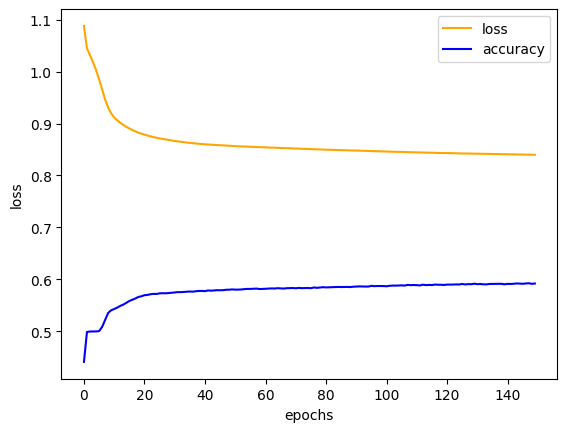

In [116]:
plot_convergion(x, cant_epochs)

2161/2161 [==============================] - 1s 604us/step


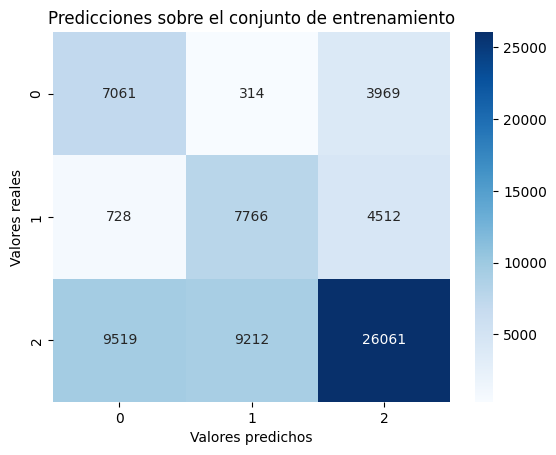

              precision    recall  f1-score   support

           0       0.41      0.62      0.49     11344
           1       0.45      0.60      0.51     13006
           2       0.75      0.58      0.66     44792

    accuracy                           0.59     69142
   macro avg       0.54      0.60      0.55     69142
weighted avg       0.64      0.59      0.60     69142

330/330 [==============================] - 0s 596us/step


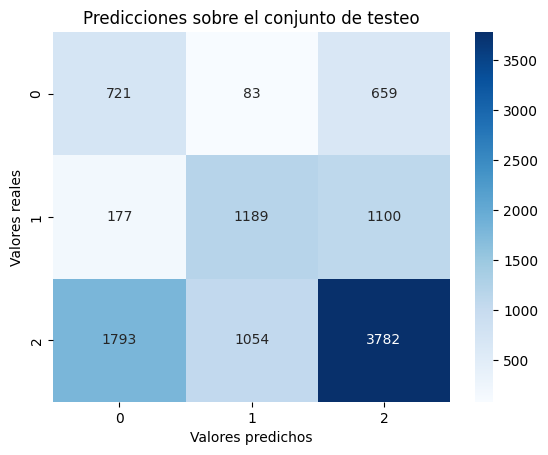

              precision    recall  f1-score   support

           0       0.27      0.49      0.35      1463
           1       0.51      0.48      0.50      2466
           2       0.68      0.57      0.62      6629

    accuracy                           0.54     10558
   macro avg       0.49      0.52      0.49     10558
weighted avg       0.59      0.54      0.55     10558



In [117]:
predicciones_clasificacion(mejor_modelo_3_capas_dse, x_train_clasificacion_scaled, x_test_clasificacion_scaled, y_train_encoded, y_test_encoded)

Vemos como las soluciones con capa oculta no difieren fuertemente en las métricas para este problema, pero vemos como en ambos casos de diferentes datasets dan ligeramente mejor las métricas en los modelos de capa oculta

Entre los 2 modelos utilizando el dataset del TP1 nos quedamos con el que  tiene la capa oculta ya que da levemente mejor las métricas al probar con el dataset de test

In [118]:
dump(mejor_modelo_3_capas, 'models/redes_neuronales_clasificacion.joblib')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2022-12-08 11:26:32        25088
metadata.json                                  2022-12-08 11:26:32           64
config.json                                    2022-12-08 11:26:32         2251


['models/redes_neuronales_clasificacion.joblib']

## Ensambles de modelos

### Ensamble Voting

Un modelo de ensamble es un modelo de machine learning que combina las predicciones de multiples modelos.

Un ensamble de tipo Voting puede ser utilizado para problemas de clasificacion o problemas de regresion. En el caso de clasificacion, las predicciones de cada label son sumadas y el label con mayoria de votos es el predicho.

Hay dos approaches para la votacion de la mayoria en los problemas de clasificacion.

1. Hard Voting = Predice la clase con la mayor cantidad de votos de los modelos.
2. Soft Voting = Predice la clase con la mayor suma de probabilidad de los modelos.

Nosotros haremos un analisis con los 2 approaches y despues de ver las metricas, nos quedaremos con el que mejor se ajuste a nuestro problema.

##### Hard Voting

Droppeamos la columna place_l3 ya que estaba dandonos peores valores en las metricas.

In [119]:
x_train_cls = x_train.drop(axis=1, columns='place_l3')
x_test_cls = x_test.drop(axis=1, columns='place_l3')

Factorizamos el precio Bajo, Medio, Alto en los valores 0, 1, 2 para que los modelos funcionen correctamente

In [120]:
y_train_clasificacion_factorized = y_train_clasificacion.replace(['Bajo', 'Medio', 'Alto'],[0,1,2])
y_test_clasificacion_factorized = y_test_clasificacion.replace(['Bajo', 'Medio', 'Alto'],[0,1,2])

Realizamos una prediccion con el arbol de clasificacion

In [121]:
dtc = DecisionTreeClassifier(random_state=42)
dtc_model = dtc.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_dtc = dtc_model.predict(x_test_cls)

In [122]:
print(classification_report(y_test_clasificacion_factorized, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      2326
           1       0.70      0.71      0.70      5541
           2       0.62      0.62      0.62      2691

    accuracy                           0.67     10558
   macro avg       0.65      0.65      0.65     10558
weighted avg       0.67      0.67      0.67     10558



Realizamos una prediccion con el modelo de regresion logistica

In [123]:
lr = LogisticRegression()
lr_model = lr.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_lr = lr_model.predict(x_test_cls)

/home/fede/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
print(classification_report(y_test_clasificacion_factorized, y_pred_lr))

              precision    recall  f1-score   support

           0       0.57      0.08      0.14      2326
           1       0.54      0.96      0.69      5541
           2       0.57      0.07      0.13      2691

    accuracy                           0.54     10558
   macro avg       0.56      0.37      0.32     10558
weighted avg       0.55      0.54      0.43     10558



Realizamos una prediccion con el modelo de naive bayes

In [125]:
gnb = GaussianNB()
gnb_model = gnb.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_gnb = gnb_model.predict(x_test_cls)

In [126]:
print(classification_report(y_test_clasificacion_factorized, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.54      0.20      0.30      2326
           1       0.55      0.80      0.65      5541
           2       0.40      0.25      0.30      2691

    accuracy                           0.53     10558
   macro avg       0.50      0.42      0.42     10558
weighted avg       0.51      0.53      0.49     10558



Realizamos una prediccion con el modelo clasificador de bosque aleatorio

In [127]:
rmf = RandomForestClassifier(random_state=14)
rmf_model = rmf.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_rmf = rmf_model.predict(x_test_cls)

In [128]:
print(classification_report(y_test_clasificacion_factorized, y_pred_rmf))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70      2326
           1       0.72      0.84      0.77      5541
           2       0.75      0.61      0.68      2691

    accuracy                           0.74     10558
   macro avg       0.75      0.69      0.72     10558
weighted avg       0.74      0.74      0.73     10558



Realizamos una prediccion con el modelo clasificador de KNN

In [129]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_knn = knn_model.predict(x_test_cls)

In [130]:
print(classification_report(y_test_clasificacion_factorized, y_pred_knn))

              precision    recall  f1-score   support

           0       0.48      0.51      0.49      2326
           1       0.67      0.66      0.66      5541
           2       0.53      0.52      0.52      2691

    accuracy                           0.59     10558
   macro avg       0.56      0.56      0.56     10558
weighted avg       0.59      0.59      0.59     10558



Realizamos una prediccion con el modelo linear SVC

In [131]:
svm = LinearSVC()
svm_model = svm.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_svm = svm_model.predict(x_test_cls)

/home/fede/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [132]:
print(classification_report(y_test_clasificacion_factorized, y_pred_svm))

              precision    recall  f1-score   support

           0       0.40      0.64      0.49      2326
           1       0.59      0.30      0.40      5541
           2       0.36      0.54      0.43      2691

    accuracy                           0.44     10558
   macro avg       0.45      0.49      0.44     10558
weighted avg       0.49      0.44      0.43     10558



Creamos un clasificador de votacion con votacion dura

In [133]:
voting_classifier_hard = VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42)),
                  ('knn', KNeighborsClassifier(n_neighbors=1)),
                  ('rfc', RandomForestClassifier(random_state= 42))], 
    voting='hard')

Hacemos predicciones con el modelo de votacion duro

In [134]:
voting_classifier_hard.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_vch = voting_classifier_hard.predict(x_test_cls)

Evaluamos el modelo con la metrica f-1 score

In [135]:
f1_vch = f1_score(y_test_clasificacion_factorized, y_pred_vch, average='micro')

Imprimimos la metrica de f-1 score

In [136]:
print('F1-score of the hard voting classifier: {}'.format(np.round(f1_vch,4)))

F1-score of the hard voting classifier: 0.6987


In [137]:
print(classification_report(y_test_clasificacion_factorized, y_pred_vch))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      2326
           1       0.71      0.77      0.74      5541
           2       0.74      0.58      0.65      2691

    accuracy                           0.70     10558
   macro avg       0.69      0.67      0.68     10558
weighted avg       0.70      0.70      0.70     10558



##### Soft Voting

Creamos un clasificador suave con votacion suave

In [138]:
voting_classifier_soft =  VotingClassifier(
    estimators = [('dtc',DecisionTreeClassifier(random_state=42)),
                  ('knn', KNeighborsClassifier(n_neighbors=1)),
                  ('rfc', RandomForestClassifier(random_state=42))], 
    voting='soft')

Hacemos predicciones con el modelo de votacion suave

In [139]:
voting_classifier_soft.fit(x_train_cls, y_train_clasificacion_factorized)
y_pred_vcs = voting_classifier_soft.predict(x_test_cls)

Evaluamos el modelo con la metrica f-1 score

In [140]:
f1_vcs = f1_score(y_test_clasificacion_factorized, y_pred_vcs, average='micro')

Imprimimos la metrica f-1 score

In [141]:
print('F1-score of the soft voting classifier: {}'.format(np.round(f1_vcs,4)))

F1-score of the soft voting classifier: 0.7031


In [142]:
print(classification_report(y_test_clasificacion_factorized, y_pred_vcs))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67      2326
           1       0.70      0.78      0.74      5541
           2       0.69      0.61      0.64      2691

    accuracy                           0.70     10558
   macro avg       0.70      0.67      0.68     10558
weighted avg       0.70      0.70      0.70     10558



In [143]:
dump(voting_classifier_soft, 'models/ensamble_voting_soft.joblib')
dump(voting_classifier_hard, 'models/ensamble_voting_hard.joblib')


['models/ensamble_voting_hard.joblib']

Soft y Hard Voting nos dieron como resultado un valor de accuracy de 0,70. Logramos optimizar mucho estos valores a traves de la utilizacion y comparacion de varios modelos.

### Ensamble Stacking

In [144]:
#Funcion para plotear a performance
def plot_results(model_scores, name):
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    print(model_names)
    print(results)
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )

    fig.update_layout(
        title='Performance of Different Models Using 5-Fold Cross-Validation',
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
        xaxis_title='Model',
        yaxis_title='Accuracy',
        showlegend=False)
    fig.show()

Vamos a utilizar KNN, SV, Random Forest y Regresion Lineal.

Tambien vamos a definir un regresor de Stacking del modulo de Scikit Learn’s, seteando los estimadores base como los modelos base y como estimador finaluna regresion lineal con 5 cross folds.

In [154]:
base_models = [
    ('KNN', KNeighborsRegressor()),
    ('SVR', SVR()),
    ('Random Forest', RandomForestRegressor(random_state=14)),
    ('Linear Regression', LinearRegression()),
]
stacked = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5)

Luego, vamos a fittear los modelos base y predecir la data de test que ya habiamos previamente separado en train (80%) y test (20%) para asi poder comparar los resultado con el ensamble regresor.

In [146]:
y_train_clasificacion_factorized

0        1
1        1
2        0
3        0
4        1
        ..
69137    1
69138    1
69139    1
69140    0
69141    1
Name: tipo_precio, Length: 69142, dtype: int64

In [147]:
import time
from collections import defaultdict

#Guarda los scores de cada modelo
model_scores = defaultdict()

for name, model in base_models:
    start_time = time.time()
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    end_time = time.time()

    r2 = model.score(x_test, y_test)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    model_scores[name] = r2

    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")

start_time = time.time()
stacked.fit(x_train, y_train)
stacked_prediction = stacked.predict(x_test)
end_time = time.time()
stacked_r2 = stacked.score(x_test, y_test)
model_scores['Stacking'] = stacked_r2
stacked_rmse = mean_squared_error(y_test, stacked_prediction, squared=False)
print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------")


-------KNN-------
Coefficient of determination: 0.6992448371842941
Root Mean Squared Error: 75358.06153662075
Computation Time: 0.22238516807556152
----------------------------------

-------SVR-------
Coefficient of determination: -0.009742634904310377
Root Mean Squared Error: 138079.28192001078
Computation Time: 363.40318512916565
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.9109506981104507
Root Mean Squared Error: 41005.15258959876
Computation Time: 22.604138374328613
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.7966223729893209
Root Mean Squared Error: 61969.03891051727
Computation Time: 0.038583993911743164
----------------------------------

-------Stacked Ensemble-------
Coefficient of determination: 0.9110951121646984
Root Mean Squared Error: 40971.8894251854
Computation Time: 1479.3832457065582
----------------------------------


El top 3 de los mejores modelos son:

    1. Ensamble de Stacking
    2. Random Forest
    3. Linear Regression

El Ensamble y Random Forest estan a la par, mientras que Regresion lineal se separa por un muy pequeño porcentaje. El ensamble logra obtener grandes reusltados dada su naturaleza. El ensamble logra optimizar las mejores combinaciones lineales de los modelos permitiendonos obtener una mejor mezcla de diversidad de cada modelo y de cada predicción.
La unica contra que parece tener el ensamble es el tiempo computacional que tarda.

In [149]:
dump(stacked, 'models/ensamble_stacking.joblib')


['models/ensamble_stacking.joblib']

## Conclusiones